In [1]:
import time
import cv2
import glob
import os
import numpy as np
import pandas as pd
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.kernel_approximation import AdditiveChi2Sampler
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt   

In [2]:
start_time = time.time()

In [3]:
'''
Parameters
'''
patch_stride = 16
K = 20

In [4]:
'''
Load Dataset
'''
def scene15():

    train_folders = glob.glob("SCENE-15/train/*")
    train_folders.sort()
    classes = dict()
    x_train = list()
    y_train = list()
    for index, folder in enumerate(train_folders):
        label = os.path.basename(folder)
        classes[label] = index
        paths = glob.glob(os.path.join(folder, "*"))
        for path in paths:
            x_train.append(cv2.imread(path, 0))
            y_train.append(index)

    x_test = list()
    y_test = list()
    test_folders = glob.glob("SCENE-15/test/*")
    test_folders.sort()
    for folder in test_folders:
        label = os.path.basename(folder)
        index = classes[label]
        paths = glob.glob(os.path.join(folder, "*"))
        for path in paths:
            x_test.append(cv2.imread(path, 0))
            y_test.append(index)

    return x_train, y_train, x_test, y_test, sorted(classes.keys())

print("Load Dataset ...")
x_train, y_train, x_test, y_test, labels_names = scene15()

random_indices = list(range(len(y_train)))
random.shuffle(random_indices)
x_train = np.array(x_train)[random_indices].tolist()
y_train = np.array(y_train)[random_indices].tolist()

Load Dataset ...


C:\Users\inyou\AppData\Local\Temp/ipykernel_14932/4253318223.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(x_train)[random_indices].tolist()


In [5]:
'''
Extract Patches
'''
train_key_points = list()
train_feature_shapes = list()
for image in x_train:
    h, w = image.shape
    image_key_points = list()
    for x in range(0, w, patch_stride):
        for y in range(0, h, patch_stride):
            image_key_points.append(cv2.KeyPoint(x, y, patch_stride))
    train_key_points.append(image_key_points)
    train_feature_shapes.append((len(range(0, w, patch_stride)), (len(range(0, h, patch_stride)))))

test_key_points = list()
test_feature_shapes = list()
for image in x_test:
    h, w = image.shape
    image_key_points = list()
    for x in range(0, w, patch_stride):
        for y in range(0, h, patch_stride):
            image_key_points.append(cv2.KeyPoint(x, y, patch_stride))
    test_key_points.append(image_key_points)
    test_feature_shapes.append((len(range(0, w, patch_stride)), (len(range(0, h, patch_stride)))))

#### OpenCV에서 특징을 추출하는 두가지 함수 중 descriptor.compute(image, keypoints)의 경우 keypoints를 전달하면 feature descriptor를 반환하며, descriptor.detectAndCompute(image,mask)의 경우 keypoints검출과 feature descriptor 계산을 함께 수행함 

In [10]:
'''
Extract Features
'''
###################################################################################
# 아래의 코드의 빈 곳(None 부분)을 채우세요.
# None 부분 외의 부분은 가급적 수정 하지 말고, 주어진 형식에 맞추어
# None 부분 만을 채워주세요. 임의적으로 전체적인 구조를 수정하셔도 좋지만,
# 파이썬 코딩에 익숙 하지 않으시면, 가급적 틀을 유지하시는 것을 권장합니다.
# 1) descriptor를 선정하세요. (SIFT, SURF 등) OpenCV의 패키지를 사용하시면 됩니다.
# 2) for 반복문 안에서, 1)에서 정의한 descriptor를 통하여 features를 추출하세요.
#    features의 차원은 (# of keypoints, feature_dim) 입니다.
###################################################################################
# Write Your Code Here ############################################################
descriptor = cv2.SIFT_create()
###################################################################################
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points):
    # Write Your Code Here ########################################################
    _, features = descriptor.compute(image,key_points)
    ###############################################################################
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points):
    # Write Your Code Here ########################################################
    _, features = descriptor.compute(image,key_points)
    ###############################################################################
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
Extract Train Features ...  251/1538
Extract Train Features ...  252/1538
Extract Train Features ...  253/1538
Extract Train Features ...  254/1538
E

Extract Train Features ...  452/1538
Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
Extract Train Features ...  475/1538
Extract Train Features ...  476/1538
Extract Train Features ...  477/1538
Extract Train Features ...  478/1538
E

Extract Train Features ...  677/1538
Extract Train Features ...  678/1538
Extract Train Features ...  679/1538
Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
Extract Train Features ...  698/1538
Extract Train Features ...  699/1538
Extract Train Features ...  700/1538
Extract Train Features ...  701/1538
Extract Train Features ...  702/1538
Extract Train Features ...  703/1538
E

Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
Extract Train Features ...  921/1538
Extract Train Features ...  922/1538
Extract Train Features ...  923/1538
Extract Train Features ...  924/1538
Extract Train Features ...  925/1538
Extract Train Features ...  926/1538
Extract Train Features ...  927/1538
Extract Train Features ...  928/1538
Extract Train Features ...  929/1538
Extract Train Features ...  930/1538
Extract Train Features ...  931/1538
Extract Train Features ...  932/1538
Extract Train Features ...  933/1538
E

Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
Extract Train Features ... 1143/1538
Extract Train Features ... 1144/1538
Extract Train Features ... 1145/1538
Extract Train Features ... 1146/1538
Extract Train Features ... 1147/1538
Extract Train Features ... 1148/1538
Extract Train Features ... 1149/1538
Extract Train Features ... 1150/1538
Extract Train Features ... 1151/1538
Extract Train Features ... 1152/1538
Extract Train Features ... 1153/1538
Extract Train Features ... 1154/1538
Extract Train Features ... 1155/1538
Extract Train Features ... 1156/1538
Extract Train Features ... 1157/1538
Extract Train Features ... 1158/1538
Extract Train Features ... 1159/1538
Extract Train Features ... 1160/1538
Extract Train Features ... 1161/1538
Extract Train Features ... 1162/1538
Extract Train Features ... 1163/1538
E

Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
Extract Train Features ... 1368/1538
Extract Train Features ... 1369/1538
Extract Train Features ... 1370/1538
Extract Train Features ... 1371/1538
Extract Train Features ... 1372/1538
Extract Train Features ... 1373/1538
Extract Train Features ... 1374/1538
Extract Train Features ... 1375/1538
Extract Train Features ... 1376/1538
Extract Train Features ... 1377/1538
Extract Train Features ... 1378/1538
Extract Train Features ... 1379/1538
Extract Train Features ... 1380/1538
Extract Train Features ... 1381/1538
Extract Train Features ... 1382/1538
Extract Train Features ... 1383/1538
Extract Train Features ... 1384/1538
Extract Train Features ... 1385/1538
Extract Train Features ... 1386/1538
Extract Train Features ... 1387/1538
Extract Train Features ... 1388/1538
E

Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   61/1516
Extract Test Features ...   62/1516
Extract Test Features ...   63/1516
Extract Test Features ...   64/1516
Extract Test Features ...   65/1516
Extract Test Features ...   66/1516
Extract Test Features ...   67/1516
Extract Test Features ...   68/1516
Extract Test Features ...   69/1516
Extract Test Features ...   70/1516
Extract Test Features ...   71/1516
Extract Test Features ...   72/1516
Extract Test Features ...   73/1516
Extract Test Features ...   74/1516
Extract Test Features ...   75/1516
Extract Test Features ...   76/1516
Extract Test Features ...   77/1516
Extract Test Features ...   78/1516
Extract Test Features ...   79/1516
Extract Test Features ...   80/1516
Extract Test Features ...   81/1516
Extract Test Features ...   82/1516
Extract Test Features ...   83/1516
Extract Test Features ...   

Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  293/1516
Extract Test Features ...  294/1516
Extract Test Features ...  295/1516
Extract Test Features ...  296/1516
Extract Test Features ...  297/1516
Extract Test Features ...  298/1516
Extract Test Features ...  299/1516
Extract Test Features ...  300/1516
Extract Test Features ...  301/1516
Extract Test Features ...  302/1516
Extract Test Features ...  303/1516
Extract Test Features ...  304/1516
Extract Test Features ...  305/1516
Extract Test Features ...  306/1516
Extract Test Features ...  307/1516
Extract Test Features ...  308/1516
Extract Test Features ...  309/1516
Extract Test Features ...  310/1516
Extract Test Features ...  311/1516
Extract Test Features ...  312/1516
Extract Test Features ...  313/1516
Extract Test Features ...  3

Extract Test Features ...  527/1516
Extract Test Features ...  528/1516
Extract Test Features ...  529/1516
Extract Test Features ...  530/1516
Extract Test Features ...  531/1516
Extract Test Features ...  532/1516
Extract Test Features ...  533/1516
Extract Test Features ...  534/1516
Extract Test Features ...  535/1516
Extract Test Features ...  536/1516
Extract Test Features ...  537/1516
Extract Test Features ...  538/1516
Extract Test Features ...  539/1516
Extract Test Features ...  540/1516
Extract Test Features ...  541/1516
Extract Test Features ...  542/1516
Extract Test Features ...  543/1516
Extract Test Features ...  544/1516
Extract Test Features ...  545/1516
Extract Test Features ...  546/1516
Extract Test Features ...  547/1516
Extract Test Features ...  548/1516
Extract Test Features ...  549/1516
Extract Test Features ...  550/1516
Extract Test Features ...  551/1516
Extract Test Features ...  552/1516
Extract Test Features ...  553/1516
Extract Test Features ...  5

Extract Test Features ...  764/1516
Extract Test Features ...  765/1516
Extract Test Features ...  766/1516
Extract Test Features ...  767/1516
Extract Test Features ...  768/1516
Extract Test Features ...  769/1516
Extract Test Features ...  770/1516
Extract Test Features ...  771/1516
Extract Test Features ...  772/1516
Extract Test Features ...  773/1516
Extract Test Features ...  774/1516
Extract Test Features ...  775/1516
Extract Test Features ...  776/1516
Extract Test Features ...  777/1516
Extract Test Features ...  778/1516
Extract Test Features ...  779/1516
Extract Test Features ...  780/1516
Extract Test Features ...  781/1516
Extract Test Features ...  782/1516
Extract Test Features ...  783/1516
Extract Test Features ...  784/1516
Extract Test Features ...  785/1516
Extract Test Features ...  786/1516
Extract Test Features ...  787/1516
Extract Test Features ...  788/1516
Extract Test Features ...  789/1516
Extract Test Features ...  790/1516
Extract Test Features ...  7

Extract Test Features ...  997/1516
Extract Test Features ...  998/1516
Extract Test Features ...  999/1516
Extract Test Features ... 1000/1516
Extract Test Features ... 1001/1516
Extract Test Features ... 1002/1516
Extract Test Features ... 1003/1516
Extract Test Features ... 1004/1516
Extract Test Features ... 1005/1516
Extract Test Features ... 1006/1516
Extract Test Features ... 1007/1516
Extract Test Features ... 1008/1516
Extract Test Features ... 1009/1516
Extract Test Features ... 1010/1516
Extract Test Features ... 1011/1516
Extract Test Features ... 1012/1516
Extract Test Features ... 1013/1516
Extract Test Features ... 1014/1516
Extract Test Features ... 1015/1516
Extract Test Features ... 1016/1516
Extract Test Features ... 1017/1516
Extract Test Features ... 1018/1516
Extract Test Features ... 1019/1516
Extract Test Features ... 1020/1516
Extract Test Features ... 1021/1516
Extract Test Features ... 1022/1516
Extract Test Features ... 1023/1516
Extract Test Features ... 10

Extract Test Features ... 1228/1516
Extract Test Features ... 1229/1516
Extract Test Features ... 1230/1516
Extract Test Features ... 1231/1516
Extract Test Features ... 1232/1516
Extract Test Features ... 1233/1516
Extract Test Features ... 1234/1516
Extract Test Features ... 1235/1516
Extract Test Features ... 1236/1516
Extract Test Features ... 1237/1516
Extract Test Features ... 1238/1516
Extract Test Features ... 1239/1516
Extract Test Features ... 1240/1516
Extract Test Features ... 1241/1516
Extract Test Features ... 1242/1516
Extract Test Features ... 1243/1516
Extract Test Features ... 1244/1516
Extract Test Features ... 1245/1516
Extract Test Features ... 1246/1516
Extract Test Features ... 1247/1516
Extract Test Features ... 1248/1516
Extract Test Features ... 1249/1516
Extract Test Features ... 1250/1516
Extract Test Features ... 1251/1516
Extract Test Features ... 1252/1516
Extract Test Features ... 1253/1516
Extract Test Features ... 1254/1516
Extract Test Features ... 12

Extract Test Features ... 1464/1516
Extract Test Features ... 1465/1516
Extract Test Features ... 1466/1516
Extract Test Features ... 1467/1516
Extract Test Features ... 1468/1516
Extract Test Features ... 1469/1516
Extract Test Features ... 1470/1516
Extract Test Features ... 1471/1516
Extract Test Features ... 1472/1516
Extract Test Features ... 1473/1516
Extract Test Features ... 1474/1516
Extract Test Features ... 1475/1516
Extract Test Features ... 1476/1516
Extract Test Features ... 1477/1516
Extract Test Features ... 1478/1516
Extract Test Features ... 1479/1516
Extract Test Features ... 1480/1516
Extract Test Features ... 1481/1516
Extract Test Features ... 1482/1516
Extract Test Features ... 1483/1516
Extract Test Features ... 1484/1516
Extract Test Features ... 1485/1516
Extract Test Features ... 1486/1516
Extract Test Features ... 1487/1516
Extract Test Features ... 1488/1516
Extract Test Features ... 1489/1516
Extract Test Features ... 1490/1516
Extract Test Features ... 14

In [11]:

'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))


Normalize Train Features ...    1/1538
Normalize Train Features ...    2/1538
Normalize Train Features ...    3/1538
Normalize Train Features ...    4/1538
Normalize Train Features ...    5/1538
Normalize Train Features ...    6/1538
Normalize Train Features ...    7/1538
Normalize Train Features ...    8/1538
Normalize Train Features ...    9/1538
Normalize Train Features ...   10/1538
Normalize Train Features ...   11/1538
Normalize Train Features ...   12/1538
Normalize Train Features ...   13/1538
Normalize Train Features ...   14/1538
Normalize Train Features ...   15/1538
Normalize Train Features ...   16/1538
Normalize Train Features ...   17/1538
Normalize Train Features ...   18/1538
Normalize Train Features ...   19/1538
Normalize Train Features ...   20/1538
Normalize Train Features ...   21/1538
Normalize Train Features ...   22/1538
Normalize Train Features ...   23/1538
Normalize Train Features ...   24/1538
Normalize Train Features ...   25/1538
Normalize Train Features 

Normalize Train Features ...  372/1538
Normalize Train Features ...  373/1538
Normalize Train Features ...  374/1538
Normalize Train Features ...  375/1538
Normalize Train Features ...  376/1538
Normalize Train Features ...  377/1538
Normalize Train Features ...  378/1538
Normalize Train Features ...  379/1538
Normalize Train Features ...  380/1538
Normalize Train Features ...  381/1538
Normalize Train Features ...  382/1538
Normalize Train Features ...  383/1538
Normalize Train Features ...  384/1538
Normalize Train Features ...  385/1538
Normalize Train Features ...  386/1538
Normalize Train Features ...  387/1538
Normalize Train Features ...  388/1538
Normalize Train Features ...  389/1538
Normalize Train Features ...  390/1538
Normalize Train Features ...  391/1538
Normalize Train Features ...  392/1538
Normalize Train Features ...  393/1538
Normalize Train Features ...  394/1538
Normalize Train Features ...  395/1538
Normalize Train Features ...  396/1538
Normalize Train Features 

Normalize Train Features ...  709/1538
Normalize Train Features ...  710/1538
Normalize Train Features ...  711/1538
Normalize Train Features ...  712/1538
Normalize Train Features ...  713/1538
Normalize Train Features ...  714/1538
Normalize Train Features ...  715/1538
Normalize Train Features ...  716/1538
Normalize Train Features ...  717/1538
Normalize Train Features ...  718/1538
Normalize Train Features ...  719/1538
Normalize Train Features ...  720/1538
Normalize Train Features ...  721/1538
Normalize Train Features ...  722/1538
Normalize Train Features ...  723/1538
Normalize Train Features ...  724/1538
Normalize Train Features ...  725/1538
Normalize Train Features ...  726/1538
Normalize Train Features ...  727/1538
Normalize Train Features ...  728/1538
Normalize Train Features ...  729/1538
Normalize Train Features ...  730/1538
Normalize Train Features ...  731/1538
Normalize Train Features ...  732/1538
Normalize Train Features ...  733/1538
Normalize Train Features 

Normalize Train Features ...  990/1538
Normalize Train Features ...  991/1538
Normalize Train Features ...  992/1538
Normalize Train Features ...  993/1538
Normalize Train Features ...  994/1538
Normalize Train Features ...  995/1538
Normalize Train Features ...  996/1538
Normalize Train Features ...  997/1538
Normalize Train Features ...  998/1538
Normalize Train Features ...  999/1538
Normalize Train Features ... 1000/1538
Normalize Train Features ... 1001/1538
Normalize Train Features ... 1002/1538
Normalize Train Features ... 1003/1538
Normalize Train Features ... 1004/1538
Normalize Train Features ... 1005/1538
Normalize Train Features ... 1006/1538
Normalize Train Features ... 1007/1538
Normalize Train Features ... 1008/1538
Normalize Train Features ... 1009/1538
Normalize Train Features ... 1010/1538
Normalize Train Features ... 1011/1538
Normalize Train Features ... 1012/1538
Normalize Train Features ... 1013/1538
Normalize Train Features ... 1014/1538
Normalize Train Features 

Normalize Train Features ... 1318/1538
Normalize Train Features ... 1319/1538
Normalize Train Features ... 1320/1538
Normalize Train Features ... 1321/1538
Normalize Train Features ... 1322/1538
Normalize Train Features ... 1323/1538
Normalize Train Features ... 1324/1538
Normalize Train Features ... 1325/1538
Normalize Train Features ... 1326/1538
Normalize Train Features ... 1327/1538
Normalize Train Features ... 1328/1538
Normalize Train Features ... 1329/1538
Normalize Train Features ... 1330/1538
Normalize Train Features ... 1331/1538
Normalize Train Features ... 1332/1538
Normalize Train Features ... 1333/1538
Normalize Train Features ... 1334/1538
Normalize Train Features ... 1335/1538
Normalize Train Features ... 1336/1538
Normalize Train Features ... 1337/1538
Normalize Train Features ... 1338/1538
Normalize Train Features ... 1339/1538
Normalize Train Features ... 1340/1538
Normalize Train Features ... 1341/1538
Normalize Train Features ... 1342/1538
Normalize Train Features 

Normalize Test Features ...  150/1516
Normalize Test Features ...  151/1516
Normalize Test Features ...  152/1516
Normalize Test Features ...  153/1516
Normalize Test Features ...  154/1516
Normalize Test Features ...  155/1516
Normalize Test Features ...  156/1516
Normalize Test Features ...  157/1516
Normalize Test Features ...  158/1516
Normalize Test Features ...  159/1516
Normalize Test Features ...  160/1516
Normalize Test Features ...  161/1516
Normalize Test Features ...  162/1516
Normalize Test Features ...  163/1516
Normalize Test Features ...  164/1516
Normalize Test Features ...  165/1516
Normalize Test Features ...  166/1516
Normalize Test Features ...  167/1516
Normalize Test Features ...  168/1516
Normalize Test Features ...  169/1516
Normalize Test Features ...  170/1516
Normalize Test Features ...  171/1516
Normalize Test Features ...  172/1516
Normalize Test Features ...  173/1516
Normalize Test Features ...  174/1516
Normalize Test Features ...  175/1516
Normalize Te

Normalize Test Features ...  440/1516
Normalize Test Features ...  441/1516
Normalize Test Features ...  442/1516
Normalize Test Features ...  443/1516
Normalize Test Features ...  444/1516
Normalize Test Features ...  445/1516
Normalize Test Features ...  446/1516
Normalize Test Features ...  447/1516
Normalize Test Features ...  448/1516
Normalize Test Features ...  449/1516
Normalize Test Features ...  450/1516
Normalize Test Features ...  451/1516
Normalize Test Features ...  452/1516
Normalize Test Features ...  453/1516
Normalize Test Features ...  454/1516
Normalize Test Features ...  455/1516
Normalize Test Features ...  456/1516
Normalize Test Features ...  457/1516
Normalize Test Features ...  458/1516
Normalize Test Features ...  459/1516
Normalize Test Features ...  460/1516
Normalize Test Features ...  461/1516
Normalize Test Features ...  462/1516
Normalize Test Features ...  463/1516
Normalize Test Features ...  464/1516
Normalize Test Features ...  465/1516
Normalize Te

Normalize Test Features ...  761/1516
Normalize Test Features ...  762/1516
Normalize Test Features ...  763/1516
Normalize Test Features ...  764/1516
Normalize Test Features ...  765/1516
Normalize Test Features ...  766/1516
Normalize Test Features ...  767/1516
Normalize Test Features ...  768/1516
Normalize Test Features ...  769/1516
Normalize Test Features ...  770/1516
Normalize Test Features ...  771/1516
Normalize Test Features ...  772/1516
Normalize Test Features ...  773/1516
Normalize Test Features ...  774/1516
Normalize Test Features ...  775/1516
Normalize Test Features ...  776/1516
Normalize Test Features ...  777/1516
Normalize Test Features ...  778/1516
Normalize Test Features ...  779/1516
Normalize Test Features ...  780/1516
Normalize Test Features ...  781/1516
Normalize Test Features ...  782/1516
Normalize Test Features ...  783/1516
Normalize Test Features ...  784/1516
Normalize Test Features ...  785/1516
Normalize Test Features ...  786/1516
Normalize Te

Normalize Test Features ... 1154/1516
Normalize Test Features ... 1155/1516
Normalize Test Features ... 1156/1516
Normalize Test Features ... 1157/1516
Normalize Test Features ... 1158/1516
Normalize Test Features ... 1159/1516
Normalize Test Features ... 1160/1516
Normalize Test Features ... 1161/1516
Normalize Test Features ... 1162/1516
Normalize Test Features ... 1163/1516
Normalize Test Features ... 1164/1516
Normalize Test Features ... 1165/1516
Normalize Test Features ... 1166/1516
Normalize Test Features ... 1167/1516
Normalize Test Features ... 1168/1516
Normalize Test Features ... 1169/1516
Normalize Test Features ... 1170/1516
Normalize Test Features ... 1171/1516
Normalize Test Features ... 1172/1516
Normalize Test Features ... 1173/1516
Normalize Test Features ... 1174/1516
Normalize Test Features ... 1175/1516
Normalize Test Features ... 1176/1516
Normalize Test Features ... 1177/1516
Normalize Test Features ... 1178/1516
Normalize Test Features ... 1179/1516
Normalize Te

In [12]:
'''
Make Codebook
'''
###################################################################################
# 아래의 코드의 빈 곳(None 부분)을 채우세요.
# None 부분 외의 부분은 가급적 수정 하지 말고, 주어진 형식에 맞추어
# None 부분 만을 채워주세요. 임의적으로 전체적인 구조를 수정하셔도 좋지만,
# 파이썬 코딩에 익숙 하지 않으시면, 가급적 틀을 유지하시는 것을 권장합니다.
# 1) 함수 encode 부분 안의 None 부분을 채우세요.
#    distances는 K means 알고리즘을 통해 얻어진 centroids, 즉 codewords(visual words)와
#    각 이미지의 특징들 간의 거리 입니다.
#    distances 값을 이용하여, features(# of keypoints, feature_dim)를
#    인코딩(histogram 혹은 quantization이라고도 함) 하세요.
#    인코딩된 결과인 representations은 (K)로 표현되어야 합니다.
#    이 때, K는 codewords의 개수입니다.
###################################################################################
class Codebook:

    def __init__(self, K):

        self.K = K

        self.kmeans = KMeans(n_clusters=K, verbose=True)

    def make_code_words(self, features):

        self.kmeans.fit(features)

    def encode(self, features, shapes):

        distances = self.kmeans.transform(features)#특성들을 cluster-distance space로 변환함(feature[i]별 적용)

        # Write Your Code Here ########################################################
        representations = np.zeros(dtype=np.int64, shape=(len(distances), self.K))
        '''
        distances를 통해 representation에 대한 연산 진행
        np.argmin, np.arange, np.sum 등 라이브러리 사용
        '''
        '''
        nearest_centroid_indices = self.kmeans.predict(features)
        
        nearest_centroid_indices 활용한 연산도 가능
        '''
        
        #number_of_keypoints = shapes[0]*shapes[1]
        number_of_keypoints = features.shape[0]
        
        for i in range(number_of_keypoints):
            nearest_centroid_indices = np.argmin(distances[i])
            representation_for_one_keypoint = np.arange(K)
            representation_for_one_keypoint = np.array([1 if i==nearest_centroid_indices else 0 for i in list(representation_for_one_keypoint)])                     
            representations[i] = representation_for_one_keypoint
        
        representations = representations.sum(axis=0)
        ###############################################################################

        if np.array(representations).shape != (self.K, ):
            # representations는 반드시 (K) 차원을 가져야 합니다.
            # 해당 조건문은 잘못 구현했을 경우를 판단하기 위해 작성되었으며, 추후 문제없이 구현되었다면 지우셔도 됩니다.
            print("Your code may be wrong")

        return representations

In [13]:
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

Make Codebook ...
Initialization complete
Iteration 0, inertia 65979756.0.
Iteration 1, inertia 50213152.0.
Iteration 2, inertia 49654352.0.
Iteration 3, inertia 49364524.0.
Iteration 4, inertia 49208380.0.
Iteration 5, inertia 49117480.0.
Iteration 6, inertia 49053716.0.
Iteration 7, inertia 49002172.0.
Iteration 8, inertia 48961808.0.
Iteration 9, inertia 48932312.0.
Iteration 10, inertia 48911572.0.
Iteration 11, inertia 48896096.0.
Iteration 12, inertia 48884240.0.
Iteration 13, inertia 48874740.0.
Iteration 14, inertia 48867336.0.
Iteration 15, inertia 48861524.0.
Iteration 16, inertia 48855884.0.
Iteration 17, inertia 48849996.0.
Iteration 18, inertia 48843324.0.
Iteration 19, inertia 48836100.0.
Iteration 20, inertia 48829148.0.
Iteration 21, inertia 48823348.0.
Iteration 22, inertia 48818844.0.
Iteration 23, inertia 48815396.0.
Iteration 24, inertia 48812416.0.
Iteration 25, inertia 48809652.0.
Iteration 26, inertia 48806732.0.
Iteration 27, inertia 48803740.0.
Iteration 28, in

Converged at iteration 66: center shift 9.614082955522463e-05 within tolerance 9.99846637248993e-05.
Initialization complete
Iteration 0, inertia 66030348.0.
Iteration 1, inertia 50358748.0.
Iteration 2, inertia 49670208.0.
Iteration 3, inertia 49295368.0.
Iteration 4, inertia 49068164.0.
Iteration 5, inertia 48950536.0.
Iteration 6, inertia 48890876.0.
Iteration 7, inertia 48851644.0.
Iteration 8, inertia 48820808.0.
Iteration 9, inertia 48797156.0.
Iteration 10, inertia 48780636.0.
Iteration 11, inertia 48767468.0.
Iteration 12, inertia 48755584.0.
Iteration 13, inertia 48744896.0.
Iteration 14, inertia 48736624.0.
Iteration 15, inertia 48730712.0.
Iteration 16, inertia 48726452.0.
Iteration 17, inertia 48723156.0.
Iteration 18, inertia 48720348.0.
Iteration 19, inertia 48717752.0.
Iteration 20, inertia 48715528.0.
Iteration 21, inertia 48713424.0.
Iteration 22, inertia 48711572.0.
Iteration 23, inertia 48709788.0.
Iteration 24, inertia 48708336.0.
Iteration 25, inertia 48706832.0.
I

Iteration 44, inertia 48724720.0.
Iteration 45, inertia 48724696.0.
Iteration 46, inertia 48724668.0.
Iteration 47, inertia 48724680.0.
Iteration 48, inertia 48724648.0.
Iteration 49, inertia 48724652.0.
Iteration 50, inertia 48724620.0.
Iteration 51, inertia 48724596.0.
Iteration 52, inertia 48724548.0.
Iteration 53, inertia 48724540.0.
Iteration 54, inertia 48724516.0.
Iteration 55, inertia 48724532.0.
Iteration 56, inertia 48724500.0.
Iteration 57, inertia 48724508.0.
Converged at iteration 57: center shift 9.538821905152872e-05 within tolerance 9.99846637248993e-05.
Initialization complete
Iteration 0, inertia 63100968.0.
Iteration 1, inertia 50320592.0.
Iteration 2, inertia 49679248.0.
Iteration 3, inertia 49379040.0.
Iteration 4, inertia 49197324.0.
Iteration 5, inertia 49066116.0.
Iteration 6, inertia 48984536.0.
Iteration 7, inertia 48931520.0.
Iteration 8, inertia 48893392.0.
Iteration 9, inertia 48867564.0.
Iteration 10, inertia 48850048.0.
Iteration 11, inertia 48837452.0.
I

Iteration 42, inertia 48723960.0.
Iteration 43, inertia 48723908.0.
Iteration 44, inertia 48723828.0.
Iteration 45, inertia 48723784.0.
Iteration 46, inertia 48723744.0.
Iteration 47, inertia 48723728.0.
Iteration 48, inertia 48723612.0.
Iteration 49, inertia 48723536.0.
Iteration 50, inertia 48723484.0.
Iteration 51, inertia 48723392.0.
Iteration 52, inertia 48723300.0.
Iteration 53, inertia 48723132.0.
Iteration 54, inertia 48722968.0.
Iteration 55, inertia 48722764.0.
Iteration 56, inertia 48722552.0.
Iteration 57, inertia 48722292.0.
Iteration 58, inertia 48722056.0.
Iteration 59, inertia 48721840.0.
Iteration 60, inertia 48721572.0.
Iteration 61, inertia 48721236.0.
Iteration 62, inertia 48721112.0.
Iteration 63, inertia 48720900.0.
Iteration 64, inertia 48720744.0.
Iteration 65, inertia 48720648.0.
Iteration 66, inertia 48720620.0.
Iteration 67, inertia 48720628.0.
Iteration 68, inertia 48720544.0.
Iteration 69, inertia 48720548.0.
Iteration 70, inertia 48720544.0.
Iteration 71, 

In [23]:
'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))

Encoding Train Features ...    1/1538
Encoding Train Features ...    2/1538
Encoding Train Features ...    3/1538
Encoding Train Features ...    4/1538
Encoding Train Features ...    5/1538
Encoding Train Features ...    6/1538
Encoding Train Features ...    7/1538
Encoding Train Features ...    8/1538
Encoding Train Features ...    9/1538
Encoding Train Features ...   10/1538
Encoding Train Features ...   11/1538
Encoding Train Features ...   12/1538
Encoding Train Features ...   13/1538
Encoding Train Features ...   14/1538
Encoding Train Features ...   15/1538
Encoding Train Features ...   16/1538
Encoding Train Features ...   17/1538
Encoding Train Features ...   18/1538
Encoding Train Features ...   19/1538
Encoding Train Features ...   20/1538
Encoding Train Features ...   21/1538
Encoding Train Features ...   22/1538
Encoding Train Features ...   23/1538
Encoding Train Features ...   24/1538
Encoding Train Features ...   25/1538
Encoding Train Features ...   26/1538
Encoding Tra

Encoding Train Features ...  224/1538
Encoding Train Features ...  225/1538
Encoding Train Features ...  226/1538
Encoding Train Features ...  227/1538
Encoding Train Features ...  228/1538
Encoding Train Features ...  229/1538
Encoding Train Features ...  230/1538
Encoding Train Features ...  231/1538
Encoding Train Features ...  232/1538
Encoding Train Features ...  233/1538
Encoding Train Features ...  234/1538
Encoding Train Features ...  235/1538
Encoding Train Features ...  236/1538
Encoding Train Features ...  237/1538
Encoding Train Features ...  238/1538
Encoding Train Features ...  239/1538
Encoding Train Features ...  240/1538
Encoding Train Features ...  241/1538
Encoding Train Features ...  242/1538
Encoding Train Features ...  243/1538
Encoding Train Features ...  244/1538
Encoding Train Features ...  245/1538
Encoding Train Features ...  246/1538
Encoding Train Features ...  247/1538
Encoding Train Features ...  248/1538
Encoding Train Features ...  249/1538
Encoding Tra

Encoding Train Features ...  452/1538
Encoding Train Features ...  453/1538
Encoding Train Features ...  454/1538
Encoding Train Features ...  455/1538
Encoding Train Features ...  456/1538
Encoding Train Features ...  457/1538
Encoding Train Features ...  458/1538
Encoding Train Features ...  459/1538
Encoding Train Features ...  460/1538
Encoding Train Features ...  461/1538
Encoding Train Features ...  462/1538
Encoding Train Features ...  463/1538
Encoding Train Features ...  464/1538
Encoding Train Features ...  465/1538
Encoding Train Features ...  466/1538
Encoding Train Features ...  467/1538
Encoding Train Features ...  468/1538
Encoding Train Features ...  469/1538
Encoding Train Features ...  470/1538
Encoding Train Features ...  471/1538
Encoding Train Features ...  472/1538
Encoding Train Features ...  473/1538
Encoding Train Features ...  474/1538
Encoding Train Features ...  475/1538
Encoding Train Features ...  476/1538
Encoding Train Features ...  477/1538
Encoding Tra

Encoding Train Features ...  669/1538
Encoding Train Features ...  670/1538
Encoding Train Features ...  671/1538
Encoding Train Features ...  672/1538
Encoding Train Features ...  673/1538
Encoding Train Features ...  674/1538
Encoding Train Features ...  675/1538
Encoding Train Features ...  676/1538
Encoding Train Features ...  677/1538
Encoding Train Features ...  678/1538
Encoding Train Features ...  679/1538
Encoding Train Features ...  680/1538
Encoding Train Features ...  681/1538
Encoding Train Features ...  682/1538
Encoding Train Features ...  683/1538
Encoding Train Features ...  684/1538
Encoding Train Features ...  685/1538
Encoding Train Features ...  686/1538
Encoding Train Features ...  687/1538
Encoding Train Features ...  688/1538
Encoding Train Features ...  689/1538
Encoding Train Features ...  690/1538
Encoding Train Features ...  691/1538
Encoding Train Features ...  692/1538
Encoding Train Features ...  693/1538
Encoding Train Features ...  694/1538
Encoding Tra

Encoding Train Features ...  896/1538
Encoding Train Features ...  897/1538
Encoding Train Features ...  898/1538
Encoding Train Features ...  899/1538
Encoding Train Features ...  900/1538
Encoding Train Features ...  901/1538
Encoding Train Features ...  902/1538
Encoding Train Features ...  903/1538
Encoding Train Features ...  904/1538
Encoding Train Features ...  905/1538
Encoding Train Features ...  906/1538
Encoding Train Features ...  907/1538
Encoding Train Features ...  908/1538
Encoding Train Features ...  909/1538
Encoding Train Features ...  910/1538
Encoding Train Features ...  911/1538
Encoding Train Features ...  912/1538
Encoding Train Features ...  913/1538
Encoding Train Features ...  914/1538
Encoding Train Features ...  915/1538
Encoding Train Features ...  916/1538
Encoding Train Features ...  917/1538
Encoding Train Features ...  918/1538
Encoding Train Features ...  919/1538
Encoding Train Features ...  920/1538
Encoding Train Features ...  921/1538
Encoding Tra

Encoding Train Features ... 1118/1538
Encoding Train Features ... 1119/1538
Encoding Train Features ... 1120/1538
Encoding Train Features ... 1121/1538
Encoding Train Features ... 1122/1538
Encoding Train Features ... 1123/1538
Encoding Train Features ... 1124/1538
Encoding Train Features ... 1125/1538
Encoding Train Features ... 1126/1538
Encoding Train Features ... 1127/1538
Encoding Train Features ... 1128/1538
Encoding Train Features ... 1129/1538
Encoding Train Features ... 1130/1538
Encoding Train Features ... 1131/1538
Encoding Train Features ... 1132/1538
Encoding Train Features ... 1133/1538
Encoding Train Features ... 1134/1538
Encoding Train Features ... 1135/1538
Encoding Train Features ... 1136/1538
Encoding Train Features ... 1137/1538
Encoding Train Features ... 1138/1538
Encoding Train Features ... 1139/1538
Encoding Train Features ... 1140/1538
Encoding Train Features ... 1141/1538
Encoding Train Features ... 1142/1538
Encoding Train Features ... 1143/1538
Encoding Tra

Encoding Train Features ... 1334/1538
Encoding Train Features ... 1335/1538
Encoding Train Features ... 1336/1538
Encoding Train Features ... 1337/1538
Encoding Train Features ... 1338/1538
Encoding Train Features ... 1339/1538
Encoding Train Features ... 1340/1538
Encoding Train Features ... 1341/1538
Encoding Train Features ... 1342/1538
Encoding Train Features ... 1343/1538
Encoding Train Features ... 1344/1538
Encoding Train Features ... 1345/1538
Encoding Train Features ... 1346/1538
Encoding Train Features ... 1347/1538
Encoding Train Features ... 1348/1538
Encoding Train Features ... 1349/1538
Encoding Train Features ... 1350/1538
Encoding Train Features ... 1351/1538
Encoding Train Features ... 1352/1538
Encoding Train Features ... 1353/1538
Encoding Train Features ... 1354/1538
Encoding Train Features ... 1355/1538
Encoding Train Features ... 1356/1538
Encoding Train Features ... 1357/1538
Encoding Train Features ... 1358/1538
Encoding Train Features ... 1359/1538
Encoding Tra

Encoding Test Features ...   29/1516
Encoding Test Features ...   30/1516
Encoding Test Features ...   31/1516
Encoding Test Features ...   32/1516
Encoding Test Features ...   33/1516
Encoding Test Features ...   34/1516
Encoding Test Features ...   35/1516
Encoding Test Features ...   36/1516
Encoding Test Features ...   37/1516
Encoding Test Features ...   38/1516
Encoding Test Features ...   39/1516
Encoding Test Features ...   40/1516
Encoding Test Features ...   41/1516
Encoding Test Features ...   42/1516
Encoding Test Features ...   43/1516
Encoding Test Features ...   44/1516
Encoding Test Features ...   45/1516
Encoding Test Features ...   46/1516
Encoding Test Features ...   47/1516
Encoding Test Features ...   48/1516
Encoding Test Features ...   49/1516
Encoding Test Features ...   50/1516
Encoding Test Features ...   51/1516
Encoding Test Features ...   52/1516
Encoding Test Features ...   53/1516
Encoding Test Features ...   54/1516
Encoding Test Features ...   55/1516
E

Encoding Test Features ...  262/1516
Encoding Test Features ...  263/1516
Encoding Test Features ...  264/1516
Encoding Test Features ...  265/1516
Encoding Test Features ...  266/1516
Encoding Test Features ...  267/1516
Encoding Test Features ...  268/1516
Encoding Test Features ...  269/1516
Encoding Test Features ...  270/1516
Encoding Test Features ...  271/1516
Encoding Test Features ...  272/1516
Encoding Test Features ...  273/1516
Encoding Test Features ...  274/1516
Encoding Test Features ...  275/1516
Encoding Test Features ...  276/1516
Encoding Test Features ...  277/1516
Encoding Test Features ...  278/1516
Encoding Test Features ...  279/1516
Encoding Test Features ...  280/1516
Encoding Test Features ...  281/1516
Encoding Test Features ...  282/1516
Encoding Test Features ...  283/1516
Encoding Test Features ...  284/1516
Encoding Test Features ...  285/1516
Encoding Test Features ...  286/1516
Encoding Test Features ...  287/1516
Encoding Test Features ...  288/1516
E

Encoding Test Features ...  484/1516
Encoding Test Features ...  485/1516
Encoding Test Features ...  486/1516
Encoding Test Features ...  487/1516
Encoding Test Features ...  488/1516
Encoding Test Features ...  489/1516
Encoding Test Features ...  490/1516
Encoding Test Features ...  491/1516
Encoding Test Features ...  492/1516
Encoding Test Features ...  493/1516
Encoding Test Features ...  494/1516
Encoding Test Features ...  495/1516
Encoding Test Features ...  496/1516
Encoding Test Features ...  497/1516
Encoding Test Features ...  498/1516
Encoding Test Features ...  499/1516
Encoding Test Features ...  500/1516
Encoding Test Features ...  501/1516
Encoding Test Features ...  502/1516
Encoding Test Features ...  503/1516
Encoding Test Features ...  504/1516
Encoding Test Features ...  505/1516
Encoding Test Features ...  506/1516
Encoding Test Features ...  507/1516
Encoding Test Features ...  508/1516
Encoding Test Features ...  509/1516
Encoding Test Features ...  510/1516
E

Encoding Test Features ...  713/1516
Encoding Test Features ...  714/1516
Encoding Test Features ...  715/1516
Encoding Test Features ...  716/1516
Encoding Test Features ...  717/1516
Encoding Test Features ...  718/1516
Encoding Test Features ...  719/1516
Encoding Test Features ...  720/1516
Encoding Test Features ...  721/1516
Encoding Test Features ...  722/1516
Encoding Test Features ...  723/1516
Encoding Test Features ...  724/1516
Encoding Test Features ...  725/1516
Encoding Test Features ...  726/1516
Encoding Test Features ...  727/1516
Encoding Test Features ...  728/1516
Encoding Test Features ...  729/1516
Encoding Test Features ...  730/1516
Encoding Test Features ...  731/1516
Encoding Test Features ...  732/1516
Encoding Test Features ...  733/1516
Encoding Test Features ...  734/1516
Encoding Test Features ...  735/1516
Encoding Test Features ...  736/1516
Encoding Test Features ...  737/1516
Encoding Test Features ...  738/1516
Encoding Test Features ...  739/1516
E

Encoding Test Features ...  947/1516
Encoding Test Features ...  948/1516
Encoding Test Features ...  949/1516
Encoding Test Features ...  950/1516
Encoding Test Features ...  951/1516
Encoding Test Features ...  952/1516
Encoding Test Features ...  953/1516
Encoding Test Features ...  954/1516
Encoding Test Features ...  955/1516
Encoding Test Features ...  956/1516
Encoding Test Features ...  957/1516
Encoding Test Features ...  958/1516
Encoding Test Features ...  959/1516
Encoding Test Features ...  960/1516
Encoding Test Features ...  961/1516
Encoding Test Features ...  962/1516
Encoding Test Features ...  963/1516
Encoding Test Features ...  964/1516
Encoding Test Features ...  965/1516
Encoding Test Features ...  966/1516
Encoding Test Features ...  967/1516
Encoding Test Features ...  968/1516
Encoding Test Features ...  969/1516
Encoding Test Features ...  970/1516
Encoding Test Features ...  971/1516
Encoding Test Features ...  972/1516
Encoding Test Features ...  973/1516
E

Encoding Test Features ... 1179/1516
Encoding Test Features ... 1180/1516
Encoding Test Features ... 1181/1516
Encoding Test Features ... 1182/1516
Encoding Test Features ... 1183/1516
Encoding Test Features ... 1184/1516
Encoding Test Features ... 1185/1516
Encoding Test Features ... 1186/1516
Encoding Test Features ... 1187/1516
Encoding Test Features ... 1188/1516
Encoding Test Features ... 1189/1516
Encoding Test Features ... 1190/1516
Encoding Test Features ... 1191/1516
Encoding Test Features ... 1192/1516
Encoding Test Features ... 1193/1516
Encoding Test Features ... 1194/1516
Encoding Test Features ... 1195/1516
Encoding Test Features ... 1196/1516
Encoding Test Features ... 1197/1516
Encoding Test Features ... 1198/1516
Encoding Test Features ... 1199/1516
Encoding Test Features ... 1200/1516
Encoding Test Features ... 1201/1516
Encoding Test Features ... 1202/1516
Encoding Test Features ... 1203/1516
Encoding Test Features ... 1204/1516
Encoding Test Features ... 1205/1516
E

Encoding Test Features ... 1406/1516
Encoding Test Features ... 1407/1516
Encoding Test Features ... 1408/1516
Encoding Test Features ... 1409/1516
Encoding Test Features ... 1410/1516
Encoding Test Features ... 1411/1516
Encoding Test Features ... 1412/1516
Encoding Test Features ... 1413/1516
Encoding Test Features ... 1414/1516
Encoding Test Features ... 1415/1516
Encoding Test Features ... 1416/1516
Encoding Test Features ... 1417/1516
Encoding Test Features ... 1418/1516
Encoding Test Features ... 1419/1516
Encoding Test Features ... 1420/1516
Encoding Test Features ... 1421/1516
Encoding Test Features ... 1422/1516
Encoding Test Features ... 1423/1516
Encoding Test Features ... 1424/1516
Encoding Test Features ... 1425/1516
Encoding Test Features ... 1426/1516
Encoding Test Features ... 1427/1516
Encoding Test Features ... 1428/1516
Encoding Test Features ... 1429/1516
Encoding Test Features ... 1430/1516
Encoding Test Features ... 1431/1516
Encoding Test Features ... 1432/1516
E

In [31]:
train_encoded_features[0]

array([29, 21,  0, 15, 10,  7,  0,  4,  7,  4, 18, 11,  0,  8, 10,  1, 22,
       10, 67, 12], dtype=int64)

In [32]:
test_encoded_features[0]

array([19, 20, 12,  6,  8, 18,  1,  5,  6, 15,  3,  3,  3,  6, 26,  5, 20,
       10, 21, 27], dtype=int64)

In [33]:
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

In [35]:
train_encoded_features[0]

array([ 3,  3,  0,  2,  2,  1,  0,  1,  1,  1,  3,  2,  0,  2,  2,  0,  3,
        2,  5,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -2,  0,  3,  2,  0,  2,  1,  1,  0,  0,  1,  0,  2,
        1,  0,  1,  1,  0,  2,  1,  4,  2], dtype=int64)

In [78]:
'''
Classify Images with SVM
'''
###################################################################################
# 아래의 코드의 빈 곳(None 부분)을 채우세요.
# None 부분 외의 부분은 가급적 수정 하지 말고, 주어진 형식에 맞추어
# None 부분 만을 채워주세요. 임의적으로 전체적인 구조를 수정하셔도 좋지만,
# 파이썬 코딩에 익숙 하지 않으시면, 가급적 틀을 유지하시는 것을 권장합니다.
# 1) 아래의 model 부분에 sklearn 패키지를 활용하여, Linear SVM(SVC) 모델을 정의하세요.
#    처음에는 SVM의 parameter를 기본으로 설정하여 구동하시길 권장합니다.
#    구동 성공 시, SVM의 C 값과 max_iter 파라미터 등을 조정하여 성능 향상을 해보시길 바랍니다.
###################################################################################
# Write Your Code Here ############################################################
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)
###################################################################################

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)


Classify Images ...
[LibLinear]
Train  Score: 0.59623
Test   Score: 0.49077
Elapsed Time: 32193.89 secs


C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2-1. 특징 추출 알고리즘과 patch_stride를 바꾸어보며 성능 비교

#### 2-1-1. SIFT, patch_stride = 8 

In [79]:
patch_stride = 8
K=20

'''
Extract Patches
'''
train_key_points = list()
train_feature_shapes = list()
for image in x_train:
    h, w = image.shape
    image_key_points = list()
    for x in range(0, w, patch_stride):
        for y in range(0, h, patch_stride):
            image_key_points.append(cv2.KeyPoint(x, y, patch_stride))
    train_key_points.append(image_key_points)
    train_feature_shapes.append((len(range(0, w, patch_stride)), (len(range(0, h, patch_stride)))))

test_key_points = list()
test_feature_shapes = list()
for image in x_test:
    h, w = image.shape
    image_key_points = list()
    for x in range(0, w, patch_stride):
        for y in range(0, h, patch_stride):
            image_key_points.append(cv2.KeyPoint(x, y, patch_stride))
    test_key_points.append(image_key_points)
    test_feature_shapes.append((len(range(0, w, patch_stride)), (len(range(0, h, patch_stride)))))
    
'''
Extract Features
'''
descriptor = cv2.SIFT_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
Extract Train Features ...  251/1538
Extract Train Features ...  252/1538
Extract Train Features ...  253/1538
Extract Train Features ...  254/1538
E

Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
Extract Train Features ...  475/1538
Extract Train Features ...  476/1538
Extract Train Features ...  477/1538
Extract Train Features ...  478/1538
Extract Train Features ...  479/1538
E

Extract Train Features ...  678/1538
Extract Train Features ...  679/1538
Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
Extract Train Features ...  698/1538
Extract Train Features ...  699/1538
Extract Train Features ...  700/1538
Extract Train Features ...  701/1538
Extract Train Features ...  702/1538
Extract Train Features ...  703/1538
Extract Train Features ...  704/1538
E

Extract Train Features ...  901/1538
Extract Train Features ...  902/1538
Extract Train Features ...  903/1538
Extract Train Features ...  904/1538
Extract Train Features ...  905/1538
Extract Train Features ...  906/1538
Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
Extract Train Features ...  921/1538
Extract Train Features ...  922/1538
Extract Train Features ...  923/1538
Extract Train Features ...  924/1538
Extract Train Features ...  925/1538
Extract Train Features ...  926/1538
Extract Train Features ...  927/1538
E

Extract Train Features ... 1124/1538
Extract Train Features ... 1125/1538
Extract Train Features ... 1126/1538
Extract Train Features ... 1127/1538
Extract Train Features ... 1128/1538
Extract Train Features ... 1129/1538
Extract Train Features ... 1130/1538
Extract Train Features ... 1131/1538
Extract Train Features ... 1132/1538
Extract Train Features ... 1133/1538
Extract Train Features ... 1134/1538
Extract Train Features ... 1135/1538
Extract Train Features ... 1136/1538
Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
Extract Train Features ... 1143/1538
Extract Train Features ... 1144/1538
Extract Train Features ... 1145/1538
Extract Train Features ... 1146/1538
Extract Train Features ... 1147/1538
Extract Train Features ... 1148/1538
Extract Train Features ... 1149/1538
Extract Train Features ... 1150/1538
E

Extract Train Features ... 1352/1538
Extract Train Features ... 1353/1538
Extract Train Features ... 1354/1538
Extract Train Features ... 1355/1538
Extract Train Features ... 1356/1538
Extract Train Features ... 1357/1538
Extract Train Features ... 1358/1538
Extract Train Features ... 1359/1538
Extract Train Features ... 1360/1538
Extract Train Features ... 1361/1538
Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
Extract Train Features ... 1368/1538
Extract Train Features ... 1369/1538
Extract Train Features ... 1370/1538
Extract Train Features ... 1371/1538
Extract Train Features ... 1372/1538
Extract Train Features ... 1373/1538
Extract Train Features ... 1374/1538
Extract Train Features ... 1375/1538
Extract Train Features ... 1376/1538
Extract Train Features ... 1377/1538
Extract Train Features ... 1378/1538
E

Extract Test Features ...   39/1516
Extract Test Features ...   40/1516
Extract Test Features ...   41/1516
Extract Test Features ...   42/1516
Extract Test Features ...   43/1516
Extract Test Features ...   44/1516
Extract Test Features ...   45/1516
Extract Test Features ...   46/1516
Extract Test Features ...   47/1516
Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   61/1516
Extract Test Features ...   62/1516
Extract Test Features ...   63/1516
Extract Test Features ...   64/1516
Extract Test Features ...   65/1516
Extract Test Features ...   

Extract Test Features ...  272/1516
Extract Test Features ...  273/1516
Extract Test Features ...  274/1516
Extract Test Features ...  275/1516
Extract Test Features ...  276/1516
Extract Test Features ...  277/1516
Extract Test Features ...  278/1516
Extract Test Features ...  279/1516
Extract Test Features ...  280/1516
Extract Test Features ...  281/1516
Extract Test Features ...  282/1516
Extract Test Features ...  283/1516
Extract Test Features ...  284/1516
Extract Test Features ...  285/1516
Extract Test Features ...  286/1516
Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  293/1516
Extract Test Features ...  294/1516
Extract Test Features ...  295/1516
Extract Test Features ...  296/1516
Extract Test Features ...  297/1516
Extract Test Features ...  298/1516
Extract Test Features ...  2

Extract Test Features ...  505/1516
Extract Test Features ...  506/1516
Extract Test Features ...  507/1516
Extract Test Features ...  508/1516
Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  525/1516
Extract Test Features ...  526/1516
Extract Test Features ...  527/1516
Extract Test Features ...  528/1516
Extract Test Features ...  529/1516
Extract Test Features ...  530/1516
Extract Test Features ...  531/1516
Extract Test Features ...  5

Extract Test Features ...  736/1516
Extract Test Features ...  737/1516
Extract Test Features ...  738/1516
Extract Test Features ...  739/1516
Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  758/1516
Extract Test Features ...  759/1516
Extract Test Features ...  760/1516
Extract Test Features ...  761/1516
Extract Test Features ...  762/1516
Extract Test Features ...  7

Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  986/1516
Extract Test Features ...  987/1516
Extract Test Features ...  988/1516
Extract Test Features ...  989/1516
Extract Test Features ...  990/1516
Extract Test Features ...  991/1516
Extract Test Features ...  992/1516
Extract Test Features ...  993/1516
Extract Test Features ...  9

Extract Test Features ... 1196/1516
Extract Test Features ... 1197/1516
Extract Test Features ... 1198/1516
Extract Test Features ... 1199/1516
Extract Test Features ... 1200/1516
Extract Test Features ... 1201/1516
Extract Test Features ... 1202/1516
Extract Test Features ... 1203/1516
Extract Test Features ... 1204/1516
Extract Test Features ... 1205/1516
Extract Test Features ... 1206/1516
Extract Test Features ... 1207/1516
Extract Test Features ... 1208/1516
Extract Test Features ... 1209/1516
Extract Test Features ... 1210/1516
Extract Test Features ... 1211/1516
Extract Test Features ... 1212/1516
Extract Test Features ... 1213/1516
Extract Test Features ... 1214/1516
Extract Test Features ... 1215/1516
Extract Test Features ... 1216/1516
Extract Test Features ... 1217/1516
Extract Test Features ... 1218/1516
Extract Test Features ... 1219/1516
Extract Test Features ... 1220/1516
Extract Test Features ... 1221/1516
Extract Test Features ... 1222/1516
Extract Test Features ... 12

Extract Test Features ... 1427/1516
Extract Test Features ... 1428/1516
Extract Test Features ... 1429/1516
Extract Test Features ... 1430/1516
Extract Test Features ... 1431/1516
Extract Test Features ... 1432/1516
Extract Test Features ... 1433/1516
Extract Test Features ... 1434/1516
Extract Test Features ... 1435/1516
Extract Test Features ... 1436/1516
Extract Test Features ... 1437/1516
Extract Test Features ... 1438/1516
Extract Test Features ... 1439/1516
Extract Test Features ... 1440/1516
Extract Test Features ... 1441/1516
Extract Test Features ... 1442/1516
Extract Test Features ... 1443/1516
Extract Test Features ... 1444/1516
Extract Test Features ... 1445/1516
Extract Test Features ... 1446/1516
Extract Test Features ... 1447/1516
Extract Test Features ... 1448/1516
Extract Test Features ... 1449/1516
Extract Test Features ... 1450/1516
Extract Test Features ... 1451/1516
Extract Test Features ... 1452/1516
Extract Test Features ... 1453/1516
Extract Test Features ... 14

Normalize Train Features ...  144/1538
Normalize Train Features ...  145/1538
Normalize Train Features ...  146/1538
Normalize Train Features ...  147/1538
Normalize Train Features ...  148/1538
Normalize Train Features ...  149/1538
Normalize Train Features ...  150/1538
Normalize Train Features ...  151/1538
Normalize Train Features ...  152/1538
Normalize Train Features ...  153/1538
Normalize Train Features ...  154/1538
Normalize Train Features ...  155/1538
Normalize Train Features ...  156/1538
Normalize Train Features ...  157/1538
Normalize Train Features ...  158/1538
Normalize Train Features ...  159/1538
Normalize Train Features ...  160/1538
Normalize Train Features ...  161/1538
Normalize Train Features ...  162/1538
Normalize Train Features ...  163/1538
Normalize Train Features ...  164/1538
Normalize Train Features ...  165/1538
Normalize Train Features ...  166/1538
Normalize Train Features ...  167/1538
Normalize Train Features ...  168/1538
Normalize Train Features 

Normalize Train Features ...  396/1538
Normalize Train Features ...  397/1538
Normalize Train Features ...  398/1538
Normalize Train Features ...  399/1538
Normalize Train Features ...  400/1538
Normalize Train Features ...  401/1538
Normalize Train Features ...  402/1538
Normalize Train Features ...  403/1538
Normalize Train Features ...  404/1538
Normalize Train Features ...  405/1538
Normalize Train Features ...  406/1538
Normalize Train Features ...  407/1538
Normalize Train Features ...  408/1538
Normalize Train Features ...  409/1538
Normalize Train Features ...  410/1538
Normalize Train Features ...  411/1538
Normalize Train Features ...  412/1538
Normalize Train Features ...  413/1538
Normalize Train Features ...  414/1538
Normalize Train Features ...  415/1538
Normalize Train Features ...  416/1538
Normalize Train Features ...  417/1538
Normalize Train Features ...  418/1538
Normalize Train Features ...  419/1538
Normalize Train Features ...  420/1538
Normalize Train Features 

Normalize Train Features ...  639/1538
Normalize Train Features ...  640/1538
Normalize Train Features ...  641/1538
Normalize Train Features ...  642/1538
Normalize Train Features ...  643/1538
Normalize Train Features ...  644/1538
Normalize Train Features ...  645/1538
Normalize Train Features ...  646/1538
Normalize Train Features ...  647/1538
Normalize Train Features ...  648/1538
Normalize Train Features ...  649/1538
Normalize Train Features ...  650/1538
Normalize Train Features ...  651/1538
Normalize Train Features ...  652/1538
Normalize Train Features ...  653/1538
Normalize Train Features ...  654/1538
Normalize Train Features ...  655/1538
Normalize Train Features ...  656/1538
Normalize Train Features ...  657/1538
Normalize Train Features ...  658/1538
Normalize Train Features ...  659/1538
Normalize Train Features ...  660/1538
Normalize Train Features ...  661/1538
Normalize Train Features ...  662/1538
Normalize Train Features ...  663/1538
Normalize Train Features 

Normalize Train Features ...  909/1538
Normalize Train Features ...  910/1538
Normalize Train Features ...  911/1538
Normalize Train Features ...  912/1538
Normalize Train Features ...  913/1538
Normalize Train Features ...  914/1538
Normalize Train Features ...  915/1538
Normalize Train Features ...  916/1538
Normalize Train Features ...  917/1538
Normalize Train Features ...  918/1538
Normalize Train Features ...  919/1538
Normalize Train Features ...  920/1538
Normalize Train Features ...  921/1538
Normalize Train Features ...  922/1538
Normalize Train Features ...  923/1538
Normalize Train Features ...  924/1538
Normalize Train Features ...  925/1538
Normalize Train Features ...  926/1538
Normalize Train Features ...  927/1538
Normalize Train Features ...  928/1538
Normalize Train Features ...  929/1538
Normalize Train Features ...  930/1538
Normalize Train Features ...  931/1538
Normalize Train Features ...  932/1538
Normalize Train Features ...  933/1538
Normalize Train Features 

Normalize Train Features ... 1207/1538
Normalize Train Features ... 1208/1538
Normalize Train Features ... 1209/1538
Normalize Train Features ... 1210/1538
Normalize Train Features ... 1211/1538
Normalize Train Features ... 1212/1538
Normalize Train Features ... 1213/1538
Normalize Train Features ... 1214/1538
Normalize Train Features ... 1215/1538
Normalize Train Features ... 1216/1538
Normalize Train Features ... 1217/1538
Normalize Train Features ... 1218/1538
Normalize Train Features ... 1219/1538
Normalize Train Features ... 1220/1538
Normalize Train Features ... 1221/1538
Normalize Train Features ... 1222/1538
Normalize Train Features ... 1223/1538
Normalize Train Features ... 1224/1538
Normalize Train Features ... 1225/1538
Normalize Train Features ... 1226/1538
Normalize Train Features ... 1227/1538
Normalize Train Features ... 1228/1538
Normalize Train Features ... 1229/1538
Normalize Train Features ... 1230/1538
Normalize Train Features ... 1231/1538
Normalize Train Features 

Normalize Train Features ... 1466/1538
Normalize Train Features ... 1467/1538
Normalize Train Features ... 1468/1538
Normalize Train Features ... 1469/1538
Normalize Train Features ... 1470/1538
Normalize Train Features ... 1471/1538
Normalize Train Features ... 1472/1538
Normalize Train Features ... 1473/1538
Normalize Train Features ... 1474/1538
Normalize Train Features ... 1475/1538
Normalize Train Features ... 1476/1538
Normalize Train Features ... 1477/1538
Normalize Train Features ... 1478/1538
Normalize Train Features ... 1479/1538
Normalize Train Features ... 1480/1538
Normalize Train Features ... 1481/1538
Normalize Train Features ... 1482/1538
Normalize Train Features ... 1483/1538
Normalize Train Features ... 1484/1538
Normalize Train Features ... 1485/1538
Normalize Train Features ... 1486/1538
Normalize Train Features ... 1487/1538
Normalize Train Features ... 1488/1538
Normalize Train Features ... 1489/1538
Normalize Train Features ... 1490/1538
Normalize Train Features 

Normalize Test Features ...  173/1516
Normalize Test Features ...  174/1516
Normalize Test Features ...  175/1516
Normalize Test Features ...  176/1516
Normalize Test Features ...  177/1516
Normalize Test Features ...  178/1516
Normalize Test Features ...  179/1516
Normalize Test Features ...  180/1516
Normalize Test Features ...  181/1516
Normalize Test Features ...  182/1516
Normalize Test Features ...  183/1516
Normalize Test Features ...  184/1516
Normalize Test Features ...  185/1516
Normalize Test Features ...  186/1516
Normalize Test Features ...  187/1516
Normalize Test Features ...  188/1516
Normalize Test Features ...  189/1516
Normalize Test Features ...  190/1516
Normalize Test Features ...  191/1516
Normalize Test Features ...  192/1516
Normalize Test Features ...  193/1516
Normalize Test Features ...  194/1516
Normalize Test Features ...  195/1516
Normalize Test Features ...  196/1516
Normalize Test Features ...  197/1516
Normalize Test Features ...  198/1516
Normalize Te

Normalize Test Features ...  458/1516
Normalize Test Features ...  459/1516
Normalize Test Features ...  460/1516
Normalize Test Features ...  461/1516
Normalize Test Features ...  462/1516
Normalize Test Features ...  463/1516
Normalize Test Features ...  464/1516
Normalize Test Features ...  465/1516
Normalize Test Features ...  466/1516
Normalize Test Features ...  467/1516
Normalize Test Features ...  468/1516
Normalize Test Features ...  469/1516
Normalize Test Features ...  470/1516
Normalize Test Features ...  471/1516
Normalize Test Features ...  472/1516
Normalize Test Features ...  473/1516
Normalize Test Features ...  474/1516
Normalize Test Features ...  475/1516
Normalize Test Features ...  476/1516
Normalize Test Features ...  477/1516
Normalize Test Features ...  478/1516
Normalize Test Features ...  479/1516
Normalize Test Features ...  480/1516
Normalize Test Features ...  481/1516
Normalize Test Features ...  482/1516
Normalize Test Features ...  483/1516
Normalize Te

Normalize Test Features ...  751/1516
Normalize Test Features ...  752/1516
Normalize Test Features ...  753/1516
Normalize Test Features ...  754/1516
Normalize Test Features ...  755/1516
Normalize Test Features ...  756/1516
Normalize Test Features ...  757/1516
Normalize Test Features ...  758/1516
Normalize Test Features ...  759/1516
Normalize Test Features ...  760/1516
Normalize Test Features ...  761/1516
Normalize Test Features ...  762/1516
Normalize Test Features ...  763/1516
Normalize Test Features ...  764/1516
Normalize Test Features ...  765/1516
Normalize Test Features ...  766/1516
Normalize Test Features ...  767/1516
Normalize Test Features ...  768/1516
Normalize Test Features ...  769/1516
Normalize Test Features ...  770/1516
Normalize Test Features ...  771/1516
Normalize Test Features ...  772/1516
Normalize Test Features ...  773/1516
Normalize Test Features ...  774/1516
Normalize Test Features ...  775/1516
Normalize Test Features ...  776/1516
Normalize Te

Normalize Test Features ...  990/1516
Normalize Test Features ...  991/1516
Normalize Test Features ...  992/1516
Normalize Test Features ...  993/1516
Normalize Test Features ...  994/1516
Normalize Test Features ...  995/1516
Normalize Test Features ...  996/1516
Normalize Test Features ...  997/1516
Normalize Test Features ...  998/1516
Normalize Test Features ...  999/1516
Normalize Test Features ... 1000/1516
Normalize Test Features ... 1001/1516
Normalize Test Features ... 1002/1516
Normalize Test Features ... 1003/1516
Normalize Test Features ... 1004/1516
Normalize Test Features ... 1005/1516
Normalize Test Features ... 1006/1516
Normalize Test Features ... 1007/1516
Normalize Test Features ... 1008/1516
Normalize Test Features ... 1009/1516
Normalize Test Features ... 1010/1516
Normalize Test Features ... 1011/1516
Normalize Test Features ... 1012/1516
Normalize Test Features ... 1013/1516
Normalize Test Features ... 1014/1516
Normalize Test Features ... 1015/1516
Normalize Te

Normalize Test Features ... 1233/1516
Normalize Test Features ... 1234/1516
Normalize Test Features ... 1235/1516
Normalize Test Features ... 1236/1516
Normalize Test Features ... 1237/1516
Normalize Test Features ... 1238/1516
Normalize Test Features ... 1239/1516
Normalize Test Features ... 1240/1516
Normalize Test Features ... 1241/1516
Normalize Test Features ... 1242/1516
Normalize Test Features ... 1243/1516
Normalize Test Features ... 1244/1516
Normalize Test Features ... 1245/1516
Normalize Test Features ... 1246/1516
Normalize Test Features ... 1247/1516
Normalize Test Features ... 1248/1516
Normalize Test Features ... 1249/1516
Normalize Test Features ... 1250/1516
Normalize Test Features ... 1251/1516
Normalize Test Features ... 1252/1516
Normalize Test Features ... 1253/1516
Normalize Test Features ... 1254/1516
Normalize Test Features ... 1255/1516
Normalize Test Features ... 1256/1516
Normalize Test Features ... 1257/1516
Normalize Test Features ... 1258/1516
Normalize Te

Normalize Test Features ... 1491/1516
Normalize Test Features ... 1492/1516
Normalize Test Features ... 1493/1516
Normalize Test Features ... 1494/1516
Normalize Test Features ... 1495/1516
Normalize Test Features ... 1496/1516
Normalize Test Features ... 1497/1516
Normalize Test Features ... 1498/1516
Normalize Test Features ... 1499/1516
Normalize Test Features ... 1500/1516
Normalize Test Features ... 1501/1516
Normalize Test Features ... 1502/1516
Normalize Test Features ... 1503/1516
Normalize Test Features ... 1504/1516
Normalize Test Features ... 1505/1516
Normalize Test Features ... 1506/1516
Normalize Test Features ... 1507/1516
Normalize Test Features ... 1508/1516
Normalize Test Features ... 1509/1516
Normalize Test Features ... 1510/1516
Normalize Test Features ... 1511/1516
Normalize Test Features ... 1512/1516
Normalize Test Features ... 1513/1516
Normalize Test Features ... 1514/1516
Normalize Test Features ... 1515/1516
Normalize Test Features ... 1516/1516
Make Codeboo

Iteration 8, inertia 193377120.0
Iteration 9, inertia 193245584.0
Iteration 10, inertia 193169344.0
Iteration 11, inertia 193122736.0
Iteration 12, inertia 193091456.0
Iteration 13, inertia 193068608.0
Iteration 14, inertia 193049344.0
Iteration 15, inertia 193033424.0
Iteration 16, inertia 193020864.0
Iteration 17, inertia 193010832.0
Iteration 18, inertia 193004416.0
Iteration 19, inertia 192999664.0
Iteration 20, inertia 192996592.0
Iteration 21, inertia 192994224.0
Iteration 22, inertia 192992000.0
Iteration 23, inertia 192990368.0
Iteration 24, inertia 192988816.0
Iteration 25, inertia 192987712.0
Iteration 26, inertia 192986432.0
Iteration 27, inertia 192985232.0
Iteration 28, inertia 192984640.0
Iteration 29, inertia 192983408.0
Iteration 30, inertia 192983088.0
Iteration 31, inertia 192982224.0
Iteration 32, inertia 192981600.0
Iteration 33, inertia 192981184.0
Iteration 34, inertia 192980672.0
Iteration 35, inertia 192981184.0
Iteration 36, inertia 192980368.0
Iteration 37, in

Iteration 43, inertia 193124736.0
Iteration 44, inertia 193124736.0
Iteration 45, inertia 193124320.0
Iteration 46, inertia 193124080.0
Iteration 47, inertia 193123920.0
Iteration 48, inertia 193123360.0
Iteration 49, inertia 193123072.0
Iteration 50, inertia 193122464.0
Iteration 51, inertia 193122080.0
Iteration 52, inertia 193121600.0
Iteration 53, inertia 193120784.0
Iteration 54, inertia 193118912.0
Iteration 55, inertia 193116208.0
Iteration 56, inertia 193111232.0
Iteration 57, inertia 193104208.0
Iteration 58, inertia 193093328.0
Iteration 59, inertia 193078272.0
Iteration 60, inertia 193060448.0
Iteration 61, inertia 193041280.0
Iteration 62, inertia 193022672.0
Iteration 63, inertia 193006960.0
Iteration 64, inertia 193001248.0
Iteration 65, inertia 193000032.0
Iteration 66, inertia 192999504.0
Iteration 67, inertia 192999360.0
Iteration 68, inertia 192999328.0
Iteration 69, inertia 192999200.0
Iteration 70, inertia 192999104.0
Converged at iteration 70: center shift 9.455256

Encoding Train Features ...   18/1538
Encoding Train Features ...   19/1538
Encoding Train Features ...   20/1538
Encoding Train Features ...   21/1538
Encoding Train Features ...   22/1538
Encoding Train Features ...   23/1538
Encoding Train Features ...   24/1538
Encoding Train Features ...   25/1538
Encoding Train Features ...   26/1538
Encoding Train Features ...   27/1538
Encoding Train Features ...   28/1538
Encoding Train Features ...   29/1538
Encoding Train Features ...   30/1538
Encoding Train Features ...   31/1538
Encoding Train Features ...   32/1538
Encoding Train Features ...   33/1538
Encoding Train Features ...   34/1538
Encoding Train Features ...   35/1538
Encoding Train Features ...   36/1538
Encoding Train Features ...   37/1538
Encoding Train Features ...   38/1538
Encoding Train Features ...   39/1538
Encoding Train Features ...   40/1538
Encoding Train Features ...   41/1538
Encoding Train Features ...   42/1538
Encoding Train Features ...   43/1538
Encoding Tra

Encoding Train Features ...  237/1538
Encoding Train Features ...  238/1538
Encoding Train Features ...  239/1538
Encoding Train Features ...  240/1538
Encoding Train Features ...  241/1538
Encoding Train Features ...  242/1538
Encoding Train Features ...  243/1538
Encoding Train Features ...  244/1538
Encoding Train Features ...  245/1538
Encoding Train Features ...  246/1538
Encoding Train Features ...  247/1538
Encoding Train Features ...  248/1538
Encoding Train Features ...  249/1538
Encoding Train Features ...  250/1538
Encoding Train Features ...  251/1538
Encoding Train Features ...  252/1538
Encoding Train Features ...  253/1538
Encoding Train Features ...  254/1538
Encoding Train Features ...  255/1538
Encoding Train Features ...  256/1538
Encoding Train Features ...  257/1538
Encoding Train Features ...  258/1538
Encoding Train Features ...  259/1538
Encoding Train Features ...  260/1538
Encoding Train Features ...  261/1538
Encoding Train Features ...  262/1538
Encoding Tra

Encoding Train Features ...  453/1538
Encoding Train Features ...  454/1538
Encoding Train Features ...  455/1538
Encoding Train Features ...  456/1538
Encoding Train Features ...  457/1538
Encoding Train Features ...  458/1538
Encoding Train Features ...  459/1538
Encoding Train Features ...  460/1538
Encoding Train Features ...  461/1538
Encoding Train Features ...  462/1538
Encoding Train Features ...  463/1538
Encoding Train Features ...  464/1538
Encoding Train Features ...  465/1538
Encoding Train Features ...  466/1538
Encoding Train Features ...  467/1538
Encoding Train Features ...  468/1538
Encoding Train Features ...  469/1538
Encoding Train Features ...  470/1538
Encoding Train Features ...  471/1538
Encoding Train Features ...  472/1538
Encoding Train Features ...  473/1538
Encoding Train Features ...  474/1538
Encoding Train Features ...  475/1538
Encoding Train Features ...  476/1538
Encoding Train Features ...  477/1538
Encoding Train Features ...  478/1538
Encoding Tra

Encoding Train Features ...  670/1538
Encoding Train Features ...  671/1538
Encoding Train Features ...  672/1538
Encoding Train Features ...  673/1538
Encoding Train Features ...  674/1538
Encoding Train Features ...  675/1538
Encoding Train Features ...  676/1538
Encoding Train Features ...  677/1538
Encoding Train Features ...  678/1538
Encoding Train Features ...  679/1538
Encoding Train Features ...  680/1538
Encoding Train Features ...  681/1538
Encoding Train Features ...  682/1538
Encoding Train Features ...  683/1538
Encoding Train Features ...  684/1538
Encoding Train Features ...  685/1538
Encoding Train Features ...  686/1538
Encoding Train Features ...  687/1538
Encoding Train Features ...  688/1538
Encoding Train Features ...  689/1538
Encoding Train Features ...  690/1538
Encoding Train Features ...  691/1538
Encoding Train Features ...  692/1538
Encoding Train Features ...  693/1538
Encoding Train Features ...  694/1538
Encoding Train Features ...  695/1538
Encoding Tra

Encoding Train Features ...  887/1538
Encoding Train Features ...  888/1538
Encoding Train Features ...  889/1538
Encoding Train Features ...  890/1538
Encoding Train Features ...  891/1538
Encoding Train Features ...  892/1538
Encoding Train Features ...  893/1538
Encoding Train Features ...  894/1538
Encoding Train Features ...  895/1538
Encoding Train Features ...  896/1538
Encoding Train Features ...  897/1538
Encoding Train Features ...  898/1538
Encoding Train Features ...  899/1538
Encoding Train Features ...  900/1538
Encoding Train Features ...  901/1538
Encoding Train Features ...  902/1538
Encoding Train Features ...  903/1538
Encoding Train Features ...  904/1538
Encoding Train Features ...  905/1538
Encoding Train Features ...  906/1538
Encoding Train Features ...  907/1538
Encoding Train Features ...  908/1538
Encoding Train Features ...  909/1538
Encoding Train Features ...  910/1538
Encoding Train Features ...  911/1538
Encoding Train Features ...  912/1538
Encoding Tra

Encoding Train Features ... 1104/1538
Encoding Train Features ... 1105/1538
Encoding Train Features ... 1106/1538
Encoding Train Features ... 1107/1538
Encoding Train Features ... 1108/1538
Encoding Train Features ... 1109/1538
Encoding Train Features ... 1110/1538
Encoding Train Features ... 1111/1538
Encoding Train Features ... 1112/1538
Encoding Train Features ... 1113/1538
Encoding Train Features ... 1114/1538
Encoding Train Features ... 1115/1538
Encoding Train Features ... 1116/1538
Encoding Train Features ... 1117/1538
Encoding Train Features ... 1118/1538
Encoding Train Features ... 1119/1538
Encoding Train Features ... 1120/1538
Encoding Train Features ... 1121/1538
Encoding Train Features ... 1122/1538
Encoding Train Features ... 1123/1538
Encoding Train Features ... 1124/1538
Encoding Train Features ... 1125/1538
Encoding Train Features ... 1126/1538
Encoding Train Features ... 1127/1538
Encoding Train Features ... 1128/1538
Encoding Train Features ... 1129/1538
Encoding Tra

Encoding Train Features ... 1323/1538
Encoding Train Features ... 1324/1538
Encoding Train Features ... 1325/1538
Encoding Train Features ... 1326/1538
Encoding Train Features ... 1327/1538
Encoding Train Features ... 1328/1538
Encoding Train Features ... 1329/1538
Encoding Train Features ... 1330/1538
Encoding Train Features ... 1331/1538
Encoding Train Features ... 1332/1538
Encoding Train Features ... 1333/1538
Encoding Train Features ... 1334/1538
Encoding Train Features ... 1335/1538
Encoding Train Features ... 1336/1538
Encoding Train Features ... 1337/1538
Encoding Train Features ... 1338/1538
Encoding Train Features ... 1339/1538
Encoding Train Features ... 1340/1538
Encoding Train Features ... 1341/1538
Encoding Train Features ... 1342/1538
Encoding Train Features ... 1343/1538
Encoding Train Features ... 1344/1538
Encoding Train Features ... 1345/1538
Encoding Train Features ... 1346/1538
Encoding Train Features ... 1347/1538
Encoding Train Features ... 1348/1538
Encoding Tra

Encoding Test Features ...    5/1516
Encoding Test Features ...    6/1516
Encoding Test Features ...    7/1516
Encoding Test Features ...    8/1516
Encoding Test Features ...    9/1516
Encoding Test Features ...   10/1516
Encoding Test Features ...   11/1516
Encoding Test Features ...   12/1516
Encoding Test Features ...   13/1516
Encoding Test Features ...   14/1516
Encoding Test Features ...   15/1516
Encoding Test Features ...   16/1516
Encoding Test Features ...   17/1516
Encoding Test Features ...   18/1516
Encoding Test Features ...   19/1516
Encoding Test Features ...   20/1516
Encoding Test Features ...   21/1516
Encoding Test Features ...   22/1516
Encoding Test Features ...   23/1516
Encoding Test Features ...   24/1516
Encoding Test Features ...   25/1516
Encoding Test Features ...   26/1516
Encoding Test Features ...   27/1516
Encoding Test Features ...   28/1516
Encoding Test Features ...   29/1516
Encoding Test Features ...   30/1516
Encoding Test Features ...   31/1516
E

Encoding Test Features ...  227/1516
Encoding Test Features ...  228/1516
Encoding Test Features ...  229/1516
Encoding Test Features ...  230/1516
Encoding Test Features ...  231/1516
Encoding Test Features ...  232/1516
Encoding Test Features ...  233/1516
Encoding Test Features ...  234/1516
Encoding Test Features ...  235/1516
Encoding Test Features ...  236/1516
Encoding Test Features ...  237/1516
Encoding Test Features ...  238/1516
Encoding Test Features ...  239/1516
Encoding Test Features ...  240/1516
Encoding Test Features ...  241/1516
Encoding Test Features ...  242/1516
Encoding Test Features ...  243/1516
Encoding Test Features ...  244/1516
Encoding Test Features ...  245/1516
Encoding Test Features ...  246/1516
Encoding Test Features ...  247/1516
Encoding Test Features ...  248/1516
Encoding Test Features ...  249/1516
Encoding Test Features ...  250/1516
Encoding Test Features ...  251/1516
Encoding Test Features ...  252/1516
Encoding Test Features ...  253/1516
E

Encoding Test Features ...  450/1516
Encoding Test Features ...  451/1516
Encoding Test Features ...  452/1516
Encoding Test Features ...  453/1516
Encoding Test Features ...  454/1516
Encoding Test Features ...  455/1516
Encoding Test Features ...  456/1516
Encoding Test Features ...  457/1516
Encoding Test Features ...  458/1516
Encoding Test Features ...  459/1516
Encoding Test Features ...  460/1516
Encoding Test Features ...  461/1516
Encoding Test Features ...  462/1516
Encoding Test Features ...  463/1516
Encoding Test Features ...  464/1516
Encoding Test Features ...  465/1516
Encoding Test Features ...  466/1516
Encoding Test Features ...  467/1516
Encoding Test Features ...  468/1516
Encoding Test Features ...  469/1516
Encoding Test Features ...  470/1516
Encoding Test Features ...  471/1516
Encoding Test Features ...  472/1516
Encoding Test Features ...  473/1516
Encoding Test Features ...  474/1516
Encoding Test Features ...  475/1516
Encoding Test Features ...  476/1516
E

Encoding Test Features ...  674/1516
Encoding Test Features ...  675/1516
Encoding Test Features ...  676/1516
Encoding Test Features ...  677/1516
Encoding Test Features ...  678/1516
Encoding Test Features ...  679/1516
Encoding Test Features ...  680/1516
Encoding Test Features ...  681/1516
Encoding Test Features ...  682/1516
Encoding Test Features ...  683/1516
Encoding Test Features ...  684/1516
Encoding Test Features ...  685/1516
Encoding Test Features ...  686/1516
Encoding Test Features ...  687/1516
Encoding Test Features ...  688/1516
Encoding Test Features ...  689/1516
Encoding Test Features ...  690/1516
Encoding Test Features ...  691/1516
Encoding Test Features ...  692/1516
Encoding Test Features ...  693/1516
Encoding Test Features ...  694/1516
Encoding Test Features ...  695/1516
Encoding Test Features ...  696/1516
Encoding Test Features ...  697/1516
Encoding Test Features ...  698/1516
Encoding Test Features ...  699/1516
Encoding Test Features ...  700/1516
E

Encoding Test Features ...  896/1516
Encoding Test Features ...  897/1516
Encoding Test Features ...  898/1516
Encoding Test Features ...  899/1516
Encoding Test Features ...  900/1516
Encoding Test Features ...  901/1516
Encoding Test Features ...  902/1516
Encoding Test Features ...  903/1516
Encoding Test Features ...  904/1516
Encoding Test Features ...  905/1516
Encoding Test Features ...  906/1516
Encoding Test Features ...  907/1516
Encoding Test Features ...  908/1516
Encoding Test Features ...  909/1516
Encoding Test Features ...  910/1516
Encoding Test Features ...  911/1516
Encoding Test Features ...  912/1516
Encoding Test Features ...  913/1516
Encoding Test Features ...  914/1516
Encoding Test Features ...  915/1516
Encoding Test Features ...  916/1516
Encoding Test Features ...  917/1516
Encoding Test Features ...  918/1516
Encoding Test Features ...  919/1516
Encoding Test Features ...  920/1516
Encoding Test Features ...  921/1516
Encoding Test Features ...  922/1516
E

Encoding Test Features ... 1119/1516
Encoding Test Features ... 1120/1516
Encoding Test Features ... 1121/1516
Encoding Test Features ... 1122/1516
Encoding Test Features ... 1123/1516
Encoding Test Features ... 1124/1516
Encoding Test Features ... 1125/1516
Encoding Test Features ... 1126/1516
Encoding Test Features ... 1127/1516
Encoding Test Features ... 1128/1516
Encoding Test Features ... 1129/1516
Encoding Test Features ... 1130/1516
Encoding Test Features ... 1131/1516
Encoding Test Features ... 1132/1516
Encoding Test Features ... 1133/1516
Encoding Test Features ... 1134/1516
Encoding Test Features ... 1135/1516
Encoding Test Features ... 1136/1516
Encoding Test Features ... 1137/1516
Encoding Test Features ... 1138/1516
Encoding Test Features ... 1139/1516
Encoding Test Features ... 1140/1516
Encoding Test Features ... 1141/1516
Encoding Test Features ... 1142/1516
Encoding Test Features ... 1143/1516
Encoding Test Features ... 1144/1516
Encoding Test Features ... 1145/1516
E

Encoding Test Features ... 1341/1516
Encoding Test Features ... 1342/1516
Encoding Test Features ... 1343/1516
Encoding Test Features ... 1344/1516
Encoding Test Features ... 1345/1516
Encoding Test Features ... 1346/1516
Encoding Test Features ... 1347/1516
Encoding Test Features ... 1348/1516
Encoding Test Features ... 1349/1516
Encoding Test Features ... 1350/1516
Encoding Test Features ... 1351/1516
Encoding Test Features ... 1352/1516
Encoding Test Features ... 1353/1516
Encoding Test Features ... 1354/1516
Encoding Test Features ... 1355/1516
Encoding Test Features ... 1356/1516
Encoding Test Features ... 1357/1516
Encoding Test Features ... 1358/1516
Encoding Test Features ... 1359/1516
Encoding Test Features ... 1360/1516
Encoding Test Features ... 1361/1516
Encoding Test Features ... 1362/1516
Encoding Test Features ... 1363/1516
Encoding Test Features ... 1364/1516
Encoding Test Features ... 1365/1516
Encoding Test Features ... 1366/1516
Encoding Test Features ... 1367/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Extract Patches 함수 정의

In [9]:
def extract_patches(patch_stride):
    train_key_points = list()
    train_feature_shapes = list()
    for image in x_train:
        h, w = image.shape
        image_key_points = list()
        for x in range(0, w, patch_stride):
            for y in range(0, h, patch_stride):
                image_key_points.append(cv2.KeyPoint(x, y, patch_stride))
        train_key_points.append(image_key_points)
        train_feature_shapes.append((len(range(0, w, patch_stride)), (len(range(0, h, patch_stride)))))

    test_key_points = list()
    test_feature_shapes = list()
    for image in x_test:
        h, w = image.shape
        image_key_points = list()
        for x in range(0, w, patch_stride):
            for y in range(0, h, patch_stride):
                image_key_points.append(cv2.KeyPoint(x, y, patch_stride))
        test_key_points.append(image_key_points)
        test_feature_shapes.append((len(range(0, w, patch_stride)), (len(range(0, h, patch_stride)))))
    
    return train_key_points, train_feature_shapes, test_key_points, test_feature_shapes

In [10]:
train_key_points_ps8, train_feature_shapes_ps8, test_key_points_ps8, test_feature_shapes_ps8 = extract_patches(8)

In [11]:
train_key_points_ps16, train_feature_shapes_ps16, test_key_points_ps16, test_feature_shapes_ps16 = extract_patches(16)

In [12]:
train_key_points_ps24, train_feature_shapes_ps24, test_key_points_ps24, test_feature_shapes_ps24 = extract_patches(24)

#### 2-1-2. SIFT, patch_stride=24

In [120]:
K=20
    
'''
Extract Features
'''
descriptor = cv2.SIFT_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  226/1538
Extract Train Features ...  227/1538
Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
Extract Train Features ...  251/1538
Extract Train Features ...  252/1538
E

Extract Train Features ...  448/1538
Extract Train Features ...  449/1538
Extract Train Features ...  450/1538
Extract Train Features ...  451/1538
Extract Train Features ...  452/1538
Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
E

Extract Train Features ...  675/1538
Extract Train Features ...  676/1538
Extract Train Features ...  677/1538
Extract Train Features ...  678/1538
Extract Train Features ...  679/1538
Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
Extract Train Features ...  698/1538
Extract Train Features ...  699/1538
Extract Train Features ...  700/1538
Extract Train Features ...  701/1538
E

Extract Train Features ...  904/1538
Extract Train Features ...  905/1538
Extract Train Features ...  906/1538
Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
Extract Train Features ...  921/1538
Extract Train Features ...  922/1538
Extract Train Features ...  923/1538
Extract Train Features ...  924/1538
Extract Train Features ...  925/1538
Extract Train Features ...  926/1538
Extract Train Features ...  927/1538
Extract Train Features ...  928/1538
Extract Train Features ...  929/1538
Extract Train Features ...  930/1538
E

Extract Train Features ... 1128/1538
Extract Train Features ... 1129/1538
Extract Train Features ... 1130/1538
Extract Train Features ... 1131/1538
Extract Train Features ... 1132/1538
Extract Train Features ... 1133/1538
Extract Train Features ... 1134/1538
Extract Train Features ... 1135/1538
Extract Train Features ... 1136/1538
Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
Extract Train Features ... 1143/1538
Extract Train Features ... 1144/1538
Extract Train Features ... 1145/1538
Extract Train Features ... 1146/1538
Extract Train Features ... 1147/1538
Extract Train Features ... 1148/1538
Extract Train Features ... 1149/1538
Extract Train Features ... 1150/1538
Extract Train Features ... 1151/1538
Extract Train Features ... 1152/1538
Extract Train Features ... 1153/1538
Extract Train Features ... 1154/1538
E

Extract Train Features ... 1358/1538
Extract Train Features ... 1359/1538
Extract Train Features ... 1360/1538
Extract Train Features ... 1361/1538
Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
Extract Train Features ... 1368/1538
Extract Train Features ... 1369/1538
Extract Train Features ... 1370/1538
Extract Train Features ... 1371/1538
Extract Train Features ... 1372/1538
Extract Train Features ... 1373/1538
Extract Train Features ... 1374/1538
Extract Train Features ... 1375/1538
Extract Train Features ... 1376/1538
Extract Train Features ... 1377/1538
Extract Train Features ... 1378/1538
Extract Train Features ... 1379/1538
Extract Train Features ... 1380/1538
Extract Train Features ... 1381/1538
Extract Train Features ... 1382/1538
Extract Train Features ... 1383/1538
Extract Train Features ... 1384/1538
E

Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   61/1516
Extract Test Features ...   62/1516
Extract Test Features ...   63/1516
Extract Test Features ...   64/1516
Extract Test Features ...   65/1516
Extract Test Features ...   66/1516
Extract Test Features ...   67/1516
Extract Test Features ...   68/1516
Extract Test Features ...   69/1516
Extract Test Features ...   70/1516
Extract Test Features ...   71/1516
Extract Test Features ...   72/1516
Extract Test Features ...   73/1516
Extract Test Features ...   74/1516
Extract Test Features ...   

Extract Test Features ...  281/1516
Extract Test Features ...  282/1516
Extract Test Features ...  283/1516
Extract Test Features ...  284/1516
Extract Test Features ...  285/1516
Extract Test Features ...  286/1516
Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  293/1516
Extract Test Features ...  294/1516
Extract Test Features ...  295/1516
Extract Test Features ...  296/1516
Extract Test Features ...  297/1516
Extract Test Features ...  298/1516
Extract Test Features ...  299/1516
Extract Test Features ...  300/1516
Extract Test Features ...  301/1516
Extract Test Features ...  302/1516
Extract Test Features ...  303/1516
Extract Test Features ...  304/1516
Extract Test Features ...  305/1516
Extract Test Features ...  306/1516
Extract Test Features ...  307/1516
Extract Test Features ...  3

Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  525/1516
Extract Test Features ...  526/1516
Extract Test Features ...  527/1516
Extract Test Features ...  528/1516
Extract Test Features ...  529/1516
Extract Test Features ...  530/1516
Extract Test Features ...  531/1516
Extract Test Features ...  532/1516
Extract Test Features ...  533/1516
Extract Test Features ...  534/1516
Extract Test Features ...  535/1516
Extract Test Features ...  536/1516
Extract Test Features ...  537/1516
Extract Test Features ...  5

Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  758/1516
Extract Test Features ...  759/1516
Extract Test Features ...  760/1516
Extract Test Features ...  761/1516
Extract Test Features ...  762/1516
Extract Test Features ...  763/1516
Extract Test Features ...  764/1516
Extract Test Features ...  765/1516
Extract Test Features ...  766/1516
Extract Test Features ...  7

Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  986/1516
Extract Test Features ...  987/1516
Extract Test Features ...  988/1516
Extract Test Features ...  989/1516
Extract Test Features ...  990/1516
Extract Test Features ...  991/1516
Extract Test Features ...  992/1516
Extract Test Features ...  993/1516
Extract Test Features ...  994/1516
Extract Test Features ...  995/1516
Extract Test Features ...  996/1516
Extract Test Features ...  997/1516
Extract Test Features ...  9

Extract Test Features ... 1203/1516
Extract Test Features ... 1204/1516
Extract Test Features ... 1205/1516
Extract Test Features ... 1206/1516
Extract Test Features ... 1207/1516
Extract Test Features ... 1208/1516
Extract Test Features ... 1209/1516
Extract Test Features ... 1210/1516
Extract Test Features ... 1211/1516
Extract Test Features ... 1212/1516
Extract Test Features ... 1213/1516
Extract Test Features ... 1214/1516
Extract Test Features ... 1215/1516
Extract Test Features ... 1216/1516
Extract Test Features ... 1217/1516
Extract Test Features ... 1218/1516
Extract Test Features ... 1219/1516
Extract Test Features ... 1220/1516
Extract Test Features ... 1221/1516
Extract Test Features ... 1222/1516
Extract Test Features ... 1223/1516
Extract Test Features ... 1224/1516
Extract Test Features ... 1225/1516
Extract Test Features ... 1226/1516
Extract Test Features ... 1227/1516
Extract Test Features ... 1228/1516
Extract Test Features ... 1229/1516
Extract Test Features ... 12

Extract Test Features ... 1437/1516
Extract Test Features ... 1438/1516
Extract Test Features ... 1439/1516
Extract Test Features ... 1440/1516
Extract Test Features ... 1441/1516
Extract Test Features ... 1442/1516
Extract Test Features ... 1443/1516
Extract Test Features ... 1444/1516
Extract Test Features ... 1445/1516
Extract Test Features ... 1446/1516
Extract Test Features ... 1447/1516
Extract Test Features ... 1448/1516
Extract Test Features ... 1449/1516
Extract Test Features ... 1450/1516
Extract Test Features ... 1451/1516
Extract Test Features ... 1452/1516
Extract Test Features ... 1453/1516
Extract Test Features ... 1454/1516
Extract Test Features ... 1455/1516
Extract Test Features ... 1456/1516
Extract Test Features ... 1457/1516
Extract Test Features ... 1458/1516
Extract Test Features ... 1459/1516
Extract Test Features ... 1460/1516
Extract Test Features ... 1461/1516
Extract Test Features ... 1462/1516
Extract Test Features ... 1463/1516
Extract Test Features ... 14

Normalize Train Features ...  441/1538
Normalize Train Features ...  442/1538
Normalize Train Features ...  443/1538
Normalize Train Features ...  444/1538
Normalize Train Features ...  445/1538
Normalize Train Features ...  446/1538
Normalize Train Features ...  447/1538
Normalize Train Features ...  448/1538
Normalize Train Features ...  449/1538
Normalize Train Features ...  450/1538
Normalize Train Features ...  451/1538
Normalize Train Features ...  452/1538
Normalize Train Features ...  453/1538
Normalize Train Features ...  454/1538
Normalize Train Features ...  455/1538
Normalize Train Features ...  456/1538
Normalize Train Features ...  457/1538
Normalize Train Features ...  458/1538
Normalize Train Features ...  459/1538
Normalize Train Features ...  460/1538
Normalize Train Features ...  461/1538
Normalize Train Features ...  462/1538
Normalize Train Features ...  463/1538
Normalize Train Features ...  464/1538
Normalize Train Features ...  465/1538
Normalize Train Features 

Normalize Train Features ...  846/1538
Normalize Train Features ...  847/1538
Normalize Train Features ...  848/1538
Normalize Train Features ...  849/1538
Normalize Train Features ...  850/1538
Normalize Train Features ...  851/1538
Normalize Train Features ...  852/1538
Normalize Train Features ...  853/1538
Normalize Train Features ...  854/1538
Normalize Train Features ...  855/1538
Normalize Train Features ...  856/1538
Normalize Train Features ...  857/1538
Normalize Train Features ...  858/1538
Normalize Train Features ...  859/1538
Normalize Train Features ...  860/1538
Normalize Train Features ...  861/1538
Normalize Train Features ...  862/1538
Normalize Train Features ...  863/1538
Normalize Train Features ...  864/1538
Normalize Train Features ...  865/1538
Normalize Train Features ...  866/1538
Normalize Train Features ...  867/1538
Normalize Train Features ...  868/1538
Normalize Train Features ...  869/1538
Normalize Train Features ...  870/1538
Normalize Train Features 

Normalize Train Features ... 1257/1538
Normalize Train Features ... 1258/1538
Normalize Train Features ... 1259/1538
Normalize Train Features ... 1260/1538
Normalize Train Features ... 1261/1538
Normalize Train Features ... 1262/1538
Normalize Train Features ... 1263/1538
Normalize Train Features ... 1264/1538
Normalize Train Features ... 1265/1538
Normalize Train Features ... 1266/1538
Normalize Train Features ... 1267/1538
Normalize Train Features ... 1268/1538
Normalize Train Features ... 1269/1538
Normalize Train Features ... 1270/1538
Normalize Train Features ... 1271/1538
Normalize Train Features ... 1272/1538
Normalize Train Features ... 1273/1538
Normalize Train Features ... 1274/1538
Normalize Train Features ... 1275/1538
Normalize Train Features ... 1276/1538
Normalize Train Features ... 1277/1538
Normalize Train Features ... 1278/1538
Normalize Train Features ... 1279/1538
Normalize Train Features ... 1280/1538
Normalize Train Features ... 1281/1538
Normalize Train Features 

Normalize Test Features ...   59/1516
Normalize Test Features ...   60/1516
Normalize Test Features ...   61/1516
Normalize Test Features ...   62/1516
Normalize Test Features ...   63/1516
Normalize Test Features ...   64/1516
Normalize Test Features ...   65/1516
Normalize Test Features ...   66/1516
Normalize Test Features ...   67/1516
Normalize Test Features ...   68/1516
Normalize Test Features ...   69/1516
Normalize Test Features ...   70/1516
Normalize Test Features ...   71/1516
Normalize Test Features ...   72/1516
Normalize Test Features ...   73/1516
Normalize Test Features ...   74/1516
Normalize Test Features ...   75/1516
Normalize Test Features ...   76/1516
Normalize Test Features ...   77/1516
Normalize Test Features ...   78/1516
Normalize Test Features ...   79/1516
Normalize Test Features ...   80/1516
Normalize Test Features ...   81/1516
Normalize Test Features ...   82/1516
Normalize Test Features ...   83/1516
Normalize Test Features ...   84/1516
Normalize Te

Normalize Test Features ...  387/1516
Normalize Test Features ...  388/1516
Normalize Test Features ...  389/1516
Normalize Test Features ...  390/1516
Normalize Test Features ...  391/1516
Normalize Test Features ...  392/1516
Normalize Test Features ...  393/1516
Normalize Test Features ...  394/1516
Normalize Test Features ...  395/1516
Normalize Test Features ...  396/1516
Normalize Test Features ...  397/1516
Normalize Test Features ...  398/1516
Normalize Test Features ...  399/1516
Normalize Test Features ...  400/1516
Normalize Test Features ...  401/1516
Normalize Test Features ...  402/1516
Normalize Test Features ...  403/1516
Normalize Test Features ...  404/1516
Normalize Test Features ...  405/1516
Normalize Test Features ...  406/1516
Normalize Test Features ...  407/1516
Normalize Test Features ...  408/1516
Normalize Test Features ...  409/1516
Normalize Test Features ...  410/1516
Normalize Test Features ...  411/1516
Normalize Test Features ...  412/1516
Normalize Te

Normalize Test Features ...  700/1516
Normalize Test Features ...  701/1516
Normalize Test Features ...  702/1516
Normalize Test Features ...  703/1516
Normalize Test Features ...  704/1516
Normalize Test Features ...  705/1516
Normalize Test Features ...  706/1516
Normalize Test Features ...  707/1516
Normalize Test Features ...  708/1516
Normalize Test Features ...  709/1516
Normalize Test Features ...  710/1516
Normalize Test Features ...  711/1516
Normalize Test Features ...  712/1516
Normalize Test Features ...  713/1516
Normalize Test Features ...  714/1516
Normalize Test Features ...  715/1516
Normalize Test Features ...  716/1516
Normalize Test Features ...  717/1516
Normalize Test Features ...  718/1516
Normalize Test Features ...  719/1516
Normalize Test Features ...  720/1516
Normalize Test Features ...  721/1516
Normalize Test Features ...  722/1516
Normalize Test Features ...  723/1516
Normalize Test Features ...  724/1516
Normalize Test Features ...  725/1516
Normalize Te

Normalize Test Features ... 1069/1516
Normalize Test Features ... 1070/1516
Normalize Test Features ... 1071/1516
Normalize Test Features ... 1072/1516
Normalize Test Features ... 1073/1516
Normalize Test Features ... 1074/1516
Normalize Test Features ... 1075/1516
Normalize Test Features ... 1076/1516
Normalize Test Features ... 1077/1516
Normalize Test Features ... 1078/1516
Normalize Test Features ... 1079/1516
Normalize Test Features ... 1080/1516
Normalize Test Features ... 1081/1516
Normalize Test Features ... 1082/1516
Normalize Test Features ... 1083/1516
Normalize Test Features ... 1084/1516
Normalize Test Features ... 1085/1516
Normalize Test Features ... 1086/1516
Normalize Test Features ... 1087/1516
Normalize Test Features ... 1088/1516
Normalize Test Features ... 1089/1516
Normalize Test Features ... 1090/1516
Normalize Test Features ... 1091/1516
Normalize Test Features ... 1092/1516
Normalize Test Features ... 1093/1516
Normalize Test Features ... 1094/1516
Normalize Te

Normalize Test Features ... 1469/1516
Normalize Test Features ... 1470/1516
Normalize Test Features ... 1471/1516
Normalize Test Features ... 1472/1516
Normalize Test Features ... 1473/1516
Normalize Test Features ... 1474/1516
Normalize Test Features ... 1475/1516
Normalize Test Features ... 1476/1516
Normalize Test Features ... 1477/1516
Normalize Test Features ... 1478/1516
Normalize Test Features ... 1479/1516
Normalize Test Features ... 1480/1516
Normalize Test Features ... 1481/1516
Normalize Test Features ... 1482/1516
Normalize Test Features ... 1483/1516
Normalize Test Features ... 1484/1516
Normalize Test Features ... 1485/1516
Normalize Test Features ... 1486/1516
Normalize Test Features ... 1487/1516
Normalize Test Features ... 1488/1516
Normalize Test Features ... 1489/1516
Normalize Test Features ... 1490/1516
Normalize Test Features ... 1491/1516
Normalize Test Features ... 1492/1516
Normalize Test Features ... 1493/1516
Normalize Test Features ... 1494/1516
Normalize Te

Iteration 14, inertia 23246498.0
Iteration 15, inertia 23243294.0
Iteration 16, inertia 23240874.0
Iteration 17, inertia 23239056.0
Iteration 18, inertia 23237510.0
Iteration 19, inertia 23236278.0
Iteration 20, inertia 23235258.0
Iteration 21, inertia 23234206.0
Iteration 22, inertia 23233238.0
Iteration 23, inertia 23232232.0
Iteration 24, inertia 23231178.0
Iteration 25, inertia 23230082.0
Iteration 26, inertia 23229044.0
Iteration 27, inertia 23228024.0
Iteration 28, inertia 23226964.0
Iteration 29, inertia 23225862.0
Iteration 30, inertia 23224492.0
Iteration 31, inertia 23222776.0
Iteration 32, inertia 23220400.0
Iteration 33, inertia 23217370.0
Iteration 34, inertia 23214382.0
Iteration 35, inertia 23211944.0
Iteration 36, inertia 23209910.0
Iteration 37, inertia 23208220.0
Iteration 38, inertia 23206772.0
Iteration 39, inertia 23205464.0
Iteration 40, inertia 23204372.0
Iteration 41, inertia 23203504.0
Iteration 42, inertia 23202832.0
Iteration 43, inertia 23202276.0
Iteration 

Iteration 61, inertia 23242818.0
Iteration 62, inertia 23242792.0
Iteration 63, inertia 23242752.0
Iteration 64, inertia 23242740.0
Iteration 65, inertia 23242706.0
Iteration 66, inertia 23242702.0
Iteration 67, inertia 23242656.0
Iteration 68, inertia 23242648.0
Iteration 69, inertia 23242634.0
Iteration 70, inertia 23242622.0
Iteration 71, inertia 23242600.0
Iteration 72, inertia 23242552.0
Iteration 73, inertia 23242530.0
Iteration 74, inertia 23242470.0
Iteration 75, inertia 23242424.0
Iteration 76, inertia 23242360.0
Iteration 77, inertia 23242268.0
Iteration 78, inertia 23242170.0
Iteration 79, inertia 23242050.0
Iteration 80, inertia 23241832.0
Iteration 81, inertia 23241550.0
Iteration 82, inertia 23241138.0
Iteration 83, inertia 23240666.0
Iteration 84, inertia 23240116.0
Iteration 85, inertia 23239682.0
Iteration 86, inertia 23239336.0
Iteration 87, inertia 23239102.0
Iteration 88, inertia 23238900.0
Iteration 89, inertia 23238802.0
Iteration 90, inertia 23238710.0
Iteration 

Iteration 8, inertia 23322850.0
Iteration 9, inertia 23310516.0
Iteration 10, inertia 23300674.0
Iteration 11, inertia 23292146.0
Iteration 12, inertia 23284356.0
Iteration 13, inertia 23277480.0
Iteration 14, inertia 23272260.0
Iteration 15, inertia 23268160.0
Iteration 16, inertia 23264998.0
Iteration 17, inertia 23262164.0
Iteration 18, inertia 23259364.0
Iteration 19, inertia 23256852.0
Iteration 20, inertia 23254810.0
Iteration 21, inertia 23253096.0
Iteration 22, inertia 23251532.0
Iteration 23, inertia 23250052.0
Iteration 24, inertia 23248664.0
Iteration 25, inertia 23247386.0
Iteration 26, inertia 23246348.0
Iteration 27, inertia 23245496.0
Iteration 28, inertia 23244684.0
Iteration 29, inertia 23243890.0
Iteration 30, inertia 23243084.0
Iteration 31, inertia 23242288.0
Iteration 32, inertia 23241638.0
Iteration 33, inertia 23241154.0
Iteration 34, inertia 23240782.0
Iteration 35, inertia 23240480.0
Iteration 36, inertia 23240280.0
Iteration 37, inertia 23240072.0
Iteration 38

Encoding Train Features ...   77/1538
Encoding Train Features ...   78/1538
Encoding Train Features ...   79/1538
Encoding Train Features ...   80/1538
Encoding Train Features ...   81/1538
Encoding Train Features ...   82/1538
Encoding Train Features ...   83/1538
Encoding Train Features ...   84/1538
Encoding Train Features ...   85/1538
Encoding Train Features ...   86/1538
Encoding Train Features ...   87/1538
Encoding Train Features ...   88/1538
Encoding Train Features ...   89/1538
Encoding Train Features ...   90/1538
Encoding Train Features ...   91/1538
Encoding Train Features ...   92/1538
Encoding Train Features ...   93/1538
Encoding Train Features ...   94/1538
Encoding Train Features ...   95/1538
Encoding Train Features ...   96/1538
Encoding Train Features ...   97/1538
Encoding Train Features ...   98/1538
Encoding Train Features ...   99/1538
Encoding Train Features ...  100/1538
Encoding Train Features ...  101/1538
Encoding Train Features ...  102/1538
Encoding Tra

Encoding Train Features ...  303/1538
Encoding Train Features ...  304/1538
Encoding Train Features ...  305/1538
Encoding Train Features ...  306/1538
Encoding Train Features ...  307/1538
Encoding Train Features ...  308/1538
Encoding Train Features ...  309/1538
Encoding Train Features ...  310/1538
Encoding Train Features ...  311/1538
Encoding Train Features ...  312/1538
Encoding Train Features ...  313/1538
Encoding Train Features ...  314/1538
Encoding Train Features ...  315/1538
Encoding Train Features ...  316/1538
Encoding Train Features ...  317/1538
Encoding Train Features ...  318/1538
Encoding Train Features ...  319/1538
Encoding Train Features ...  320/1538
Encoding Train Features ...  321/1538
Encoding Train Features ...  322/1538
Encoding Train Features ...  323/1538
Encoding Train Features ...  324/1538
Encoding Train Features ...  325/1538
Encoding Train Features ...  326/1538
Encoding Train Features ...  327/1538
Encoding Train Features ...  328/1538
Encoding Tra

Encoding Train Features ...  547/1538
Encoding Train Features ...  548/1538
Encoding Train Features ...  549/1538
Encoding Train Features ...  550/1538
Encoding Train Features ...  551/1538
Encoding Train Features ...  552/1538
Encoding Train Features ...  553/1538
Encoding Train Features ...  554/1538
Encoding Train Features ...  555/1538
Encoding Train Features ...  556/1538
Encoding Train Features ...  557/1538
Encoding Train Features ...  558/1538
Encoding Train Features ...  559/1538
Encoding Train Features ...  560/1538
Encoding Train Features ...  561/1538
Encoding Train Features ...  562/1538
Encoding Train Features ...  563/1538
Encoding Train Features ...  564/1538
Encoding Train Features ...  565/1538
Encoding Train Features ...  566/1538
Encoding Train Features ...  567/1538
Encoding Train Features ...  568/1538
Encoding Train Features ...  569/1538
Encoding Train Features ...  570/1538
Encoding Train Features ...  571/1538
Encoding Train Features ...  572/1538
Encoding Tra

Encoding Train Features ...  774/1538
Encoding Train Features ...  775/1538
Encoding Train Features ...  776/1538
Encoding Train Features ...  777/1538
Encoding Train Features ...  778/1538
Encoding Train Features ...  779/1538
Encoding Train Features ...  780/1538
Encoding Train Features ...  781/1538
Encoding Train Features ...  782/1538
Encoding Train Features ...  783/1538
Encoding Train Features ...  784/1538
Encoding Train Features ...  785/1538
Encoding Train Features ...  786/1538
Encoding Train Features ...  787/1538
Encoding Train Features ...  788/1538
Encoding Train Features ...  789/1538
Encoding Train Features ...  790/1538
Encoding Train Features ...  791/1538
Encoding Train Features ...  792/1538
Encoding Train Features ...  793/1538
Encoding Train Features ...  794/1538
Encoding Train Features ...  795/1538
Encoding Train Features ...  796/1538
Encoding Train Features ...  797/1538
Encoding Train Features ...  798/1538
Encoding Train Features ...  799/1538
Encoding Tra

Encoding Train Features ...  991/1538
Encoding Train Features ...  992/1538
Encoding Train Features ...  993/1538
Encoding Train Features ...  994/1538
Encoding Train Features ...  995/1538
Encoding Train Features ...  996/1538
Encoding Train Features ...  997/1538
Encoding Train Features ...  998/1538
Encoding Train Features ...  999/1538
Encoding Train Features ... 1000/1538
Encoding Train Features ... 1001/1538
Encoding Train Features ... 1002/1538
Encoding Train Features ... 1003/1538
Encoding Train Features ... 1004/1538
Encoding Train Features ... 1005/1538
Encoding Train Features ... 1006/1538
Encoding Train Features ... 1007/1538
Encoding Train Features ... 1008/1538
Encoding Train Features ... 1009/1538
Encoding Train Features ... 1010/1538
Encoding Train Features ... 1011/1538
Encoding Train Features ... 1012/1538
Encoding Train Features ... 1013/1538
Encoding Train Features ... 1014/1538
Encoding Train Features ... 1015/1538
Encoding Train Features ... 1016/1538
Encoding Tra

Encoding Train Features ... 1207/1538
Encoding Train Features ... 1208/1538
Encoding Train Features ... 1209/1538
Encoding Train Features ... 1210/1538
Encoding Train Features ... 1211/1538
Encoding Train Features ... 1212/1538
Encoding Train Features ... 1213/1538
Encoding Train Features ... 1214/1538
Encoding Train Features ... 1215/1538
Encoding Train Features ... 1216/1538
Encoding Train Features ... 1217/1538
Encoding Train Features ... 1218/1538
Encoding Train Features ... 1219/1538
Encoding Train Features ... 1220/1538
Encoding Train Features ... 1221/1538
Encoding Train Features ... 1222/1538
Encoding Train Features ... 1223/1538
Encoding Train Features ... 1224/1538
Encoding Train Features ... 1225/1538
Encoding Train Features ... 1226/1538
Encoding Train Features ... 1227/1538
Encoding Train Features ... 1228/1538
Encoding Train Features ... 1229/1538
Encoding Train Features ... 1230/1538
Encoding Train Features ... 1231/1538
Encoding Train Features ... 1232/1538
Encoding Tra

Encoding Train Features ... 1432/1538
Encoding Train Features ... 1433/1538
Encoding Train Features ... 1434/1538
Encoding Train Features ... 1435/1538
Encoding Train Features ... 1436/1538
Encoding Train Features ... 1437/1538
Encoding Train Features ... 1438/1538
Encoding Train Features ... 1439/1538
Encoding Train Features ... 1440/1538
Encoding Train Features ... 1441/1538
Encoding Train Features ... 1442/1538
Encoding Train Features ... 1443/1538
Encoding Train Features ... 1444/1538
Encoding Train Features ... 1445/1538
Encoding Train Features ... 1446/1538
Encoding Train Features ... 1447/1538
Encoding Train Features ... 1448/1538
Encoding Train Features ... 1449/1538
Encoding Train Features ... 1450/1538
Encoding Train Features ... 1451/1538
Encoding Train Features ... 1452/1538
Encoding Train Features ... 1453/1538
Encoding Train Features ... 1454/1538
Encoding Train Features ... 1455/1538
Encoding Train Features ... 1456/1538
Encoding Train Features ... 1457/1538
Encoding Tra

Encoding Test Features ...  139/1516
Encoding Test Features ...  140/1516
Encoding Test Features ...  141/1516
Encoding Test Features ...  142/1516
Encoding Test Features ...  143/1516
Encoding Test Features ...  144/1516
Encoding Test Features ...  145/1516
Encoding Test Features ...  146/1516
Encoding Test Features ...  147/1516
Encoding Test Features ...  148/1516
Encoding Test Features ...  149/1516
Encoding Test Features ...  150/1516
Encoding Test Features ...  151/1516
Encoding Test Features ...  152/1516
Encoding Test Features ...  153/1516
Encoding Test Features ...  154/1516
Encoding Test Features ...  155/1516
Encoding Test Features ...  156/1516
Encoding Test Features ...  157/1516
Encoding Test Features ...  158/1516
Encoding Test Features ...  159/1516
Encoding Test Features ...  160/1516
Encoding Test Features ...  161/1516
Encoding Test Features ...  162/1516
Encoding Test Features ...  163/1516
Encoding Test Features ...  164/1516
Encoding Test Features ...  165/1516
E

Encoding Test Features ...  365/1516
Encoding Test Features ...  366/1516
Encoding Test Features ...  367/1516
Encoding Test Features ...  368/1516
Encoding Test Features ...  369/1516
Encoding Test Features ...  370/1516
Encoding Test Features ...  371/1516
Encoding Test Features ...  372/1516
Encoding Test Features ...  373/1516
Encoding Test Features ...  374/1516
Encoding Test Features ...  375/1516
Encoding Test Features ...  376/1516
Encoding Test Features ...  377/1516
Encoding Test Features ...  378/1516
Encoding Test Features ...  379/1516
Encoding Test Features ...  380/1516
Encoding Test Features ...  381/1516
Encoding Test Features ...  382/1516
Encoding Test Features ...  383/1516
Encoding Test Features ...  384/1516
Encoding Test Features ...  385/1516
Encoding Test Features ...  386/1516
Encoding Test Features ...  387/1516
Encoding Test Features ...  388/1516
Encoding Test Features ...  389/1516
Encoding Test Features ...  390/1516
Encoding Test Features ...  391/1516
E

Encoding Test Features ...  617/1516
Encoding Test Features ...  618/1516
Encoding Test Features ...  619/1516
Encoding Test Features ...  620/1516
Encoding Test Features ...  621/1516
Encoding Test Features ...  622/1516
Encoding Test Features ...  623/1516
Encoding Test Features ...  624/1516
Encoding Test Features ...  625/1516
Encoding Test Features ...  626/1516
Encoding Test Features ...  627/1516
Encoding Test Features ...  628/1516
Encoding Test Features ...  629/1516
Encoding Test Features ...  630/1516
Encoding Test Features ...  631/1516
Encoding Test Features ...  632/1516
Encoding Test Features ...  633/1516
Encoding Test Features ...  634/1516
Encoding Test Features ...  635/1516
Encoding Test Features ...  636/1516
Encoding Test Features ...  637/1516
Encoding Test Features ...  638/1516
Encoding Test Features ...  639/1516
Encoding Test Features ...  640/1516
Encoding Test Features ...  641/1516
Encoding Test Features ...  642/1516
Encoding Test Features ...  643/1516
E

Encoding Test Features ...  871/1516
Encoding Test Features ...  872/1516
Encoding Test Features ...  873/1516
Encoding Test Features ...  874/1516
Encoding Test Features ...  875/1516
Encoding Test Features ...  876/1516
Encoding Test Features ...  877/1516
Encoding Test Features ...  878/1516
Encoding Test Features ...  879/1516
Encoding Test Features ...  880/1516
Encoding Test Features ...  881/1516
Encoding Test Features ...  882/1516
Encoding Test Features ...  883/1516
Encoding Test Features ...  884/1516
Encoding Test Features ...  885/1516
Encoding Test Features ...  886/1516
Encoding Test Features ...  887/1516
Encoding Test Features ...  888/1516
Encoding Test Features ...  889/1516
Encoding Test Features ...  890/1516
Encoding Test Features ...  891/1516
Encoding Test Features ...  892/1516
Encoding Test Features ...  893/1516
Encoding Test Features ...  894/1516
Encoding Test Features ...  895/1516
Encoding Test Features ...  896/1516
Encoding Test Features ...  897/1516
E

Encoding Test Features ... 1120/1516
Encoding Test Features ... 1121/1516
Encoding Test Features ... 1122/1516
Encoding Test Features ... 1123/1516
Encoding Test Features ... 1124/1516
Encoding Test Features ... 1125/1516
Encoding Test Features ... 1126/1516
Encoding Test Features ... 1127/1516
Encoding Test Features ... 1128/1516
Encoding Test Features ... 1129/1516
Encoding Test Features ... 1130/1516
Encoding Test Features ... 1131/1516
Encoding Test Features ... 1132/1516
Encoding Test Features ... 1133/1516
Encoding Test Features ... 1134/1516
Encoding Test Features ... 1135/1516
Encoding Test Features ... 1136/1516
Encoding Test Features ... 1137/1516
Encoding Test Features ... 1138/1516
Encoding Test Features ... 1139/1516
Encoding Test Features ... 1140/1516
Encoding Test Features ... 1141/1516
Encoding Test Features ... 1142/1516
Encoding Test Features ... 1143/1516
Encoding Test Features ... 1144/1516
Encoding Test Features ... 1145/1516
Encoding Test Features ... 1146/1516
E

Encoding Test Features ... 1365/1516
Encoding Test Features ... 1366/1516
Encoding Test Features ... 1367/1516
Encoding Test Features ... 1368/1516
Encoding Test Features ... 1369/1516
Encoding Test Features ... 1370/1516
Encoding Test Features ... 1371/1516
Encoding Test Features ... 1372/1516
Encoding Test Features ... 1373/1516
Encoding Test Features ... 1374/1516
Encoding Test Features ... 1375/1516
Encoding Test Features ... 1376/1516
Encoding Test Features ... 1377/1516
Encoding Test Features ... 1378/1516
Encoding Test Features ... 1379/1516
Encoding Test Features ... 1380/1516
Encoding Test Features ... 1381/1516
Encoding Test Features ... 1382/1516
Encoding Test Features ... 1383/1516
Encoding Test Features ... 1384/1516
Encoding Test Features ... 1385/1516
Encoding Test Features ... 1386/1516
Encoding Test Features ... 1387/1516
Encoding Test Features ... 1388/1516
Encoding Test Features ... 1389/1516
Encoding Test Features ... 1390/1516
Encoding Test Features ... 1391/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-1-3. ORB, patch_stride = 8

In [122]:
K=20
    
'''
Extract Features
'''
descriptor = cv2.ORB_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps8):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps8):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps8):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps8):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  395/1538
Extract Train Features ...  396/1538
Extract Train Features ...  397/1538
Extract Train Features ...  398/1538
Extract Train Features ...  399/1538
Extract Train Features ...  400/1538
Extract Train Features ...  401/1538
Extract Train Features ...  402/1538
Extract Train Features ...  403/1538
Extract Train Features ...  404/1538
Extract Train Features ...  405/1538
Extract Train Features ...  406/1538
Extract Train Features ...  407/1538
Extract Train Features ...  408/1538
Extract Train Features ...  409/1538
Extract Train Features ...  410/1538
Extract Train Features ...  411/1538
Extract Train Features ...  412/1538
Extract Train Features ...  413/1538
Extract Train Features ...  414/1538
Extract Train Features ...  415/1538
Extract Train Features ...  416/1538
Extract Train Features ...  417/1538
Extract Train Features ...  418/1538
Extract Train Features ...  419/1538
Extract Train Features ...  420/1538
Extract Train Features ...  421/1538
E

Extract Train Features ...  837/1538
Extract Train Features ...  838/1538
Extract Train Features ...  839/1538
Extract Train Features ...  840/1538
Extract Train Features ...  841/1538
Extract Train Features ...  842/1538
Extract Train Features ...  843/1538
Extract Train Features ...  844/1538
Extract Train Features ...  845/1538
Extract Train Features ...  846/1538
Extract Train Features ...  847/1538
Extract Train Features ...  848/1538
Extract Train Features ...  849/1538
Extract Train Features ...  850/1538
Extract Train Features ...  851/1538
Extract Train Features ...  852/1538
Extract Train Features ...  853/1538
Extract Train Features ...  854/1538
Extract Train Features ...  855/1538
Extract Train Features ...  856/1538
Extract Train Features ...  857/1538
Extract Train Features ...  858/1538
Extract Train Features ...  859/1538
Extract Train Features ...  860/1538
Extract Train Features ...  861/1538
Extract Train Features ...  862/1538
Extract Train Features ...  863/1538
E

Extract Train Features ... 1228/1538
Extract Train Features ... 1229/1538
Extract Train Features ... 1230/1538
Extract Train Features ... 1231/1538
Extract Train Features ... 1232/1538
Extract Train Features ... 1233/1538
Extract Train Features ... 1234/1538
Extract Train Features ... 1235/1538
Extract Train Features ... 1236/1538
Extract Train Features ... 1237/1538
Extract Train Features ... 1238/1538
Extract Train Features ... 1239/1538
Extract Train Features ... 1240/1538
Extract Train Features ... 1241/1538
Extract Train Features ... 1242/1538
Extract Train Features ... 1243/1538
Extract Train Features ... 1244/1538
Extract Train Features ... 1245/1538
Extract Train Features ... 1246/1538
Extract Train Features ... 1247/1538
Extract Train Features ... 1248/1538
Extract Train Features ... 1249/1538
Extract Train Features ... 1250/1538
Extract Train Features ... 1251/1538
Extract Train Features ... 1252/1538
Extract Train Features ... 1253/1538
Extract Train Features ... 1254/1538
E

Extract Test Features ...  106/1516
Extract Test Features ...  107/1516
Extract Test Features ...  108/1516
Extract Test Features ...  109/1516
Extract Test Features ...  110/1516
Extract Test Features ...  111/1516
Extract Test Features ...  112/1516
Extract Test Features ...  113/1516
Extract Test Features ...  114/1516
Extract Test Features ...  115/1516
Extract Test Features ...  116/1516
Extract Test Features ...  117/1516
Extract Test Features ...  118/1516
Extract Test Features ...  119/1516
Extract Test Features ...  120/1516
Extract Test Features ...  121/1516
Extract Test Features ...  122/1516
Extract Test Features ...  123/1516
Extract Test Features ...  124/1516
Extract Test Features ...  125/1516
Extract Test Features ...  126/1516
Extract Test Features ...  127/1516
Extract Test Features ...  128/1516
Extract Test Features ...  129/1516
Extract Test Features ...  130/1516
Extract Test Features ...  131/1516
Extract Test Features ...  132/1516
Extract Test Features ...  1

Extract Test Features ...  540/1516
Extract Test Features ...  541/1516
Extract Test Features ...  542/1516
Extract Test Features ...  543/1516
Extract Test Features ...  544/1516
Extract Test Features ...  545/1516
Extract Test Features ...  546/1516
Extract Test Features ...  547/1516
Extract Test Features ...  548/1516
Extract Test Features ...  549/1516
Extract Test Features ...  550/1516
Extract Test Features ...  551/1516
Extract Test Features ...  552/1516
Extract Test Features ...  553/1516
Extract Test Features ...  554/1516
Extract Test Features ...  555/1516
Extract Test Features ...  556/1516
Extract Test Features ...  557/1516
Extract Test Features ...  558/1516
Extract Test Features ...  559/1516
Extract Test Features ...  560/1516
Extract Test Features ...  561/1516
Extract Test Features ...  562/1516
Extract Test Features ...  563/1516
Extract Test Features ...  564/1516
Extract Test Features ...  565/1516
Extract Test Features ...  566/1516
Extract Test Features ...  5

Extract Test Features ...  944/1516
Extract Test Features ...  945/1516
Extract Test Features ...  946/1516
Extract Test Features ...  947/1516
Extract Test Features ...  948/1516
Extract Test Features ...  949/1516
Extract Test Features ...  950/1516
Extract Test Features ...  951/1516
Extract Test Features ...  952/1516
Extract Test Features ...  953/1516
Extract Test Features ...  954/1516
Extract Test Features ...  955/1516
Extract Test Features ...  956/1516
Extract Test Features ...  957/1516
Extract Test Features ...  958/1516
Extract Test Features ...  959/1516
Extract Test Features ...  960/1516
Extract Test Features ...  961/1516
Extract Test Features ...  962/1516
Extract Test Features ...  963/1516
Extract Test Features ...  964/1516
Extract Test Features ...  965/1516
Extract Test Features ...  966/1516
Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  9

Extract Test Features ... 1336/1516
Extract Test Features ... 1337/1516
Extract Test Features ... 1338/1516
Extract Test Features ... 1339/1516
Extract Test Features ... 1340/1516
Extract Test Features ... 1341/1516
Extract Test Features ... 1342/1516
Extract Test Features ... 1343/1516
Extract Test Features ... 1344/1516
Extract Test Features ... 1345/1516
Extract Test Features ... 1346/1516
Extract Test Features ... 1347/1516
Extract Test Features ... 1348/1516
Extract Test Features ... 1349/1516
Extract Test Features ... 1350/1516
Extract Test Features ... 1351/1516
Extract Test Features ... 1352/1516
Extract Test Features ... 1353/1516
Extract Test Features ... 1354/1516
Extract Test Features ... 1355/1516
Extract Test Features ... 1356/1516
Extract Test Features ... 1357/1516
Extract Test Features ... 1358/1516
Extract Test Features ... 1359/1516
Extract Test Features ... 1360/1516
Extract Test Features ... 1361/1516
Extract Test Features ... 1362/1516
Extract Test Features ... 13

Normalize Train Features ...  488/1538
Normalize Train Features ...  489/1538
Normalize Train Features ...  490/1538
Normalize Train Features ...  491/1538
Normalize Train Features ...  492/1538
Normalize Train Features ...  493/1538
Normalize Train Features ...  494/1538
Normalize Train Features ...  495/1538
Normalize Train Features ...  496/1538
Normalize Train Features ...  497/1538
Normalize Train Features ...  498/1538
Normalize Train Features ...  499/1538
Normalize Train Features ...  500/1538
Normalize Train Features ...  501/1538
Normalize Train Features ...  502/1538
Normalize Train Features ...  503/1538
Normalize Train Features ...  504/1538
Normalize Train Features ...  505/1538
Normalize Train Features ...  506/1538
Normalize Train Features ...  507/1538
Normalize Train Features ...  508/1538
Normalize Train Features ...  509/1538
Normalize Train Features ...  510/1538
Normalize Train Features ...  511/1538
Normalize Train Features ...  512/1538
Normalize Train Features 

Normalize Train Features ...  899/1538
Normalize Train Features ...  900/1538
Normalize Train Features ...  901/1538
Normalize Train Features ...  902/1538
Normalize Train Features ...  903/1538
Normalize Train Features ...  904/1538
Normalize Train Features ...  905/1538
Normalize Train Features ...  906/1538
Normalize Train Features ...  907/1538
Normalize Train Features ...  908/1538
Normalize Train Features ...  909/1538
Normalize Train Features ...  910/1538
Normalize Train Features ...  911/1538
Normalize Train Features ...  912/1538
Normalize Train Features ...  913/1538
Normalize Train Features ...  914/1538
Normalize Train Features ...  915/1538
Normalize Train Features ...  916/1538
Normalize Train Features ...  917/1538
Normalize Train Features ...  918/1538
Normalize Train Features ...  919/1538
Normalize Train Features ...  920/1538
Normalize Train Features ...  921/1538
Normalize Train Features ...  922/1538
Normalize Train Features ...  923/1538
Normalize Train Features 

Normalize Train Features ... 1379/1538
Normalize Train Features ... 1380/1538
Normalize Train Features ... 1381/1538
Normalize Train Features ... 1382/1538
Normalize Train Features ... 1383/1538
Normalize Train Features ... 1384/1538
Normalize Train Features ... 1385/1538
Normalize Train Features ... 1386/1538
Normalize Train Features ... 1387/1538
Normalize Train Features ... 1388/1538
Normalize Train Features ... 1389/1538
Normalize Train Features ... 1390/1538
Normalize Train Features ... 1391/1538
Normalize Train Features ... 1392/1538
Normalize Train Features ... 1393/1538
Normalize Train Features ... 1394/1538
Normalize Train Features ... 1395/1538
Normalize Train Features ... 1396/1538
Normalize Train Features ... 1397/1538
Normalize Train Features ... 1398/1538
Normalize Train Features ... 1399/1538
Normalize Train Features ... 1400/1538
Normalize Train Features ... 1401/1538
Normalize Train Features ... 1402/1538
Normalize Train Features ... 1403/1538
Normalize Train Features 

Normalize Test Features ...  262/1516
Normalize Test Features ...  263/1516
Normalize Test Features ...  264/1516
Normalize Test Features ...  265/1516
Normalize Test Features ...  266/1516
Normalize Test Features ...  267/1516
Normalize Test Features ...  268/1516
Normalize Test Features ...  269/1516
Normalize Test Features ...  270/1516
Normalize Test Features ...  271/1516
Normalize Test Features ...  272/1516
Normalize Test Features ...  273/1516
Normalize Test Features ...  274/1516
Normalize Test Features ...  275/1516
Normalize Test Features ...  276/1516
Normalize Test Features ...  277/1516
Normalize Test Features ...  278/1516
Normalize Test Features ...  279/1516
Normalize Test Features ...  280/1516
Normalize Test Features ...  281/1516
Normalize Test Features ...  282/1516
Normalize Test Features ...  283/1516
Normalize Test Features ...  284/1516
Normalize Test Features ...  285/1516
Normalize Test Features ...  286/1516
Normalize Test Features ...  287/1516
Normalize Te

Normalize Test Features ...  784/1516
Normalize Test Features ...  785/1516
Normalize Test Features ...  786/1516
Normalize Test Features ...  787/1516
Normalize Test Features ...  788/1516
Normalize Test Features ...  789/1516
Normalize Test Features ...  790/1516
Normalize Test Features ...  791/1516
Normalize Test Features ...  792/1516
Normalize Test Features ...  793/1516
Normalize Test Features ...  794/1516
Normalize Test Features ...  795/1516
Normalize Test Features ...  796/1516
Normalize Test Features ...  797/1516
Normalize Test Features ...  798/1516
Normalize Test Features ...  799/1516
Normalize Test Features ...  800/1516
Normalize Test Features ...  801/1516
Normalize Test Features ...  802/1516
Normalize Test Features ...  803/1516
Normalize Test Features ...  804/1516
Normalize Test Features ...  805/1516
Normalize Test Features ...  806/1516
Normalize Test Features ...  807/1516
Normalize Test Features ...  808/1516
Normalize Test Features ...  809/1516
Normalize Te

Normalize Test Features ... 1253/1516
Normalize Test Features ... 1254/1516
Normalize Test Features ... 1255/1516
Normalize Test Features ... 1256/1516
Normalize Test Features ... 1257/1516
Normalize Test Features ... 1258/1516
Normalize Test Features ... 1259/1516
Normalize Test Features ... 1260/1516
Normalize Test Features ... 1261/1516
Normalize Test Features ... 1262/1516
Normalize Test Features ... 1263/1516
Normalize Test Features ... 1264/1516
Normalize Test Features ... 1265/1516
Normalize Test Features ... 1266/1516
Normalize Test Features ... 1267/1516
Normalize Test Features ... 1268/1516
Normalize Test Features ... 1269/1516
Normalize Test Features ... 1270/1516
Normalize Test Features ... 1271/1516
Normalize Test Features ... 1272/1516
Normalize Test Features ... 1273/1516
Normalize Test Features ... 1274/1516
Normalize Test Features ... 1275/1516
Normalize Test Features ... 1276/1516
Normalize Test Features ... 1277/1516
Normalize Test Features ... 1278/1516
Normalize Te

Initialization complete
Iteration 0, inertia 32752642.139267143
Iteration 1, inertia 27023589.05473368
Iteration 2, inertia 26650222.907980118
Iteration 3, inertia 26507613.192126837
Iteration 4, inertia 26412160.974916335
Iteration 5, inertia 26336116.793392554
Iteration 6, inertia 26273923.21666023
Iteration 7, inertia 26222139.51183821
Iteration 8, inertia 26175589.011584383
Iteration 9, inertia 26132326.11592588
Iteration 10, inertia 26091594.1330696
Iteration 11, inertia 26053402.239085183
Iteration 12, inertia 26018565.711417135
Iteration 13, inertia 25988828.995543018
Iteration 14, inertia 25965003.06058621
Iteration 15, inertia 25947221.28497807
Iteration 16, inertia 25933971.779379044
Iteration 17, inertia 25923334.102457855
Iteration 18, inertia 25914636.45543968
Iteration 19, inertia 25907239.81627118
Iteration 20, inertia 25900867.97234096
Iteration 21, inertia 25895580.18073408
Iteration 22, inertia 25891325.798686534
Iteration 23, inertia 25887830.73273763
Iteration 24, i

Iteration 49, inertia 25783580.61928104
Iteration 50, inertia 25783285.369247474
Iteration 51, inertia 25783041.46023731
Iteration 52, inertia 25782830.87503946
Iteration 53, inertia 25782638.143384784
Iteration 54, inertia 25782461.665905226
Iteration 55, inertia 25782284.403875474
Iteration 56, inertia 25782127.31054855
Iteration 57, inertia 25781990.87796529
Iteration 58, inertia 25781858.3581262
Iteration 59, inertia 25781721.608980443
Iteration 60, inertia 25781567.83691094
Iteration 61, inertia 25781398.728751186
Iteration 62, inertia 25781203.089292906
Iteration 63, inertia 25780965.74182635
Iteration 64, inertia 25780656.183060583
Iteration 65, inertia 25780294.233114935
Iteration 66, inertia 25779894.41367248
Iteration 67, inertia 25779496.100632764
Iteration 68, inertia 25779152.854898248
Iteration 69, inertia 25778868.174257595
Iteration 70, inertia 25778633.832024913
Iteration 71, inertia 25778459.76982484
Iteration 72, inertia 25778330.278233197
Iteration 73, inertia 25778

Iteration 95, inertia 25830258.428585846
Iteration 96, inertia 25830242.463150002
Iteration 97, inertia 25830227.007549293
Iteration 98, inertia 25830214.223280035
Iteration 99, inertia 25830202.369758397
Iteration 100, inertia 25830192.629456617
Converged at iteration 100: center shift 9.476180236012726e-05 within tolerance 9.999989528072117e-05.
Initialization complete
Iteration 0, inertia 31851048.112050973
Iteration 1, inertia 26904298.855255254
Iteration 2, inertia 26516677.859415058
Iteration 3, inertia 26361942.896017388
Iteration 4, inertia 26261978.87285957
Iteration 5, inertia 26186464.427436728
Iteration 6, inertia 26125040.692251444
Iteration 7, inertia 26074440.78488214
Iteration 8, inertia 26032401.15644548
Iteration 9, inertia 25996952.243136104
Iteration 10, inertia 25966410.65608021
Iteration 11, inertia 25940956.830995336
Iteration 12, inertia 25920072.94015897
Iteration 13, inertia 25903026.716758043
Iteration 14, inertia 25888569.513936285
Iteration 15, inertia 2587

Iteration 100, inertia 25848908.381015893
Iteration 101, inertia 25848600.854350135
Iteration 102, inertia 25848259.926147513
Iteration 103, inertia 25847902.11058198
Iteration 104, inertia 25847536.335237145
Iteration 105, inertia 25847143.412330296
Iteration 106, inertia 25846712.49624627
Iteration 107, inertia 25846257.606774285
Iteration 108, inertia 25845793.666579068
Iteration 109, inertia 25845340.661870606
Iteration 110, inertia 25844903.119973842
Iteration 111, inertia 25844444.534491718
Iteration 112, inertia 25843958.602650203
Iteration 113, inertia 25843454.88695033
Iteration 114, inertia 25842905.18684904
Iteration 115, inertia 25842311.3335009
Iteration 116, inertia 25841668.618495025
Iteration 117, inertia 25840908.896770015
Iteration 118, inertia 25840042.34106163
Iteration 119, inertia 25839086.610164825
Iteration 120, inertia 25838051.197991695
Iteration 121, inertia 25837059.799859416
Iteration 122, inertia 25836196.79954411
Iteration 123, inertia 25835479.59765014
I

Iteration 28, inertia 25813605.25959007
Iteration 29, inertia 25807612.33871089
Iteration 30, inertia 25801736.694829505
Iteration 31, inertia 25796910.48061257
Iteration 32, inertia 25793318.652144596
Iteration 33, inertia 25790803.846262343
Iteration 34, inertia 25789023.08287241
Iteration 35, inertia 25787702.870760463
Iteration 36, inertia 25786735.215587974
Iteration 37, inertia 25786042.177229997
Iteration 38, inertia 25785512.90881897
Iteration 39, inertia 25785059.10265131
Iteration 40, inertia 25784656.70199203
Iteration 41, inertia 25784300.294693038
Iteration 42, inertia 25783964.12127874
Iteration 43, inertia 25783638.039619923
Iteration 44, inertia 25783320.044545583
Iteration 45, inertia 25782983.089815326
Iteration 46, inertia 25782614.523665003
Iteration 47, inertia 25782206.539237905
Iteration 48, inertia 25781756.248681597
Iteration 49, inertia 25781262.364934962
Iteration 50, inertia 25780714.266392443
Iteration 51, inertia 25780102.305623926
Iteration 52, inertia 25

Iteration 133, inertia 25758359.298053447
Iteration 134, inertia 25758343.91104331
Iteration 135, inertia 25758330.387763254
Iteration 136, inertia 25758318.765704215
Iteration 137, inertia 25758307.086900253
Iteration 138, inertia 25758295.391169317
Iteration 139, inertia 25758283.929980677
Iteration 140, inertia 25758273.846800618
Iteration 141, inertia 25758263.804144394
Iteration 142, inertia 25758254.47471591
Converged at iteration 142: center shift 9.520499364081568e-05 within tolerance 9.999989528072117e-05.
Initialization complete
Iteration 0, inertia 34084299.49664024
Iteration 1, inertia 27070074.6848056
Iteration 2, inertia 26800308.805500537
Iteration 3, inertia 26636541.880011413
Iteration 4, inertia 26519957.169539947
Iteration 5, inertia 26430404.691418566
Iteration 6, inertia 26343100.918867208
Iteration 7, inertia 26228888.694384985
Iteration 8, inertia 26146689.942122396
Iteration 9, inertia 26089910.672737673
Iteration 10, inertia 26043163.8943391
Iteration 11, inert

Iteration 64, inertia 25798924.700522352
Iteration 65, inertia 25798578.073111456
Iteration 66, inertia 25798243.12616274
Iteration 67, inertia 25797874.435907464
Iteration 68, inertia 25797429.63004777
Iteration 69, inertia 25796837.74700788
Iteration 70, inertia 25796007.701147497
Iteration 71, inertia 25794745.729744796
Iteration 72, inertia 25792743.007855196
Iteration 73, inertia 25789792.43974944
Iteration 74, inertia 25786066.852301065
Iteration 75, inertia 25782358.965427022
Iteration 76, inertia 25778979.23492921
Iteration 77, inertia 25776525.543286532
Iteration 78, inertia 25775185.459813893
Iteration 79, inertia 25774542.043897174
Iteration 80, inertia 25774223.449432157
Iteration 81, inertia 25774053.996052768
Iteration 82, inertia 25773950.775766093
Iteration 83, inertia 25773874.31108642
Iteration 84, inertia 25773810.498544097
Iteration 85, inertia 25773758.197124194
Iteration 86, inertia 25773704.157028712
Iteration 87, inertia 25773647.259777054
Iteration 88, inertia 

Encoding Train Features ...  170/1538
Encoding Train Features ...  171/1538
Encoding Train Features ...  172/1538
Encoding Train Features ...  173/1538
Encoding Train Features ...  174/1538
Encoding Train Features ...  175/1538
Encoding Train Features ...  176/1538
Encoding Train Features ...  177/1538
Encoding Train Features ...  178/1538
Encoding Train Features ...  179/1538
Encoding Train Features ...  180/1538
Encoding Train Features ...  181/1538
Encoding Train Features ...  182/1538
Encoding Train Features ...  183/1538
Encoding Train Features ...  184/1538
Encoding Train Features ...  185/1538
Encoding Train Features ...  186/1538
Encoding Train Features ...  187/1538
Encoding Train Features ...  188/1538
Encoding Train Features ...  189/1538
Encoding Train Features ...  190/1538
Encoding Train Features ...  191/1538
Encoding Train Features ...  192/1538
Encoding Train Features ...  193/1538
Encoding Train Features ...  194/1538
Encoding Train Features ...  195/1538
Encoding Tra

Encoding Train Features ...  391/1538
Encoding Train Features ...  392/1538
Encoding Train Features ...  393/1538
Encoding Train Features ...  394/1538
Encoding Train Features ...  395/1538
Encoding Train Features ...  396/1538
Encoding Train Features ...  397/1538
Encoding Train Features ...  398/1538
Encoding Train Features ...  399/1538
Encoding Train Features ...  400/1538
Encoding Train Features ...  401/1538
Encoding Train Features ...  402/1538
Encoding Train Features ...  403/1538
Encoding Train Features ...  404/1538
Encoding Train Features ...  405/1538
Encoding Train Features ...  406/1538
Encoding Train Features ...  407/1538
Encoding Train Features ...  408/1538
Encoding Train Features ...  409/1538
Encoding Train Features ...  410/1538
Encoding Train Features ...  411/1538
Encoding Train Features ...  412/1538
Encoding Train Features ...  413/1538
Encoding Train Features ...  414/1538
Encoding Train Features ...  415/1538
Encoding Train Features ...  416/1538
Encoding Tra

Encoding Train Features ...  610/1538
Encoding Train Features ...  611/1538
Encoding Train Features ...  612/1538
Encoding Train Features ...  613/1538
Encoding Train Features ...  614/1538
Encoding Train Features ...  615/1538
Encoding Train Features ...  616/1538
Encoding Train Features ...  617/1538
Encoding Train Features ...  618/1538
Encoding Train Features ...  619/1538
Encoding Train Features ...  620/1538
Encoding Train Features ...  621/1538
Encoding Train Features ...  622/1538
Encoding Train Features ...  623/1538
Encoding Train Features ...  624/1538
Encoding Train Features ...  625/1538
Encoding Train Features ...  626/1538
Encoding Train Features ...  627/1538
Encoding Train Features ...  628/1538
Encoding Train Features ...  629/1538
Encoding Train Features ...  630/1538
Encoding Train Features ...  631/1538
Encoding Train Features ...  632/1538
Encoding Train Features ...  633/1538
Encoding Train Features ...  634/1538
Encoding Train Features ...  635/1538
Encoding Tra

Encoding Train Features ...  826/1538
Encoding Train Features ...  827/1538
Encoding Train Features ...  828/1538
Encoding Train Features ...  829/1538
Encoding Train Features ...  830/1538
Encoding Train Features ...  831/1538
Encoding Train Features ...  832/1538
Encoding Train Features ...  833/1538
Encoding Train Features ...  834/1538
Encoding Train Features ...  835/1538
Encoding Train Features ...  836/1538
Encoding Train Features ...  837/1538
Encoding Train Features ...  838/1538
Encoding Train Features ...  839/1538
Encoding Train Features ...  840/1538
Encoding Train Features ...  841/1538
Encoding Train Features ...  842/1538
Encoding Train Features ...  843/1538
Encoding Train Features ...  844/1538
Encoding Train Features ...  845/1538
Encoding Train Features ...  846/1538
Encoding Train Features ...  847/1538
Encoding Train Features ...  848/1538
Encoding Train Features ...  849/1538
Encoding Train Features ...  850/1538
Encoding Train Features ...  851/1538
Encoding Tra

Encoding Train Features ... 1048/1538
Encoding Train Features ... 1049/1538
Encoding Train Features ... 1050/1538
Encoding Train Features ... 1051/1538
Encoding Train Features ... 1052/1538
Encoding Train Features ... 1053/1538
Encoding Train Features ... 1054/1538
Encoding Train Features ... 1055/1538
Encoding Train Features ... 1056/1538
Encoding Train Features ... 1057/1538
Encoding Train Features ... 1058/1538
Encoding Train Features ... 1059/1538
Encoding Train Features ... 1060/1538
Encoding Train Features ... 1061/1538
Encoding Train Features ... 1062/1538
Encoding Train Features ... 1063/1538
Encoding Train Features ... 1064/1538
Encoding Train Features ... 1065/1538
Encoding Train Features ... 1066/1538
Encoding Train Features ... 1067/1538
Encoding Train Features ... 1068/1538
Encoding Train Features ... 1069/1538
Encoding Train Features ... 1070/1538
Encoding Train Features ... 1071/1538
Encoding Train Features ... 1072/1538
Encoding Train Features ... 1073/1538
Encoding Tra

Encoding Train Features ... 1264/1538
Encoding Train Features ... 1265/1538
Encoding Train Features ... 1266/1538
Encoding Train Features ... 1267/1538
Encoding Train Features ... 1268/1538
Encoding Train Features ... 1269/1538
Encoding Train Features ... 1270/1538
Encoding Train Features ... 1271/1538
Encoding Train Features ... 1272/1538
Encoding Train Features ... 1273/1538
Encoding Train Features ... 1274/1538
Encoding Train Features ... 1275/1538
Encoding Train Features ... 1276/1538
Encoding Train Features ... 1277/1538
Encoding Train Features ... 1278/1538
Encoding Train Features ... 1279/1538
Encoding Train Features ... 1280/1538
Encoding Train Features ... 1281/1538
Encoding Train Features ... 1282/1538
Encoding Train Features ... 1283/1538
Encoding Train Features ... 1284/1538
Encoding Train Features ... 1285/1538
Encoding Train Features ... 1286/1538
Encoding Train Features ... 1287/1538
Encoding Train Features ... 1288/1538
Encoding Train Features ... 1289/1538
Encoding Tra

Encoding Train Features ... 1481/1538
Encoding Train Features ... 1482/1538
Encoding Train Features ... 1483/1538
Encoding Train Features ... 1484/1538
Encoding Train Features ... 1485/1538
Encoding Train Features ... 1486/1538
Encoding Train Features ... 1487/1538
Encoding Train Features ... 1488/1538
Encoding Train Features ... 1489/1538
Encoding Train Features ... 1490/1538
Encoding Train Features ... 1491/1538
Encoding Train Features ... 1492/1538
Encoding Train Features ... 1493/1538
Encoding Train Features ... 1494/1538
Encoding Train Features ... 1495/1538
Encoding Train Features ... 1496/1538
Encoding Train Features ... 1497/1538
Encoding Train Features ... 1498/1538
Encoding Train Features ... 1499/1538
Encoding Train Features ... 1500/1538
Encoding Train Features ... 1501/1538
Encoding Train Features ... 1502/1538
Encoding Train Features ... 1503/1538
Encoding Train Features ... 1504/1538
Encoding Train Features ... 1505/1538
Encoding Train Features ... 1506/1538
Encoding Tra

Encoding Test Features ...  167/1516
Encoding Test Features ...  168/1516
Encoding Test Features ...  169/1516
Encoding Test Features ...  170/1516
Encoding Test Features ...  171/1516
Encoding Test Features ...  172/1516
Encoding Test Features ...  173/1516
Encoding Test Features ...  174/1516
Encoding Test Features ...  175/1516
Encoding Test Features ...  176/1516
Encoding Test Features ...  177/1516
Encoding Test Features ...  178/1516
Encoding Test Features ...  179/1516
Encoding Test Features ...  180/1516
Encoding Test Features ...  181/1516
Encoding Test Features ...  182/1516
Encoding Test Features ...  183/1516
Encoding Test Features ...  184/1516
Encoding Test Features ...  185/1516
Encoding Test Features ...  186/1516
Encoding Test Features ...  187/1516
Encoding Test Features ...  188/1516
Encoding Test Features ...  189/1516
Encoding Test Features ...  190/1516
Encoding Test Features ...  191/1516
Encoding Test Features ...  192/1516
Encoding Test Features ...  193/1516
E

Encoding Test Features ...  391/1516
Encoding Test Features ...  392/1516
Encoding Test Features ...  393/1516
Encoding Test Features ...  394/1516
Encoding Test Features ...  395/1516
Encoding Test Features ...  396/1516
Encoding Test Features ...  397/1516
Encoding Test Features ...  398/1516
Encoding Test Features ...  399/1516
Encoding Test Features ...  400/1516
Encoding Test Features ...  401/1516
Encoding Test Features ...  402/1516
Encoding Test Features ...  403/1516
Encoding Test Features ...  404/1516
Encoding Test Features ...  405/1516
Encoding Test Features ...  406/1516
Encoding Test Features ...  407/1516
Encoding Test Features ...  408/1516
Encoding Test Features ...  409/1516
Encoding Test Features ...  410/1516
Encoding Test Features ...  411/1516
Encoding Test Features ...  412/1516
Encoding Test Features ...  413/1516
Encoding Test Features ...  414/1516
Encoding Test Features ...  415/1516
Encoding Test Features ...  416/1516
Encoding Test Features ...  417/1516
E

Encoding Test Features ...  616/1516
Encoding Test Features ...  617/1516
Encoding Test Features ...  618/1516
Encoding Test Features ...  619/1516
Encoding Test Features ...  620/1516
Encoding Test Features ...  621/1516
Encoding Test Features ...  622/1516
Encoding Test Features ...  623/1516
Encoding Test Features ...  624/1516
Encoding Test Features ...  625/1516
Encoding Test Features ...  626/1516
Encoding Test Features ...  627/1516
Encoding Test Features ...  628/1516
Encoding Test Features ...  629/1516
Encoding Test Features ...  630/1516
Encoding Test Features ...  631/1516
Encoding Test Features ...  632/1516
Encoding Test Features ...  633/1516
Encoding Test Features ...  634/1516
Encoding Test Features ...  635/1516
Encoding Test Features ...  636/1516
Encoding Test Features ...  637/1516
Encoding Test Features ...  638/1516
Encoding Test Features ...  639/1516
Encoding Test Features ...  640/1516
Encoding Test Features ...  641/1516
Encoding Test Features ...  642/1516
E

Encoding Test Features ...  840/1516
Encoding Test Features ...  841/1516
Encoding Test Features ...  842/1516
Encoding Test Features ...  843/1516
Encoding Test Features ...  844/1516
Encoding Test Features ...  845/1516
Encoding Test Features ...  846/1516
Encoding Test Features ...  847/1516
Encoding Test Features ...  848/1516
Encoding Test Features ...  849/1516
Encoding Test Features ...  850/1516
Encoding Test Features ...  851/1516
Encoding Test Features ...  852/1516
Encoding Test Features ...  853/1516
Encoding Test Features ...  854/1516
Encoding Test Features ...  855/1516
Encoding Test Features ...  856/1516
Encoding Test Features ...  857/1516
Encoding Test Features ...  858/1516
Encoding Test Features ...  859/1516
Encoding Test Features ...  860/1516
Encoding Test Features ...  861/1516
Encoding Test Features ...  862/1516
Encoding Test Features ...  863/1516
Encoding Test Features ...  864/1516
Encoding Test Features ...  865/1516
Encoding Test Features ...  866/1516
E

Encoding Test Features ... 1065/1516
Encoding Test Features ... 1066/1516
Encoding Test Features ... 1067/1516
Encoding Test Features ... 1068/1516
Encoding Test Features ... 1069/1516
Encoding Test Features ... 1070/1516
Encoding Test Features ... 1071/1516
Encoding Test Features ... 1072/1516
Encoding Test Features ... 1073/1516
Encoding Test Features ... 1074/1516
Encoding Test Features ... 1075/1516
Encoding Test Features ... 1076/1516
Encoding Test Features ... 1077/1516
Encoding Test Features ... 1078/1516
Encoding Test Features ... 1079/1516
Encoding Test Features ... 1080/1516
Encoding Test Features ... 1081/1516
Encoding Test Features ... 1082/1516
Encoding Test Features ... 1083/1516
Encoding Test Features ... 1084/1516
Encoding Test Features ... 1085/1516
Encoding Test Features ... 1086/1516
Encoding Test Features ... 1087/1516
Encoding Test Features ... 1088/1516
Encoding Test Features ... 1089/1516
Encoding Test Features ... 1090/1516
Encoding Test Features ... 1091/1516
E

Encoding Test Features ... 1288/1516
Encoding Test Features ... 1289/1516
Encoding Test Features ... 1290/1516
Encoding Test Features ... 1291/1516
Encoding Test Features ... 1292/1516
Encoding Test Features ... 1293/1516
Encoding Test Features ... 1294/1516
Encoding Test Features ... 1295/1516
Encoding Test Features ... 1296/1516
Encoding Test Features ... 1297/1516
Encoding Test Features ... 1298/1516
Encoding Test Features ... 1299/1516
Encoding Test Features ... 1300/1516
Encoding Test Features ... 1301/1516
Encoding Test Features ... 1302/1516
Encoding Test Features ... 1303/1516
Encoding Test Features ... 1304/1516
Encoding Test Features ... 1305/1516
Encoding Test Features ... 1306/1516
Encoding Test Features ... 1307/1516
Encoding Test Features ... 1308/1516
Encoding Test Features ... 1309/1516
Encoding Test Features ... 1310/1516
Encoding Test Features ... 1311/1516
Encoding Test Features ... 1312/1516
Encoding Test Features ... 1313/1516
Encoding Test Features ... 1314/1516
E

Encoding Test Features ... 1514/1516
Encoding Test Features ... 1515/1516
Encoding Test Features ... 1516/1516
Classify Images ...
[LibLinear]
Train  Score: 0.38166
Test   Score: 0.28298
Elapsed Time: 45622.78 secs


C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-1-4. ORB, patch_stride = 16

In [121]:
K=20
    
'''
Extract Features
'''
descriptor = cv2.ORB_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps16):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps16):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps16):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps16):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  426/1538
Extract Train Features ...  427/1538
Extract Train Features ...  428/1538
Extract Train Features ...  429/1538
Extract Train Features ...  430/1538
Extract Train Features ...  431/1538
Extract Train Features ...  432/1538
Extract Train Features ...  433/1538
Extract Train Features ...  434/1538
Extract Train Features ...  435/1538
Extract Train Features ...  436/1538
Extract Train Features ...  437/1538
Extract Train Features ...  438/1538
Extract Train Features ...  439/1538
Extract Train Features ...  440/1538
Extract Train Features ...  441/1538
Extract Train Features ...  442/1538
Extract Train Features ...  443/1538
Extract Train Features ...  444/1538
Extract Train Features ...  445/1538
Extract Train Features ...  446/1538
Extract Train Features ...  447/1538
Extract Train Features ...  448/1538
Extract Train Features ...  449/1538
Extract Train Features ...  450/1538
Extract Train Features ...  451/1538
Extract Train Features ...  452/1538
E

Extract Train Features ...  788/1538
Extract Train Features ...  789/1538
Extract Train Features ...  790/1538
Extract Train Features ...  791/1538
Extract Train Features ...  792/1538
Extract Train Features ...  793/1538
Extract Train Features ...  794/1538
Extract Train Features ...  795/1538
Extract Train Features ...  796/1538
Extract Train Features ...  797/1538
Extract Train Features ...  798/1538
Extract Train Features ...  799/1538
Extract Train Features ...  800/1538
Extract Train Features ...  801/1538
Extract Train Features ...  802/1538
Extract Train Features ...  803/1538
Extract Train Features ...  804/1538
Extract Train Features ...  805/1538
Extract Train Features ...  806/1538
Extract Train Features ...  807/1538
Extract Train Features ...  808/1538
Extract Train Features ...  809/1538
Extract Train Features ...  810/1538
Extract Train Features ...  811/1538
Extract Train Features ...  812/1538
Extract Train Features ...  813/1538
Extract Train Features ...  814/1538
E

Extract Train Features ... 1214/1538
Extract Train Features ... 1215/1538
Extract Train Features ... 1216/1538
Extract Train Features ... 1217/1538
Extract Train Features ... 1218/1538
Extract Train Features ... 1219/1538
Extract Train Features ... 1220/1538
Extract Train Features ... 1221/1538
Extract Train Features ... 1222/1538
Extract Train Features ... 1223/1538
Extract Train Features ... 1224/1538
Extract Train Features ... 1225/1538
Extract Train Features ... 1226/1538
Extract Train Features ... 1227/1538
Extract Train Features ... 1228/1538
Extract Train Features ... 1229/1538
Extract Train Features ... 1230/1538
Extract Train Features ... 1231/1538
Extract Train Features ... 1232/1538
Extract Train Features ... 1233/1538
Extract Train Features ... 1234/1538
Extract Train Features ... 1235/1538
Extract Train Features ... 1236/1538
Extract Train Features ... 1237/1538
Extract Train Features ... 1238/1538
Extract Train Features ... 1239/1538
Extract Train Features ... 1240/1538
E

Extract Test Features ...   34/1516
Extract Test Features ...   35/1516
Extract Test Features ...   36/1516
Extract Test Features ...   37/1516
Extract Test Features ...   38/1516
Extract Test Features ...   39/1516
Extract Test Features ...   40/1516
Extract Test Features ...   41/1516
Extract Test Features ...   42/1516
Extract Test Features ...   43/1516
Extract Test Features ...   44/1516
Extract Test Features ...   45/1516
Extract Test Features ...   46/1516
Extract Test Features ...   47/1516
Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   

Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  525/1516
Extract Test Features ...  526/1516
Extract Test Features ...  527/1516
Extract Test Features ...  528/1516
Extract Test Features ...  529/1516
Extract Test Features ...  530/1516
Extract Test Features ...  531/1516
Extract Test Features ...  532/1516
Extract Test Features ...  533/1516
Extract Test Features ...  534/1516
Extract Test Features ...  535/1516
Extract Test Features ...  5

Extract Test Features ...  940/1516
Extract Test Features ...  941/1516
Extract Test Features ...  942/1516
Extract Test Features ...  943/1516
Extract Test Features ...  944/1516
Extract Test Features ...  945/1516
Extract Test Features ...  946/1516
Extract Test Features ...  947/1516
Extract Test Features ...  948/1516
Extract Test Features ...  949/1516
Extract Test Features ...  950/1516
Extract Test Features ...  951/1516
Extract Test Features ...  952/1516
Extract Test Features ...  953/1516
Extract Test Features ...  954/1516
Extract Test Features ...  955/1516
Extract Test Features ...  956/1516
Extract Test Features ...  957/1516
Extract Test Features ...  958/1516
Extract Test Features ...  959/1516
Extract Test Features ...  960/1516
Extract Test Features ...  961/1516
Extract Test Features ...  962/1516
Extract Test Features ...  963/1516
Extract Test Features ...  964/1516
Extract Test Features ...  965/1516
Extract Test Features ...  966/1516
Extract Test Features ...  9

Extract Test Features ... 1345/1516
Extract Test Features ... 1346/1516
Extract Test Features ... 1347/1516
Extract Test Features ... 1348/1516
Extract Test Features ... 1349/1516
Extract Test Features ... 1350/1516
Extract Test Features ... 1351/1516
Extract Test Features ... 1352/1516
Extract Test Features ... 1353/1516
Extract Test Features ... 1354/1516
Extract Test Features ... 1355/1516
Extract Test Features ... 1356/1516
Extract Test Features ... 1357/1516
Extract Test Features ... 1358/1516
Extract Test Features ... 1359/1516
Extract Test Features ... 1360/1516
Extract Test Features ... 1361/1516
Extract Test Features ... 1362/1516
Extract Test Features ... 1363/1516
Extract Test Features ... 1364/1516
Extract Test Features ... 1365/1516
Extract Test Features ... 1366/1516
Extract Test Features ... 1367/1516
Extract Test Features ... 1368/1516
Extract Test Features ... 1369/1516
Extract Test Features ... 1370/1516
Extract Test Features ... 1371/1516
Extract Test Features ... 13

Normalize Train Features ...  697/1538
Normalize Train Features ...  698/1538
Normalize Train Features ...  699/1538
Normalize Train Features ...  700/1538
Normalize Train Features ...  701/1538
Normalize Train Features ...  702/1538
Normalize Train Features ...  703/1538
Normalize Train Features ...  704/1538
Normalize Train Features ...  705/1538
Normalize Train Features ...  706/1538
Normalize Train Features ...  707/1538
Normalize Train Features ...  708/1538
Normalize Train Features ...  709/1538
Normalize Train Features ...  710/1538
Normalize Train Features ...  711/1538
Normalize Train Features ...  712/1538
Normalize Train Features ...  713/1538
Normalize Train Features ...  714/1538
Normalize Train Features ...  715/1538
Normalize Train Features ...  716/1538
Normalize Train Features ...  717/1538
Normalize Train Features ...  718/1538
Normalize Train Features ...  719/1538
Normalize Train Features ...  720/1538
Normalize Train Features ...  721/1538
Normalize Train Features 

Normalize Train Features ... 1401/1538
Normalize Train Features ... 1402/1538
Normalize Train Features ... 1403/1538
Normalize Train Features ... 1404/1538
Normalize Train Features ... 1405/1538
Normalize Train Features ... 1406/1538
Normalize Train Features ... 1407/1538
Normalize Train Features ... 1408/1538
Normalize Train Features ... 1409/1538
Normalize Train Features ... 1410/1538
Normalize Train Features ... 1411/1538
Normalize Train Features ... 1412/1538
Normalize Train Features ... 1413/1538
Normalize Train Features ... 1414/1538
Normalize Train Features ... 1415/1538
Normalize Train Features ... 1416/1538
Normalize Train Features ... 1417/1538
Normalize Train Features ... 1418/1538
Normalize Train Features ... 1419/1538
Normalize Train Features ... 1420/1538
Normalize Train Features ... 1421/1538
Normalize Train Features ... 1422/1538
Normalize Train Features ... 1423/1538
Normalize Train Features ... 1424/1538
Normalize Train Features ... 1425/1538
Normalize Train Features 

Normalize Test Features ...  419/1516
Normalize Test Features ...  420/1516
Normalize Test Features ...  421/1516
Normalize Test Features ...  422/1516
Normalize Test Features ...  423/1516
Normalize Test Features ...  424/1516
Normalize Test Features ...  425/1516
Normalize Test Features ...  426/1516
Normalize Test Features ...  427/1516
Normalize Test Features ...  428/1516
Normalize Test Features ...  429/1516
Normalize Test Features ...  430/1516
Normalize Test Features ...  431/1516
Normalize Test Features ...  432/1516
Normalize Test Features ...  433/1516
Normalize Test Features ...  434/1516
Normalize Test Features ...  435/1516
Normalize Test Features ...  436/1516
Normalize Test Features ...  437/1516
Normalize Test Features ...  438/1516
Normalize Test Features ...  439/1516
Normalize Test Features ...  440/1516
Normalize Test Features ...  441/1516
Normalize Test Features ...  442/1516
Normalize Test Features ...  443/1516
Normalize Test Features ...  444/1516
Normalize Te

Normalize Test Features ... 1178/1516
Normalize Test Features ... 1179/1516
Normalize Test Features ... 1180/1516
Normalize Test Features ... 1181/1516
Normalize Test Features ... 1182/1516
Normalize Test Features ... 1183/1516
Normalize Test Features ... 1184/1516
Normalize Test Features ... 1185/1516
Normalize Test Features ... 1186/1516
Normalize Test Features ... 1187/1516
Normalize Test Features ... 1188/1516
Normalize Test Features ... 1189/1516
Normalize Test Features ... 1190/1516
Normalize Test Features ... 1191/1516
Normalize Test Features ... 1192/1516
Normalize Test Features ... 1193/1516
Normalize Test Features ... 1194/1516
Normalize Test Features ... 1195/1516
Normalize Test Features ... 1196/1516
Normalize Test Features ... 1197/1516
Normalize Test Features ... 1198/1516
Normalize Test Features ... 1199/1516
Normalize Test Features ... 1200/1516
Normalize Test Features ... 1201/1516
Normalize Test Features ... 1202/1516
Normalize Test Features ... 1203/1516
Normalize Te

Initialization complete
Iteration 0, inertia 8786489.234264221
Iteration 1, inertia 7050777.7975562345
Iteration 2, inertia 6963600.030772363
Iteration 3, inertia 6926343.958411425
Iteration 4, inertia 6903806.308109607
Iteration 5, inertia 6886164.895096685
Iteration 6, inertia 6870615.07573172
Iteration 7, inertia 6856185.163728967
Iteration 8, inertia 6842489.336618228
Iteration 9, inertia 6830308.537590854
Iteration 10, inertia 6819702.272615663
Iteration 11, inertia 6811204.543898133
Iteration 12, inertia 6804943.984829423
Iteration 13, inertia 6800487.861615985
Iteration 14, inertia 6797399.1517703
Iteration 15, inertia 6795014.811560176
Iteration 16, inertia 6793156.297570476
Iteration 17, inertia 6791704.746140204
Iteration 18, inertia 6790613.352287642
Iteration 19, inertia 6789732.930034305
Iteration 20, inertia 6789072.362838855
Iteration 21, inertia 6788537.917473365
Iteration 22, inertia 6788100.035823438
Iteration 23, inertia 6787763.459787685
Iteration 24, inertia 678749

Iteration 8, inertia 6870832.408135641
Iteration 9, inertia 6857881.656604453
Iteration 10, inertia 6845274.749393607
Iteration 11, inertia 6834624.937673238
Iteration 12, inertia 6826737.166113803
Iteration 13, inertia 6820797.354355829
Iteration 14, inertia 6816426.074971544
Iteration 15, inertia 6812840.858176149
Iteration 16, inertia 6809873.9735705
Iteration 17, inertia 6807354.328828317
Iteration 18, inertia 6805305.881413954
Iteration 19, inertia 6803608.843970314
Iteration 20, inertia 6802260.640378002
Iteration 21, inertia 6801234.169876307
Iteration 22, inertia 6800401.249800496
Iteration 23, inertia 6799751.8635837175
Iteration 24, inertia 6799200.621542004
Iteration 25, inertia 6798732.72775195
Iteration 26, inertia 6798331.6158731105
Iteration 27, inertia 6797973.84238443
Iteration 28, inertia 6797608.482117086
Iteration 29, inertia 6797198.3175403895
Iteration 30, inertia 6796770.227220574
Iteration 31, inertia 6796297.741221109
Iteration 32, inertia 6795705.92943255
Iter

Iteration 78, inertia 6769134.487345988
Iteration 79, inertia 6768863.393878284
Iteration 80, inertia 6768633.6038796315
Iteration 81, inertia 6768444.318816389
Iteration 82, inertia 6768288.958456878
Iteration 83, inertia 6768164.783302382
Iteration 84, inertia 6768067.035898094
Iteration 85, inertia 6767991.709868101
Iteration 86, inertia 6767930.235914579
Iteration 87, inertia 6767881.053436656
Iteration 88, inertia 6767844.387750945
Iteration 89, inertia 6767817.8011635095
Iteration 90, inertia 6767798.896401117
Iteration 91, inertia 6767781.474645283
Iteration 92, inertia 6767768.086790222
Iteration 93, inertia 6767758.535800238
Iteration 94, inertia 6767751.390044166
Iteration 95, inertia 6767744.924649263
Iteration 96, inertia 6767738.92387796
Iteration 97, inertia 6767733.116069176
Iteration 98, inertia 6767727.119918548
Iteration 99, inertia 6767721.330343024
Iteration 100, inertia 6767716.494179911
Iteration 101, inertia 6767712.125491488
Iteration 102, inertia 6767707.710404

Iteration 3, inertia 6944144.127405235
Iteration 4, inertia 6917757.937183241
Iteration 5, inertia 6898055.44066431
Iteration 6, inertia 6881099.254056249
Iteration 7, inertia 6865665.7411326105
Iteration 8, inertia 6852159.831946751
Iteration 9, inertia 6840847.4523829585
Iteration 10, inertia 6831622.996241389
Iteration 11, inertia 6823753.569571872
Iteration 12, inertia 6816828.131385506
Iteration 13, inertia 6810832.742960128
Iteration 14, inertia 6806034.9074065685
Iteration 15, inertia 6802484.561265348
Iteration 16, inertia 6799583.216610841
Iteration 17, inertia 6796841.577683564
Iteration 18, inertia 6793903.547170765
Iteration 19, inertia 6790664.6286724955
Iteration 20, inertia 6787293.836842679
Iteration 21, inertia 6784128.945934437
Iteration 22, inertia 6781595.004921345
Iteration 23, inertia 6779643.806441755
Iteration 24, inertia 6778105.06437723
Iteration 25, inertia 6776981.911087185
Iteration 26, inertia 6776203.928760563
Iteration 27, inertia 6775651.081650598
Itera

Iteration 100, inertia 6782398.329788562
Iteration 101, inertia 6782380.728783591
Iteration 102, inertia 6782366.62676411
Iteration 103, inertia 6782355.991627225
Iteration 104, inertia 6782346.785819863
Iteration 105, inertia 6782339.597354747
Iteration 106, inertia 6782332.953278178
Iteration 107, inertia 6782326.181672614
Iteration 108, inertia 6782319.140397116
Iteration 109, inertia 6782313.424122578
Iteration 110, inertia 6782307.734217162
Iteration 111, inertia 6782302.353340275
Iteration 112, inertia 6782297.953887235
Iteration 113, inertia 6782293.483627061
Iteration 114, inertia 6782289.513192531
Iteration 115, inertia 6782286.173674763
Iteration 116, inertia 6782283.411350695
Iteration 117, inertia 6782280.503961153
Iteration 118, inertia 6782277.26648296
Iteration 119, inertia 6782274.994485073
Iteration 120, inertia 6782272.718873909
Iteration 121, inertia 6782270.248039241
Iteration 122, inertia 6782267.994103415
Iteration 123, inertia 6782265.716196704
Iteration 124, ine

Iteration 61, inertia 6773675.319133844
Iteration 62, inertia 6773620.688468989
Iteration 63, inertia 6773576.755328302
Iteration 64, inertia 6773539.567258345
Iteration 65, inertia 6773505.82511966
Iteration 66, inertia 6773476.244481834
Iteration 67, inertia 6773452.394988207
Iteration 68, inertia 6773426.377817017
Iteration 69, inertia 6773401.882124965
Iteration 70, inertia 6773382.5789911235
Iteration 71, inertia 6773359.909576839
Iteration 72, inertia 6773335.831932947
Iteration 73, inertia 6773309.531018905
Iteration 74, inertia 6773281.141752059
Iteration 75, inertia 6773254.30192026
Iteration 76, inertia 6773226.73174869
Iteration 77, inertia 6773203.257008767
Iteration 78, inertia 6773182.79201827
Iteration 79, inertia 6773164.31572691
Iteration 80, inertia 6773148.406775893
Iteration 81, inertia 6773132.718788715
Iteration 82, inertia 6773117.182702117
Iteration 83, inertia 6773103.765118051
Iteration 84, inertia 6773090.69369946
Iteration 85, inertia 6773076.8455148935
Iter

Encoding Train Features ...   84/1538
Encoding Train Features ...   85/1538
Encoding Train Features ...   86/1538
Encoding Train Features ...   87/1538
Encoding Train Features ...   88/1538
Encoding Train Features ...   89/1538
Encoding Train Features ...   90/1538
Encoding Train Features ...   91/1538
Encoding Train Features ...   92/1538
Encoding Train Features ...   93/1538
Encoding Train Features ...   94/1538
Encoding Train Features ...   95/1538
Encoding Train Features ...   96/1538
Encoding Train Features ...   97/1538
Encoding Train Features ...   98/1538
Encoding Train Features ...   99/1538
Encoding Train Features ...  100/1538
Encoding Train Features ...  101/1538
Encoding Train Features ...  102/1538
Encoding Train Features ...  103/1538
Encoding Train Features ...  104/1538
Encoding Train Features ...  105/1538
Encoding Train Features ...  106/1538
Encoding Train Features ...  107/1538
Encoding Train Features ...  108/1538
Encoding Train Features ...  109/1538
Encoding Tra

Encoding Train Features ...  321/1538
Encoding Train Features ...  322/1538
Encoding Train Features ...  323/1538
Encoding Train Features ...  324/1538
Encoding Train Features ...  325/1538
Encoding Train Features ...  326/1538
Encoding Train Features ...  327/1538
Encoding Train Features ...  328/1538
Encoding Train Features ...  329/1538
Encoding Train Features ...  330/1538
Encoding Train Features ...  331/1538
Encoding Train Features ...  332/1538
Encoding Train Features ...  333/1538
Encoding Train Features ...  334/1538
Encoding Train Features ...  335/1538
Encoding Train Features ...  336/1538
Encoding Train Features ...  337/1538
Encoding Train Features ...  338/1538
Encoding Train Features ...  339/1538
Encoding Train Features ...  340/1538
Encoding Train Features ...  341/1538
Encoding Train Features ...  342/1538
Encoding Train Features ...  343/1538
Encoding Train Features ...  344/1538
Encoding Train Features ...  345/1538
Encoding Train Features ...  346/1538
Encoding Tra

Encoding Train Features ...  543/1538
Encoding Train Features ...  544/1538
Encoding Train Features ...  545/1538
Encoding Train Features ...  546/1538
Encoding Train Features ...  547/1538
Encoding Train Features ...  548/1538
Encoding Train Features ...  549/1538
Encoding Train Features ...  550/1538
Encoding Train Features ...  551/1538
Encoding Train Features ...  552/1538
Encoding Train Features ...  553/1538
Encoding Train Features ...  554/1538
Encoding Train Features ...  555/1538
Encoding Train Features ...  556/1538
Encoding Train Features ...  557/1538
Encoding Train Features ...  558/1538
Encoding Train Features ...  559/1538
Encoding Train Features ...  560/1538
Encoding Train Features ...  561/1538
Encoding Train Features ...  562/1538
Encoding Train Features ...  563/1538
Encoding Train Features ...  564/1538
Encoding Train Features ...  565/1538
Encoding Train Features ...  566/1538
Encoding Train Features ...  567/1538
Encoding Train Features ...  568/1538
Encoding Tra

Encoding Train Features ...  768/1538
Encoding Train Features ...  769/1538
Encoding Train Features ...  770/1538
Encoding Train Features ...  771/1538
Encoding Train Features ...  772/1538
Encoding Train Features ...  773/1538
Encoding Train Features ...  774/1538
Encoding Train Features ...  775/1538
Encoding Train Features ...  776/1538
Encoding Train Features ...  777/1538
Encoding Train Features ...  778/1538
Encoding Train Features ...  779/1538
Encoding Train Features ...  780/1538
Encoding Train Features ...  781/1538
Encoding Train Features ...  782/1538
Encoding Train Features ...  783/1538
Encoding Train Features ...  784/1538
Encoding Train Features ...  785/1538
Encoding Train Features ...  786/1538
Encoding Train Features ...  787/1538
Encoding Train Features ...  788/1538
Encoding Train Features ...  789/1538
Encoding Train Features ...  790/1538
Encoding Train Features ...  791/1538
Encoding Train Features ...  792/1538
Encoding Train Features ...  793/1538
Encoding Tra

Encoding Train Features ... 1007/1538
Encoding Train Features ... 1008/1538
Encoding Train Features ... 1009/1538
Encoding Train Features ... 1010/1538
Encoding Train Features ... 1011/1538
Encoding Train Features ... 1012/1538
Encoding Train Features ... 1013/1538
Encoding Train Features ... 1014/1538
Encoding Train Features ... 1015/1538
Encoding Train Features ... 1016/1538
Encoding Train Features ... 1017/1538
Encoding Train Features ... 1018/1538
Encoding Train Features ... 1019/1538
Encoding Train Features ... 1020/1538
Encoding Train Features ... 1021/1538
Encoding Train Features ... 1022/1538
Encoding Train Features ... 1023/1538
Encoding Train Features ... 1024/1538
Encoding Train Features ... 1025/1538
Encoding Train Features ... 1026/1538
Encoding Train Features ... 1027/1538
Encoding Train Features ... 1028/1538
Encoding Train Features ... 1029/1538
Encoding Train Features ... 1030/1538
Encoding Train Features ... 1031/1538
Encoding Train Features ... 1032/1538
Encoding Tra

Encoding Train Features ... 1225/1538
Encoding Train Features ... 1226/1538
Encoding Train Features ... 1227/1538
Encoding Train Features ... 1228/1538
Encoding Train Features ... 1229/1538
Encoding Train Features ... 1230/1538
Encoding Train Features ... 1231/1538
Encoding Train Features ... 1232/1538
Encoding Train Features ... 1233/1538
Encoding Train Features ... 1234/1538
Encoding Train Features ... 1235/1538
Encoding Train Features ... 1236/1538
Encoding Train Features ... 1237/1538
Encoding Train Features ... 1238/1538
Encoding Train Features ... 1239/1538
Encoding Train Features ... 1240/1538
Encoding Train Features ... 1241/1538
Encoding Train Features ... 1242/1538
Encoding Train Features ... 1243/1538
Encoding Train Features ... 1244/1538
Encoding Train Features ... 1245/1538
Encoding Train Features ... 1246/1538
Encoding Train Features ... 1247/1538
Encoding Train Features ... 1248/1538
Encoding Train Features ... 1249/1538
Encoding Train Features ... 1250/1538
Encoding Tra

Encoding Train Features ... 1466/1538
Encoding Train Features ... 1467/1538
Encoding Train Features ... 1468/1538
Encoding Train Features ... 1469/1538
Encoding Train Features ... 1470/1538
Encoding Train Features ... 1471/1538
Encoding Train Features ... 1472/1538
Encoding Train Features ... 1473/1538
Encoding Train Features ... 1474/1538
Encoding Train Features ... 1475/1538
Encoding Train Features ... 1476/1538
Encoding Train Features ... 1477/1538
Encoding Train Features ... 1478/1538
Encoding Train Features ... 1479/1538
Encoding Train Features ... 1480/1538
Encoding Train Features ... 1481/1538
Encoding Train Features ... 1482/1538
Encoding Train Features ... 1483/1538
Encoding Train Features ... 1484/1538
Encoding Train Features ... 1485/1538
Encoding Train Features ... 1486/1538
Encoding Train Features ... 1487/1538
Encoding Train Features ... 1488/1538
Encoding Train Features ... 1489/1538
Encoding Train Features ... 1490/1538
Encoding Train Features ... 1491/1538
Encoding Tra

Encoding Test Features ...  172/1516
Encoding Test Features ...  173/1516
Encoding Test Features ...  174/1516
Encoding Test Features ...  175/1516
Encoding Test Features ...  176/1516
Encoding Test Features ...  177/1516
Encoding Test Features ...  178/1516
Encoding Test Features ...  179/1516
Encoding Test Features ...  180/1516
Encoding Test Features ...  181/1516
Encoding Test Features ...  182/1516
Encoding Test Features ...  183/1516
Encoding Test Features ...  184/1516
Encoding Test Features ...  185/1516
Encoding Test Features ...  186/1516
Encoding Test Features ...  187/1516
Encoding Test Features ...  188/1516
Encoding Test Features ...  189/1516
Encoding Test Features ...  190/1516
Encoding Test Features ...  191/1516
Encoding Test Features ...  192/1516
Encoding Test Features ...  193/1516
Encoding Test Features ...  194/1516
Encoding Test Features ...  195/1516
Encoding Test Features ...  196/1516
Encoding Test Features ...  197/1516
Encoding Test Features ...  198/1516
E

Encoding Test Features ...  409/1516
Encoding Test Features ...  410/1516
Encoding Test Features ...  411/1516
Encoding Test Features ...  412/1516
Encoding Test Features ...  413/1516
Encoding Test Features ...  414/1516
Encoding Test Features ...  415/1516
Encoding Test Features ...  416/1516
Encoding Test Features ...  417/1516
Encoding Test Features ...  418/1516
Encoding Test Features ...  419/1516
Encoding Test Features ...  420/1516
Encoding Test Features ...  421/1516
Encoding Test Features ...  422/1516
Encoding Test Features ...  423/1516
Encoding Test Features ...  424/1516
Encoding Test Features ...  425/1516
Encoding Test Features ...  426/1516
Encoding Test Features ...  427/1516
Encoding Test Features ...  428/1516
Encoding Test Features ...  429/1516
Encoding Test Features ...  430/1516
Encoding Test Features ...  431/1516
Encoding Test Features ...  432/1516
Encoding Test Features ...  433/1516
Encoding Test Features ...  434/1516
Encoding Test Features ...  435/1516
E

Encoding Test Features ...  634/1516
Encoding Test Features ...  635/1516
Encoding Test Features ...  636/1516
Encoding Test Features ...  637/1516
Encoding Test Features ...  638/1516
Encoding Test Features ...  639/1516
Encoding Test Features ...  640/1516
Encoding Test Features ...  641/1516
Encoding Test Features ...  642/1516
Encoding Test Features ...  643/1516
Encoding Test Features ...  644/1516
Encoding Test Features ...  645/1516
Encoding Test Features ...  646/1516
Encoding Test Features ...  647/1516
Encoding Test Features ...  648/1516
Encoding Test Features ...  649/1516
Encoding Test Features ...  650/1516
Encoding Test Features ...  651/1516
Encoding Test Features ...  652/1516
Encoding Test Features ...  653/1516
Encoding Test Features ...  654/1516
Encoding Test Features ...  655/1516
Encoding Test Features ...  656/1516
Encoding Test Features ...  657/1516
Encoding Test Features ...  658/1516
Encoding Test Features ...  659/1516
Encoding Test Features ...  660/1516
E

Encoding Test Features ...  879/1516
Encoding Test Features ...  880/1516
Encoding Test Features ...  881/1516
Encoding Test Features ...  882/1516
Encoding Test Features ...  883/1516
Encoding Test Features ...  884/1516
Encoding Test Features ...  885/1516
Encoding Test Features ...  886/1516
Encoding Test Features ...  887/1516
Encoding Test Features ...  888/1516
Encoding Test Features ...  889/1516
Encoding Test Features ...  890/1516
Encoding Test Features ...  891/1516
Encoding Test Features ...  892/1516
Encoding Test Features ...  893/1516
Encoding Test Features ...  894/1516
Encoding Test Features ...  895/1516
Encoding Test Features ...  896/1516
Encoding Test Features ...  897/1516
Encoding Test Features ...  898/1516
Encoding Test Features ...  899/1516
Encoding Test Features ...  900/1516
Encoding Test Features ...  901/1516
Encoding Test Features ...  902/1516
Encoding Test Features ...  903/1516
Encoding Test Features ...  904/1516
Encoding Test Features ...  905/1516
E

Encoding Test Features ... 1105/1516
Encoding Test Features ... 1106/1516
Encoding Test Features ... 1107/1516
Encoding Test Features ... 1108/1516
Encoding Test Features ... 1109/1516
Encoding Test Features ... 1110/1516
Encoding Test Features ... 1111/1516
Encoding Test Features ... 1112/1516
Encoding Test Features ... 1113/1516
Encoding Test Features ... 1114/1516
Encoding Test Features ... 1115/1516
Encoding Test Features ... 1116/1516
Encoding Test Features ... 1117/1516
Encoding Test Features ... 1118/1516
Encoding Test Features ... 1119/1516
Encoding Test Features ... 1120/1516
Encoding Test Features ... 1121/1516
Encoding Test Features ... 1122/1516
Encoding Test Features ... 1123/1516
Encoding Test Features ... 1124/1516
Encoding Test Features ... 1125/1516
Encoding Test Features ... 1126/1516
Encoding Test Features ... 1127/1516
Encoding Test Features ... 1128/1516
Encoding Test Features ... 1129/1516
Encoding Test Features ... 1130/1516
Encoding Test Features ... 1131/1516
E

Encoding Test Features ... 1340/1516
Encoding Test Features ... 1341/1516
Encoding Test Features ... 1342/1516
Encoding Test Features ... 1343/1516
Encoding Test Features ... 1344/1516
Encoding Test Features ... 1345/1516
Encoding Test Features ... 1346/1516
Encoding Test Features ... 1347/1516
Encoding Test Features ... 1348/1516
Encoding Test Features ... 1349/1516
Encoding Test Features ... 1350/1516
Encoding Test Features ... 1351/1516
Encoding Test Features ... 1352/1516
Encoding Test Features ... 1353/1516
Encoding Test Features ... 1354/1516
Encoding Test Features ... 1355/1516
Encoding Test Features ... 1356/1516
Encoding Test Features ... 1357/1516
Encoding Test Features ... 1358/1516
Encoding Test Features ... 1359/1516
Encoding Test Features ... 1360/1516
Encoding Test Features ... 1361/1516
Encoding Test Features ... 1362/1516
Encoding Test Features ... 1363/1516
Encoding Test Features ... 1364/1516
Encoding Test Features ... 1365/1516
Encoding Test Features ... 1366/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-1-5. ORB, patch_stride = 24

In [123]:
K=20
    
'''
Extract Features
'''
descriptor = cv2.ORB_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  636/1538
Extract Train Features ...  637/1538
Extract Train Features ...  638/1538
Extract Train Features ...  639/1538
Extract Train Features ...  640/1538
Extract Train Features ...  641/1538
Extract Train Features ...  642/1538
Extract Train Features ...  643/1538
Extract Train Features ...  644/1538
Extract Train Features ...  645/1538
Extract Train Features ...  646/1538
Extract Train Features ...  647/1538
Extract Train Features ...  648/1538
Extract Train Features ...  649/1538
Extract Train Features ...  650/1538
Extract Train Features ...  651/1538
Extract Train Features ...  652/1538
Extract Train Features ...  653/1538
Extract Train Features ...  654/1538
Extract Train Features ...  655/1538
Extract Train Features ...  656/1538
Extract Train Features ...  657/1538
Extract Train Features ...  658/1538
Extract Train Features ...  659/1538
Extract Train Features ...  660/1538
Extract Train Features ...  661/1538
Extract Train Features ...  662/1538
E

Extract Train Features ... 1262/1538
Extract Train Features ... 1263/1538
Extract Train Features ... 1264/1538
Extract Train Features ... 1265/1538
Extract Train Features ... 1266/1538
Extract Train Features ... 1267/1538
Extract Train Features ... 1268/1538
Extract Train Features ... 1269/1538
Extract Train Features ... 1270/1538
Extract Train Features ... 1271/1538
Extract Train Features ... 1272/1538
Extract Train Features ... 1273/1538
Extract Train Features ... 1274/1538
Extract Train Features ... 1275/1538
Extract Train Features ... 1276/1538
Extract Train Features ... 1277/1538
Extract Train Features ... 1278/1538
Extract Train Features ... 1279/1538
Extract Train Features ... 1280/1538
Extract Train Features ... 1281/1538
Extract Train Features ... 1282/1538
Extract Train Features ... 1283/1538
Extract Train Features ... 1284/1538
Extract Train Features ... 1285/1538
Extract Train Features ... 1286/1538
Extract Train Features ... 1287/1538
Extract Train Features ... 1288/1538
E

Extract Test Features ...  352/1516
Extract Test Features ...  353/1516
Extract Test Features ...  354/1516
Extract Test Features ...  355/1516
Extract Test Features ...  356/1516
Extract Test Features ...  357/1516
Extract Test Features ...  358/1516
Extract Test Features ...  359/1516
Extract Test Features ...  360/1516
Extract Test Features ...  361/1516
Extract Test Features ...  362/1516
Extract Test Features ...  363/1516
Extract Test Features ...  364/1516
Extract Test Features ...  365/1516
Extract Test Features ...  366/1516
Extract Test Features ...  367/1516
Extract Test Features ...  368/1516
Extract Test Features ...  369/1516
Extract Test Features ...  370/1516
Extract Test Features ...  371/1516
Extract Test Features ...  372/1516
Extract Test Features ...  373/1516
Extract Test Features ...  374/1516
Extract Test Features ...  375/1516
Extract Test Features ...  376/1516
Extract Test Features ...  377/1516
Extract Test Features ...  378/1516
Extract Test Features ...  3

Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  986/1516
Extract Test Features ...  987/1516
Extract Test Features ...  988/1516
Extract Test Features ...  989/1516
Extract Test Features ...  990/1516
Extract Test Features ...  991/1516
Extract Test Features ...  992/1516
Extract Test Features ...  993/1516
Extract Test Features ...  9

Normalize Train Features ...    1/1538
Normalize Train Features ...    2/1538
Normalize Train Features ...    3/1538
Normalize Train Features ...    4/1538
Normalize Train Features ...    5/1538
Normalize Train Features ...    6/1538
Normalize Train Features ...    7/1538
Normalize Train Features ...    8/1538
Normalize Train Features ...    9/1538
Normalize Train Features ...   10/1538
Normalize Train Features ...   11/1538
Normalize Train Features ...   12/1538
Normalize Train Features ...   13/1538
Normalize Train Features ...   14/1538
Normalize Train Features ...   15/1538
Normalize Train Features ...   16/1538
Normalize Train Features ...   17/1538
Normalize Train Features ...   18/1538
Normalize Train Features ...   19/1538
Normalize Train Features ...   20/1538
Normalize Train Features ...   21/1538
Normalize Train Features ...   22/1538
Normalize Train Features ...   23/1538
Normalize Train Features ...   24/1538
Normalize Train Features ...   25/1538
Normalize Train Features 

Normalize Train Features ...  935/1538
Normalize Train Features ...  936/1538
Normalize Train Features ...  937/1538
Normalize Train Features ...  938/1538
Normalize Train Features ...  939/1538
Normalize Train Features ...  940/1538
Normalize Train Features ...  941/1538
Normalize Train Features ...  942/1538
Normalize Train Features ...  943/1538
Normalize Train Features ...  944/1538
Normalize Train Features ...  945/1538
Normalize Train Features ...  946/1538
Normalize Train Features ...  947/1538
Normalize Train Features ...  948/1538
Normalize Train Features ...  949/1538
Normalize Train Features ...  950/1538
Normalize Train Features ...  951/1538
Normalize Train Features ...  952/1538
Normalize Train Features ...  953/1538
Normalize Train Features ...  954/1538
Normalize Train Features ...  955/1538
Normalize Train Features ...  956/1538
Normalize Train Features ...  957/1538
Normalize Train Features ...  958/1538
Normalize Train Features ...  959/1538
Normalize Train Features 

Normalize Test Features ...  237/1516
Normalize Test Features ...  238/1516
Normalize Test Features ...  239/1516
Normalize Test Features ...  240/1516
Normalize Test Features ...  241/1516
Normalize Test Features ...  242/1516
Normalize Test Features ...  243/1516
Normalize Test Features ...  244/1516
Normalize Test Features ...  245/1516
Normalize Test Features ...  246/1516
Normalize Test Features ...  247/1516
Normalize Test Features ...  248/1516
Normalize Test Features ...  249/1516
Normalize Test Features ...  250/1516
Normalize Test Features ...  251/1516
Normalize Test Features ...  252/1516
Normalize Test Features ...  253/1516
Normalize Test Features ...  254/1516
Normalize Test Features ...  255/1516
Normalize Test Features ...  256/1516
Normalize Test Features ...  257/1516
Normalize Test Features ...  258/1516
Normalize Test Features ...  259/1516
Normalize Test Features ...  260/1516
Normalize Test Features ...  261/1516
Normalize Test Features ...  262/1516
Normalize Te

Normalize Test Features ... 1226/1516
Normalize Test Features ... 1227/1516
Normalize Test Features ... 1228/1516
Normalize Test Features ... 1229/1516
Normalize Test Features ... 1230/1516
Normalize Test Features ... 1231/1516
Normalize Test Features ... 1232/1516
Normalize Test Features ... 1233/1516
Normalize Test Features ... 1234/1516
Normalize Test Features ... 1235/1516
Normalize Test Features ... 1236/1516
Normalize Test Features ... 1237/1516
Normalize Test Features ... 1238/1516
Normalize Test Features ... 1239/1516
Normalize Test Features ... 1240/1516
Normalize Test Features ... 1241/1516
Normalize Test Features ... 1242/1516
Normalize Test Features ... 1243/1516
Normalize Test Features ... 1244/1516
Normalize Test Features ... 1245/1516
Normalize Test Features ... 1246/1516
Normalize Test Features ... 1247/1516
Normalize Test Features ... 1248/1516
Normalize Test Features ... 1249/1516
Normalize Test Features ... 1250/1516
Normalize Test Features ... 1251/1516
Normalize Te

Initialization complete
Iteration 0, inertia 3198613.5358700887
Iteration 1, inertia 2685142.321796766
Iteration 2, inertia 2647335.4177890904
Iteration 3, inertia 2631296.2442425527
Iteration 4, inertia 2621031.71330892
Iteration 5, inertia 2613610.834816208
Iteration 6, inertia 2607807.6653974755
Iteration 7, inertia 2603051.729600832
Iteration 8, inertia 2599217.6315013836
Iteration 9, inertia 2596072.0868413555
Iteration 10, inertia 2593107.3734078617
Iteration 11, inertia 2590097.647574977
Iteration 12, inertia 2587083.1697458057
Iteration 13, inertia 2584256.412786644
Iteration 14, inertia 2581819.8500638325
Iteration 15, inertia 2579757.7571601905
Iteration 16, inertia 2578031.739888786
Iteration 17, inertia 2576516.2489202577
Iteration 18, inertia 2575214.0819645766
Iteration 19, inertia 2574195.648332861
Iteration 20, inertia 2573371.869085479
Iteration 21, inertia 2572622.5711462647
Iteration 22, inertia 2571947.2566784415
Iteration 23, inertia 2571287.506788103
Iteration 24,

Iteration 0, inertia 3196969.269449587
Iteration 1, inertia 2686763.572239636
Iteration 2, inertia 2647021.391759257
Iteration 3, inertia 2632317.5172839607
Iteration 4, inertia 2622914.0520570134
Iteration 5, inertia 2615582.690881961
Iteration 6, inertia 2609078.00093191
Iteration 7, inertia 2602628.878701435
Iteration 8, inertia 2596453.880784152
Iteration 9, inertia 2591159.1815260774
Iteration 10, inertia 2587005.485602367
Iteration 11, inertia 2583875.750729441
Iteration 12, inertia 2581553.4256851454
Iteration 13, inertia 2579773.668159082
Iteration 14, inertia 2578239.2829001425
Iteration 15, inertia 2576831.8144262205
Iteration 16, inertia 2575502.974790114
Iteration 17, inertia 2574335.16563544
Iteration 18, inertia 2573346.904793313
Iteration 19, inertia 2572470.2832869706
Iteration 20, inertia 2571672.389703866
Iteration 21, inertia 2570942.081084049
Iteration 22, inertia 2570346.85486969
Iteration 23, inertia 2569824.615012293
Iteration 24, inertia 2569388.818209831
Iterat

Iteration 90, inertia 2566160.235994916
Iteration 91, inertia 2566154.294561524
Iteration 92, inertia 2566149.4900481873
Iteration 93, inertia 2566146.10766137
Iteration 94, inertia 2566142.674870538
Iteration 95, inertia 2566138.9015996256
Iteration 96, inertia 2566135.0590786627
Iteration 97, inertia 2566131.15046292
Iteration 98, inertia 2566126.8599205567
Iteration 99, inertia 2566122.7456899835
Iteration 100, inertia 2566118.29214219
Iteration 101, inertia 2566114.460020963
Iteration 102, inertia 2566110.1039673053
Iteration 103, inertia 2566107.1194824795
Iteration 104, inertia 2566105.0504672322
Iteration 105, inertia 2566102.3965435456
Iteration 106, inertia 2566099.968407252
Iteration 107, inertia 2566097.6646369826
Iteration 108, inertia 2566095.2755524833
Iteration 109, inertia 2566093.6637802324
Iteration 110, inertia 2566092.2746162415
Iteration 111, inertia 2566090.445065697
Iteration 112, inertia 2566088.577744981
Iteration 113, inertia 2566087.017351428
Iteration 114, i

Iteration 67, inertia 2560717.219369087
Iteration 68, inertia 2560691.0785596706
Iteration 69, inertia 2560656.832660389
Iteration 70, inertia 2560624.63383728
Iteration 71, inertia 2560595.6227884376
Iteration 72, inertia 2560566.174431252
Iteration 73, inertia 2560538.0474993214
Iteration 74, inertia 2560505.3939306573
Iteration 75, inertia 2560467.3280341714
Iteration 76, inertia 2560420.111252579
Iteration 77, inertia 2560358.5446379012
Iteration 78, inertia 2560274.9226565035
Iteration 79, inertia 2560151.5954331663
Iteration 80, inertia 2559982.247718843
Iteration 81, inertia 2559792.7732161647
Iteration 82, inertia 2559582.1094989427
Iteration 83, inertia 2559323.9074830385
Iteration 84, inertia 2559032.7628712184
Iteration 85, inertia 2558772.218484782
Iteration 86, inertia 2558608.497500584
Iteration 87, inertia 2558503.521770106
Iteration 88, inertia 2558428.066354296
Iteration 89, inertia 2558389.466852389
Iteration 90, inertia 2558366.942283653
Iteration 91, inertia 2558353

Iteration 44, inertia 2567323.000136259
Iteration 45, inertia 2567233.7889149548
Iteration 46, inertia 2567151.545477945
Iteration 47, inertia 2567073.5255818046
Iteration 48, inertia 2567003.82079742
Iteration 49, inertia 2566943.6182360956
Iteration 50, inertia 2566890.2226672685
Iteration 51, inertia 2566852.1760880128
Iteration 52, inertia 2566824.7604806563
Iteration 53, inertia 2566802.1532222657
Iteration 54, inertia 2566779.4151420286
Iteration 55, inertia 2566756.530134118
Iteration 56, inertia 2566739.4202137855
Iteration 57, inertia 2566718.663537788
Iteration 58, inertia 2566698.0080691725
Iteration 59, inertia 2566682.2367428197
Iteration 60, inertia 2566664.449581626
Iteration 61, inertia 2566645.694835595
Iteration 62, inertia 2566626.578840919
Iteration 63, inertia 2566610.6169646154
Iteration 64, inertia 2566594.9362026043
Iteration 65, inertia 2566579.1087876516
Iteration 66, inertia 2566564.9897124283
Iteration 67, inertia 2566552.50999777
Iteration 68, inertia 25665

Iteration 16, inertia 2579158.578987663
Iteration 17, inertia 2577962.521466163
Iteration 18, inertia 2576823.4477191526
Iteration 19, inertia 2575744.1014328143
Iteration 20, inertia 2574742.953745191
Iteration 21, inertia 2573753.3727659
Iteration 22, inertia 2572783.8792092064
Iteration 23, inertia 2571845.9995801784
Iteration 24, inertia 2570990.519971034
Iteration 25, inertia 2570289.944877082
Iteration 26, inertia 2569760.9576506773
Iteration 27, inertia 2569286.027482527
Iteration 28, inertia 2568855.2268964006
Iteration 29, inertia 2568462.9283574307
Iteration 30, inertia 2568095.5191053017
Iteration 31, inertia 2567779.2157695037
Iteration 32, inertia 2567509.426764994
Iteration 33, inertia 2567306.9893731484
Iteration 34, inertia 2567138.403321676
Iteration 35, inertia 2567001.7239653445
Iteration 36, inertia 2566876.134695534
Iteration 37, inertia 2566756.714655425
Iteration 38, inertia 2566637.5110086408
Iteration 39, inertia 2566521.6075056656
Iteration 40, inertia 2566420

Encoding Train Features ...  104/1538
Encoding Train Features ...  105/1538
Encoding Train Features ...  106/1538
Encoding Train Features ...  107/1538
Encoding Train Features ...  108/1538
Encoding Train Features ...  109/1538
Encoding Train Features ...  110/1538
Encoding Train Features ...  111/1538
Encoding Train Features ...  112/1538
Encoding Train Features ...  113/1538
Encoding Train Features ...  114/1538
Encoding Train Features ...  115/1538
Encoding Train Features ...  116/1538
Encoding Train Features ...  117/1538
Encoding Train Features ...  118/1538
Encoding Train Features ...  119/1538
Encoding Train Features ...  120/1538
Encoding Train Features ...  121/1538
Encoding Train Features ...  122/1538
Encoding Train Features ...  123/1538
Encoding Train Features ...  124/1538
Encoding Train Features ...  125/1538
Encoding Train Features ...  126/1538
Encoding Train Features ...  127/1538
Encoding Train Features ...  128/1538
Encoding Train Features ...  129/1538
Encoding Tra

Encoding Train Features ...  335/1538
Encoding Train Features ...  336/1538
Encoding Train Features ...  337/1538
Encoding Train Features ...  338/1538
Encoding Train Features ...  339/1538
Encoding Train Features ...  340/1538
Encoding Train Features ...  341/1538
Encoding Train Features ...  342/1538
Encoding Train Features ...  343/1538
Encoding Train Features ...  344/1538
Encoding Train Features ...  345/1538
Encoding Train Features ...  346/1538
Encoding Train Features ...  347/1538
Encoding Train Features ...  348/1538
Encoding Train Features ...  349/1538
Encoding Train Features ...  350/1538
Encoding Train Features ...  351/1538
Encoding Train Features ...  352/1538
Encoding Train Features ...  353/1538
Encoding Train Features ...  354/1538
Encoding Train Features ...  355/1538
Encoding Train Features ...  356/1538
Encoding Train Features ...  357/1538
Encoding Train Features ...  358/1538
Encoding Train Features ...  359/1538
Encoding Train Features ...  360/1538
Encoding Tra

Encoding Train Features ...  563/1538
Encoding Train Features ...  564/1538
Encoding Train Features ...  565/1538
Encoding Train Features ...  566/1538
Encoding Train Features ...  567/1538
Encoding Train Features ...  568/1538
Encoding Train Features ...  569/1538
Encoding Train Features ...  570/1538
Encoding Train Features ...  571/1538
Encoding Train Features ...  572/1538
Encoding Train Features ...  573/1538
Encoding Train Features ...  574/1538
Encoding Train Features ...  575/1538
Encoding Train Features ...  576/1538
Encoding Train Features ...  577/1538
Encoding Train Features ...  578/1538
Encoding Train Features ...  579/1538
Encoding Train Features ...  580/1538
Encoding Train Features ...  581/1538
Encoding Train Features ...  582/1538
Encoding Train Features ...  583/1538
Encoding Train Features ...  584/1538
Encoding Train Features ...  585/1538
Encoding Train Features ...  586/1538
Encoding Train Features ...  587/1538
Encoding Train Features ...  588/1538
Encoding Tra

Encoding Train Features ...  794/1538
Encoding Train Features ...  795/1538
Encoding Train Features ...  796/1538
Encoding Train Features ...  797/1538
Encoding Train Features ...  798/1538
Encoding Train Features ...  799/1538
Encoding Train Features ...  800/1538
Encoding Train Features ...  801/1538
Encoding Train Features ...  802/1538
Encoding Train Features ...  803/1538
Encoding Train Features ...  804/1538
Encoding Train Features ...  805/1538
Encoding Train Features ...  806/1538
Encoding Train Features ...  807/1538
Encoding Train Features ...  808/1538
Encoding Train Features ...  809/1538
Encoding Train Features ...  810/1538
Encoding Train Features ...  811/1538
Encoding Train Features ...  812/1538
Encoding Train Features ...  813/1538
Encoding Train Features ...  814/1538
Encoding Train Features ...  815/1538
Encoding Train Features ...  816/1538
Encoding Train Features ...  817/1538
Encoding Train Features ...  818/1538
Encoding Train Features ...  819/1538
Encoding Tra

Encoding Train Features ... 1024/1538
Encoding Train Features ... 1025/1538
Encoding Train Features ... 1026/1538
Encoding Train Features ... 1027/1538
Encoding Train Features ... 1028/1538
Encoding Train Features ... 1029/1538
Encoding Train Features ... 1030/1538
Encoding Train Features ... 1031/1538
Encoding Train Features ... 1032/1538
Encoding Train Features ... 1033/1538
Encoding Train Features ... 1034/1538
Encoding Train Features ... 1035/1538
Encoding Train Features ... 1036/1538
Encoding Train Features ... 1037/1538
Encoding Train Features ... 1038/1538
Encoding Train Features ... 1039/1538
Encoding Train Features ... 1040/1538
Encoding Train Features ... 1041/1538
Encoding Train Features ... 1042/1538
Encoding Train Features ... 1043/1538
Encoding Train Features ... 1044/1538
Encoding Train Features ... 1045/1538
Encoding Train Features ... 1046/1538
Encoding Train Features ... 1047/1538
Encoding Train Features ... 1048/1538
Encoding Train Features ... 1049/1538
Encoding Tra

Encoding Train Features ... 1240/1538
Encoding Train Features ... 1241/1538
Encoding Train Features ... 1242/1538
Encoding Train Features ... 1243/1538
Encoding Train Features ... 1244/1538
Encoding Train Features ... 1245/1538
Encoding Train Features ... 1246/1538
Encoding Train Features ... 1247/1538
Encoding Train Features ... 1248/1538
Encoding Train Features ... 1249/1538
Encoding Train Features ... 1250/1538
Encoding Train Features ... 1251/1538
Encoding Train Features ... 1252/1538
Encoding Train Features ... 1253/1538
Encoding Train Features ... 1254/1538
Encoding Train Features ... 1255/1538
Encoding Train Features ... 1256/1538
Encoding Train Features ... 1257/1538
Encoding Train Features ... 1258/1538
Encoding Train Features ... 1259/1538
Encoding Train Features ... 1260/1538
Encoding Train Features ... 1261/1538
Encoding Train Features ... 1262/1538
Encoding Train Features ... 1263/1538
Encoding Train Features ... 1264/1538
Encoding Train Features ... 1265/1538
Encoding Tra

Encoding Train Features ... 1482/1538
Encoding Train Features ... 1483/1538
Encoding Train Features ... 1484/1538
Encoding Train Features ... 1485/1538
Encoding Train Features ... 1486/1538
Encoding Train Features ... 1487/1538
Encoding Train Features ... 1488/1538
Encoding Train Features ... 1489/1538
Encoding Train Features ... 1490/1538
Encoding Train Features ... 1491/1538
Encoding Train Features ... 1492/1538
Encoding Train Features ... 1493/1538
Encoding Train Features ... 1494/1538
Encoding Train Features ... 1495/1538
Encoding Train Features ... 1496/1538
Encoding Train Features ... 1497/1538
Encoding Train Features ... 1498/1538
Encoding Train Features ... 1499/1538
Encoding Train Features ... 1500/1538
Encoding Train Features ... 1501/1538
Encoding Train Features ... 1502/1538
Encoding Train Features ... 1503/1538
Encoding Train Features ... 1504/1538
Encoding Train Features ... 1505/1538
Encoding Train Features ... 1506/1538
Encoding Train Features ... 1507/1538
Encoding Tra

Encoding Test Features ...  174/1516
Encoding Test Features ...  175/1516
Encoding Test Features ...  176/1516
Encoding Test Features ...  177/1516
Encoding Test Features ...  178/1516
Encoding Test Features ...  179/1516
Encoding Test Features ...  180/1516
Encoding Test Features ...  181/1516
Encoding Test Features ...  182/1516
Encoding Test Features ...  183/1516
Encoding Test Features ...  184/1516
Encoding Test Features ...  185/1516
Encoding Test Features ...  186/1516
Encoding Test Features ...  187/1516
Encoding Test Features ...  188/1516
Encoding Test Features ...  189/1516
Encoding Test Features ...  190/1516
Encoding Test Features ...  191/1516
Encoding Test Features ...  192/1516
Encoding Test Features ...  193/1516
Encoding Test Features ...  194/1516
Encoding Test Features ...  195/1516
Encoding Test Features ...  196/1516
Encoding Test Features ...  197/1516
Encoding Test Features ...  198/1516
Encoding Test Features ...  199/1516
Encoding Test Features ...  200/1516
E

Encoding Test Features ...  469/1516
Encoding Test Features ...  470/1516
Encoding Test Features ...  471/1516
Encoding Test Features ...  472/1516
Encoding Test Features ...  473/1516
Encoding Test Features ...  474/1516
Encoding Test Features ...  475/1516
Encoding Test Features ...  476/1516
Encoding Test Features ...  477/1516
Encoding Test Features ...  478/1516
Encoding Test Features ...  479/1516
Encoding Test Features ...  480/1516
Encoding Test Features ...  481/1516
Encoding Test Features ...  482/1516
Encoding Test Features ...  483/1516
Encoding Test Features ...  484/1516
Encoding Test Features ...  485/1516
Encoding Test Features ...  486/1516
Encoding Test Features ...  487/1516
Encoding Test Features ...  488/1516
Encoding Test Features ...  489/1516
Encoding Test Features ...  490/1516
Encoding Test Features ...  491/1516
Encoding Test Features ...  492/1516
Encoding Test Features ...  493/1516
Encoding Test Features ...  494/1516
Encoding Test Features ...  495/1516
E

Encoding Test Features ...  711/1516
Encoding Test Features ...  712/1516
Encoding Test Features ...  713/1516
Encoding Test Features ...  714/1516
Encoding Test Features ...  715/1516
Encoding Test Features ...  716/1516
Encoding Test Features ...  717/1516
Encoding Test Features ...  718/1516
Encoding Test Features ...  719/1516
Encoding Test Features ...  720/1516
Encoding Test Features ...  721/1516
Encoding Test Features ...  722/1516
Encoding Test Features ...  723/1516
Encoding Test Features ...  724/1516
Encoding Test Features ...  725/1516
Encoding Test Features ...  726/1516
Encoding Test Features ...  727/1516
Encoding Test Features ...  728/1516
Encoding Test Features ...  729/1516
Encoding Test Features ...  730/1516
Encoding Test Features ...  731/1516
Encoding Test Features ...  732/1516
Encoding Test Features ...  733/1516
Encoding Test Features ...  734/1516
Encoding Test Features ...  735/1516
Encoding Test Features ...  736/1516
Encoding Test Features ...  737/1516
E

Encoding Test Features ...  937/1516
Encoding Test Features ...  938/1516
Encoding Test Features ...  939/1516
Encoding Test Features ...  940/1516
Encoding Test Features ...  941/1516
Encoding Test Features ...  942/1516
Encoding Test Features ...  943/1516
Encoding Test Features ...  944/1516
Encoding Test Features ...  945/1516
Encoding Test Features ...  946/1516
Encoding Test Features ...  947/1516
Encoding Test Features ...  948/1516
Encoding Test Features ...  949/1516
Encoding Test Features ...  950/1516
Encoding Test Features ...  951/1516
Encoding Test Features ...  952/1516
Encoding Test Features ...  953/1516
Encoding Test Features ...  954/1516
Encoding Test Features ...  955/1516
Encoding Test Features ...  956/1516
Encoding Test Features ...  957/1516
Encoding Test Features ...  958/1516
Encoding Test Features ...  959/1516
Encoding Test Features ...  960/1516
Encoding Test Features ...  961/1516
Encoding Test Features ...  962/1516
Encoding Test Features ...  963/1516
E

Encoding Test Features ... 1171/1516
Encoding Test Features ... 1172/1516
Encoding Test Features ... 1173/1516
Encoding Test Features ... 1174/1516
Encoding Test Features ... 1175/1516
Encoding Test Features ... 1176/1516
Encoding Test Features ... 1177/1516
Encoding Test Features ... 1178/1516
Encoding Test Features ... 1179/1516
Encoding Test Features ... 1180/1516
Encoding Test Features ... 1181/1516
Encoding Test Features ... 1182/1516
Encoding Test Features ... 1183/1516
Encoding Test Features ... 1184/1516
Encoding Test Features ... 1185/1516
Encoding Test Features ... 1186/1516
Encoding Test Features ... 1187/1516
Encoding Test Features ... 1188/1516
Encoding Test Features ... 1189/1516
Encoding Test Features ... 1190/1516
Encoding Test Features ... 1191/1516
Encoding Test Features ... 1192/1516
Encoding Test Features ... 1193/1516
Encoding Test Features ... 1194/1516
Encoding Test Features ... 1195/1516
Encoding Test Features ... 1196/1516
Encoding Test Features ... 1197/1516
E

Encoding Test Features ... 1456/1516
Encoding Test Features ... 1457/1516
Encoding Test Features ... 1458/1516
Encoding Test Features ... 1459/1516
Encoding Test Features ... 1460/1516
Encoding Test Features ... 1461/1516
Encoding Test Features ... 1462/1516
Encoding Test Features ... 1463/1516
Encoding Test Features ... 1464/1516
Encoding Test Features ... 1465/1516
Encoding Test Features ... 1466/1516
Encoding Test Features ... 1467/1516
Encoding Test Features ... 1468/1516
Encoding Test Features ... 1469/1516
Encoding Test Features ... 1470/1516
Encoding Test Features ... 1471/1516
Encoding Test Features ... 1472/1516
Encoding Test Features ... 1473/1516
Encoding Test Features ... 1474/1516
Encoding Test Features ... 1475/1516
Encoding Test Features ... 1476/1516
Encoding Test Features ... 1477/1516
Encoding Test Features ... 1478/1516
Encoding Test Features ... 1479/1516
Encoding Test Features ... 1480/1516
Encoding Test Features ... 1481/1516
Encoding Test Features ... 1482/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-1-6. BRIEF, patch_stride = 8 

In [15]:
K=20
    
'''
Extract Features
'''
descriptor = cv2.xfeatures2d.BriefDescriptorExtractor_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps8):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps8):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps8):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps8):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
Extract Train Features ...  251/1538
Extract Train Features ...  252/1538
Extract Train Features ...  253/1538
Extract Train Features ...  254/1538
Extract Train Features ...  255/1538
Extract Train Features ...  256/1538
Extract Train Features ...  257/1538
Extract Train Features ...  258/1538
E

Extract Train Features ...  482/1538
Extract Train Features ...  483/1538
Extract Train Features ...  484/1538
Extract Train Features ...  485/1538
Extract Train Features ...  486/1538
Extract Train Features ...  487/1538
Extract Train Features ...  488/1538
Extract Train Features ...  489/1538
Extract Train Features ...  490/1538
Extract Train Features ...  491/1538
Extract Train Features ...  492/1538
Extract Train Features ...  493/1538
Extract Train Features ...  494/1538
Extract Train Features ...  495/1538
Extract Train Features ...  496/1538
Extract Train Features ...  497/1538
Extract Train Features ...  498/1538
Extract Train Features ...  499/1538
Extract Train Features ...  500/1538
Extract Train Features ...  501/1538
Extract Train Features ...  502/1538
Extract Train Features ...  503/1538
Extract Train Features ...  504/1538
Extract Train Features ...  505/1538
Extract Train Features ...  506/1538
Extract Train Features ...  507/1538
Extract Train Features ...  508/1538
E

Extract Train Features ...  743/1538
Extract Train Features ...  744/1538
Extract Train Features ...  745/1538
Extract Train Features ...  746/1538
Extract Train Features ...  747/1538
Extract Train Features ...  748/1538
Extract Train Features ...  749/1538
Extract Train Features ...  750/1538
Extract Train Features ...  751/1538
Extract Train Features ...  752/1538
Extract Train Features ...  753/1538
Extract Train Features ...  754/1538
Extract Train Features ...  755/1538
Extract Train Features ...  756/1538
Extract Train Features ...  757/1538
Extract Train Features ...  758/1538
Extract Train Features ...  759/1538
Extract Train Features ...  760/1538
Extract Train Features ...  761/1538
Extract Train Features ...  762/1538
Extract Train Features ...  763/1538
Extract Train Features ...  764/1538
Extract Train Features ...  765/1538
Extract Train Features ...  766/1538
Extract Train Features ...  767/1538
Extract Train Features ...  768/1538
Extract Train Features ...  769/1538
E

Extract Train Features ...  992/1538
Extract Train Features ...  993/1538
Extract Train Features ...  994/1538
Extract Train Features ...  995/1538
Extract Train Features ...  996/1538
Extract Train Features ...  997/1538
Extract Train Features ...  998/1538
Extract Train Features ...  999/1538
Extract Train Features ... 1000/1538
Extract Train Features ... 1001/1538
Extract Train Features ... 1002/1538
Extract Train Features ... 1003/1538
Extract Train Features ... 1004/1538
Extract Train Features ... 1005/1538
Extract Train Features ... 1006/1538
Extract Train Features ... 1007/1538
Extract Train Features ... 1008/1538
Extract Train Features ... 1009/1538
Extract Train Features ... 1010/1538
Extract Train Features ... 1011/1538
Extract Train Features ... 1012/1538
Extract Train Features ... 1013/1538
Extract Train Features ... 1014/1538
Extract Train Features ... 1015/1538
Extract Train Features ... 1016/1538
Extract Train Features ... 1017/1538
Extract Train Features ... 1018/1538
E

Extract Train Features ... 1249/1538
Extract Train Features ... 1250/1538
Extract Train Features ... 1251/1538
Extract Train Features ... 1252/1538
Extract Train Features ... 1253/1538
Extract Train Features ... 1254/1538
Extract Train Features ... 1255/1538
Extract Train Features ... 1256/1538
Extract Train Features ... 1257/1538
Extract Train Features ... 1258/1538
Extract Train Features ... 1259/1538
Extract Train Features ... 1260/1538
Extract Train Features ... 1261/1538
Extract Train Features ... 1262/1538
Extract Train Features ... 1263/1538
Extract Train Features ... 1264/1538
Extract Train Features ... 1265/1538
Extract Train Features ... 1266/1538
Extract Train Features ... 1267/1538
Extract Train Features ... 1268/1538
Extract Train Features ... 1269/1538
Extract Train Features ... 1270/1538
Extract Train Features ... 1271/1538
Extract Train Features ... 1272/1538
Extract Train Features ... 1273/1538
Extract Train Features ... 1274/1538
Extract Train Features ... 1275/1538
E

Extract Train Features ... 1516/1538
Extract Train Features ... 1517/1538
Extract Train Features ... 1518/1538
Extract Train Features ... 1519/1538
Extract Train Features ... 1520/1538
Extract Train Features ... 1521/1538
Extract Train Features ... 1522/1538
Extract Train Features ... 1523/1538
Extract Train Features ... 1524/1538
Extract Train Features ... 1525/1538
Extract Train Features ... 1526/1538
Extract Train Features ... 1527/1538
Extract Train Features ... 1528/1538
Extract Train Features ... 1529/1538
Extract Train Features ... 1530/1538
Extract Train Features ... 1531/1538
Extract Train Features ... 1532/1538
Extract Train Features ... 1533/1538
Extract Train Features ... 1534/1538
Extract Train Features ... 1535/1538
Extract Train Features ... 1536/1538
Extract Train Features ... 1537/1538
Extract Train Features ... 1538/1538
Extract Test Features ...    1/1516
Extract Test Features ...    2/1516
Extract Test Features ...    3/1516
Extract Test Features ...    4/1516
Extra

Extract Test Features ...  232/1516
Extract Test Features ...  233/1516
Extract Test Features ...  234/1516
Extract Test Features ...  235/1516
Extract Test Features ...  236/1516
Extract Test Features ...  237/1516
Extract Test Features ...  238/1516
Extract Test Features ...  239/1516
Extract Test Features ...  240/1516
Extract Test Features ...  241/1516
Extract Test Features ...  242/1516
Extract Test Features ...  243/1516
Extract Test Features ...  244/1516
Extract Test Features ...  245/1516
Extract Test Features ...  246/1516
Extract Test Features ...  247/1516
Extract Test Features ...  248/1516
Extract Test Features ...  249/1516
Extract Test Features ...  250/1516
Extract Test Features ...  251/1516
Extract Test Features ...  252/1516
Extract Test Features ...  253/1516
Extract Test Features ...  254/1516
Extract Test Features ...  255/1516
Extract Test Features ...  256/1516
Extract Test Features ...  257/1516
Extract Test Features ...  258/1516
Extract Test Features ...  2

Extract Test Features ...  487/1516
Extract Test Features ...  488/1516
Extract Test Features ...  489/1516
Extract Test Features ...  490/1516
Extract Test Features ...  491/1516
Extract Test Features ...  492/1516
Extract Test Features ...  493/1516
Extract Test Features ...  494/1516
Extract Test Features ...  495/1516
Extract Test Features ...  496/1516
Extract Test Features ...  497/1516
Extract Test Features ...  498/1516
Extract Test Features ...  499/1516
Extract Test Features ...  500/1516
Extract Test Features ...  501/1516
Extract Test Features ...  502/1516
Extract Test Features ...  503/1516
Extract Test Features ...  504/1516
Extract Test Features ...  505/1516
Extract Test Features ...  506/1516
Extract Test Features ...  507/1516
Extract Test Features ...  508/1516
Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  5

Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  758/1516
Extract Test Features ...  759/1516
Extract Test Features ...  760/1516
Extract Test Features ...  761/1516
Extract Test Features ...  762/1516
Extract Test Features ...  763/1516
Extract Test Features ...  764/1516
Extract Test Features ...  765/1516
Extract Test Features ...  766/1516
Extract Test Features ...  767/1516
Extract Test Features ...  768/1516
Extract Test Features ...  769/1516
Extract Test Features ...  7

Extract Test Features ... 1006/1516
Extract Test Features ... 1007/1516
Extract Test Features ... 1008/1516
Extract Test Features ... 1009/1516
Extract Test Features ... 1010/1516
Extract Test Features ... 1011/1516
Extract Test Features ... 1012/1516
Extract Test Features ... 1013/1516
Extract Test Features ... 1014/1516
Extract Test Features ... 1015/1516
Extract Test Features ... 1016/1516
Extract Test Features ... 1017/1516
Extract Test Features ... 1018/1516
Extract Test Features ... 1019/1516
Extract Test Features ... 1020/1516
Extract Test Features ... 1021/1516
Extract Test Features ... 1022/1516
Extract Test Features ... 1023/1516
Extract Test Features ... 1024/1516
Extract Test Features ... 1025/1516
Extract Test Features ... 1026/1516
Extract Test Features ... 1027/1516
Extract Test Features ... 1028/1516
Extract Test Features ... 1029/1516
Extract Test Features ... 1030/1516
Extract Test Features ... 1031/1516
Extract Test Features ... 1032/1516
Extract Test Features ... 10

Extract Test Features ... 1289/1516
Extract Test Features ... 1290/1516
Extract Test Features ... 1291/1516
Extract Test Features ... 1292/1516
Extract Test Features ... 1293/1516
Extract Test Features ... 1294/1516
Extract Test Features ... 1295/1516
Extract Test Features ... 1296/1516
Extract Test Features ... 1297/1516
Extract Test Features ... 1298/1516
Extract Test Features ... 1299/1516
Extract Test Features ... 1300/1516
Extract Test Features ... 1301/1516
Extract Test Features ... 1302/1516
Extract Test Features ... 1303/1516
Extract Test Features ... 1304/1516
Extract Test Features ... 1305/1516
Extract Test Features ... 1306/1516
Extract Test Features ... 1307/1516
Extract Test Features ... 1308/1516
Extract Test Features ... 1309/1516
Extract Test Features ... 1310/1516
Extract Test Features ... 1311/1516
Extract Test Features ... 1312/1516
Extract Test Features ... 1313/1516
Extract Test Features ... 1314/1516
Extract Test Features ... 1315/1516
Extract Test Features ... 13

Normalize Train Features ...    1/1538
Normalize Train Features ...    2/1538
Normalize Train Features ...    3/1538
Normalize Train Features ...    4/1538
Normalize Train Features ...    5/1538
Normalize Train Features ...    6/1538
Normalize Train Features ...    7/1538
Normalize Train Features ...    8/1538
Normalize Train Features ...    9/1538
Normalize Train Features ...   10/1538
Normalize Train Features ...   11/1538
Normalize Train Features ...   12/1538
Normalize Train Features ...   13/1538
Normalize Train Features ...   14/1538
Normalize Train Features ...   15/1538
Normalize Train Features ...   16/1538
Normalize Train Features ...   17/1538
Normalize Train Features ...   18/1538
Normalize Train Features ...   19/1538
Normalize Train Features ...   20/1538
Normalize Train Features ...   21/1538
Normalize Train Features ...   22/1538
Normalize Train Features ...   23/1538
Normalize Train Features ...   24/1538
Normalize Train Features ...   25/1538
Normalize Train Features 

Normalize Train Features ...  564/1538
Normalize Train Features ...  565/1538
Normalize Train Features ...  566/1538
Normalize Train Features ...  567/1538
Normalize Train Features ...  568/1538
Normalize Train Features ...  569/1538
Normalize Train Features ...  570/1538
Normalize Train Features ...  571/1538
Normalize Train Features ...  572/1538
Normalize Train Features ...  573/1538
Normalize Train Features ...  574/1538
Normalize Train Features ...  575/1538
Normalize Train Features ...  576/1538
Normalize Train Features ...  577/1538
Normalize Train Features ...  578/1538
Normalize Train Features ...  579/1538
Normalize Train Features ...  580/1538
Normalize Train Features ...  581/1538
Normalize Train Features ...  582/1538
Normalize Train Features ...  583/1538
Normalize Train Features ...  584/1538
Normalize Train Features ...  585/1538
Normalize Train Features ...  586/1538
Normalize Train Features ...  587/1538
Normalize Train Features ...  588/1538
Normalize Train Features 

Normalize Train Features ... 1049/1538
Normalize Train Features ... 1050/1538
Normalize Train Features ... 1051/1538
Normalize Train Features ... 1052/1538
Normalize Train Features ... 1053/1538
Normalize Train Features ... 1054/1538
Normalize Train Features ... 1055/1538
Normalize Train Features ... 1056/1538
Normalize Train Features ... 1057/1538
Normalize Train Features ... 1058/1538
Normalize Train Features ... 1059/1538
Normalize Train Features ... 1060/1538
Normalize Train Features ... 1061/1538
Normalize Train Features ... 1062/1538
Normalize Train Features ... 1063/1538
Normalize Train Features ... 1064/1538
Normalize Train Features ... 1065/1538
Normalize Train Features ... 1066/1538
Normalize Train Features ... 1067/1538
Normalize Train Features ... 1068/1538
Normalize Train Features ... 1069/1538
Normalize Train Features ... 1070/1538
Normalize Train Features ... 1071/1538
Normalize Train Features ... 1072/1538
Normalize Train Features ... 1073/1538
Normalize Train Features 

Normalize Train Features ... 1468/1538
Normalize Train Features ... 1469/1538
Normalize Train Features ... 1470/1538
Normalize Train Features ... 1471/1538
Normalize Train Features ... 1472/1538
Normalize Train Features ... 1473/1538
Normalize Train Features ... 1474/1538
Normalize Train Features ... 1475/1538
Normalize Train Features ... 1476/1538
Normalize Train Features ... 1477/1538
Normalize Train Features ... 1478/1538
Normalize Train Features ... 1479/1538
Normalize Train Features ... 1480/1538
Normalize Train Features ... 1481/1538
Normalize Train Features ... 1482/1538
Normalize Train Features ... 1483/1538
Normalize Train Features ... 1484/1538
Normalize Train Features ... 1485/1538
Normalize Train Features ... 1486/1538
Normalize Train Features ... 1487/1538
Normalize Train Features ... 1488/1538
Normalize Train Features ... 1489/1538
Normalize Train Features ... 1490/1538
Normalize Train Features ... 1491/1538
Normalize Train Features ... 1492/1538
Normalize Train Features 

Normalize Test Features ...  372/1516
Normalize Test Features ...  373/1516
Normalize Test Features ...  374/1516
Normalize Test Features ...  375/1516
Normalize Test Features ...  376/1516
Normalize Test Features ...  377/1516
Normalize Test Features ...  378/1516
Normalize Test Features ...  379/1516
Normalize Test Features ...  380/1516
Normalize Test Features ...  381/1516
Normalize Test Features ...  382/1516
Normalize Test Features ...  383/1516
Normalize Test Features ...  384/1516
Normalize Test Features ...  385/1516
Normalize Test Features ...  386/1516
Normalize Test Features ...  387/1516
Normalize Test Features ...  388/1516
Normalize Test Features ...  389/1516
Normalize Test Features ...  390/1516
Normalize Test Features ...  391/1516
Normalize Test Features ...  392/1516
Normalize Test Features ...  393/1516
Normalize Test Features ...  394/1516
Normalize Test Features ...  395/1516
Normalize Test Features ...  396/1516
Normalize Test Features ...  397/1516
Normalize Te

Normalize Test Features ...  822/1516
Normalize Test Features ...  823/1516
Normalize Test Features ...  824/1516
Normalize Test Features ...  825/1516
Normalize Test Features ...  826/1516
Normalize Test Features ...  827/1516
Normalize Test Features ...  828/1516
Normalize Test Features ...  829/1516
Normalize Test Features ...  830/1516
Normalize Test Features ...  831/1516
Normalize Test Features ...  832/1516
Normalize Test Features ...  833/1516
Normalize Test Features ...  834/1516
Normalize Test Features ...  835/1516
Normalize Test Features ...  836/1516
Normalize Test Features ...  837/1516
Normalize Test Features ...  838/1516
Normalize Test Features ...  839/1516
Normalize Test Features ...  840/1516
Normalize Test Features ...  841/1516
Normalize Test Features ...  842/1516
Normalize Test Features ...  843/1516
Normalize Test Features ...  844/1516
Normalize Test Features ...  845/1516
Normalize Test Features ...  846/1516
Normalize Test Features ...  847/1516
Normalize Te

Normalize Test Features ... 1273/1516
Normalize Test Features ... 1274/1516
Normalize Test Features ... 1275/1516
Normalize Test Features ... 1276/1516
Normalize Test Features ... 1277/1516
Normalize Test Features ... 1278/1516
Normalize Test Features ... 1279/1516
Normalize Test Features ... 1280/1516
Normalize Test Features ... 1281/1516
Normalize Test Features ... 1282/1516
Normalize Test Features ... 1283/1516
Normalize Test Features ... 1284/1516
Normalize Test Features ... 1285/1516
Normalize Test Features ... 1286/1516
Normalize Test Features ... 1287/1516
Normalize Test Features ... 1288/1516
Normalize Test Features ... 1289/1516
Normalize Test Features ... 1290/1516
Normalize Test Features ... 1291/1516
Normalize Test Features ... 1292/1516
Normalize Test Features ... 1293/1516
Normalize Test Features ... 1294/1516
Normalize Test Features ... 1295/1516
Normalize Test Features ... 1296/1516
Normalize Test Features ... 1297/1516
Normalize Test Features ... 1298/1516
Normalize Te

Initialization complete
Iteration 0, inertia 35046515.25905448
Iteration 1, inertia 27020937.92679133
Iteration 2, inertia 26767279.295737606
Iteration 3, inertia 26642396.96259624
Iteration 4, inertia 26554801.289916813
Iteration 5, inertia 26484923.660689265
Iteration 6, inertia 26424257.246559385
Iteration 7, inertia 26369517.78375476
Iteration 8, inertia 26320512.986858554
Iteration 9, inertia 26278092.011871878
Iteration 10, inertia 26240660.13823749
Iteration 11, inertia 26208054.880584814
Iteration 12, inertia 26179127.9603628
Iteration 13, inertia 26152936.06699053
Iteration 14, inertia 26128493.07303707
Iteration 15, inertia 26105345.176356487
Iteration 16, inertia 26083362.150959622
Iteration 17, inertia 26063647.348547354
Iteration 18, inertia 26046867.49223441
Iteration 19, inertia 26032644.95563189
Iteration 20, inertia 26020687.03001482
Iteration 21, inertia 26010581.41105867
Iteration 22, inertia 26001317.29211991
Iteration 23, inertia 25991650.99638558
Iteration 24, ine

Iteration 14, inertia 26196578.6745348
Iteration 15, inertia 26167019.14576788
Iteration 16, inertia 26119507.376383357
Iteration 17, inertia 26072218.34782399
Iteration 18, inertia 26052473.869385626
Iteration 19, inertia 26040605.956005394
Iteration 20, inertia 26031298.442911536
Iteration 21, inertia 26023311.230947953
Iteration 22, inertia 26016154.540950645
Iteration 23, inertia 26009509.85831487
Iteration 24, inertia 26003084.555031653
Iteration 25, inertia 25997266.6669382
Iteration 26, inertia 25992169.542274974
Iteration 27, inertia 25987484.51533435
Iteration 28, inertia 25982881.895623446
Iteration 29, inertia 25978400.41737029
Iteration 30, inertia 25974255.959762283
Iteration 31, inertia 25970847.735391423
Iteration 32, inertia 25968182.378173698
Iteration 33, inertia 25965977.217486754
Iteration 34, inertia 25963961.381257147
Iteration 35, inertia 25961888.890520412
Iteration 36, inertia 25959849.26985477
Iteration 37, inertia 25957992.44274248
Iteration 38, inertia 25956

Iteration 62, inertia 25840254.91824752
Iteration 63, inertia 25839767.46952769
Iteration 64, inertia 25839365.04223918
Iteration 65, inertia 25839076.6165536
Iteration 66, inertia 25838869.521340463
Iteration 67, inertia 25838719.40108324
Iteration 68, inertia 25838610.787084006
Iteration 69, inertia 25838534.34964765
Iteration 70, inertia 25838478.06526694
Iteration 71, inertia 25838437.81238579
Iteration 72, inertia 25838408.095693804
Iteration 73, inertia 25838386.648132555
Iteration 74, inertia 25838371.271504793
Iteration 75, inertia 25838359.31435649
Iteration 76, inertia 25838350.48025669
Converged at iteration 76: center shift 7.897826619484618e-05 within tolerance 9.999989603541347e-05.
Initialization complete
Iteration 0, inertia 33678603.64476059
Iteration 1, inertia 26974953.983013175
Iteration 2, inertia 26721248.504353035
Iteration 3, inertia 26581473.647277966
Iteration 4, inertia 26473107.396314435
Iteration 5, inertia 26384409.43043535
Iteration 6, inertia 26308627.65

Iteration 55, inertia 25860857.257545367
Iteration 56, inertia 25860743.60775782
Iteration 57, inertia 25860613.96792312
Iteration 58, inertia 25860472.48006901
Iteration 59, inertia 25860319.68292017
Iteration 60, inertia 25860147.436110444
Iteration 61, inertia 25859945.01446947
Iteration 62, inertia 25859708.34996656
Iteration 63, inertia 25859475.519208357
Iteration 64, inertia 25859234.0362496
Iteration 65, inertia 25859008.814212214
Iteration 66, inertia 25858790.009394735
Iteration 67, inertia 25858584.10903767
Iteration 68, inertia 25858381.93562101
Iteration 69, inertia 25858186.69305646
Iteration 70, inertia 25857992.14813815
Iteration 71, inertia 25857792.511908688
Iteration 72, inertia 25857588.814821456
Iteration 73, inertia 25857365.179667387
Iteration 74, inertia 25857129.117805835
Iteration 75, inertia 25856894.051221855
Iteration 76, inertia 25856642.756759368
Iteration 77, inertia 25856359.917021696
Iteration 78, inertia 25856031.014577307
Iteration 79, inertia 258556

Iteration 89, inertia 25875557.784382615
Iteration 90, inertia 25875536.69629784
Iteration 91, inertia 25875518.641921423
Iteration 92, inertia 25875503.59620968
Iteration 93, inertia 25875490.83791044
Iteration 94, inertia 25875480.568697397
Iteration 95, inertia 25875472.05804795
Iteration 96, inertia 25875464.0354195
Converged at iteration 96: center shift 9.707261548907135e-05 within tolerance 9.999989603541347e-05.
Initialization complete
Iteration 0, inertia 35347245.55267419
Iteration 1, inertia 27153969.702541616
Iteration 2, inertia 26925790.84632103
Iteration 3, inertia 26791907.166279543
Iteration 4, inertia 26701131.17319589
Iteration 5, inertia 26629902.76274968
Iteration 6, inertia 26566255.95663417
Iteration 7, inertia 26504533.033572294
Iteration 8, inertia 26436449.239109654
Iteration 9, inertia 26353036.756864153
Iteration 10, inertia 26271905.782023728
Iteration 11, inertia 26208503.78667711
Iteration 12, inertia 26149943.931685504
Iteration 13, inertia 26097605.0836

Iteration 39, inertia 25888129.346700996
Iteration 40, inertia 25886626.931939106
Iteration 41, inertia 25884930.193215195
Iteration 42, inertia 25883005.889184285
Iteration 43, inertia 25880764.37560108
Iteration 44, inertia 25878247.740469992
Iteration 45, inertia 25875520.83870764
Iteration 46, inertia 25872800.077201575
Iteration 47, inertia 25870514.994823806
Iteration 48, inertia 25868917.061494775
Iteration 49, inertia 25867937.92042412
Iteration 50, inertia 25867251.688821346
Iteration 51, inertia 25866671.710123148
Iteration 52, inertia 25866107.480930734
Iteration 53, inertia 25865537.327923704
Iteration 54, inertia 25864962.088750824
Iteration 55, inertia 25864337.26045064
Iteration 56, inertia 25863662.5132432
Iteration 57, inertia 25862927.526042454
Iteration 58, inertia 25862136.6301144
Iteration 59, inertia 25861260.42244215
Iteration 60, inertia 25860207.750082944
Iteration 61, inertia 25859079.440707065
Iteration 62, inertia 25857918.679039728
Iteration 63, inertia 258

Encoding Train Features ...   25/1538
Encoding Train Features ...   26/1538
Encoding Train Features ...   27/1538
Encoding Train Features ...   28/1538
Encoding Train Features ...   29/1538
Encoding Train Features ...   30/1538
Encoding Train Features ...   31/1538
Encoding Train Features ...   32/1538
Encoding Train Features ...   33/1538
Encoding Train Features ...   34/1538
Encoding Train Features ...   35/1538
Encoding Train Features ...   36/1538
Encoding Train Features ...   37/1538
Encoding Train Features ...   38/1538
Encoding Train Features ...   39/1538
Encoding Train Features ...   40/1538
Encoding Train Features ...   41/1538
Encoding Train Features ...   42/1538
Encoding Train Features ...   43/1538
Encoding Train Features ...   44/1538
Encoding Train Features ...   45/1538
Encoding Train Features ...   46/1538
Encoding Train Features ...   47/1538
Encoding Train Features ...   48/1538
Encoding Train Features ...   49/1538
Encoding Train Features ...   50/1538
Encoding Tra

Encoding Train Features ...  243/1538
Encoding Train Features ...  244/1538
Encoding Train Features ...  245/1538
Encoding Train Features ...  246/1538
Encoding Train Features ...  247/1538
Encoding Train Features ...  248/1538
Encoding Train Features ...  249/1538
Encoding Train Features ...  250/1538
Encoding Train Features ...  251/1538
Encoding Train Features ...  252/1538
Encoding Train Features ...  253/1538
Encoding Train Features ...  254/1538
Encoding Train Features ...  255/1538
Encoding Train Features ...  256/1538
Encoding Train Features ...  257/1538
Encoding Train Features ...  258/1538
Encoding Train Features ...  259/1538
Encoding Train Features ...  260/1538
Encoding Train Features ...  261/1538
Encoding Train Features ...  262/1538
Encoding Train Features ...  263/1538
Encoding Train Features ...  264/1538
Encoding Train Features ...  265/1538
Encoding Train Features ...  266/1538
Encoding Train Features ...  267/1538
Encoding Train Features ...  268/1538
Encoding Tra

Encoding Train Features ...  463/1538
Encoding Train Features ...  464/1538
Encoding Train Features ...  465/1538
Encoding Train Features ...  466/1538
Encoding Train Features ...  467/1538
Encoding Train Features ...  468/1538
Encoding Train Features ...  469/1538
Encoding Train Features ...  470/1538
Encoding Train Features ...  471/1538
Encoding Train Features ...  472/1538
Encoding Train Features ...  473/1538
Encoding Train Features ...  474/1538
Encoding Train Features ...  475/1538
Encoding Train Features ...  476/1538
Encoding Train Features ...  477/1538
Encoding Train Features ...  478/1538
Encoding Train Features ...  479/1538
Encoding Train Features ...  480/1538
Encoding Train Features ...  481/1538
Encoding Train Features ...  482/1538
Encoding Train Features ...  483/1538
Encoding Train Features ...  484/1538
Encoding Train Features ...  485/1538
Encoding Train Features ...  486/1538
Encoding Train Features ...  487/1538
Encoding Train Features ...  488/1538
Encoding Tra

Encoding Train Features ...  685/1538
Encoding Train Features ...  686/1538
Encoding Train Features ...  687/1538
Encoding Train Features ...  688/1538
Encoding Train Features ...  689/1538
Encoding Train Features ...  690/1538
Encoding Train Features ...  691/1538
Encoding Train Features ...  692/1538
Encoding Train Features ...  693/1538
Encoding Train Features ...  694/1538
Encoding Train Features ...  695/1538
Encoding Train Features ...  696/1538
Encoding Train Features ...  697/1538
Encoding Train Features ...  698/1538
Encoding Train Features ...  699/1538
Encoding Train Features ...  700/1538
Encoding Train Features ...  701/1538
Encoding Train Features ...  702/1538
Encoding Train Features ...  703/1538
Encoding Train Features ...  704/1538
Encoding Train Features ...  705/1538
Encoding Train Features ...  706/1538
Encoding Train Features ...  707/1538
Encoding Train Features ...  708/1538
Encoding Train Features ...  709/1538
Encoding Train Features ...  710/1538
Encoding Tra

Encoding Train Features ...  902/1538
Encoding Train Features ...  903/1538
Encoding Train Features ...  904/1538
Encoding Train Features ...  905/1538
Encoding Train Features ...  906/1538
Encoding Train Features ...  907/1538
Encoding Train Features ...  908/1538
Encoding Train Features ...  909/1538
Encoding Train Features ...  910/1538
Encoding Train Features ...  911/1538
Encoding Train Features ...  912/1538
Encoding Train Features ...  913/1538
Encoding Train Features ...  914/1538
Encoding Train Features ...  915/1538
Encoding Train Features ...  916/1538
Encoding Train Features ...  917/1538
Encoding Train Features ...  918/1538
Encoding Train Features ...  919/1538
Encoding Train Features ...  920/1538
Encoding Train Features ...  921/1538
Encoding Train Features ...  922/1538
Encoding Train Features ...  923/1538
Encoding Train Features ...  924/1538
Encoding Train Features ...  925/1538
Encoding Train Features ...  926/1538
Encoding Train Features ...  927/1538
Encoding Tra

Encoding Train Features ... 1121/1538
Encoding Train Features ... 1122/1538
Encoding Train Features ... 1123/1538
Encoding Train Features ... 1124/1538
Encoding Train Features ... 1125/1538
Encoding Train Features ... 1126/1538
Encoding Train Features ... 1127/1538
Encoding Train Features ... 1128/1538
Encoding Train Features ... 1129/1538
Encoding Train Features ... 1130/1538
Encoding Train Features ... 1131/1538
Encoding Train Features ... 1132/1538
Encoding Train Features ... 1133/1538
Encoding Train Features ... 1134/1538
Encoding Train Features ... 1135/1538
Encoding Train Features ... 1136/1538
Encoding Train Features ... 1137/1538
Encoding Train Features ... 1138/1538
Encoding Train Features ... 1139/1538
Encoding Train Features ... 1140/1538
Encoding Train Features ... 1141/1538
Encoding Train Features ... 1142/1538
Encoding Train Features ... 1143/1538
Encoding Train Features ... 1144/1538
Encoding Train Features ... 1145/1538
Encoding Train Features ... 1146/1538
Encoding Tra

Encoding Train Features ... 1344/1538
Encoding Train Features ... 1345/1538
Encoding Train Features ... 1346/1538
Encoding Train Features ... 1347/1538
Encoding Train Features ... 1348/1538
Encoding Train Features ... 1349/1538
Encoding Train Features ... 1350/1538
Encoding Train Features ... 1351/1538
Encoding Train Features ... 1352/1538
Encoding Train Features ... 1353/1538
Encoding Train Features ... 1354/1538
Encoding Train Features ... 1355/1538
Encoding Train Features ... 1356/1538
Encoding Train Features ... 1357/1538
Encoding Train Features ... 1358/1538
Encoding Train Features ... 1359/1538
Encoding Train Features ... 1360/1538
Encoding Train Features ... 1361/1538
Encoding Train Features ... 1362/1538
Encoding Train Features ... 1363/1538
Encoding Train Features ... 1364/1538
Encoding Train Features ... 1365/1538
Encoding Train Features ... 1366/1538
Encoding Train Features ... 1367/1538
Encoding Train Features ... 1368/1538
Encoding Train Features ... 1369/1538
Encoding Tra

Encoding Test Features ...   24/1516
Encoding Test Features ...   25/1516
Encoding Test Features ...   26/1516
Encoding Test Features ...   27/1516
Encoding Test Features ...   28/1516
Encoding Test Features ...   29/1516
Encoding Test Features ...   30/1516
Encoding Test Features ...   31/1516
Encoding Test Features ...   32/1516
Encoding Test Features ...   33/1516
Encoding Test Features ...   34/1516
Encoding Test Features ...   35/1516
Encoding Test Features ...   36/1516
Encoding Test Features ...   37/1516
Encoding Test Features ...   38/1516
Encoding Test Features ...   39/1516
Encoding Test Features ...   40/1516
Encoding Test Features ...   41/1516
Encoding Test Features ...   42/1516
Encoding Test Features ...   43/1516
Encoding Test Features ...   44/1516
Encoding Test Features ...   45/1516
Encoding Test Features ...   46/1516
Encoding Test Features ...   47/1516
Encoding Test Features ...   48/1516
Encoding Test Features ...   49/1516
Encoding Test Features ...   50/1516
E

Encoding Test Features ...  246/1516
Encoding Test Features ...  247/1516
Encoding Test Features ...  248/1516
Encoding Test Features ...  249/1516
Encoding Test Features ...  250/1516
Encoding Test Features ...  251/1516
Encoding Test Features ...  252/1516
Encoding Test Features ...  253/1516
Encoding Test Features ...  254/1516
Encoding Test Features ...  255/1516
Encoding Test Features ...  256/1516
Encoding Test Features ...  257/1516
Encoding Test Features ...  258/1516
Encoding Test Features ...  259/1516
Encoding Test Features ...  260/1516
Encoding Test Features ...  261/1516
Encoding Test Features ...  262/1516
Encoding Test Features ...  263/1516
Encoding Test Features ...  264/1516
Encoding Test Features ...  265/1516
Encoding Test Features ...  266/1516
Encoding Test Features ...  267/1516
Encoding Test Features ...  268/1516
Encoding Test Features ...  269/1516
Encoding Test Features ...  270/1516
Encoding Test Features ...  271/1516
Encoding Test Features ...  272/1516
E

Encoding Test Features ...  473/1516
Encoding Test Features ...  474/1516
Encoding Test Features ...  475/1516
Encoding Test Features ...  476/1516
Encoding Test Features ...  477/1516
Encoding Test Features ...  478/1516
Encoding Test Features ...  479/1516
Encoding Test Features ...  480/1516
Encoding Test Features ...  481/1516
Encoding Test Features ...  482/1516
Encoding Test Features ...  483/1516
Encoding Test Features ...  484/1516
Encoding Test Features ...  485/1516
Encoding Test Features ...  486/1516
Encoding Test Features ...  487/1516
Encoding Test Features ...  488/1516
Encoding Test Features ...  489/1516
Encoding Test Features ...  490/1516
Encoding Test Features ...  491/1516
Encoding Test Features ...  492/1516
Encoding Test Features ...  493/1516
Encoding Test Features ...  494/1516
Encoding Test Features ...  495/1516
Encoding Test Features ...  496/1516
Encoding Test Features ...  497/1516
Encoding Test Features ...  498/1516
Encoding Test Features ...  499/1516
E

Encoding Test Features ...  701/1516
Encoding Test Features ...  702/1516
Encoding Test Features ...  703/1516
Encoding Test Features ...  704/1516
Encoding Test Features ...  705/1516
Encoding Test Features ...  706/1516
Encoding Test Features ...  707/1516
Encoding Test Features ...  708/1516
Encoding Test Features ...  709/1516
Encoding Test Features ...  710/1516
Encoding Test Features ...  711/1516
Encoding Test Features ...  712/1516
Encoding Test Features ...  713/1516
Encoding Test Features ...  714/1516
Encoding Test Features ...  715/1516
Encoding Test Features ...  716/1516
Encoding Test Features ...  717/1516
Encoding Test Features ...  718/1516
Encoding Test Features ...  719/1516
Encoding Test Features ...  720/1516
Encoding Test Features ...  721/1516
Encoding Test Features ...  722/1516
Encoding Test Features ...  723/1516
Encoding Test Features ...  724/1516
Encoding Test Features ...  725/1516
Encoding Test Features ...  726/1516
Encoding Test Features ...  727/1516
E

Encoding Test Features ...  925/1516
Encoding Test Features ...  926/1516
Encoding Test Features ...  927/1516
Encoding Test Features ...  928/1516
Encoding Test Features ...  929/1516
Encoding Test Features ...  930/1516
Encoding Test Features ...  931/1516
Encoding Test Features ...  932/1516
Encoding Test Features ...  933/1516
Encoding Test Features ...  934/1516
Encoding Test Features ...  935/1516
Encoding Test Features ...  936/1516
Encoding Test Features ...  937/1516
Encoding Test Features ...  938/1516
Encoding Test Features ...  939/1516
Encoding Test Features ...  940/1516
Encoding Test Features ...  941/1516
Encoding Test Features ...  942/1516
Encoding Test Features ...  943/1516
Encoding Test Features ...  944/1516
Encoding Test Features ...  945/1516
Encoding Test Features ...  946/1516
Encoding Test Features ...  947/1516
Encoding Test Features ...  948/1516
Encoding Test Features ...  949/1516
Encoding Test Features ...  950/1516
Encoding Test Features ...  951/1516
E

Encoding Test Features ... 1147/1516
Encoding Test Features ... 1148/1516
Encoding Test Features ... 1149/1516
Encoding Test Features ... 1150/1516
Encoding Test Features ... 1151/1516
Encoding Test Features ... 1152/1516
Encoding Test Features ... 1153/1516
Encoding Test Features ... 1154/1516
Encoding Test Features ... 1155/1516
Encoding Test Features ... 1156/1516
Encoding Test Features ... 1157/1516
Encoding Test Features ... 1158/1516
Encoding Test Features ... 1159/1516
Encoding Test Features ... 1160/1516
Encoding Test Features ... 1161/1516
Encoding Test Features ... 1162/1516
Encoding Test Features ... 1163/1516
Encoding Test Features ... 1164/1516
Encoding Test Features ... 1165/1516
Encoding Test Features ... 1166/1516
Encoding Test Features ... 1167/1516
Encoding Test Features ... 1168/1516
Encoding Test Features ... 1169/1516
Encoding Test Features ... 1170/1516
Encoding Test Features ... 1171/1516
Encoding Test Features ... 1172/1516
Encoding Test Features ... 1173/1516
E

Encoding Test Features ... 1372/1516
Encoding Test Features ... 1373/1516
Encoding Test Features ... 1374/1516
Encoding Test Features ... 1375/1516
Encoding Test Features ... 1376/1516
Encoding Test Features ... 1377/1516
Encoding Test Features ... 1378/1516
Encoding Test Features ... 1379/1516
Encoding Test Features ... 1380/1516
Encoding Test Features ... 1381/1516
Encoding Test Features ... 1382/1516
Encoding Test Features ... 1383/1516
Encoding Test Features ... 1384/1516
Encoding Test Features ... 1385/1516
Encoding Test Features ... 1386/1516
Encoding Test Features ... 1387/1516
Encoding Test Features ... 1388/1516
Encoding Test Features ... 1389/1516
Encoding Test Features ... 1390/1516
Encoding Test Features ... 1391/1516
Encoding Test Features ... 1392/1516
Encoding Test Features ... 1393/1516
Encoding Test Features ... 1394/1516
Encoding Test Features ... 1395/1516
Encoding Test Features ... 1396/1516
Encoding Test Features ... 1397/1516
Encoding Test Features ... 1398/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-1-7. BRIEF, patch_stride = 16

In [16]:
K=20
    
'''
Extract Features
'''
descriptor = cv2.xfeatures2d.BriefDescriptorExtractor_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps16):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps16):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps16):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps16):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  385/1538
Extract Train Features ...  386/1538
Extract Train Features ...  387/1538
Extract Train Features ...  388/1538
Extract Train Features ...  389/1538
Extract Train Features ...  390/1538
Extract Train Features ...  391/1538
Extract Train Features ...  392/1538
Extract Train Features ...  393/1538
Extract Train Features ...  394/1538
Extract Train Features ...  395/1538
Extract Train Features ...  396/1538
Extract Train Features ...  397/1538
Extract Train Features ...  398/1538
Extract Train Features ...  399/1538
Extract Train Features ...  400/1538
Extract Train Features ...  401/1538
Extract Train Features ...  402/1538
Extract Train Features ...  403/1538
Extract Train Features ...  404/1538
Extract Train Features ...  405/1538
Extract Train Features ...  406/1538
Extract Train Features ...  407/1538
Extract Train Features ...  408/1538
Extract Train Features ...  409/1538
Extract Train Features ...  410/1538
Extract Train Features ...  411/1538
E

Extract Train Features ...  774/1538
Extract Train Features ...  775/1538
Extract Train Features ...  776/1538
Extract Train Features ...  777/1538
Extract Train Features ...  778/1538
Extract Train Features ...  779/1538
Extract Train Features ...  780/1538
Extract Train Features ...  781/1538
Extract Train Features ...  782/1538
Extract Train Features ...  783/1538
Extract Train Features ...  784/1538
Extract Train Features ...  785/1538
Extract Train Features ...  786/1538
Extract Train Features ...  787/1538
Extract Train Features ...  788/1538
Extract Train Features ...  789/1538
Extract Train Features ...  790/1538
Extract Train Features ...  791/1538
Extract Train Features ...  792/1538
Extract Train Features ...  793/1538
Extract Train Features ...  794/1538
Extract Train Features ...  795/1538
Extract Train Features ...  796/1538
Extract Train Features ...  797/1538
Extract Train Features ...  798/1538
Extract Train Features ...  799/1538
Extract Train Features ...  800/1538
E

Extract Train Features ... 1148/1538
Extract Train Features ... 1149/1538
Extract Train Features ... 1150/1538
Extract Train Features ... 1151/1538
Extract Train Features ... 1152/1538
Extract Train Features ... 1153/1538
Extract Train Features ... 1154/1538
Extract Train Features ... 1155/1538
Extract Train Features ... 1156/1538
Extract Train Features ... 1157/1538
Extract Train Features ... 1158/1538
Extract Train Features ... 1159/1538
Extract Train Features ... 1160/1538
Extract Train Features ... 1161/1538
Extract Train Features ... 1162/1538
Extract Train Features ... 1163/1538
Extract Train Features ... 1164/1538
Extract Train Features ... 1165/1538
Extract Train Features ... 1166/1538
Extract Train Features ... 1167/1538
Extract Train Features ... 1168/1538
Extract Train Features ... 1169/1538
Extract Train Features ... 1170/1538
Extract Train Features ... 1171/1538
Extract Train Features ... 1172/1538
Extract Train Features ... 1173/1538
Extract Train Features ... 1174/1538
E

Extract Train Features ... 1527/1538
Extract Train Features ... 1528/1538
Extract Train Features ... 1529/1538
Extract Train Features ... 1530/1538
Extract Train Features ... 1531/1538
Extract Train Features ... 1532/1538
Extract Train Features ... 1533/1538
Extract Train Features ... 1534/1538
Extract Train Features ... 1535/1538
Extract Train Features ... 1536/1538
Extract Train Features ... 1537/1538
Extract Train Features ... 1538/1538
Extract Test Features ...    1/1516
Extract Test Features ...    2/1516
Extract Test Features ...    3/1516
Extract Test Features ...    4/1516
Extract Test Features ...    5/1516
Extract Test Features ...    6/1516
Extract Test Features ...    7/1516
Extract Test Features ...    8/1516
Extract Test Features ...    9/1516
Extract Test Features ...   10/1516
Extract Test Features ...   11/1516
Extract Test Features ...   12/1516
Extract Test Features ...   13/1516
Extract Test Features ...   14/1516
Extract Test Features ...   15/1516
Extract Test Fea

Extract Test Features ...  351/1516
Extract Test Features ...  352/1516
Extract Test Features ...  353/1516
Extract Test Features ...  354/1516
Extract Test Features ...  355/1516
Extract Test Features ...  356/1516
Extract Test Features ...  357/1516
Extract Test Features ...  358/1516
Extract Test Features ...  359/1516
Extract Test Features ...  360/1516
Extract Test Features ...  361/1516
Extract Test Features ...  362/1516
Extract Test Features ...  363/1516
Extract Test Features ...  364/1516
Extract Test Features ...  365/1516
Extract Test Features ...  366/1516
Extract Test Features ...  367/1516
Extract Test Features ...  368/1516
Extract Test Features ...  369/1516
Extract Test Features ...  370/1516
Extract Test Features ...  371/1516
Extract Test Features ...  372/1516
Extract Test Features ...  373/1516
Extract Test Features ...  374/1516
Extract Test Features ...  375/1516
Extract Test Features ...  376/1516
Extract Test Features ...  377/1516
Extract Test Features ...  3

Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  758/1516
Extract Test Features ...  759/1516
Extract Test Features ...  760/1516
Extract Test Features ...  761/1516
Extract Test Features ...  762/1516
Extract Test Features ...  763/1516
Extract Test Features ...  764/1516
Extract Test Features ...  765/1516
Extract Test Features ...  766/1516
Extract Test Features ...  7

Extract Test Features ... 1039/1516
Extract Test Features ... 1040/1516
Extract Test Features ... 1041/1516
Extract Test Features ... 1042/1516
Extract Test Features ... 1043/1516
Extract Test Features ... 1044/1516
Extract Test Features ... 1045/1516
Extract Test Features ... 1046/1516
Extract Test Features ... 1047/1516
Extract Test Features ... 1048/1516
Extract Test Features ... 1049/1516
Extract Test Features ... 1050/1516
Extract Test Features ... 1051/1516
Extract Test Features ... 1052/1516
Extract Test Features ... 1053/1516
Extract Test Features ... 1054/1516
Extract Test Features ... 1055/1516
Extract Test Features ... 1056/1516
Extract Test Features ... 1057/1516
Extract Test Features ... 1058/1516
Extract Test Features ... 1059/1516
Extract Test Features ... 1060/1516
Extract Test Features ... 1061/1516
Extract Test Features ... 1062/1516
Extract Test Features ... 1063/1516
Extract Test Features ... 1064/1516
Extract Test Features ... 1065/1516
Extract Test Features ... 10

Extract Test Features ... 1395/1516
Extract Test Features ... 1396/1516
Extract Test Features ... 1397/1516
Extract Test Features ... 1398/1516
Extract Test Features ... 1399/1516
Extract Test Features ... 1400/1516
Extract Test Features ... 1401/1516
Extract Test Features ... 1402/1516
Extract Test Features ... 1403/1516
Extract Test Features ... 1404/1516
Extract Test Features ... 1405/1516
Extract Test Features ... 1406/1516
Extract Test Features ... 1407/1516
Extract Test Features ... 1408/1516
Extract Test Features ... 1409/1516
Extract Test Features ... 1410/1516
Extract Test Features ... 1411/1516
Extract Test Features ... 1412/1516
Extract Test Features ... 1413/1516
Extract Test Features ... 1414/1516
Extract Test Features ... 1415/1516
Extract Test Features ... 1416/1516
Extract Test Features ... 1417/1516
Extract Test Features ... 1418/1516
Extract Test Features ... 1419/1516
Extract Test Features ... 1420/1516
Extract Test Features ... 1421/1516
Extract Test Features ... 14

Normalize Train Features ...  704/1538
Normalize Train Features ...  705/1538
Normalize Train Features ...  706/1538
Normalize Train Features ...  707/1538
Normalize Train Features ...  708/1538
Normalize Train Features ...  709/1538
Normalize Train Features ...  710/1538
Normalize Train Features ...  711/1538
Normalize Train Features ...  712/1538
Normalize Train Features ...  713/1538
Normalize Train Features ...  714/1538
Normalize Train Features ...  715/1538
Normalize Train Features ...  716/1538
Normalize Train Features ...  717/1538
Normalize Train Features ...  718/1538
Normalize Train Features ...  719/1538
Normalize Train Features ...  720/1538
Normalize Train Features ...  721/1538
Normalize Train Features ...  722/1538
Normalize Train Features ...  723/1538
Normalize Train Features ...  724/1538
Normalize Train Features ...  725/1538
Normalize Train Features ...  726/1538
Normalize Train Features ...  727/1538
Normalize Train Features ...  728/1538
Normalize Train Features 

Normalize Train Features ... 1451/1538
Normalize Train Features ... 1452/1538
Normalize Train Features ... 1453/1538
Normalize Train Features ... 1454/1538
Normalize Train Features ... 1455/1538
Normalize Train Features ... 1456/1538
Normalize Train Features ... 1457/1538
Normalize Train Features ... 1458/1538
Normalize Train Features ... 1459/1538
Normalize Train Features ... 1460/1538
Normalize Train Features ... 1461/1538
Normalize Train Features ... 1462/1538
Normalize Train Features ... 1463/1538
Normalize Train Features ... 1464/1538
Normalize Train Features ... 1465/1538
Normalize Train Features ... 1466/1538
Normalize Train Features ... 1467/1538
Normalize Train Features ... 1468/1538
Normalize Train Features ... 1469/1538
Normalize Train Features ... 1470/1538
Normalize Train Features ... 1471/1538
Normalize Train Features ... 1472/1538
Normalize Train Features ... 1473/1538
Normalize Train Features ... 1474/1538
Normalize Train Features ... 1475/1538
Normalize Train Features 

Normalize Test Features ...  636/1516
Normalize Test Features ...  637/1516
Normalize Test Features ...  638/1516
Normalize Test Features ...  639/1516
Normalize Test Features ...  640/1516
Normalize Test Features ...  641/1516
Normalize Test Features ...  642/1516
Normalize Test Features ...  643/1516
Normalize Test Features ...  644/1516
Normalize Test Features ...  645/1516
Normalize Test Features ...  646/1516
Normalize Test Features ...  647/1516
Normalize Test Features ...  648/1516
Normalize Test Features ...  649/1516
Normalize Test Features ...  650/1516
Normalize Test Features ...  651/1516
Normalize Test Features ...  652/1516
Normalize Test Features ...  653/1516
Normalize Test Features ...  654/1516
Normalize Test Features ...  655/1516
Normalize Test Features ...  656/1516
Normalize Test Features ...  657/1516
Normalize Test Features ...  658/1516
Normalize Test Features ...  659/1516
Normalize Test Features ...  660/1516
Normalize Test Features ...  661/1516
Normalize Te

Normalize Test Features ... 1434/1516
Normalize Test Features ... 1435/1516
Normalize Test Features ... 1436/1516
Normalize Test Features ... 1437/1516
Normalize Test Features ... 1438/1516
Normalize Test Features ... 1439/1516
Normalize Test Features ... 1440/1516
Normalize Test Features ... 1441/1516
Normalize Test Features ... 1442/1516
Normalize Test Features ... 1443/1516
Normalize Test Features ... 1444/1516
Normalize Test Features ... 1445/1516
Normalize Test Features ... 1446/1516
Normalize Test Features ... 1447/1516
Normalize Test Features ... 1448/1516
Normalize Test Features ... 1449/1516
Normalize Test Features ... 1450/1516
Normalize Test Features ... 1451/1516
Normalize Test Features ... 1452/1516
Normalize Test Features ... 1453/1516
Normalize Test Features ... 1454/1516
Normalize Test Features ... 1455/1516
Normalize Test Features ... 1456/1516
Normalize Test Features ... 1457/1516
Normalize Test Features ... 1458/1516
Normalize Test Features ... 1459/1516
Normalize Te

Iteration 46, inertia 6771313.1749961935
Iteration 47, inertia 6771232.600223368
Iteration 48, inertia 6771171.356570818
Iteration 49, inertia 6771126.12396309
Iteration 50, inertia 6771088.286552235
Iteration 51, inertia 6771058.2461642325
Iteration 52, inertia 6771033.344801953
Iteration 53, inertia 6771008.379710697
Iteration 54, inertia 6770989.915744578
Iteration 55, inertia 6770973.748814529
Iteration 56, inertia 6770958.7542623235
Iteration 57, inertia 6770944.108182666
Iteration 58, inertia 6770929.038821742
Iteration 59, inertia 6770912.794879894
Iteration 60, inertia 6770895.839296589
Iteration 61, inertia 6770878.084696938
Iteration 62, inertia 6770857.153811004
Iteration 63, inertia 6770837.71080902
Iteration 64, inertia 6770817.281667135
Iteration 65, inertia 6770795.874064213
Iteration 66, inertia 6770774.957590781
Iteration 67, inertia 6770749.058311512
Iteration 68, inertia 6770717.617930783
Iteration 69, inertia 6770683.17317753
Iteration 70, inertia 6770646.72008693
I

Iteration 80, inertia 6758788.577921652
Iteration 81, inertia 6758749.178054216
Iteration 82, inertia 6758715.340527354
Iteration 83, inertia 6758681.866461385
Iteration 84, inertia 6758635.448655964
Iteration 85, inertia 6758582.382168227
Iteration 86, inertia 6758505.1748204455
Iteration 87, inertia 6758394.404965413
Iteration 88, inertia 6758224.362241619
Iteration 89, inertia 6757951.307444093
Iteration 90, inertia 6757530.792163127
Iteration 91, inertia 6756963.877732068
Iteration 92, inertia 6756349.964985987
Iteration 93, inertia 6755847.672792071
Iteration 94, inertia 6755459.38301015
Iteration 95, inertia 6755221.908836419
Iteration 96, inertia 6755077.969182468
Iteration 97, inertia 6755000.769591499
Iteration 98, inertia 6754957.48507815
Iteration 99, inertia 6754931.613494542
Iteration 100, inertia 6754912.639552239
Iteration 101, inertia 6754899.420906903
Iteration 102, inertia 6754889.6811206285
Iteration 103, inertia 6754882.657211223
Iteration 104, inertia 6754878.37347

Initialization complete
Iteration 0, inertia 9162802.63284373
Iteration 1, inertia 7061521.772218817
Iteration 2, inertia 6996638.720952614
Iteration 3, inertia 6962468.021471422
Iteration 4, inertia 6938025.778206699
Iteration 5, inertia 6916776.908439651
Iteration 6, inertia 6897802.891126014
Iteration 7, inertia 6880193.990703249
Iteration 8, inertia 6864401.414016788
Iteration 9, inertia 6851079.914088527
Iteration 10, inertia 6841004.097663658
Iteration 11, inertia 6833622.202712326
Iteration 12, inertia 6828182.64755391
Iteration 13, inertia 6824086.653284045
Iteration 14, inertia 6820706.751371689
Iteration 15, inertia 6817819.559123775
Iteration 16, inertia 6815268.436641438
Iteration 17, inertia 6812908.566323447
Iteration 18, inertia 6810663.132500832
Iteration 19, inertia 6808486.188871377
Iteration 20, inertia 6806318.600018548
Iteration 21, inertia 6804098.410829699
Iteration 22, inertia 6801742.112108996
Iteration 23, inertia 6799407.078937579
Iteration 24, inertia 679714

Initialization complete
Iteration 0, inertia 8972877.916620405
Iteration 1, inertia 7075573.069285053
Iteration 2, inertia 7007392.547995075
Iteration 3, inertia 6972086.026290209
Iteration 4, inertia 6945085.004815222
Iteration 5, inertia 6923913.629990353
Iteration 6, inertia 6906880.731545801
Iteration 7, inertia 6892398.874360214
Iteration 8, inertia 6878891.391785228
Iteration 9, inertia 6865467.258777127
Iteration 10, inertia 6852368.435078206
Iteration 11, inertia 6839991.099258803
Iteration 12, inertia 6828620.349406179
Iteration 13, inertia 6817998.169789786
Iteration 14, inertia 6808827.460436519
Iteration 15, inertia 6801295.393831711
Iteration 16, inertia 6795177.921704923
Iteration 17, inertia 6790244.438517187
Iteration 18, inertia 6786722.701032265
Iteration 19, inertia 6784226.319172791
Iteration 20, inertia 6782235.955808155
Iteration 21, inertia 6780432.760485547
Iteration 22, inertia 6778777.887535555
Iteration 23, inertia 6777177.197152574
Iteration 24, inertia 6775

Iteration 17, inertia 6846508.460504307
Iteration 18, inertia 6843127.784687376
Iteration 19, inertia 6840372.618333771
Iteration 20, inertia 6838061.844539043
Iteration 21, inertia 6836109.144397223
Iteration 22, inertia 6834475.527691076
Iteration 23, inertia 6833012.116100975
Iteration 24, inertia 6831675.862775829
Iteration 25, inertia 6830350.896277212
Iteration 26, inertia 6829029.721871881
Iteration 27, inertia 6827754.244575766
Iteration 28, inertia 6826551.287653479
Iteration 29, inertia 6825496.572277674
Iteration 30, inertia 6824573.955048471
Iteration 31, inertia 6823764.45681572
Iteration 32, inertia 6823018.909388473
Iteration 33, inertia 6822288.470727031
Iteration 34, inertia 6821586.988062861
Iteration 35, inertia 6820880.643865414
Iteration 36, inertia 6820056.110810666
Iteration 37, inertia 6819131.50650501
Iteration 38, inertia 6818194.496814914
Iteration 39, inertia 6817219.984033507
Iteration 40, inertia 6816068.458579959
Iteration 41, inertia 6814819.6050867215
I

Encoding Train Features ...  121/1538
Encoding Train Features ...  122/1538
Encoding Train Features ...  123/1538
Encoding Train Features ...  124/1538
Encoding Train Features ...  125/1538
Encoding Train Features ...  126/1538
Encoding Train Features ...  127/1538
Encoding Train Features ...  128/1538
Encoding Train Features ...  129/1538
Encoding Train Features ...  130/1538
Encoding Train Features ...  131/1538
Encoding Train Features ...  132/1538
Encoding Train Features ...  133/1538
Encoding Train Features ...  134/1538
Encoding Train Features ...  135/1538
Encoding Train Features ...  136/1538
Encoding Train Features ...  137/1538
Encoding Train Features ...  138/1538
Encoding Train Features ...  139/1538
Encoding Train Features ...  140/1538
Encoding Train Features ...  141/1538
Encoding Train Features ...  142/1538
Encoding Train Features ...  143/1538
Encoding Train Features ...  144/1538
Encoding Train Features ...  145/1538
Encoding Train Features ...  146/1538
Encoding Tra

Encoding Train Features ...  337/1538
Encoding Train Features ...  338/1538
Encoding Train Features ...  339/1538
Encoding Train Features ...  340/1538
Encoding Train Features ...  341/1538
Encoding Train Features ...  342/1538
Encoding Train Features ...  343/1538
Encoding Train Features ...  344/1538
Encoding Train Features ...  345/1538
Encoding Train Features ...  346/1538
Encoding Train Features ...  347/1538
Encoding Train Features ...  348/1538
Encoding Train Features ...  349/1538
Encoding Train Features ...  350/1538
Encoding Train Features ...  351/1538
Encoding Train Features ...  352/1538
Encoding Train Features ...  353/1538
Encoding Train Features ...  354/1538
Encoding Train Features ...  355/1538
Encoding Train Features ...  356/1538
Encoding Train Features ...  357/1538
Encoding Train Features ...  358/1538
Encoding Train Features ...  359/1538
Encoding Train Features ...  360/1538
Encoding Train Features ...  361/1538
Encoding Train Features ...  362/1538
Encoding Tra

Encoding Train Features ...  561/1538
Encoding Train Features ...  562/1538
Encoding Train Features ...  563/1538
Encoding Train Features ...  564/1538
Encoding Train Features ...  565/1538
Encoding Train Features ...  566/1538
Encoding Train Features ...  567/1538
Encoding Train Features ...  568/1538
Encoding Train Features ...  569/1538
Encoding Train Features ...  570/1538
Encoding Train Features ...  571/1538
Encoding Train Features ...  572/1538
Encoding Train Features ...  573/1538
Encoding Train Features ...  574/1538
Encoding Train Features ...  575/1538
Encoding Train Features ...  576/1538
Encoding Train Features ...  577/1538
Encoding Train Features ...  578/1538
Encoding Train Features ...  579/1538
Encoding Train Features ...  580/1538
Encoding Train Features ...  581/1538
Encoding Train Features ...  582/1538
Encoding Train Features ...  583/1538
Encoding Train Features ...  584/1538
Encoding Train Features ...  585/1538
Encoding Train Features ...  586/1538
Encoding Tra

Encoding Train Features ...  801/1538
Encoding Train Features ...  802/1538
Encoding Train Features ...  803/1538
Encoding Train Features ...  804/1538
Encoding Train Features ...  805/1538
Encoding Train Features ...  806/1538
Encoding Train Features ...  807/1538
Encoding Train Features ...  808/1538
Encoding Train Features ...  809/1538
Encoding Train Features ...  810/1538
Encoding Train Features ...  811/1538
Encoding Train Features ...  812/1538
Encoding Train Features ...  813/1538
Encoding Train Features ...  814/1538
Encoding Train Features ...  815/1538
Encoding Train Features ...  816/1538
Encoding Train Features ...  817/1538
Encoding Train Features ...  818/1538
Encoding Train Features ...  819/1538
Encoding Train Features ...  820/1538
Encoding Train Features ...  821/1538
Encoding Train Features ...  822/1538
Encoding Train Features ...  823/1538
Encoding Train Features ...  824/1538
Encoding Train Features ...  825/1538
Encoding Train Features ...  826/1538
Encoding Tra

Encoding Train Features ... 1032/1538
Encoding Train Features ... 1033/1538
Encoding Train Features ... 1034/1538
Encoding Train Features ... 1035/1538
Encoding Train Features ... 1036/1538
Encoding Train Features ... 1037/1538
Encoding Train Features ... 1038/1538
Encoding Train Features ... 1039/1538
Encoding Train Features ... 1040/1538
Encoding Train Features ... 1041/1538
Encoding Train Features ... 1042/1538
Encoding Train Features ... 1043/1538
Encoding Train Features ... 1044/1538
Encoding Train Features ... 1045/1538
Encoding Train Features ... 1046/1538
Encoding Train Features ... 1047/1538
Encoding Train Features ... 1048/1538
Encoding Train Features ... 1049/1538
Encoding Train Features ... 1050/1538
Encoding Train Features ... 1051/1538
Encoding Train Features ... 1052/1538
Encoding Train Features ... 1053/1538
Encoding Train Features ... 1054/1538
Encoding Train Features ... 1055/1538
Encoding Train Features ... 1056/1538
Encoding Train Features ... 1057/1538
Encoding Tra

Encoding Train Features ... 1268/1538
Encoding Train Features ... 1269/1538
Encoding Train Features ... 1270/1538
Encoding Train Features ... 1271/1538
Encoding Train Features ... 1272/1538
Encoding Train Features ... 1273/1538
Encoding Train Features ... 1274/1538
Encoding Train Features ... 1275/1538
Encoding Train Features ... 1276/1538
Encoding Train Features ... 1277/1538
Encoding Train Features ... 1278/1538
Encoding Train Features ... 1279/1538
Encoding Train Features ... 1280/1538
Encoding Train Features ... 1281/1538
Encoding Train Features ... 1282/1538
Encoding Train Features ... 1283/1538
Encoding Train Features ... 1284/1538
Encoding Train Features ... 1285/1538
Encoding Train Features ... 1286/1538
Encoding Train Features ... 1287/1538
Encoding Train Features ... 1288/1538
Encoding Train Features ... 1289/1538
Encoding Train Features ... 1290/1538
Encoding Train Features ... 1291/1538
Encoding Train Features ... 1292/1538
Encoding Train Features ... 1293/1538
Encoding Tra

Encoding Train Features ... 1490/1538
Encoding Train Features ... 1491/1538
Encoding Train Features ... 1492/1538
Encoding Train Features ... 1493/1538
Encoding Train Features ... 1494/1538
Encoding Train Features ... 1495/1538
Encoding Train Features ... 1496/1538
Encoding Train Features ... 1497/1538
Encoding Train Features ... 1498/1538
Encoding Train Features ... 1499/1538
Encoding Train Features ... 1500/1538
Encoding Train Features ... 1501/1538
Encoding Train Features ... 1502/1538
Encoding Train Features ... 1503/1538
Encoding Train Features ... 1504/1538
Encoding Train Features ... 1505/1538
Encoding Train Features ... 1506/1538
Encoding Train Features ... 1507/1538
Encoding Train Features ... 1508/1538
Encoding Train Features ... 1509/1538
Encoding Train Features ... 1510/1538
Encoding Train Features ... 1511/1538
Encoding Train Features ... 1512/1538
Encoding Train Features ... 1513/1538
Encoding Train Features ... 1514/1538
Encoding Train Features ... 1515/1538
Encoding Tra

Encoding Test Features ...  192/1516
Encoding Test Features ...  193/1516
Encoding Test Features ...  194/1516
Encoding Test Features ...  195/1516
Encoding Test Features ...  196/1516
Encoding Test Features ...  197/1516
Encoding Test Features ...  198/1516
Encoding Test Features ...  199/1516
Encoding Test Features ...  200/1516
Encoding Test Features ...  201/1516
Encoding Test Features ...  202/1516
Encoding Test Features ...  203/1516
Encoding Test Features ...  204/1516
Encoding Test Features ...  205/1516
Encoding Test Features ...  206/1516
Encoding Test Features ...  207/1516
Encoding Test Features ...  208/1516
Encoding Test Features ...  209/1516
Encoding Test Features ...  210/1516
Encoding Test Features ...  211/1516
Encoding Test Features ...  212/1516
Encoding Test Features ...  213/1516
Encoding Test Features ...  214/1516
Encoding Test Features ...  215/1516
Encoding Test Features ...  216/1516
Encoding Test Features ...  217/1516
Encoding Test Features ...  218/1516
E

Encoding Test Features ...  417/1516
Encoding Test Features ...  418/1516
Encoding Test Features ...  419/1516
Encoding Test Features ...  420/1516
Encoding Test Features ...  421/1516
Encoding Test Features ...  422/1516
Encoding Test Features ...  423/1516
Encoding Test Features ...  424/1516
Encoding Test Features ...  425/1516
Encoding Test Features ...  426/1516
Encoding Test Features ...  427/1516
Encoding Test Features ...  428/1516
Encoding Test Features ...  429/1516
Encoding Test Features ...  430/1516
Encoding Test Features ...  431/1516
Encoding Test Features ...  432/1516
Encoding Test Features ...  433/1516
Encoding Test Features ...  434/1516
Encoding Test Features ...  435/1516
Encoding Test Features ...  436/1516
Encoding Test Features ...  437/1516
Encoding Test Features ...  438/1516
Encoding Test Features ...  439/1516
Encoding Test Features ...  440/1516
Encoding Test Features ...  441/1516
Encoding Test Features ...  442/1516
Encoding Test Features ...  443/1516
E

Encoding Test Features ...  647/1516
Encoding Test Features ...  648/1516
Encoding Test Features ...  649/1516
Encoding Test Features ...  650/1516
Encoding Test Features ...  651/1516
Encoding Test Features ...  652/1516
Encoding Test Features ...  653/1516
Encoding Test Features ...  654/1516
Encoding Test Features ...  655/1516
Encoding Test Features ...  656/1516
Encoding Test Features ...  657/1516
Encoding Test Features ...  658/1516
Encoding Test Features ...  659/1516
Encoding Test Features ...  660/1516
Encoding Test Features ...  661/1516
Encoding Test Features ...  662/1516
Encoding Test Features ...  663/1516
Encoding Test Features ...  664/1516
Encoding Test Features ...  665/1516
Encoding Test Features ...  666/1516
Encoding Test Features ...  667/1516
Encoding Test Features ...  668/1516
Encoding Test Features ...  669/1516
Encoding Test Features ...  670/1516
Encoding Test Features ...  671/1516
Encoding Test Features ...  672/1516
Encoding Test Features ...  673/1516
E

Encoding Test Features ...  872/1516
Encoding Test Features ...  873/1516
Encoding Test Features ...  874/1516
Encoding Test Features ...  875/1516
Encoding Test Features ...  876/1516
Encoding Test Features ...  877/1516
Encoding Test Features ...  878/1516
Encoding Test Features ...  879/1516
Encoding Test Features ...  880/1516
Encoding Test Features ...  881/1516
Encoding Test Features ...  882/1516
Encoding Test Features ...  883/1516
Encoding Test Features ...  884/1516
Encoding Test Features ...  885/1516
Encoding Test Features ...  886/1516
Encoding Test Features ...  887/1516
Encoding Test Features ...  888/1516
Encoding Test Features ...  889/1516
Encoding Test Features ...  890/1516
Encoding Test Features ...  891/1516
Encoding Test Features ...  892/1516
Encoding Test Features ...  893/1516
Encoding Test Features ...  894/1516
Encoding Test Features ...  895/1516
Encoding Test Features ...  896/1516
Encoding Test Features ...  897/1516
Encoding Test Features ...  898/1516
E

Encoding Test Features ... 1094/1516
Encoding Test Features ... 1095/1516
Encoding Test Features ... 1096/1516
Encoding Test Features ... 1097/1516
Encoding Test Features ... 1098/1516
Encoding Test Features ... 1099/1516
Encoding Test Features ... 1100/1516
Encoding Test Features ... 1101/1516
Encoding Test Features ... 1102/1516
Encoding Test Features ... 1103/1516
Encoding Test Features ... 1104/1516
Encoding Test Features ... 1105/1516
Encoding Test Features ... 1106/1516
Encoding Test Features ... 1107/1516
Encoding Test Features ... 1108/1516
Encoding Test Features ... 1109/1516
Encoding Test Features ... 1110/1516
Encoding Test Features ... 1111/1516
Encoding Test Features ... 1112/1516
Encoding Test Features ... 1113/1516
Encoding Test Features ... 1114/1516
Encoding Test Features ... 1115/1516
Encoding Test Features ... 1116/1516
Encoding Test Features ... 1117/1516
Encoding Test Features ... 1118/1516
Encoding Test Features ... 1119/1516
Encoding Test Features ... 1120/1516
E

Encoding Test Features ... 1324/1516
Encoding Test Features ... 1325/1516
Encoding Test Features ... 1326/1516
Encoding Test Features ... 1327/1516
Encoding Test Features ... 1328/1516
Encoding Test Features ... 1329/1516
Encoding Test Features ... 1330/1516
Encoding Test Features ... 1331/1516
Encoding Test Features ... 1332/1516
Encoding Test Features ... 1333/1516
Encoding Test Features ... 1334/1516
Encoding Test Features ... 1335/1516
Encoding Test Features ... 1336/1516
Encoding Test Features ... 1337/1516
Encoding Test Features ... 1338/1516
Encoding Test Features ... 1339/1516
Encoding Test Features ... 1340/1516
Encoding Test Features ... 1341/1516
Encoding Test Features ... 1342/1516
Encoding Test Features ... 1343/1516
Encoding Test Features ... 1344/1516
Encoding Test Features ... 1345/1516
Encoding Test Features ... 1346/1516
Encoding Test Features ... 1347/1516
Encoding Test Features ... 1348/1516
Encoding Test Features ... 1349/1516
Encoding Test Features ... 1350/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-1-8. BRIEF, patch_stride = 24

In [17]:
K=20
    
'''
Extract Features
'''
descriptor = cv2.xfeatures2d.BriefDescriptorExtractor_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  721/1538
Extract Train Features ...  722/1538
Extract Train Features ...  723/1538
Extract Train Features ...  724/1538
Extract Train Features ...  725/1538
Extract Train Features ...  726/1538
Extract Train Features ...  727/1538
Extract Train Features ...  728/1538
Extract Train Features ...  729/1538
Extract Train Features ...  730/1538
Extract Train Features ...  731/1538
Extract Train Features ...  732/1538
Extract Train Features ...  733/1538
Extract Train Features ...  734/1538
Extract Train Features ...  735/1538
Extract Train Features ...  736/1538
Extract Train Features ...  737/1538
Extract Train Features ...  738/1538
Extract Train Features ...  739/1538
Extract Train Features ...  740/1538
Extract Train Features ...  741/1538
Extract Train Features ...  742/1538
Extract Train Features ...  743/1538
Extract Train Features ...  744/1538
Extract Train Features ...  745/1538
Extract Train Features ...  746/1538
Extract Train Features ...  747/1538
E

Extract Train Features ... 1470/1538
Extract Train Features ... 1471/1538
Extract Train Features ... 1472/1538
Extract Train Features ... 1473/1538
Extract Train Features ... 1474/1538
Extract Train Features ... 1475/1538
Extract Train Features ... 1476/1538
Extract Train Features ... 1477/1538
Extract Train Features ... 1478/1538
Extract Train Features ... 1479/1538
Extract Train Features ... 1480/1538
Extract Train Features ... 1481/1538
Extract Train Features ... 1482/1538
Extract Train Features ... 1483/1538
Extract Train Features ... 1484/1538
Extract Train Features ... 1485/1538
Extract Train Features ... 1486/1538
Extract Train Features ... 1487/1538
Extract Train Features ... 1488/1538
Extract Train Features ... 1489/1538
Extract Train Features ... 1490/1538
Extract Train Features ... 1491/1538
Extract Train Features ... 1492/1538
Extract Train Features ... 1493/1538
Extract Train Features ... 1494/1538
Extract Train Features ... 1495/1538
Extract Train Features ... 1496/1538
E

Extract Test Features ...  713/1516
Extract Test Features ...  714/1516
Extract Test Features ...  715/1516
Extract Test Features ...  716/1516
Extract Test Features ...  717/1516
Extract Test Features ...  718/1516
Extract Test Features ...  719/1516
Extract Test Features ...  720/1516
Extract Test Features ...  721/1516
Extract Test Features ...  722/1516
Extract Test Features ...  723/1516
Extract Test Features ...  724/1516
Extract Test Features ...  725/1516
Extract Test Features ...  726/1516
Extract Test Features ...  727/1516
Extract Test Features ...  728/1516
Extract Test Features ...  729/1516
Extract Test Features ...  730/1516
Extract Test Features ...  731/1516
Extract Test Features ...  732/1516
Extract Test Features ...  733/1516
Extract Test Features ...  734/1516
Extract Test Features ...  735/1516
Extract Test Features ...  736/1516
Extract Test Features ...  737/1516
Extract Test Features ...  738/1516
Extract Test Features ...  739/1516
Extract Test Features ...  7

Extract Test Features ... 1483/1516
Extract Test Features ... 1484/1516
Extract Test Features ... 1485/1516
Extract Test Features ... 1486/1516
Extract Test Features ... 1487/1516
Extract Test Features ... 1488/1516
Extract Test Features ... 1489/1516
Extract Test Features ... 1490/1516
Extract Test Features ... 1491/1516
Extract Test Features ... 1492/1516
Extract Test Features ... 1493/1516
Extract Test Features ... 1494/1516
Extract Test Features ... 1495/1516
Extract Test Features ... 1496/1516
Extract Test Features ... 1497/1516
Extract Test Features ... 1498/1516
Extract Test Features ... 1499/1516
Extract Test Features ... 1500/1516
Extract Test Features ... 1501/1516
Extract Test Features ... 1502/1516
Extract Test Features ... 1503/1516
Extract Test Features ... 1504/1516
Extract Test Features ... 1505/1516
Extract Test Features ... 1506/1516
Extract Test Features ... 1507/1516
Extract Test Features ... 1508/1516
Extract Test Features ... 1509/1516
Extract Test Features ... 15

Normalize Train Features ...  302/1538
Normalize Train Features ...  303/1538
Normalize Train Features ...  304/1538
Normalize Train Features ...  305/1538
Normalize Train Features ...  306/1538
Normalize Train Features ...  307/1538
Normalize Train Features ...  308/1538
Normalize Train Features ...  309/1538
Normalize Train Features ...  310/1538
Normalize Train Features ...  311/1538
Normalize Train Features ...  312/1538
Normalize Train Features ...  313/1538
Normalize Train Features ...  314/1538
Normalize Train Features ...  315/1538
Normalize Train Features ...  316/1538
Normalize Train Features ...  317/1538
Normalize Train Features ...  318/1538
Normalize Train Features ...  319/1538
Normalize Train Features ...  320/1538
Normalize Train Features ...  321/1538
Normalize Train Features ...  322/1538
Normalize Train Features ...  323/1538
Normalize Train Features ...  324/1538
Normalize Train Features ...  325/1538
Normalize Train Features ...  326/1538
Normalize Train Features 

Normalize Train Features ... 1357/1538
Normalize Train Features ... 1358/1538
Normalize Train Features ... 1359/1538
Normalize Train Features ... 1360/1538
Normalize Train Features ... 1361/1538
Normalize Train Features ... 1362/1538
Normalize Train Features ... 1363/1538
Normalize Train Features ... 1364/1538
Normalize Train Features ... 1365/1538
Normalize Train Features ... 1366/1538
Normalize Train Features ... 1367/1538
Normalize Train Features ... 1368/1538
Normalize Train Features ... 1369/1538
Normalize Train Features ... 1370/1538
Normalize Train Features ... 1371/1538
Normalize Train Features ... 1372/1538
Normalize Train Features ... 1373/1538
Normalize Train Features ... 1374/1538
Normalize Train Features ... 1375/1538
Normalize Train Features ... 1376/1538
Normalize Train Features ... 1377/1538
Normalize Train Features ... 1378/1538
Normalize Train Features ... 1379/1538
Normalize Train Features ... 1380/1538
Normalize Train Features ... 1381/1538
Normalize Train Features 

Normalize Test Features ...  674/1516
Normalize Test Features ...  675/1516
Normalize Test Features ...  676/1516
Normalize Test Features ...  677/1516
Normalize Test Features ...  678/1516
Normalize Test Features ...  679/1516
Normalize Test Features ...  680/1516
Normalize Test Features ...  681/1516
Normalize Test Features ...  682/1516
Normalize Test Features ...  683/1516
Normalize Test Features ...  684/1516
Normalize Test Features ...  685/1516
Normalize Test Features ...  686/1516
Normalize Test Features ...  687/1516
Normalize Test Features ...  688/1516
Normalize Test Features ...  689/1516
Normalize Test Features ...  690/1516
Normalize Test Features ...  691/1516
Normalize Test Features ...  692/1516
Normalize Test Features ...  693/1516
Normalize Test Features ...  694/1516
Normalize Test Features ...  695/1516
Normalize Test Features ...  696/1516
Normalize Test Features ...  697/1516
Normalize Test Features ...  698/1516
Normalize Test Features ...  699/1516
Normalize Te

Initialization complete
Iteration 0, inertia 3522024.9280830952
Iteration 1, inertia 2731679.5855910117
Iteration 2, inertia 2704847.3918117993
Iteration 3, inertia 2692145.953723799
Iteration 4, inertia 2682839.615892023
Iteration 5, inertia 2674395.4446106344
Iteration 6, inertia 2665992.301142007
Iteration 7, inertia 2658273.3703984106
Iteration 8, inertia 2651611.8408691264
Iteration 9, inertia 2645850.39315104
Iteration 10, inertia 2640925.4350904888
Iteration 11, inertia 2636518.0623055287
Iteration 12, inertia 2631997.2992625786
Iteration 13, inertia 2627572.186724401
Iteration 14, inertia 2623876.1906304453
Iteration 15, inertia 2620731.5770255513
Iteration 16, inertia 2618077.288095246
Iteration 17, inertia 2615685.23099477
Iteration 18, inertia 2613238.5958511243
Iteration 19, inertia 2610065.482527766
Iteration 20, inertia 2605965.0594815514
Iteration 21, inertia 2603007.8803036986
Iteration 22, inertia 2601346.0927578183
Iteration 23, inertia 2600286.6828193027
Iteration 24

Iteration 45, inertia 2597922.4316727915
Iteration 46, inertia 2597776.9673320325
Iteration 47, inertia 2597595.5024601375
Iteration 48, inertia 2597372.237320489
Iteration 49, inertia 2597144.426865746
Iteration 50, inertia 2596921.670597768
Iteration 51, inertia 2596708.9210501243
Iteration 52, inertia 2596547.1059118924
Iteration 53, inertia 2596417.504142359
Iteration 54, inertia 2596309.9513270226
Iteration 55, inertia 2596225.8123959713
Iteration 56, inertia 2596164.535421074
Iteration 57, inertia 2596116.7956032623
Iteration 58, inertia 2596082.550798449
Iteration 59, inertia 2596053.4483026518
Iteration 60, inertia 2596024.9147603377
Iteration 61, inertia 2596001.616665924
Iteration 62, inertia 2595982.1173004177
Iteration 63, inertia 2595966.490664191
Iteration 64, inertia 2595950.137922697
Iteration 65, inertia 2595936.6380863674
Iteration 66, inertia 2595921.84177757
Iteration 67, inertia 2595909.889481847
Iteration 68, inertia 2595897.5901273414
Iteration 69, inertia 259588

Iteration 70, inertia 2602841.185099046
Iteration 71, inertia 2602837.285811508
Iteration 72, inertia 2602833.111825881
Iteration 73, inertia 2602827.462497758
Iteration 74, inertia 2602821.6188392392
Iteration 75, inertia 2602816.3992450526
Iteration 76, inertia 2602811.975661316
Iteration 77, inertia 2602808.1708408794
Iteration 78, inertia 2602803.8209872544
Iteration 79, inertia 2602800.8249479863
Iteration 80, inertia 2602797.978982915
Iteration 81, inertia 2602795.137818818
Iteration 82, inertia 2602791.8802448167
Iteration 83, inertia 2602788.7049835864
Iteration 84, inertia 2602784.024932272
Iteration 85, inertia 2602778.829995368
Iteration 86, inertia 2602773.638699508
Iteration 87, inertia 2602769.10547852
Iteration 88, inertia 2602765.0938724703
Iteration 89, inertia 2602762.1321365046
Iteration 90, inertia 2602759.555100469
Iteration 91, inertia 2602757.599692144
Iteration 92, inertia 2602755.2893797527
Iteration 93, inertia 2602753.0503840833
Iteration 94, inertia 2602751.

Iteration 94, inertia 2597057.7585841557
Iteration 95, inertia 2597016.1810894
Iteration 96, inertia 2596987.7184054586
Iteration 97, inertia 2596964.170510045
Iteration 98, inertia 2596943.8773606564
Iteration 99, inertia 2596926.3382432903
Iteration 100, inertia 2596916.32013777
Iteration 101, inertia 2596909.7358383476
Iteration 102, inertia 2596904.9230318293
Iteration 103, inertia 2596901.589419132
Iteration 104, inertia 2596897.7454435895
Iteration 105, inertia 2596894.774856617
Iteration 106, inertia 2596892.401471104
Iteration 107, inertia 2596890.5610653055
Iteration 108, inertia 2596888.4551036083
Iteration 109, inertia 2596886.6297230204
Iteration 110, inertia 2596885.207037984
Iteration 111, inertia 2596884.2774216533
Iteration 112, inertia 2596883.4829225237
Converged at iteration 112: center shift 7.928817086424017e-05 within tolerance 9.999896345129245e-05.
Initialization complete
Iteration 0, inertia 3560221.711932934
Iteration 1, inertia 2721484.987675675
Iteration 2, 

Iteration 27, inertia 2612633.7920615305
Iteration 28, inertia 2611928.1521607437
Iteration 29, inertia 2611024.2190974187
Iteration 30, inertia 2609723.3669472956
Iteration 31, inertia 2607922.750713717
Iteration 32, inertia 2605789.573976957
Iteration 33, inertia 2603938.6150753093
Iteration 34, inertia 2602825.196027564
Iteration 35, inertia 2602141.6152657573
Iteration 36, inertia 2601660.140519616
Iteration 37, inertia 2601299.7791825077
Iteration 38, inertia 2601036.910602136
Iteration 39, inertia 2600823.543603973
Iteration 40, inertia 2600626.649235704
Iteration 41, inertia 2600447.0594634307
Iteration 42, inertia 2600276.091713773
Iteration 43, inertia 2600090.183650724
Iteration 44, inertia 2599875.9305865127
Iteration 45, inertia 2599627.6327931336
Iteration 46, inertia 2599383.0603480567
Iteration 47, inertia 2599085.2312925174
Iteration 48, inertia 2598765.0037196716
Iteration 49, inertia 2598434.3356592883
Iteration 50, inertia 2598121.857713042
Iteration 51, inertia 2597

Encoding Train Features ...   94/1538
Encoding Train Features ...   95/1538
Encoding Train Features ...   96/1538
Encoding Train Features ...   97/1538
Encoding Train Features ...   98/1538
Encoding Train Features ...   99/1538
Encoding Train Features ...  100/1538
Encoding Train Features ...  101/1538
Encoding Train Features ...  102/1538
Encoding Train Features ...  103/1538
Encoding Train Features ...  104/1538
Encoding Train Features ...  105/1538
Encoding Train Features ...  106/1538
Encoding Train Features ...  107/1538
Encoding Train Features ...  108/1538
Encoding Train Features ...  109/1538
Encoding Train Features ...  110/1538
Encoding Train Features ...  111/1538
Encoding Train Features ...  112/1538
Encoding Train Features ...  113/1538
Encoding Train Features ...  114/1538
Encoding Train Features ...  115/1538
Encoding Train Features ...  116/1538
Encoding Train Features ...  117/1538
Encoding Train Features ...  118/1538
Encoding Train Features ...  119/1538
Encoding Tra

Encoding Train Features ...  314/1538
Encoding Train Features ...  315/1538
Encoding Train Features ...  316/1538
Encoding Train Features ...  317/1538
Encoding Train Features ...  318/1538
Encoding Train Features ...  319/1538
Encoding Train Features ...  320/1538
Encoding Train Features ...  321/1538
Encoding Train Features ...  322/1538
Encoding Train Features ...  323/1538
Encoding Train Features ...  324/1538
Encoding Train Features ...  325/1538
Encoding Train Features ...  326/1538
Encoding Train Features ...  327/1538
Encoding Train Features ...  328/1538
Encoding Train Features ...  329/1538
Encoding Train Features ...  330/1538
Encoding Train Features ...  331/1538
Encoding Train Features ...  332/1538
Encoding Train Features ...  333/1538
Encoding Train Features ...  334/1538
Encoding Train Features ...  335/1538
Encoding Train Features ...  336/1538
Encoding Train Features ...  337/1538
Encoding Train Features ...  338/1538
Encoding Train Features ...  339/1538
Encoding Tra

Encoding Train Features ...  539/1538
Encoding Train Features ...  540/1538
Encoding Train Features ...  541/1538
Encoding Train Features ...  542/1538
Encoding Train Features ...  543/1538
Encoding Train Features ...  544/1538
Encoding Train Features ...  545/1538
Encoding Train Features ...  546/1538
Encoding Train Features ...  547/1538
Encoding Train Features ...  548/1538
Encoding Train Features ...  549/1538
Encoding Train Features ...  550/1538
Encoding Train Features ...  551/1538
Encoding Train Features ...  552/1538
Encoding Train Features ...  553/1538
Encoding Train Features ...  554/1538
Encoding Train Features ...  555/1538
Encoding Train Features ...  556/1538
Encoding Train Features ...  557/1538
Encoding Train Features ...  558/1538
Encoding Train Features ...  559/1538
Encoding Train Features ...  560/1538
Encoding Train Features ...  561/1538
Encoding Train Features ...  562/1538
Encoding Train Features ...  563/1538
Encoding Train Features ...  564/1538
Encoding Tra

Encoding Train Features ...  764/1538
Encoding Train Features ...  765/1538
Encoding Train Features ...  766/1538
Encoding Train Features ...  767/1538
Encoding Train Features ...  768/1538
Encoding Train Features ...  769/1538
Encoding Train Features ...  770/1538
Encoding Train Features ...  771/1538
Encoding Train Features ...  772/1538
Encoding Train Features ...  773/1538
Encoding Train Features ...  774/1538
Encoding Train Features ...  775/1538
Encoding Train Features ...  776/1538
Encoding Train Features ...  777/1538
Encoding Train Features ...  778/1538
Encoding Train Features ...  779/1538
Encoding Train Features ...  780/1538
Encoding Train Features ...  781/1538
Encoding Train Features ...  782/1538
Encoding Train Features ...  783/1538
Encoding Train Features ...  784/1538
Encoding Train Features ...  785/1538
Encoding Train Features ...  786/1538
Encoding Train Features ...  787/1538
Encoding Train Features ...  788/1538
Encoding Train Features ...  789/1538
Encoding Tra

Encoding Train Features ...  991/1538
Encoding Train Features ...  992/1538
Encoding Train Features ...  993/1538
Encoding Train Features ...  994/1538
Encoding Train Features ...  995/1538
Encoding Train Features ...  996/1538
Encoding Train Features ...  997/1538
Encoding Train Features ...  998/1538
Encoding Train Features ...  999/1538
Encoding Train Features ... 1000/1538
Encoding Train Features ... 1001/1538
Encoding Train Features ... 1002/1538
Encoding Train Features ... 1003/1538
Encoding Train Features ... 1004/1538
Encoding Train Features ... 1005/1538
Encoding Train Features ... 1006/1538
Encoding Train Features ... 1007/1538
Encoding Train Features ... 1008/1538
Encoding Train Features ... 1009/1538
Encoding Train Features ... 1010/1538
Encoding Train Features ... 1011/1538
Encoding Train Features ... 1012/1538
Encoding Train Features ... 1013/1538
Encoding Train Features ... 1014/1538
Encoding Train Features ... 1015/1538
Encoding Train Features ... 1016/1538
Encoding Tra

Encoding Train Features ... 1218/1538
Encoding Train Features ... 1219/1538
Encoding Train Features ... 1220/1538
Encoding Train Features ... 1221/1538
Encoding Train Features ... 1222/1538
Encoding Train Features ... 1223/1538
Encoding Train Features ... 1224/1538
Encoding Train Features ... 1225/1538
Encoding Train Features ... 1226/1538
Encoding Train Features ... 1227/1538
Encoding Train Features ... 1228/1538
Encoding Train Features ... 1229/1538
Encoding Train Features ... 1230/1538
Encoding Train Features ... 1231/1538
Encoding Train Features ... 1232/1538
Encoding Train Features ... 1233/1538
Encoding Train Features ... 1234/1538
Encoding Train Features ... 1235/1538
Encoding Train Features ... 1236/1538
Encoding Train Features ... 1237/1538
Encoding Train Features ... 1238/1538
Encoding Train Features ... 1239/1538
Encoding Train Features ... 1240/1538
Encoding Train Features ... 1241/1538
Encoding Train Features ... 1242/1538
Encoding Train Features ... 1243/1538
Encoding Tra

Encoding Test Features ...  124/1516
Encoding Test Features ...  125/1516
Encoding Test Features ...  126/1516
Encoding Test Features ...  127/1516
Encoding Test Features ...  128/1516
Encoding Test Features ...  129/1516
Encoding Test Features ...  130/1516
Encoding Test Features ...  131/1516
Encoding Test Features ...  132/1516
Encoding Test Features ...  133/1516
Encoding Test Features ...  134/1516
Encoding Test Features ...  135/1516
Encoding Test Features ...  136/1516
Encoding Test Features ...  137/1516
Encoding Test Features ...  138/1516
Encoding Test Features ...  139/1516
Encoding Test Features ...  140/1516
Encoding Test Features ...  141/1516
Encoding Test Features ...  142/1516
Encoding Test Features ...  143/1516
Encoding Test Features ...  144/1516
Encoding Test Features ...  145/1516
Encoding Test Features ...  146/1516
Encoding Test Features ...  147/1516
Encoding Test Features ...  148/1516
Encoding Test Features ...  149/1516
Encoding Test Features ...  150/1516
E

Encoding Test Features ...  350/1516
Encoding Test Features ...  351/1516
Encoding Test Features ...  352/1516
Encoding Test Features ...  353/1516
Encoding Test Features ...  354/1516
Encoding Test Features ...  355/1516
Encoding Test Features ...  356/1516
Encoding Test Features ...  357/1516
Encoding Test Features ...  358/1516
Encoding Test Features ...  359/1516
Encoding Test Features ...  360/1516
Encoding Test Features ...  361/1516
Encoding Test Features ...  362/1516
Encoding Test Features ...  363/1516
Encoding Test Features ...  364/1516
Encoding Test Features ...  365/1516
Encoding Test Features ...  366/1516
Encoding Test Features ...  367/1516
Encoding Test Features ...  368/1516
Encoding Test Features ...  369/1516
Encoding Test Features ...  370/1516
Encoding Test Features ...  371/1516
Encoding Test Features ...  372/1516
Encoding Test Features ...  373/1516
Encoding Test Features ...  374/1516
Encoding Test Features ...  375/1516
Encoding Test Features ...  376/1516
E

Encoding Test Features ...  581/1516
Encoding Test Features ...  582/1516
Encoding Test Features ...  583/1516
Encoding Test Features ...  584/1516
Encoding Test Features ...  585/1516
Encoding Test Features ...  586/1516
Encoding Test Features ...  587/1516
Encoding Test Features ...  588/1516
Encoding Test Features ...  589/1516
Encoding Test Features ...  590/1516
Encoding Test Features ...  591/1516
Encoding Test Features ...  592/1516
Encoding Test Features ...  593/1516
Encoding Test Features ...  594/1516
Encoding Test Features ...  595/1516
Encoding Test Features ...  596/1516
Encoding Test Features ...  597/1516
Encoding Test Features ...  598/1516
Encoding Test Features ...  599/1516
Encoding Test Features ...  600/1516
Encoding Test Features ...  601/1516
Encoding Test Features ...  602/1516
Encoding Test Features ...  603/1516
Encoding Test Features ...  604/1516
Encoding Test Features ...  605/1516
Encoding Test Features ...  606/1516
Encoding Test Features ...  607/1516
E

Encoding Test Features ...  809/1516
Encoding Test Features ...  810/1516
Encoding Test Features ...  811/1516
Encoding Test Features ...  812/1516
Encoding Test Features ...  813/1516
Encoding Test Features ...  814/1516
Encoding Test Features ...  815/1516
Encoding Test Features ...  816/1516
Encoding Test Features ...  817/1516
Encoding Test Features ...  818/1516
Encoding Test Features ...  819/1516
Encoding Test Features ...  820/1516
Encoding Test Features ...  821/1516
Encoding Test Features ...  822/1516
Encoding Test Features ...  823/1516
Encoding Test Features ...  824/1516
Encoding Test Features ...  825/1516
Encoding Test Features ...  826/1516
Encoding Test Features ...  827/1516
Encoding Test Features ...  828/1516
Encoding Test Features ...  829/1516
Encoding Test Features ...  830/1516
Encoding Test Features ...  831/1516
Encoding Test Features ...  832/1516
Encoding Test Features ...  833/1516
Encoding Test Features ...  834/1516
Encoding Test Features ...  835/1516
E

Encoding Test Features ... 1035/1516
Encoding Test Features ... 1036/1516
Encoding Test Features ... 1037/1516
Encoding Test Features ... 1038/1516
Encoding Test Features ... 1039/1516
Encoding Test Features ... 1040/1516
Encoding Test Features ... 1041/1516
Encoding Test Features ... 1042/1516
Encoding Test Features ... 1043/1516
Encoding Test Features ... 1044/1516
Encoding Test Features ... 1045/1516
Encoding Test Features ... 1046/1516
Encoding Test Features ... 1047/1516
Encoding Test Features ... 1048/1516
Encoding Test Features ... 1049/1516
Encoding Test Features ... 1050/1516
Encoding Test Features ... 1051/1516
Encoding Test Features ... 1052/1516
Encoding Test Features ... 1053/1516
Encoding Test Features ... 1054/1516
Encoding Test Features ... 1055/1516
Encoding Test Features ... 1056/1516
Encoding Test Features ... 1057/1516
Encoding Test Features ... 1058/1516
Encoding Test Features ... 1059/1516
Encoding Test Features ... 1060/1516
Encoding Test Features ... 1061/1516
E

Encoding Test Features ... 1331/1516
Encoding Test Features ... 1332/1516
Encoding Test Features ... 1333/1516
Encoding Test Features ... 1334/1516
Encoding Test Features ... 1335/1516
Encoding Test Features ... 1336/1516
Encoding Test Features ... 1337/1516
Encoding Test Features ... 1338/1516
Encoding Test Features ... 1339/1516
Encoding Test Features ... 1340/1516
Encoding Test Features ... 1341/1516
Encoding Test Features ... 1342/1516
Encoding Test Features ... 1343/1516
Encoding Test Features ... 1344/1516
Encoding Test Features ... 1345/1516
Encoding Test Features ... 1346/1516
Encoding Test Features ... 1347/1516
Encoding Test Features ... 1348/1516
Encoding Test Features ... 1349/1516
Encoding Test Features ... 1350/1516
Encoding Test Features ... 1351/1516
Encoding Test Features ... 1352/1516
Encoding Test Features ... 1353/1516
Encoding Test Features ... 1354/1516
Encoding Test Features ... 1355/1516
Encoding Test Features ... 1356/1516
Encoding Test Features ... 1357/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2-2. K-means의 visual work(K)를 변경해보며 성능 개선 및 성능 증감 분석

#### 가장 feature 추출 성능이 좋은 SIFT, patch_stride 24기준

####  2-2-1. K=15

In [124]:
K=15
    
'''
Extract Features
'''
descriptor = cv2.SIFT_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  225/1538
Extract Train Features ...  226/1538
Extract Train Features ...  227/1538
Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
Extract Train Features ...  251/1538
E

Extract Train Features ...  450/1538
Extract Train Features ...  451/1538
Extract Train Features ...  452/1538
Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
Extract Train Features ...  475/1538
Extract Train Features ...  476/1538
E

Extract Train Features ...  677/1538
Extract Train Features ...  678/1538
Extract Train Features ...  679/1538
Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
Extract Train Features ...  698/1538
Extract Train Features ...  699/1538
Extract Train Features ...  700/1538
Extract Train Features ...  701/1538
Extract Train Features ...  702/1538
Extract Train Features ...  703/1538
E

Extract Train Features ...  899/1538
Extract Train Features ...  900/1538
Extract Train Features ...  901/1538
Extract Train Features ...  902/1538
Extract Train Features ...  903/1538
Extract Train Features ...  904/1538
Extract Train Features ...  905/1538
Extract Train Features ...  906/1538
Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
Extract Train Features ...  921/1538
Extract Train Features ...  922/1538
Extract Train Features ...  923/1538
Extract Train Features ...  924/1538
Extract Train Features ...  925/1538
E

Extract Train Features ... 1122/1538
Extract Train Features ... 1123/1538
Extract Train Features ... 1124/1538
Extract Train Features ... 1125/1538
Extract Train Features ... 1126/1538
Extract Train Features ... 1127/1538
Extract Train Features ... 1128/1538
Extract Train Features ... 1129/1538
Extract Train Features ... 1130/1538
Extract Train Features ... 1131/1538
Extract Train Features ... 1132/1538
Extract Train Features ... 1133/1538
Extract Train Features ... 1134/1538
Extract Train Features ... 1135/1538
Extract Train Features ... 1136/1538
Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
Extract Train Features ... 1143/1538
Extract Train Features ... 1144/1538
Extract Train Features ... 1145/1538
Extract Train Features ... 1146/1538
Extract Train Features ... 1147/1538
Extract Train Features ... 1148/1538
E

Extract Train Features ... 1349/1538
Extract Train Features ... 1350/1538
Extract Train Features ... 1351/1538
Extract Train Features ... 1352/1538
Extract Train Features ... 1353/1538
Extract Train Features ... 1354/1538
Extract Train Features ... 1355/1538
Extract Train Features ... 1356/1538
Extract Train Features ... 1357/1538
Extract Train Features ... 1358/1538
Extract Train Features ... 1359/1538
Extract Train Features ... 1360/1538
Extract Train Features ... 1361/1538
Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
Extract Train Features ... 1368/1538
Extract Train Features ... 1369/1538
Extract Train Features ... 1370/1538
Extract Train Features ... 1371/1538
Extract Train Features ... 1372/1538
Extract Train Features ... 1373/1538
Extract Train Features ... 1374/1538
Extract Train Features ... 1375/1538
E

Extract Test Features ...   41/1516
Extract Test Features ...   42/1516
Extract Test Features ...   43/1516
Extract Test Features ...   44/1516
Extract Test Features ...   45/1516
Extract Test Features ...   46/1516
Extract Test Features ...   47/1516
Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   61/1516
Extract Test Features ...   62/1516
Extract Test Features ...   63/1516
Extract Test Features ...   64/1516
Extract Test Features ...   65/1516
Extract Test Features ...   66/1516
Extract Test Features ...   67/1516
Extract Test Features ...   

Extract Test Features ...  269/1516
Extract Test Features ...  270/1516
Extract Test Features ...  271/1516
Extract Test Features ...  272/1516
Extract Test Features ...  273/1516
Extract Test Features ...  274/1516
Extract Test Features ...  275/1516
Extract Test Features ...  276/1516
Extract Test Features ...  277/1516
Extract Test Features ...  278/1516
Extract Test Features ...  279/1516
Extract Test Features ...  280/1516
Extract Test Features ...  281/1516
Extract Test Features ...  282/1516
Extract Test Features ...  283/1516
Extract Test Features ...  284/1516
Extract Test Features ...  285/1516
Extract Test Features ...  286/1516
Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  293/1516
Extract Test Features ...  294/1516
Extract Test Features ...  295/1516
Extract Test Features ...  2

Extract Test Features ...  500/1516
Extract Test Features ...  501/1516
Extract Test Features ...  502/1516
Extract Test Features ...  503/1516
Extract Test Features ...  504/1516
Extract Test Features ...  505/1516
Extract Test Features ...  506/1516
Extract Test Features ...  507/1516
Extract Test Features ...  508/1516
Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  525/1516
Extract Test Features ...  526/1516
Extract Test Features ...  5

Extract Test Features ...  730/1516
Extract Test Features ...  731/1516
Extract Test Features ...  732/1516
Extract Test Features ...  733/1516
Extract Test Features ...  734/1516
Extract Test Features ...  735/1516
Extract Test Features ...  736/1516
Extract Test Features ...  737/1516
Extract Test Features ...  738/1516
Extract Test Features ...  739/1516
Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  7

Extract Test Features ...  960/1516
Extract Test Features ...  961/1516
Extract Test Features ...  962/1516
Extract Test Features ...  963/1516
Extract Test Features ...  964/1516
Extract Test Features ...  965/1516
Extract Test Features ...  966/1516
Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  986/1516
Extract Test Features ...  9

Extract Test Features ... 1191/1516
Extract Test Features ... 1192/1516
Extract Test Features ... 1193/1516
Extract Test Features ... 1194/1516
Extract Test Features ... 1195/1516
Extract Test Features ... 1196/1516
Extract Test Features ... 1197/1516
Extract Test Features ... 1198/1516
Extract Test Features ... 1199/1516
Extract Test Features ... 1200/1516
Extract Test Features ... 1201/1516
Extract Test Features ... 1202/1516
Extract Test Features ... 1203/1516
Extract Test Features ... 1204/1516
Extract Test Features ... 1205/1516
Extract Test Features ... 1206/1516
Extract Test Features ... 1207/1516
Extract Test Features ... 1208/1516
Extract Test Features ... 1209/1516
Extract Test Features ... 1210/1516
Extract Test Features ... 1211/1516
Extract Test Features ... 1212/1516
Extract Test Features ... 1213/1516
Extract Test Features ... 1214/1516
Extract Test Features ... 1215/1516
Extract Test Features ... 1216/1516
Extract Test Features ... 1217/1516
Extract Test Features ... 12

Extract Test Features ... 1420/1516
Extract Test Features ... 1421/1516
Extract Test Features ... 1422/1516
Extract Test Features ... 1423/1516
Extract Test Features ... 1424/1516
Extract Test Features ... 1425/1516
Extract Test Features ... 1426/1516
Extract Test Features ... 1427/1516
Extract Test Features ... 1428/1516
Extract Test Features ... 1429/1516
Extract Test Features ... 1430/1516
Extract Test Features ... 1431/1516
Extract Test Features ... 1432/1516
Extract Test Features ... 1433/1516
Extract Test Features ... 1434/1516
Extract Test Features ... 1435/1516
Extract Test Features ... 1436/1516
Extract Test Features ... 1437/1516
Extract Test Features ... 1438/1516
Extract Test Features ... 1439/1516
Extract Test Features ... 1440/1516
Extract Test Features ... 1441/1516
Extract Test Features ... 1442/1516
Extract Test Features ... 1443/1516
Extract Test Features ... 1444/1516
Extract Test Features ... 1445/1516
Extract Test Features ... 1446/1516
Extract Test Features ... 14

Normalize Train Features ...  418/1538
Normalize Train Features ...  419/1538
Normalize Train Features ...  420/1538
Normalize Train Features ...  421/1538
Normalize Train Features ...  422/1538
Normalize Train Features ...  423/1538
Normalize Train Features ...  424/1538
Normalize Train Features ...  425/1538
Normalize Train Features ...  426/1538
Normalize Train Features ...  427/1538
Normalize Train Features ...  428/1538
Normalize Train Features ...  429/1538
Normalize Train Features ...  430/1538
Normalize Train Features ...  431/1538
Normalize Train Features ...  432/1538
Normalize Train Features ...  433/1538
Normalize Train Features ...  434/1538
Normalize Train Features ...  435/1538
Normalize Train Features ...  436/1538
Normalize Train Features ...  437/1538
Normalize Train Features ...  438/1538
Normalize Train Features ...  439/1538
Normalize Train Features ...  440/1538
Normalize Train Features ...  441/1538
Normalize Train Features ...  442/1538
Normalize Train Features 

Normalize Train Features ...  824/1538
Normalize Train Features ...  825/1538
Normalize Train Features ...  826/1538
Normalize Train Features ...  827/1538
Normalize Train Features ...  828/1538
Normalize Train Features ...  829/1538
Normalize Train Features ...  830/1538
Normalize Train Features ...  831/1538
Normalize Train Features ...  832/1538
Normalize Train Features ...  833/1538
Normalize Train Features ...  834/1538
Normalize Train Features ...  835/1538
Normalize Train Features ...  836/1538
Normalize Train Features ...  837/1538
Normalize Train Features ...  838/1538
Normalize Train Features ...  839/1538
Normalize Train Features ...  840/1538
Normalize Train Features ...  841/1538
Normalize Train Features ...  842/1538
Normalize Train Features ...  843/1538
Normalize Train Features ...  844/1538
Normalize Train Features ...  845/1538
Normalize Train Features ...  846/1538
Normalize Train Features ...  847/1538
Normalize Train Features ...  848/1538
Normalize Train Features 

Normalize Train Features ... 1302/1538
Normalize Train Features ... 1303/1538
Normalize Train Features ... 1304/1538
Normalize Train Features ... 1305/1538
Normalize Train Features ... 1306/1538
Normalize Train Features ... 1307/1538
Normalize Train Features ... 1308/1538
Normalize Train Features ... 1309/1538
Normalize Train Features ... 1310/1538
Normalize Train Features ... 1311/1538
Normalize Train Features ... 1312/1538
Normalize Train Features ... 1313/1538
Normalize Train Features ... 1314/1538
Normalize Train Features ... 1315/1538
Normalize Train Features ... 1316/1538
Normalize Train Features ... 1317/1538
Normalize Train Features ... 1318/1538
Normalize Train Features ... 1319/1538
Normalize Train Features ... 1320/1538
Normalize Train Features ... 1321/1538
Normalize Train Features ... 1322/1538
Normalize Train Features ... 1323/1538
Normalize Train Features ... 1324/1538
Normalize Train Features ... 1325/1538
Normalize Train Features ... 1326/1538
Normalize Train Features 

Normalize Test Features ...  190/1516
Normalize Test Features ...  191/1516
Normalize Test Features ...  192/1516
Normalize Test Features ...  193/1516
Normalize Test Features ...  194/1516
Normalize Test Features ...  195/1516
Normalize Test Features ...  196/1516
Normalize Test Features ...  197/1516
Normalize Test Features ...  198/1516
Normalize Test Features ...  199/1516
Normalize Test Features ...  200/1516
Normalize Test Features ...  201/1516
Normalize Test Features ...  202/1516
Normalize Test Features ...  203/1516
Normalize Test Features ...  204/1516
Normalize Test Features ...  205/1516
Normalize Test Features ...  206/1516
Normalize Test Features ...  207/1516
Normalize Test Features ...  208/1516
Normalize Test Features ...  209/1516
Normalize Test Features ...  210/1516
Normalize Test Features ...  211/1516
Normalize Test Features ...  212/1516
Normalize Test Features ...  213/1516
Normalize Test Features ...  214/1516
Normalize Test Features ...  215/1516
Normalize Te

Normalize Test Features ...  605/1516
Normalize Test Features ...  606/1516
Normalize Test Features ...  607/1516
Normalize Test Features ...  608/1516
Normalize Test Features ...  609/1516
Normalize Test Features ...  610/1516
Normalize Test Features ...  611/1516
Normalize Test Features ...  612/1516
Normalize Test Features ...  613/1516
Normalize Test Features ...  614/1516
Normalize Test Features ...  615/1516
Normalize Test Features ...  616/1516
Normalize Test Features ...  617/1516
Normalize Test Features ...  618/1516
Normalize Test Features ...  619/1516
Normalize Test Features ...  620/1516
Normalize Test Features ...  621/1516
Normalize Test Features ...  622/1516
Normalize Test Features ...  623/1516
Normalize Test Features ...  624/1516
Normalize Test Features ...  625/1516
Normalize Test Features ...  626/1516
Normalize Test Features ...  627/1516
Normalize Test Features ...  628/1516
Normalize Test Features ...  629/1516
Normalize Test Features ...  630/1516
Normalize Te

Normalize Test Features ...  980/1516
Normalize Test Features ...  981/1516
Normalize Test Features ...  982/1516
Normalize Test Features ...  983/1516
Normalize Test Features ...  984/1516
Normalize Test Features ...  985/1516
Normalize Test Features ...  986/1516
Normalize Test Features ...  987/1516
Normalize Test Features ...  988/1516
Normalize Test Features ...  989/1516
Normalize Test Features ...  990/1516
Normalize Test Features ...  991/1516
Normalize Test Features ...  992/1516
Normalize Test Features ...  993/1516
Normalize Test Features ...  994/1516
Normalize Test Features ...  995/1516
Normalize Test Features ...  996/1516
Normalize Test Features ...  997/1516
Normalize Test Features ...  998/1516
Normalize Test Features ...  999/1516
Normalize Test Features ... 1000/1516
Normalize Test Features ... 1001/1516
Normalize Test Features ... 1002/1516
Normalize Test Features ... 1003/1516
Normalize Test Features ... 1004/1516
Normalize Test Features ... 1005/1516
Normalize Te

Normalize Test Features ... 1362/1516
Normalize Test Features ... 1363/1516
Normalize Test Features ... 1364/1516
Normalize Test Features ... 1365/1516
Normalize Test Features ... 1366/1516
Normalize Test Features ... 1367/1516
Normalize Test Features ... 1368/1516
Normalize Test Features ... 1369/1516
Normalize Test Features ... 1370/1516
Normalize Test Features ... 1371/1516
Normalize Test Features ... 1372/1516
Normalize Test Features ... 1373/1516
Normalize Test Features ... 1374/1516
Normalize Test Features ... 1375/1516
Normalize Test Features ... 1376/1516
Normalize Test Features ... 1377/1516
Normalize Test Features ... 1378/1516
Normalize Test Features ... 1379/1516
Normalize Test Features ... 1380/1516
Normalize Test Features ... 1381/1516
Normalize Test Features ... 1382/1516
Normalize Test Features ... 1383/1516
Normalize Test Features ... 1384/1516
Normalize Test Features ... 1385/1516
Normalize Test Features ... 1386/1516
Normalize Test Features ... 1387/1516
Normalize Te

Iteration 74, inertia 23520498.0
Iteration 75, inertia 23520384.0
Iteration 76, inertia 23520268.0
Iteration 77, inertia 23520182.0
Iteration 78, inertia 23520066.0
Iteration 79, inertia 23520012.0
Iteration 80, inertia 23519918.0
Iteration 81, inertia 23519884.0
Iteration 82, inertia 23519820.0
Iteration 83, inertia 23519760.0
Iteration 84, inertia 23519706.0
Iteration 85, inertia 23519624.0
Iteration 86, inertia 23519526.0
Iteration 87, inertia 23519476.0
Iteration 88, inertia 23519396.0
Iteration 89, inertia 23519294.0
Iteration 90, inertia 23519198.0
Iteration 91, inertia 23519128.0
Iteration 92, inertia 23519042.0
Iteration 93, inertia 23518962.0
Iteration 94, inertia 23518908.0
Iteration 95, inertia 23518866.0
Iteration 96, inertia 23518832.0
Iteration 97, inertia 23518814.0
Iteration 98, inertia 23518780.0
Iteration 99, inertia 23518770.0
Iteration 100, inertia 23518760.0
Iteration 101, inertia 23518738.0
Iteration 102, inertia 23518714.0
Iteration 103, inertia 23518700.0
Iterat

Iteration 151, inertia 23562978.0
Iteration 152, inertia 23562982.0
Iteration 153, inertia 23562956.0
Iteration 154, inertia 23562940.0
Iteration 155, inertia 23562938.0
Iteration 156, inertia 23562904.0
Iteration 157, inertia 23562890.0
Iteration 158, inertia 23562866.0
Iteration 159, inertia 23562846.0
Iteration 160, inertia 23562796.0
Iteration 161, inertia 23562806.0
Iteration 162, inertia 23562786.0
Iteration 163, inertia 23562752.0
Iteration 164, inertia 23562724.0
Iteration 165, inertia 23562688.0
Iteration 166, inertia 23562624.0
Iteration 167, inertia 23562578.0
Iteration 168, inertia 23562540.0
Iteration 169, inertia 23562442.0
Iteration 170, inertia 23562290.0
Iteration 171, inertia 23562098.0
Iteration 172, inertia 23561942.0
Iteration 173, inertia 23561724.0
Iteration 174, inertia 23561482.0
Iteration 175, inertia 23561226.0
Iteration 176, inertia 23560928.0
Iteration 177, inertia 23560688.0
Iteration 178, inertia 23560392.0
Iteration 179, inertia 23560124.0
Iteration 180,

Iteration 75, inertia 23534748.0
Iteration 76, inertia 23534726.0
Iteration 77, inertia 23534712.0
Iteration 78, inertia 23534696.0
Iteration 79, inertia 23534706.0
Iteration 80, inertia 23534702.0
Iteration 81, inertia 23534688.0
Iteration 82, inertia 23534666.0
Iteration 83, inertia 23534680.0
Iteration 84, inertia 23534668.0
Iteration 85, inertia 23534674.0
Iteration 86, inertia 23534670.0
Iteration 87, inertia 23534672.0
Iteration 88, inertia 23534662.0
Iteration 89, inertia 23534642.0
Iteration 90, inertia 23534642.0
Iteration 91, inertia 23534620.0
Iteration 92, inertia 23534614.0
Iteration 93, inertia 23534604.0
Iteration 94, inertia 23534568.0
Iteration 95, inertia 23534560.0
Iteration 96, inertia 23534544.0
Iteration 97, inertia 23534556.0
Iteration 98, inertia 23534542.0
Iteration 99, inertia 23534530.0
Iteration 100, inertia 23534516.0
Iteration 101, inertia 23534480.0
Iteration 102, inertia 23534468.0
Iteration 103, inertia 23534434.0
Iteration 104, inertia 23534370.0
Itera

Iteration 18, inertia 23549942.0
Iteration 19, inertia 23549576.0
Iteration 20, inertia 23549060.0
Iteration 21, inertia 23548568.0
Iteration 22, inertia 23547992.0
Iteration 23, inertia 23547254.0
Iteration 24, inertia 23546506.0
Iteration 25, inertia 23545612.0
Iteration 26, inertia 23544516.0
Iteration 27, inertia 23543260.0
Iteration 28, inertia 23541720.0
Iteration 29, inertia 23540056.0
Iteration 30, inertia 23538498.0
Iteration 31, inertia 23537356.0
Iteration 32, inertia 23536616.0
Iteration 33, inertia 23536052.0
Iteration 34, inertia 23535678.0
Iteration 35, inertia 23535448.0
Iteration 36, inertia 23535324.0
Iteration 37, inertia 23535276.0
Iteration 38, inertia 23535258.0
Iteration 39, inertia 23535224.0
Iteration 40, inertia 23535192.0
Iteration 41, inertia 23535190.0
Iteration 42, inertia 23535190.0
Iteration 43, inertia 23535172.0
Iteration 44, inertia 23535172.0
Converged at iteration 44: center shift 8.685167267685756e-05 within tolerance 9.999451637268066e-05.
Initial

Encoding Train Features ...  142/1538
Encoding Train Features ...  143/1538
Encoding Train Features ...  144/1538
Encoding Train Features ...  145/1538
Encoding Train Features ...  146/1538
Encoding Train Features ...  147/1538
Encoding Train Features ...  148/1538
Encoding Train Features ...  149/1538
Encoding Train Features ...  150/1538
Encoding Train Features ...  151/1538
Encoding Train Features ...  152/1538
Encoding Train Features ...  153/1538
Encoding Train Features ...  154/1538
Encoding Train Features ...  155/1538
Encoding Train Features ...  156/1538
Encoding Train Features ...  157/1538
Encoding Train Features ...  158/1538
Encoding Train Features ...  159/1538
Encoding Train Features ...  160/1538
Encoding Train Features ...  161/1538
Encoding Train Features ...  162/1538
Encoding Train Features ...  163/1538
Encoding Train Features ...  164/1538
Encoding Train Features ...  165/1538
Encoding Train Features ...  166/1538
Encoding Train Features ...  167/1538
Encoding Tra

Encoding Train Features ...  378/1538
Encoding Train Features ...  379/1538
Encoding Train Features ...  380/1538
Encoding Train Features ...  381/1538
Encoding Train Features ...  382/1538
Encoding Train Features ...  383/1538
Encoding Train Features ...  384/1538
Encoding Train Features ...  385/1538
Encoding Train Features ...  386/1538
Encoding Train Features ...  387/1538
Encoding Train Features ...  388/1538
Encoding Train Features ...  389/1538
Encoding Train Features ...  390/1538
Encoding Train Features ...  391/1538
Encoding Train Features ...  392/1538
Encoding Train Features ...  393/1538
Encoding Train Features ...  394/1538
Encoding Train Features ...  395/1538
Encoding Train Features ...  396/1538
Encoding Train Features ...  397/1538
Encoding Train Features ...  398/1538
Encoding Train Features ...  399/1538
Encoding Train Features ...  400/1538
Encoding Train Features ...  401/1538
Encoding Train Features ...  402/1538
Encoding Train Features ...  403/1538
Encoding Tra

Encoding Train Features ...  596/1538
Encoding Train Features ...  597/1538
Encoding Train Features ...  598/1538
Encoding Train Features ...  599/1538
Encoding Train Features ...  600/1538
Encoding Train Features ...  601/1538
Encoding Train Features ...  602/1538
Encoding Train Features ...  603/1538
Encoding Train Features ...  604/1538
Encoding Train Features ...  605/1538
Encoding Train Features ...  606/1538
Encoding Train Features ...  607/1538
Encoding Train Features ...  608/1538
Encoding Train Features ...  609/1538
Encoding Train Features ...  610/1538
Encoding Train Features ...  611/1538
Encoding Train Features ...  612/1538
Encoding Train Features ...  613/1538
Encoding Train Features ...  614/1538
Encoding Train Features ...  615/1538
Encoding Train Features ...  616/1538
Encoding Train Features ...  617/1538
Encoding Train Features ...  618/1538
Encoding Train Features ...  619/1538
Encoding Train Features ...  620/1538
Encoding Train Features ...  621/1538
Encoding Tra

Encoding Train Features ...  820/1538
Encoding Train Features ...  821/1538
Encoding Train Features ...  822/1538
Encoding Train Features ...  823/1538
Encoding Train Features ...  824/1538
Encoding Train Features ...  825/1538
Encoding Train Features ...  826/1538
Encoding Train Features ...  827/1538
Encoding Train Features ...  828/1538
Encoding Train Features ...  829/1538
Encoding Train Features ...  830/1538
Encoding Train Features ...  831/1538
Encoding Train Features ...  832/1538
Encoding Train Features ...  833/1538
Encoding Train Features ...  834/1538
Encoding Train Features ...  835/1538
Encoding Train Features ...  836/1538
Encoding Train Features ...  837/1538
Encoding Train Features ...  838/1538
Encoding Train Features ...  839/1538
Encoding Train Features ...  840/1538
Encoding Train Features ...  841/1538
Encoding Train Features ...  842/1538
Encoding Train Features ...  843/1538
Encoding Train Features ...  844/1538
Encoding Train Features ...  845/1538
Encoding Tra

Encoding Train Features ... 1054/1538
Encoding Train Features ... 1055/1538
Encoding Train Features ... 1056/1538
Encoding Train Features ... 1057/1538
Encoding Train Features ... 1058/1538
Encoding Train Features ... 1059/1538
Encoding Train Features ... 1060/1538
Encoding Train Features ... 1061/1538
Encoding Train Features ... 1062/1538
Encoding Train Features ... 1063/1538
Encoding Train Features ... 1064/1538
Encoding Train Features ... 1065/1538
Encoding Train Features ... 1066/1538
Encoding Train Features ... 1067/1538
Encoding Train Features ... 1068/1538
Encoding Train Features ... 1069/1538
Encoding Train Features ... 1070/1538
Encoding Train Features ... 1071/1538
Encoding Train Features ... 1072/1538
Encoding Train Features ... 1073/1538
Encoding Train Features ... 1074/1538
Encoding Train Features ... 1075/1538
Encoding Train Features ... 1076/1538
Encoding Train Features ... 1077/1538
Encoding Train Features ... 1078/1538
Encoding Train Features ... 1079/1538
Encoding Tra

Encoding Train Features ... 1275/1538
Encoding Train Features ... 1276/1538
Encoding Train Features ... 1277/1538
Encoding Train Features ... 1278/1538
Encoding Train Features ... 1279/1538
Encoding Train Features ... 1280/1538
Encoding Train Features ... 1281/1538
Encoding Train Features ... 1282/1538
Encoding Train Features ... 1283/1538
Encoding Train Features ... 1284/1538
Encoding Train Features ... 1285/1538
Encoding Train Features ... 1286/1538
Encoding Train Features ... 1287/1538
Encoding Train Features ... 1288/1538
Encoding Train Features ... 1289/1538
Encoding Train Features ... 1290/1538
Encoding Train Features ... 1291/1538
Encoding Train Features ... 1292/1538
Encoding Train Features ... 1293/1538
Encoding Train Features ... 1294/1538
Encoding Train Features ... 1295/1538
Encoding Train Features ... 1296/1538
Encoding Train Features ... 1297/1538
Encoding Train Features ... 1298/1538
Encoding Train Features ... 1299/1538
Encoding Train Features ... 1300/1538
Encoding Tra

Encoding Train Features ... 1503/1538
Encoding Train Features ... 1504/1538
Encoding Train Features ... 1505/1538
Encoding Train Features ... 1506/1538
Encoding Train Features ... 1507/1538
Encoding Train Features ... 1508/1538
Encoding Train Features ... 1509/1538
Encoding Train Features ... 1510/1538
Encoding Train Features ... 1511/1538
Encoding Train Features ... 1512/1538
Encoding Train Features ... 1513/1538
Encoding Train Features ... 1514/1538
Encoding Train Features ... 1515/1538
Encoding Train Features ... 1516/1538
Encoding Train Features ... 1517/1538
Encoding Train Features ... 1518/1538
Encoding Train Features ... 1519/1538
Encoding Train Features ... 1520/1538
Encoding Train Features ... 1521/1538
Encoding Train Features ... 1522/1538
Encoding Train Features ... 1523/1538
Encoding Train Features ... 1524/1538
Encoding Train Features ... 1525/1538
Encoding Train Features ... 1526/1538
Encoding Train Features ... 1527/1538
Encoding Train Features ... 1528/1538
Encoding Tra

Encoding Test Features ...  213/1516
Encoding Test Features ...  214/1516
Encoding Test Features ...  215/1516
Encoding Test Features ...  216/1516
Encoding Test Features ...  217/1516
Encoding Test Features ...  218/1516
Encoding Test Features ...  219/1516
Encoding Test Features ...  220/1516
Encoding Test Features ...  221/1516
Encoding Test Features ...  222/1516
Encoding Test Features ...  223/1516
Encoding Test Features ...  224/1516
Encoding Test Features ...  225/1516
Encoding Test Features ...  226/1516
Encoding Test Features ...  227/1516
Encoding Test Features ...  228/1516
Encoding Test Features ...  229/1516
Encoding Test Features ...  230/1516
Encoding Test Features ...  231/1516
Encoding Test Features ...  232/1516
Encoding Test Features ...  233/1516
Encoding Test Features ...  234/1516
Encoding Test Features ...  235/1516
Encoding Test Features ...  236/1516
Encoding Test Features ...  237/1516
Encoding Test Features ...  238/1516
Encoding Test Features ...  239/1516
E

Encoding Test Features ...  447/1516
Encoding Test Features ...  448/1516
Encoding Test Features ...  449/1516
Encoding Test Features ...  450/1516
Encoding Test Features ...  451/1516
Encoding Test Features ...  452/1516
Encoding Test Features ...  453/1516
Encoding Test Features ...  454/1516
Encoding Test Features ...  455/1516
Encoding Test Features ...  456/1516
Encoding Test Features ...  457/1516
Encoding Test Features ...  458/1516
Encoding Test Features ...  459/1516
Encoding Test Features ...  460/1516
Encoding Test Features ...  461/1516
Encoding Test Features ...  462/1516
Encoding Test Features ...  463/1516
Encoding Test Features ...  464/1516
Encoding Test Features ...  465/1516
Encoding Test Features ...  466/1516
Encoding Test Features ...  467/1516
Encoding Test Features ...  468/1516
Encoding Test Features ...  469/1516
Encoding Test Features ...  470/1516
Encoding Test Features ...  471/1516
Encoding Test Features ...  472/1516
Encoding Test Features ...  473/1516
E

Encoding Test Features ...  684/1516
Encoding Test Features ...  685/1516
Encoding Test Features ...  686/1516
Encoding Test Features ...  687/1516
Encoding Test Features ...  688/1516
Encoding Test Features ...  689/1516
Encoding Test Features ...  690/1516
Encoding Test Features ...  691/1516
Encoding Test Features ...  692/1516
Encoding Test Features ...  693/1516
Encoding Test Features ...  694/1516
Encoding Test Features ...  695/1516
Encoding Test Features ...  696/1516
Encoding Test Features ...  697/1516
Encoding Test Features ...  698/1516
Encoding Test Features ...  699/1516
Encoding Test Features ...  700/1516
Encoding Test Features ...  701/1516
Encoding Test Features ...  702/1516
Encoding Test Features ...  703/1516
Encoding Test Features ...  704/1516
Encoding Test Features ...  705/1516
Encoding Test Features ...  706/1516
Encoding Test Features ...  707/1516
Encoding Test Features ...  708/1516
Encoding Test Features ...  709/1516
Encoding Test Features ...  710/1516
E

Encoding Test Features ...  908/1516
Encoding Test Features ...  909/1516
Encoding Test Features ...  910/1516
Encoding Test Features ...  911/1516
Encoding Test Features ...  912/1516
Encoding Test Features ...  913/1516
Encoding Test Features ...  914/1516
Encoding Test Features ...  915/1516
Encoding Test Features ...  916/1516
Encoding Test Features ...  917/1516
Encoding Test Features ...  918/1516
Encoding Test Features ...  919/1516
Encoding Test Features ...  920/1516
Encoding Test Features ...  921/1516
Encoding Test Features ...  922/1516
Encoding Test Features ...  923/1516
Encoding Test Features ...  924/1516
Encoding Test Features ...  925/1516
Encoding Test Features ...  926/1516
Encoding Test Features ...  927/1516
Encoding Test Features ...  928/1516
Encoding Test Features ...  929/1516
Encoding Test Features ...  930/1516
Encoding Test Features ...  931/1516
Encoding Test Features ...  932/1516
Encoding Test Features ...  933/1516
Encoding Test Features ...  934/1516
E

Encoding Test Features ... 1165/1516
Encoding Test Features ... 1166/1516
Encoding Test Features ... 1167/1516
Encoding Test Features ... 1168/1516
Encoding Test Features ... 1169/1516
Encoding Test Features ... 1170/1516
Encoding Test Features ... 1171/1516
Encoding Test Features ... 1172/1516
Encoding Test Features ... 1173/1516
Encoding Test Features ... 1174/1516
Encoding Test Features ... 1175/1516
Encoding Test Features ... 1176/1516
Encoding Test Features ... 1177/1516
Encoding Test Features ... 1178/1516
Encoding Test Features ... 1179/1516
Encoding Test Features ... 1180/1516
Encoding Test Features ... 1181/1516
Encoding Test Features ... 1182/1516
Encoding Test Features ... 1183/1516
Encoding Test Features ... 1184/1516
Encoding Test Features ... 1185/1516
Encoding Test Features ... 1186/1516
Encoding Test Features ... 1187/1516
Encoding Test Features ... 1188/1516
Encoding Test Features ... 1189/1516
Encoding Test Features ... 1190/1516
Encoding Test Features ... 1191/1516
E

Encoding Test Features ... 1406/1516
Encoding Test Features ... 1407/1516
Encoding Test Features ... 1408/1516
Encoding Test Features ... 1409/1516
Encoding Test Features ... 1410/1516
Encoding Test Features ... 1411/1516
Encoding Test Features ... 1412/1516
Encoding Test Features ... 1413/1516
Encoding Test Features ... 1414/1516
Encoding Test Features ... 1415/1516
Encoding Test Features ... 1416/1516
Encoding Test Features ... 1417/1516
Encoding Test Features ... 1418/1516
Encoding Test Features ... 1419/1516
Encoding Test Features ... 1420/1516
Encoding Test Features ... 1421/1516
Encoding Test Features ... 1422/1516
Encoding Test Features ... 1423/1516
Encoding Test Features ... 1424/1516
Encoding Test Features ... 1425/1516
Encoding Test Features ... 1426/1516
Encoding Test Features ... 1427/1516
Encoding Test Features ... 1428/1516
Encoding Test Features ... 1429/1516
Encoding Test Features ... 1430/1516
Encoding Test Features ... 1431/1516
Encoding Test Features ... 1432/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-2-2. K=30

In [125]:
K=30

'''
Extract Features
'''
descriptor = cv2.SIFT_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  224/1538
Extract Train Features ...  225/1538
Extract Train Features ...  226/1538
Extract Train Features ...  227/1538
Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
E

Extract Train Features ...  449/1538
Extract Train Features ...  450/1538
Extract Train Features ...  451/1538
Extract Train Features ...  452/1538
Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
Extract Train Features ...  475/1538
E

Extract Train Features ...  671/1538
Extract Train Features ...  672/1538
Extract Train Features ...  673/1538
Extract Train Features ...  674/1538
Extract Train Features ...  675/1538
Extract Train Features ...  676/1538
Extract Train Features ...  677/1538
Extract Train Features ...  678/1538
Extract Train Features ...  679/1538
Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
E

Extract Train Features ...  894/1538
Extract Train Features ...  895/1538
Extract Train Features ...  896/1538
Extract Train Features ...  897/1538
Extract Train Features ...  898/1538
Extract Train Features ...  899/1538
Extract Train Features ...  900/1538
Extract Train Features ...  901/1538
Extract Train Features ...  902/1538
Extract Train Features ...  903/1538
Extract Train Features ...  904/1538
Extract Train Features ...  905/1538
Extract Train Features ...  906/1538
Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
E

Extract Train Features ... 1116/1538
Extract Train Features ... 1117/1538
Extract Train Features ... 1118/1538
Extract Train Features ... 1119/1538
Extract Train Features ... 1120/1538
Extract Train Features ... 1121/1538
Extract Train Features ... 1122/1538
Extract Train Features ... 1123/1538
Extract Train Features ... 1124/1538
Extract Train Features ... 1125/1538
Extract Train Features ... 1126/1538
Extract Train Features ... 1127/1538
Extract Train Features ... 1128/1538
Extract Train Features ... 1129/1538
Extract Train Features ... 1130/1538
Extract Train Features ... 1131/1538
Extract Train Features ... 1132/1538
Extract Train Features ... 1133/1538
Extract Train Features ... 1134/1538
Extract Train Features ... 1135/1538
Extract Train Features ... 1136/1538
Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
E

Extract Train Features ... 1341/1538
Extract Train Features ... 1342/1538
Extract Train Features ... 1343/1538
Extract Train Features ... 1344/1538
Extract Train Features ... 1345/1538
Extract Train Features ... 1346/1538
Extract Train Features ... 1347/1538
Extract Train Features ... 1348/1538
Extract Train Features ... 1349/1538
Extract Train Features ... 1350/1538
Extract Train Features ... 1351/1538
Extract Train Features ... 1352/1538
Extract Train Features ... 1353/1538
Extract Train Features ... 1354/1538
Extract Train Features ... 1355/1538
Extract Train Features ... 1356/1538
Extract Train Features ... 1357/1538
Extract Train Features ... 1358/1538
Extract Train Features ... 1359/1538
Extract Train Features ... 1360/1538
Extract Train Features ... 1361/1538
Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
E

Extract Test Features ...   31/1516
Extract Test Features ...   32/1516
Extract Test Features ...   33/1516
Extract Test Features ...   34/1516
Extract Test Features ...   35/1516
Extract Test Features ...   36/1516
Extract Test Features ...   37/1516
Extract Test Features ...   38/1516
Extract Test Features ...   39/1516
Extract Test Features ...   40/1516
Extract Test Features ...   41/1516
Extract Test Features ...   42/1516
Extract Test Features ...   43/1516
Extract Test Features ...   44/1516
Extract Test Features ...   45/1516
Extract Test Features ...   46/1516
Extract Test Features ...   47/1516
Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   

Extract Test Features ...  266/1516
Extract Test Features ...  267/1516
Extract Test Features ...  268/1516
Extract Test Features ...  269/1516
Extract Test Features ...  270/1516
Extract Test Features ...  271/1516
Extract Test Features ...  272/1516
Extract Test Features ...  273/1516
Extract Test Features ...  274/1516
Extract Test Features ...  275/1516
Extract Test Features ...  276/1516
Extract Test Features ...  277/1516
Extract Test Features ...  278/1516
Extract Test Features ...  279/1516
Extract Test Features ...  280/1516
Extract Test Features ...  281/1516
Extract Test Features ...  282/1516
Extract Test Features ...  283/1516
Extract Test Features ...  284/1516
Extract Test Features ...  285/1516
Extract Test Features ...  286/1516
Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  2

Extract Test Features ...  500/1516
Extract Test Features ...  501/1516
Extract Test Features ...  502/1516
Extract Test Features ...  503/1516
Extract Test Features ...  504/1516
Extract Test Features ...  505/1516
Extract Test Features ...  506/1516
Extract Test Features ...  507/1516
Extract Test Features ...  508/1516
Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  525/1516
Extract Test Features ...  526/1516
Extract Test Features ...  5

Extract Test Features ...  733/1516
Extract Test Features ...  734/1516
Extract Test Features ...  735/1516
Extract Test Features ...  736/1516
Extract Test Features ...  737/1516
Extract Test Features ...  738/1516
Extract Test Features ...  739/1516
Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  758/1516
Extract Test Features ...  759/1516
Extract Test Features ...  7

Extract Test Features ...  964/1516
Extract Test Features ...  965/1516
Extract Test Features ...  966/1516
Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  986/1516
Extract Test Features ...  987/1516
Extract Test Features ...  988/1516
Extract Test Features ...  989/1516
Extract Test Features ...  990/1516
Extract Test Features ...  9

Extract Test Features ... 1196/1516
Extract Test Features ... 1197/1516
Extract Test Features ... 1198/1516
Extract Test Features ... 1199/1516
Extract Test Features ... 1200/1516
Extract Test Features ... 1201/1516
Extract Test Features ... 1202/1516
Extract Test Features ... 1203/1516
Extract Test Features ... 1204/1516
Extract Test Features ... 1205/1516
Extract Test Features ... 1206/1516
Extract Test Features ... 1207/1516
Extract Test Features ... 1208/1516
Extract Test Features ... 1209/1516
Extract Test Features ... 1210/1516
Extract Test Features ... 1211/1516
Extract Test Features ... 1212/1516
Extract Test Features ... 1213/1516
Extract Test Features ... 1214/1516
Extract Test Features ... 1215/1516
Extract Test Features ... 1216/1516
Extract Test Features ... 1217/1516
Extract Test Features ... 1218/1516
Extract Test Features ... 1219/1516
Extract Test Features ... 1220/1516
Extract Test Features ... 1221/1516
Extract Test Features ... 1222/1516
Extract Test Features ... 12

Extract Test Features ... 1429/1516
Extract Test Features ... 1430/1516
Extract Test Features ... 1431/1516
Extract Test Features ... 1432/1516
Extract Test Features ... 1433/1516
Extract Test Features ... 1434/1516
Extract Test Features ... 1435/1516
Extract Test Features ... 1436/1516
Extract Test Features ... 1437/1516
Extract Test Features ... 1438/1516
Extract Test Features ... 1439/1516
Extract Test Features ... 1440/1516
Extract Test Features ... 1441/1516
Extract Test Features ... 1442/1516
Extract Test Features ... 1443/1516
Extract Test Features ... 1444/1516
Extract Test Features ... 1445/1516
Extract Test Features ... 1446/1516
Extract Test Features ... 1447/1516
Extract Test Features ... 1448/1516
Extract Test Features ... 1449/1516
Extract Test Features ... 1450/1516
Extract Test Features ... 1451/1516
Extract Test Features ... 1452/1516
Extract Test Features ... 1453/1516
Extract Test Features ... 1454/1516
Extract Test Features ... 1455/1516
Extract Test Features ... 14

Normalize Train Features ...  299/1538
Normalize Train Features ...  300/1538
Normalize Train Features ...  301/1538
Normalize Train Features ...  302/1538
Normalize Train Features ...  303/1538
Normalize Train Features ...  304/1538
Normalize Train Features ...  305/1538
Normalize Train Features ...  306/1538
Normalize Train Features ...  307/1538
Normalize Train Features ...  308/1538
Normalize Train Features ...  309/1538
Normalize Train Features ...  310/1538
Normalize Train Features ...  311/1538
Normalize Train Features ...  312/1538
Normalize Train Features ...  313/1538
Normalize Train Features ...  314/1538
Normalize Train Features ...  315/1538
Normalize Train Features ...  316/1538
Normalize Train Features ...  317/1538
Normalize Train Features ...  318/1538
Normalize Train Features ...  319/1538
Normalize Train Features ...  320/1538
Normalize Train Features ...  321/1538
Normalize Train Features ...  322/1538
Normalize Train Features ...  323/1538
Normalize Train Features 

Normalize Train Features ...  749/1538
Normalize Train Features ...  750/1538
Normalize Train Features ...  751/1538
Normalize Train Features ...  752/1538
Normalize Train Features ...  753/1538
Normalize Train Features ...  754/1538
Normalize Train Features ...  755/1538
Normalize Train Features ...  756/1538
Normalize Train Features ...  757/1538
Normalize Train Features ...  758/1538
Normalize Train Features ...  759/1538
Normalize Train Features ...  760/1538
Normalize Train Features ...  761/1538
Normalize Train Features ...  762/1538
Normalize Train Features ...  763/1538
Normalize Train Features ...  764/1538
Normalize Train Features ...  765/1538
Normalize Train Features ...  766/1538
Normalize Train Features ...  767/1538
Normalize Train Features ...  768/1538
Normalize Train Features ...  769/1538
Normalize Train Features ...  770/1538
Normalize Train Features ...  771/1538
Normalize Train Features ...  772/1538
Normalize Train Features ...  773/1538
Normalize Train Features 

Normalize Train Features ... 1162/1538
Normalize Train Features ... 1163/1538
Normalize Train Features ... 1164/1538
Normalize Train Features ... 1165/1538
Normalize Train Features ... 1166/1538
Normalize Train Features ... 1167/1538
Normalize Train Features ... 1168/1538
Normalize Train Features ... 1169/1538
Normalize Train Features ... 1170/1538
Normalize Train Features ... 1171/1538
Normalize Train Features ... 1172/1538
Normalize Train Features ... 1173/1538
Normalize Train Features ... 1174/1538
Normalize Train Features ... 1175/1538
Normalize Train Features ... 1176/1538
Normalize Train Features ... 1177/1538
Normalize Train Features ... 1178/1538
Normalize Train Features ... 1179/1538
Normalize Train Features ... 1180/1538
Normalize Train Features ... 1181/1538
Normalize Train Features ... 1182/1538
Normalize Train Features ... 1183/1538
Normalize Train Features ... 1184/1538
Normalize Train Features ... 1185/1538
Normalize Train Features ... 1186/1538
Normalize Train Features 

Normalize Test Features ...    3/1516
Normalize Test Features ...    4/1516
Normalize Test Features ...    5/1516
Normalize Test Features ...    6/1516
Normalize Test Features ...    7/1516
Normalize Test Features ...    8/1516
Normalize Test Features ...    9/1516
Normalize Test Features ...   10/1516
Normalize Test Features ...   11/1516
Normalize Test Features ...   12/1516
Normalize Test Features ...   13/1516
Normalize Test Features ...   14/1516
Normalize Test Features ...   15/1516
Normalize Test Features ...   16/1516
Normalize Test Features ...   17/1516
Normalize Test Features ...   18/1516
Normalize Test Features ...   19/1516
Normalize Test Features ...   20/1516
Normalize Test Features ...   21/1516
Normalize Test Features ...   22/1516
Normalize Test Features ...   23/1516
Normalize Test Features ...   24/1516
Normalize Test Features ...   25/1516
Normalize Test Features ...   26/1516
Normalize Test Features ...   27/1516
Normalize Test Features ...   28/1516
Normalize Te

Normalize Test Features ...  452/1516
Normalize Test Features ...  453/1516
Normalize Test Features ...  454/1516
Normalize Test Features ...  455/1516
Normalize Test Features ...  456/1516
Normalize Test Features ...  457/1516
Normalize Test Features ...  458/1516
Normalize Test Features ...  459/1516
Normalize Test Features ...  460/1516
Normalize Test Features ...  461/1516
Normalize Test Features ...  462/1516
Normalize Test Features ...  463/1516
Normalize Test Features ...  464/1516
Normalize Test Features ...  465/1516
Normalize Test Features ...  466/1516
Normalize Test Features ...  467/1516
Normalize Test Features ...  468/1516
Normalize Test Features ...  469/1516
Normalize Test Features ...  470/1516
Normalize Test Features ...  471/1516
Normalize Test Features ...  472/1516
Normalize Test Features ...  473/1516
Normalize Test Features ...  474/1516
Normalize Test Features ...  475/1516
Normalize Test Features ...  476/1516
Normalize Test Features ...  477/1516
Normalize Te

Normalize Test Features ...  853/1516
Normalize Test Features ...  854/1516
Normalize Test Features ...  855/1516
Normalize Test Features ...  856/1516
Normalize Test Features ...  857/1516
Normalize Test Features ...  858/1516
Normalize Test Features ...  859/1516
Normalize Test Features ...  860/1516
Normalize Test Features ...  861/1516
Normalize Test Features ...  862/1516
Normalize Test Features ...  863/1516
Normalize Test Features ...  864/1516
Normalize Test Features ...  865/1516
Normalize Test Features ...  866/1516
Normalize Test Features ...  867/1516
Normalize Test Features ...  868/1516
Normalize Test Features ...  869/1516
Normalize Test Features ...  870/1516
Normalize Test Features ...  871/1516
Normalize Test Features ...  872/1516
Normalize Test Features ...  873/1516
Normalize Test Features ...  874/1516
Normalize Test Features ...  875/1516
Normalize Test Features ...  876/1516
Normalize Test Features ...  877/1516
Normalize Test Features ...  878/1516
Normalize Te

Normalize Test Features ... 1265/1516
Normalize Test Features ... 1266/1516
Normalize Test Features ... 1267/1516
Normalize Test Features ... 1268/1516
Normalize Test Features ... 1269/1516
Normalize Test Features ... 1270/1516
Normalize Test Features ... 1271/1516
Normalize Test Features ... 1272/1516
Normalize Test Features ... 1273/1516
Normalize Test Features ... 1274/1516
Normalize Test Features ... 1275/1516
Normalize Test Features ... 1276/1516
Normalize Test Features ... 1277/1516
Normalize Test Features ... 1278/1516
Normalize Test Features ... 1279/1516
Normalize Test Features ... 1280/1516
Normalize Test Features ... 1281/1516
Normalize Test Features ... 1282/1516
Normalize Test Features ... 1283/1516
Normalize Test Features ... 1284/1516
Normalize Test Features ... 1285/1516
Normalize Test Features ... 1286/1516
Normalize Test Features ... 1287/1516
Normalize Test Features ... 1288/1516
Normalize Test Features ... 1289/1516
Normalize Test Features ... 1290/1516
Normalize Te

Initialization complete
Iteration 0, inertia 30817688.0
Iteration 1, inertia 23547524.0
Iteration 2, inertia 23236036.0
Iteration 3, inertia 23070440.0
Iteration 4, inertia 22979274.0
Iteration 5, inertia 22927526.0
Iteration 6, inertia 22895674.0
Iteration 7, inertia 22874108.0
Iteration 8, inertia 22856148.0
Iteration 9, inertia 22838776.0
Iteration 10, inertia 22822320.0
Iteration 11, inertia 22809268.0
Iteration 12, inertia 22799024.0
Iteration 13, inertia 22790140.0
Iteration 14, inertia 22782440.0
Iteration 15, inertia 22775936.0
Iteration 16, inertia 22770286.0
Iteration 17, inertia 22765346.0
Iteration 18, inertia 22760926.0
Iteration 19, inertia 22756662.0
Iteration 20, inertia 22752746.0
Iteration 21, inertia 22749654.0
Iteration 22, inertia 22747418.0
Iteration 23, inertia 22745660.0
Iteration 24, inertia 22744216.0
Iteration 25, inertia 22743014.0
Iteration 26, inertia 22741970.0
Iteration 27, inertia 22741134.0
Iteration 28, inertia 22740410.0
Iteration 29, inertia 2273979

Iteration 61, inertia 22701910.0
Iteration 62, inertia 22701798.0
Iteration 63, inertia 22701714.0
Iteration 64, inertia 22701622.0
Iteration 65, inertia 22701574.0
Iteration 66, inertia 22701476.0
Iteration 67, inertia 22701344.0
Iteration 68, inertia 22701230.0
Iteration 69, inertia 22701088.0
Iteration 70, inertia 22701016.0
Iteration 71, inertia 22700914.0
Iteration 72, inertia 22700866.0
Iteration 73, inertia 22700788.0
Iteration 74, inertia 22700744.0
Iteration 75, inertia 22700686.0
Iteration 76, inertia 22700624.0
Iteration 77, inertia 22700606.0
Iteration 78, inertia 22700578.0
Iteration 79, inertia 22700564.0
Iteration 80, inertia 22700546.0
Iteration 81, inertia 22700530.0
Iteration 82, inertia 22700520.0
Iteration 83, inertia 22700490.0
Iteration 84, inertia 22700480.0
Iteration 85, inertia 22700452.0
Iteration 86, inertia 22700434.0
Iteration 87, inertia 22700426.0
Iteration 88, inertia 22700434.0
Iteration 89, inertia 22700416.0
Iteration 90, inertia 22700412.0
Iteration 

Iteration 127, inertia 22747574.0
Iteration 128, inertia 22747438.0
Iteration 129, inertia 22747256.0
Iteration 130, inertia 22746976.0
Iteration 131, inertia 22746426.0
Iteration 132, inertia 22745542.0
Iteration 133, inertia 22744190.0
Iteration 134, inertia 22742276.0
Iteration 135, inertia 22740404.0
Iteration 136, inertia 22739098.0
Iteration 137, inertia 22738428.0
Iteration 138, inertia 22738232.0
Iteration 139, inertia 22738136.0
Iteration 140, inertia 22738078.0
Iteration 141, inertia 22738030.0
Iteration 142, inertia 22737996.0
Iteration 143, inertia 22738018.0
Iteration 144, inertia 22737992.0
Iteration 145, inertia 22737994.0
Iteration 146, inertia 22737994.0
Iteration 147, inertia 22738002.0
Iteration 148, inertia 22738000.0
Iteration 149, inertia 22738016.0
Iteration 150, inertia 22738018.0
Iteration 151, inertia 22738026.0
Converged at iteration 151: center shift 8.083390275714919e-05 within tolerance 9.999451637268066e-05.
Initialization complete
Iteration 0, inertia 29

Iteration 45, inertia 22736026.0
Iteration 46, inertia 22735964.0
Iteration 47, inertia 22735878.0
Iteration 48, inertia 22735792.0
Iteration 49, inertia 22735700.0
Iteration 50, inertia 22735598.0
Iteration 51, inertia 22735476.0
Iteration 52, inertia 22735382.0
Iteration 53, inertia 22735278.0
Iteration 54, inertia 22735186.0
Iteration 55, inertia 22735132.0
Iteration 56, inertia 22735088.0
Iteration 57, inertia 22735032.0
Iteration 58, inertia 22734956.0
Iteration 59, inertia 22734926.0
Iteration 60, inertia 22734882.0
Iteration 61, inertia 22734880.0
Iteration 62, inertia 22734862.0
Iteration 63, inertia 22734810.0
Iteration 64, inertia 22734808.0
Iteration 65, inertia 22734800.0
Iteration 66, inertia 22734764.0
Iteration 67, inertia 22734756.0
Iteration 68, inertia 22734742.0
Iteration 69, inertia 22734734.0
Iteration 70, inertia 22734732.0
Iteration 71, inertia 22734732.0
Iteration 72, inertia 22734708.0
Iteration 73, inertia 22734708.0
Iteration 74, inertia 22734714.0
Iteration 

Iteration 84, inertia 22718260.0
Iteration 85, inertia 22718252.0
Iteration 86, inertia 22718256.0
Iteration 87, inertia 22718274.0
Iteration 88, inertia 22718282.0
Iteration 89, inertia 22718284.0
Iteration 90, inertia 22718270.0
Iteration 91, inertia 22718250.0
Iteration 92, inertia 22718266.0
Iteration 93, inertia 22718276.0
Iteration 94, inertia 22718256.0
Iteration 95, inertia 22718268.0
Iteration 96, inertia 22718252.0
Iteration 97, inertia 22718250.0
Iteration 98, inertia 22718258.0
Iteration 99, inertia 22718258.0
Converged at iteration 99: center shift 7.503075175918639e-05 within tolerance 9.999451637268066e-05.
Initialization complete
Iteration 0, inertia 28749596.0
Iteration 1, inertia 23727222.0
Iteration 2, inertia 23293848.0
Iteration 3, inertia 23084884.0
Iteration 4, inertia 22957786.0
Iteration 5, inertia 22890292.0
Iteration 6, inertia 22850704.0
Iteration 7, inertia 22815190.0
Iteration 8, inertia 22783742.0
Iteration 9, inertia 22765244.0
Iteration 10, inertia 2275

Encoding Train Features ...  138/1538
Encoding Train Features ...  139/1538
Encoding Train Features ...  140/1538
Encoding Train Features ...  141/1538
Encoding Train Features ...  142/1538
Encoding Train Features ...  143/1538
Encoding Train Features ...  144/1538
Encoding Train Features ...  145/1538
Encoding Train Features ...  146/1538
Encoding Train Features ...  147/1538
Encoding Train Features ...  148/1538
Encoding Train Features ...  149/1538
Encoding Train Features ...  150/1538
Encoding Train Features ...  151/1538
Encoding Train Features ...  152/1538
Encoding Train Features ...  153/1538
Encoding Train Features ...  154/1538
Encoding Train Features ...  155/1538
Encoding Train Features ...  156/1538
Encoding Train Features ...  157/1538
Encoding Train Features ...  158/1538
Encoding Train Features ...  159/1538
Encoding Train Features ...  160/1538
Encoding Train Features ...  161/1538
Encoding Train Features ...  162/1538
Encoding Train Features ...  163/1538
Encoding Tra

Encoding Train Features ...  356/1538
Encoding Train Features ...  357/1538
Encoding Train Features ...  358/1538
Encoding Train Features ...  359/1538
Encoding Train Features ...  360/1538
Encoding Train Features ...  361/1538
Encoding Train Features ...  362/1538
Encoding Train Features ...  363/1538
Encoding Train Features ...  364/1538
Encoding Train Features ...  365/1538
Encoding Train Features ...  366/1538
Encoding Train Features ...  367/1538
Encoding Train Features ...  368/1538
Encoding Train Features ...  369/1538
Encoding Train Features ...  370/1538
Encoding Train Features ...  371/1538
Encoding Train Features ...  372/1538
Encoding Train Features ...  373/1538
Encoding Train Features ...  374/1538
Encoding Train Features ...  375/1538
Encoding Train Features ...  376/1538
Encoding Train Features ...  377/1538
Encoding Train Features ...  378/1538
Encoding Train Features ...  379/1538
Encoding Train Features ...  380/1538
Encoding Train Features ...  381/1538
Encoding Tra

Encoding Train Features ...  575/1538
Encoding Train Features ...  576/1538
Encoding Train Features ...  577/1538
Encoding Train Features ...  578/1538
Encoding Train Features ...  579/1538
Encoding Train Features ...  580/1538
Encoding Train Features ...  581/1538
Encoding Train Features ...  582/1538
Encoding Train Features ...  583/1538
Encoding Train Features ...  584/1538
Encoding Train Features ...  585/1538
Encoding Train Features ...  586/1538
Encoding Train Features ...  587/1538
Encoding Train Features ...  588/1538
Encoding Train Features ...  589/1538
Encoding Train Features ...  590/1538
Encoding Train Features ...  591/1538
Encoding Train Features ...  592/1538
Encoding Train Features ...  593/1538
Encoding Train Features ...  594/1538
Encoding Train Features ...  595/1538
Encoding Train Features ...  596/1538
Encoding Train Features ...  597/1538
Encoding Train Features ...  598/1538
Encoding Train Features ...  599/1538
Encoding Train Features ...  600/1538
Encoding Tra

Encoding Train Features ...  799/1538
Encoding Train Features ...  800/1538
Encoding Train Features ...  801/1538
Encoding Train Features ...  802/1538
Encoding Train Features ...  803/1538
Encoding Train Features ...  804/1538
Encoding Train Features ...  805/1538
Encoding Train Features ...  806/1538
Encoding Train Features ...  807/1538
Encoding Train Features ...  808/1538
Encoding Train Features ...  809/1538
Encoding Train Features ...  810/1538
Encoding Train Features ...  811/1538
Encoding Train Features ...  812/1538
Encoding Train Features ...  813/1538
Encoding Train Features ...  814/1538
Encoding Train Features ...  815/1538
Encoding Train Features ...  816/1538
Encoding Train Features ...  817/1538
Encoding Train Features ...  818/1538
Encoding Train Features ...  819/1538
Encoding Train Features ...  820/1538
Encoding Train Features ...  821/1538
Encoding Train Features ...  822/1538
Encoding Train Features ...  823/1538
Encoding Train Features ...  824/1538
Encoding Tra

Encoding Train Features ... 1025/1538
Encoding Train Features ... 1026/1538
Encoding Train Features ... 1027/1538
Encoding Train Features ... 1028/1538
Encoding Train Features ... 1029/1538
Encoding Train Features ... 1030/1538
Encoding Train Features ... 1031/1538
Encoding Train Features ... 1032/1538
Encoding Train Features ... 1033/1538
Encoding Train Features ... 1034/1538
Encoding Train Features ... 1035/1538
Encoding Train Features ... 1036/1538
Encoding Train Features ... 1037/1538
Encoding Train Features ... 1038/1538
Encoding Train Features ... 1039/1538
Encoding Train Features ... 1040/1538
Encoding Train Features ... 1041/1538
Encoding Train Features ... 1042/1538
Encoding Train Features ... 1043/1538
Encoding Train Features ... 1044/1538
Encoding Train Features ... 1045/1538
Encoding Train Features ... 1046/1538
Encoding Train Features ... 1047/1538
Encoding Train Features ... 1048/1538
Encoding Train Features ... 1049/1538
Encoding Train Features ... 1050/1538
Encoding Tra

Encoding Train Features ... 1250/1538
Encoding Train Features ... 1251/1538
Encoding Train Features ... 1252/1538
Encoding Train Features ... 1253/1538
Encoding Train Features ... 1254/1538
Encoding Train Features ... 1255/1538
Encoding Train Features ... 1256/1538
Encoding Train Features ... 1257/1538
Encoding Train Features ... 1258/1538
Encoding Train Features ... 1259/1538
Encoding Train Features ... 1260/1538
Encoding Train Features ... 1261/1538
Encoding Train Features ... 1262/1538
Encoding Train Features ... 1263/1538
Encoding Train Features ... 1264/1538
Encoding Train Features ... 1265/1538
Encoding Train Features ... 1266/1538
Encoding Train Features ... 1267/1538
Encoding Train Features ... 1268/1538
Encoding Train Features ... 1269/1538
Encoding Train Features ... 1270/1538
Encoding Train Features ... 1271/1538
Encoding Train Features ... 1272/1538
Encoding Train Features ... 1273/1538
Encoding Train Features ... 1274/1538
Encoding Train Features ... 1275/1538
Encoding Tra

Encoding Train Features ... 1481/1538
Encoding Train Features ... 1482/1538
Encoding Train Features ... 1483/1538
Encoding Train Features ... 1484/1538
Encoding Train Features ... 1485/1538
Encoding Train Features ... 1486/1538
Encoding Train Features ... 1487/1538
Encoding Train Features ... 1488/1538
Encoding Train Features ... 1489/1538
Encoding Train Features ... 1490/1538
Encoding Train Features ... 1491/1538
Encoding Train Features ... 1492/1538
Encoding Train Features ... 1493/1538
Encoding Train Features ... 1494/1538
Encoding Train Features ... 1495/1538
Encoding Train Features ... 1496/1538
Encoding Train Features ... 1497/1538
Encoding Train Features ... 1498/1538
Encoding Train Features ... 1499/1538
Encoding Train Features ... 1500/1538
Encoding Train Features ... 1501/1538
Encoding Train Features ... 1502/1538
Encoding Train Features ... 1503/1538
Encoding Train Features ... 1504/1538
Encoding Train Features ... 1505/1538
Encoding Train Features ... 1506/1538
Encoding Tra

Encoding Test Features ...  165/1516
Encoding Test Features ...  166/1516
Encoding Test Features ...  167/1516
Encoding Test Features ...  168/1516
Encoding Test Features ...  169/1516
Encoding Test Features ...  170/1516
Encoding Test Features ...  171/1516
Encoding Test Features ...  172/1516
Encoding Test Features ...  173/1516
Encoding Test Features ...  174/1516
Encoding Test Features ...  175/1516
Encoding Test Features ...  176/1516
Encoding Test Features ...  177/1516
Encoding Test Features ...  178/1516
Encoding Test Features ...  179/1516
Encoding Test Features ...  180/1516
Encoding Test Features ...  181/1516
Encoding Test Features ...  182/1516
Encoding Test Features ...  183/1516
Encoding Test Features ...  184/1516
Encoding Test Features ...  185/1516
Encoding Test Features ...  186/1516
Encoding Test Features ...  187/1516
Encoding Test Features ...  188/1516
Encoding Test Features ...  189/1516
Encoding Test Features ...  190/1516
Encoding Test Features ...  191/1516
E

Encoding Test Features ...  398/1516
Encoding Test Features ...  399/1516
Encoding Test Features ...  400/1516
Encoding Test Features ...  401/1516
Encoding Test Features ...  402/1516
Encoding Test Features ...  403/1516
Encoding Test Features ...  404/1516
Encoding Test Features ...  405/1516
Encoding Test Features ...  406/1516
Encoding Test Features ...  407/1516
Encoding Test Features ...  408/1516
Encoding Test Features ...  409/1516
Encoding Test Features ...  410/1516
Encoding Test Features ...  411/1516
Encoding Test Features ...  412/1516
Encoding Test Features ...  413/1516
Encoding Test Features ...  414/1516
Encoding Test Features ...  415/1516
Encoding Test Features ...  416/1516
Encoding Test Features ...  417/1516
Encoding Test Features ...  418/1516
Encoding Test Features ...  419/1516
Encoding Test Features ...  420/1516
Encoding Test Features ...  421/1516
Encoding Test Features ...  422/1516
Encoding Test Features ...  423/1516
Encoding Test Features ...  424/1516
E

Encoding Test Features ...  620/1516
Encoding Test Features ...  621/1516
Encoding Test Features ...  622/1516
Encoding Test Features ...  623/1516
Encoding Test Features ...  624/1516
Encoding Test Features ...  625/1516
Encoding Test Features ...  626/1516
Encoding Test Features ...  627/1516
Encoding Test Features ...  628/1516
Encoding Test Features ...  629/1516
Encoding Test Features ...  630/1516
Encoding Test Features ...  631/1516
Encoding Test Features ...  632/1516
Encoding Test Features ...  633/1516
Encoding Test Features ...  634/1516
Encoding Test Features ...  635/1516
Encoding Test Features ...  636/1516
Encoding Test Features ...  637/1516
Encoding Test Features ...  638/1516
Encoding Test Features ...  639/1516
Encoding Test Features ...  640/1516
Encoding Test Features ...  641/1516
Encoding Test Features ...  642/1516
Encoding Test Features ...  643/1516
Encoding Test Features ...  644/1516
Encoding Test Features ...  645/1516
Encoding Test Features ...  646/1516
E

Encoding Test Features ...  843/1516
Encoding Test Features ...  844/1516
Encoding Test Features ...  845/1516
Encoding Test Features ...  846/1516
Encoding Test Features ...  847/1516
Encoding Test Features ...  848/1516
Encoding Test Features ...  849/1516
Encoding Test Features ...  850/1516
Encoding Test Features ...  851/1516
Encoding Test Features ...  852/1516
Encoding Test Features ...  853/1516
Encoding Test Features ...  854/1516
Encoding Test Features ...  855/1516
Encoding Test Features ...  856/1516
Encoding Test Features ...  857/1516
Encoding Test Features ...  858/1516
Encoding Test Features ...  859/1516
Encoding Test Features ...  860/1516
Encoding Test Features ...  861/1516
Encoding Test Features ...  862/1516
Encoding Test Features ...  863/1516
Encoding Test Features ...  864/1516
Encoding Test Features ...  865/1516
Encoding Test Features ...  866/1516
Encoding Test Features ...  867/1516
Encoding Test Features ...  868/1516
Encoding Test Features ...  869/1516
E

Encoding Test Features ... 1071/1516
Encoding Test Features ... 1072/1516
Encoding Test Features ... 1073/1516
Encoding Test Features ... 1074/1516
Encoding Test Features ... 1075/1516
Encoding Test Features ... 1076/1516
Encoding Test Features ... 1077/1516
Encoding Test Features ... 1078/1516
Encoding Test Features ... 1079/1516
Encoding Test Features ... 1080/1516
Encoding Test Features ... 1081/1516
Encoding Test Features ... 1082/1516
Encoding Test Features ... 1083/1516
Encoding Test Features ... 1084/1516
Encoding Test Features ... 1085/1516
Encoding Test Features ... 1086/1516
Encoding Test Features ... 1087/1516
Encoding Test Features ... 1088/1516
Encoding Test Features ... 1089/1516
Encoding Test Features ... 1090/1516
Encoding Test Features ... 1091/1516
Encoding Test Features ... 1092/1516
Encoding Test Features ... 1093/1516
Encoding Test Features ... 1094/1516
Encoding Test Features ... 1095/1516
Encoding Test Features ... 1096/1516
Encoding Test Features ... 1097/1516
E

Encoding Test Features ... 1311/1516
Encoding Test Features ... 1312/1516
Encoding Test Features ... 1313/1516
Encoding Test Features ... 1314/1516
Encoding Test Features ... 1315/1516
Encoding Test Features ... 1316/1516
Encoding Test Features ... 1317/1516
Encoding Test Features ... 1318/1516
Encoding Test Features ... 1319/1516
Encoding Test Features ... 1320/1516
Encoding Test Features ... 1321/1516
Encoding Test Features ... 1322/1516
Encoding Test Features ... 1323/1516
Encoding Test Features ... 1324/1516
Encoding Test Features ... 1325/1516
Encoding Test Features ... 1326/1516
Encoding Test Features ... 1327/1516
Encoding Test Features ... 1328/1516
Encoding Test Features ... 1329/1516
Encoding Test Features ... 1330/1516
Encoding Test Features ... 1331/1516
Encoding Test Features ... 1332/1516
Encoding Test Features ... 1333/1516
Encoding Test Features ... 1334/1516
Encoding Test Features ... 1335/1516
Encoding Test Features ... 1336/1516
Encoding Test Features ... 1337/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-2-3. K=45

In [127]:
K=45

'''
Extract Features
'''
descriptor = cv2.SIFT_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  226/1538
Extract Train Features ...  227/1538
Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
Extract Train Features ...  251/1538
Extract Train Features ...  252/1538
E

Extract Train Features ...  449/1538
Extract Train Features ...  450/1538
Extract Train Features ...  451/1538
Extract Train Features ...  452/1538
Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
Extract Train Features ...  475/1538
E

Extract Train Features ...  677/1538
Extract Train Features ...  678/1538
Extract Train Features ...  679/1538
Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
Extract Train Features ...  698/1538
Extract Train Features ...  699/1538
Extract Train Features ...  700/1538
Extract Train Features ...  701/1538
Extract Train Features ...  702/1538
Extract Train Features ...  703/1538
E

Extract Train Features ...  901/1538
Extract Train Features ...  902/1538
Extract Train Features ...  903/1538
Extract Train Features ...  904/1538
Extract Train Features ...  905/1538
Extract Train Features ...  906/1538
Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
Extract Train Features ...  921/1538
Extract Train Features ...  922/1538
Extract Train Features ...  923/1538
Extract Train Features ...  924/1538
Extract Train Features ...  925/1538
Extract Train Features ...  926/1538
Extract Train Features ...  927/1538
E

Extract Train Features ... 1130/1538
Extract Train Features ... 1131/1538
Extract Train Features ... 1132/1538
Extract Train Features ... 1133/1538
Extract Train Features ... 1134/1538
Extract Train Features ... 1135/1538
Extract Train Features ... 1136/1538
Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
Extract Train Features ... 1143/1538
Extract Train Features ... 1144/1538
Extract Train Features ... 1145/1538
Extract Train Features ... 1146/1538
Extract Train Features ... 1147/1538
Extract Train Features ... 1148/1538
Extract Train Features ... 1149/1538
Extract Train Features ... 1150/1538
Extract Train Features ... 1151/1538
Extract Train Features ... 1152/1538
Extract Train Features ... 1153/1538
Extract Train Features ... 1154/1538
Extract Train Features ... 1155/1538
Extract Train Features ... 1156/1538
E

Extract Train Features ... 1354/1538
Extract Train Features ... 1355/1538
Extract Train Features ... 1356/1538
Extract Train Features ... 1357/1538
Extract Train Features ... 1358/1538
Extract Train Features ... 1359/1538
Extract Train Features ... 1360/1538
Extract Train Features ... 1361/1538
Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
Extract Train Features ... 1368/1538
Extract Train Features ... 1369/1538
Extract Train Features ... 1370/1538
Extract Train Features ... 1371/1538
Extract Train Features ... 1372/1538
Extract Train Features ... 1373/1538
Extract Train Features ... 1374/1538
Extract Train Features ... 1375/1538
Extract Train Features ... 1376/1538
Extract Train Features ... 1377/1538
Extract Train Features ... 1378/1538
Extract Train Features ... 1379/1538
Extract Train Features ... 1380/1538
E

Extract Test Features ...   41/1516
Extract Test Features ...   42/1516
Extract Test Features ...   43/1516
Extract Test Features ...   44/1516
Extract Test Features ...   45/1516
Extract Test Features ...   46/1516
Extract Test Features ...   47/1516
Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   61/1516
Extract Test Features ...   62/1516
Extract Test Features ...   63/1516
Extract Test Features ...   64/1516
Extract Test Features ...   65/1516
Extract Test Features ...   66/1516
Extract Test Features ...   67/1516
Extract Test Features ...   

Extract Test Features ...  270/1516
Extract Test Features ...  271/1516
Extract Test Features ...  272/1516
Extract Test Features ...  273/1516
Extract Test Features ...  274/1516
Extract Test Features ...  275/1516
Extract Test Features ...  276/1516
Extract Test Features ...  277/1516
Extract Test Features ...  278/1516
Extract Test Features ...  279/1516
Extract Test Features ...  280/1516
Extract Test Features ...  281/1516
Extract Test Features ...  282/1516
Extract Test Features ...  283/1516
Extract Test Features ...  284/1516
Extract Test Features ...  285/1516
Extract Test Features ...  286/1516
Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  293/1516
Extract Test Features ...  294/1516
Extract Test Features ...  295/1516
Extract Test Features ...  296/1516
Extract Test Features ...  2

Extract Test Features ...  504/1516
Extract Test Features ...  505/1516
Extract Test Features ...  506/1516
Extract Test Features ...  507/1516
Extract Test Features ...  508/1516
Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  525/1516
Extract Test Features ...  526/1516
Extract Test Features ...  527/1516
Extract Test Features ...  528/1516
Extract Test Features ...  529/1516
Extract Test Features ...  530/1516
Extract Test Features ...  5

Extract Test Features ...  739/1516
Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  758/1516
Extract Test Features ...  759/1516
Extract Test Features ...  760/1516
Extract Test Features ...  761/1516
Extract Test Features ...  762/1516
Extract Test Features ...  763/1516
Extract Test Features ...  764/1516
Extract Test Features ...  765/1516
Extract Test Features ...  7

Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  986/1516
Extract Test Features ...  987/1516
Extract Test Features ...  988/1516
Extract Test Features ...  989/1516
Extract Test Features ...  990/1516
Extract Test Features ...  991/1516
Extract Test Features ...  992/1516
Extract Test Features ...  993/1516
Extract Test Features ...  9

Extract Test Features ... 1196/1516
Extract Test Features ... 1197/1516
Extract Test Features ... 1198/1516
Extract Test Features ... 1199/1516
Extract Test Features ... 1200/1516
Extract Test Features ... 1201/1516
Extract Test Features ... 1202/1516
Extract Test Features ... 1203/1516
Extract Test Features ... 1204/1516
Extract Test Features ... 1205/1516
Extract Test Features ... 1206/1516
Extract Test Features ... 1207/1516
Extract Test Features ... 1208/1516
Extract Test Features ... 1209/1516
Extract Test Features ... 1210/1516
Extract Test Features ... 1211/1516
Extract Test Features ... 1212/1516
Extract Test Features ... 1213/1516
Extract Test Features ... 1214/1516
Extract Test Features ... 1215/1516
Extract Test Features ... 1216/1516
Extract Test Features ... 1217/1516
Extract Test Features ... 1218/1516
Extract Test Features ... 1219/1516
Extract Test Features ... 1220/1516
Extract Test Features ... 1221/1516
Extract Test Features ... 1222/1516
Extract Test Features ... 12

Extract Test Features ... 1431/1516
Extract Test Features ... 1432/1516
Extract Test Features ... 1433/1516
Extract Test Features ... 1434/1516
Extract Test Features ... 1435/1516
Extract Test Features ... 1436/1516
Extract Test Features ... 1437/1516
Extract Test Features ... 1438/1516
Extract Test Features ... 1439/1516
Extract Test Features ... 1440/1516
Extract Test Features ... 1441/1516
Extract Test Features ... 1442/1516
Extract Test Features ... 1443/1516
Extract Test Features ... 1444/1516
Extract Test Features ... 1445/1516
Extract Test Features ... 1446/1516
Extract Test Features ... 1447/1516
Extract Test Features ... 1448/1516
Extract Test Features ... 1449/1516
Extract Test Features ... 1450/1516
Extract Test Features ... 1451/1516
Extract Test Features ... 1452/1516
Extract Test Features ... 1453/1516
Extract Test Features ... 1454/1516
Extract Test Features ... 1455/1516
Extract Test Features ... 1456/1516
Extract Test Features ... 1457/1516
Extract Test Features ... 14

Normalize Train Features ...  391/1538
Normalize Train Features ...  392/1538
Normalize Train Features ...  393/1538
Normalize Train Features ...  394/1538
Normalize Train Features ...  395/1538
Normalize Train Features ...  396/1538
Normalize Train Features ...  397/1538
Normalize Train Features ...  398/1538
Normalize Train Features ...  399/1538
Normalize Train Features ...  400/1538
Normalize Train Features ...  401/1538
Normalize Train Features ...  402/1538
Normalize Train Features ...  403/1538
Normalize Train Features ...  404/1538
Normalize Train Features ...  405/1538
Normalize Train Features ...  406/1538
Normalize Train Features ...  407/1538
Normalize Train Features ...  408/1538
Normalize Train Features ...  409/1538
Normalize Train Features ...  410/1538
Normalize Train Features ...  411/1538
Normalize Train Features ...  412/1538
Normalize Train Features ...  413/1538
Normalize Train Features ...  414/1538
Normalize Train Features ...  415/1538
Normalize Train Features 

Normalize Train Features ...  779/1538
Normalize Train Features ...  780/1538
Normalize Train Features ...  781/1538
Normalize Train Features ...  782/1538
Normalize Train Features ...  783/1538
Normalize Train Features ...  784/1538
Normalize Train Features ...  785/1538
Normalize Train Features ...  786/1538
Normalize Train Features ...  787/1538
Normalize Train Features ...  788/1538
Normalize Train Features ...  789/1538
Normalize Train Features ...  790/1538
Normalize Train Features ...  791/1538
Normalize Train Features ...  792/1538
Normalize Train Features ...  793/1538
Normalize Train Features ...  794/1538
Normalize Train Features ...  795/1538
Normalize Train Features ...  796/1538
Normalize Train Features ...  797/1538
Normalize Train Features ...  798/1538
Normalize Train Features ...  799/1538
Normalize Train Features ...  800/1538
Normalize Train Features ...  801/1538
Normalize Train Features ...  802/1538
Normalize Train Features ...  803/1538
Normalize Train Features 

Normalize Train Features ... 1191/1538
Normalize Train Features ... 1192/1538
Normalize Train Features ... 1193/1538
Normalize Train Features ... 1194/1538
Normalize Train Features ... 1195/1538
Normalize Train Features ... 1196/1538
Normalize Train Features ... 1197/1538
Normalize Train Features ... 1198/1538
Normalize Train Features ... 1199/1538
Normalize Train Features ... 1200/1538
Normalize Train Features ... 1201/1538
Normalize Train Features ... 1202/1538
Normalize Train Features ... 1203/1538
Normalize Train Features ... 1204/1538
Normalize Train Features ... 1205/1538
Normalize Train Features ... 1206/1538
Normalize Train Features ... 1207/1538
Normalize Train Features ... 1208/1538
Normalize Train Features ... 1209/1538
Normalize Train Features ... 1210/1538
Normalize Train Features ... 1211/1538
Normalize Train Features ... 1212/1538
Normalize Train Features ... 1213/1538
Normalize Train Features ... 1214/1538
Normalize Train Features ... 1215/1538
Normalize Train Features 

Normalize Test Features ...    4/1516
Normalize Test Features ...    5/1516
Normalize Test Features ...    6/1516
Normalize Test Features ...    7/1516
Normalize Test Features ...    8/1516
Normalize Test Features ...    9/1516
Normalize Test Features ...   10/1516
Normalize Test Features ...   11/1516
Normalize Test Features ...   12/1516
Normalize Test Features ...   13/1516
Normalize Test Features ...   14/1516
Normalize Test Features ...   15/1516
Normalize Test Features ...   16/1516
Normalize Test Features ...   17/1516
Normalize Test Features ...   18/1516
Normalize Test Features ...   19/1516
Normalize Test Features ...   20/1516
Normalize Test Features ...   21/1516
Normalize Test Features ...   22/1516
Normalize Test Features ...   23/1516
Normalize Test Features ...   24/1516
Normalize Test Features ...   25/1516
Normalize Test Features ...   26/1516
Normalize Test Features ...   27/1516
Normalize Test Features ...   28/1516
Normalize Test Features ...   29/1516
Normalize Te

Normalize Test Features ...  353/1516
Normalize Test Features ...  354/1516
Normalize Test Features ...  355/1516
Normalize Test Features ...  356/1516
Normalize Test Features ...  357/1516
Normalize Test Features ...  358/1516
Normalize Test Features ...  359/1516
Normalize Test Features ...  360/1516
Normalize Test Features ...  361/1516
Normalize Test Features ...  362/1516
Normalize Test Features ...  363/1516
Normalize Test Features ...  364/1516
Normalize Test Features ...  365/1516
Normalize Test Features ...  366/1516
Normalize Test Features ...  367/1516
Normalize Test Features ...  368/1516
Normalize Test Features ...  369/1516
Normalize Test Features ...  370/1516
Normalize Test Features ...  371/1516
Normalize Test Features ...  372/1516
Normalize Test Features ...  373/1516
Normalize Test Features ...  374/1516
Normalize Test Features ...  375/1516
Normalize Test Features ...  376/1516
Normalize Test Features ...  377/1516
Normalize Test Features ...  378/1516
Normalize Te

Normalize Test Features ...  706/1516
Normalize Test Features ...  707/1516
Normalize Test Features ...  708/1516
Normalize Test Features ...  709/1516
Normalize Test Features ...  710/1516
Normalize Test Features ...  711/1516
Normalize Test Features ...  712/1516
Normalize Test Features ...  713/1516
Normalize Test Features ...  714/1516
Normalize Test Features ...  715/1516
Normalize Test Features ...  716/1516
Normalize Test Features ...  717/1516
Normalize Test Features ...  718/1516
Normalize Test Features ...  719/1516
Normalize Test Features ...  720/1516
Normalize Test Features ...  721/1516
Normalize Test Features ...  722/1516
Normalize Test Features ...  723/1516
Normalize Test Features ...  724/1516
Normalize Test Features ...  725/1516
Normalize Test Features ...  726/1516
Normalize Test Features ...  727/1516
Normalize Test Features ...  728/1516
Normalize Test Features ...  729/1516
Normalize Test Features ...  730/1516
Normalize Test Features ...  731/1516
Normalize Te

Normalize Test Features ... 1084/1516
Normalize Test Features ... 1085/1516
Normalize Test Features ... 1086/1516
Normalize Test Features ... 1087/1516
Normalize Test Features ... 1088/1516
Normalize Test Features ... 1089/1516
Normalize Test Features ... 1090/1516
Normalize Test Features ... 1091/1516
Normalize Test Features ... 1092/1516
Normalize Test Features ... 1093/1516
Normalize Test Features ... 1094/1516
Normalize Test Features ... 1095/1516
Normalize Test Features ... 1096/1516
Normalize Test Features ... 1097/1516
Normalize Test Features ... 1098/1516
Normalize Test Features ... 1099/1516
Normalize Test Features ... 1100/1516
Normalize Test Features ... 1101/1516
Normalize Test Features ... 1102/1516
Normalize Test Features ... 1103/1516
Normalize Test Features ... 1104/1516
Normalize Test Features ... 1105/1516
Normalize Test Features ... 1106/1516
Normalize Test Features ... 1107/1516
Normalize Test Features ... 1108/1516
Normalize Test Features ... 1109/1516
Normalize Te

Normalize Test Features ... 1420/1516
Normalize Test Features ... 1421/1516
Normalize Test Features ... 1422/1516
Normalize Test Features ... 1423/1516
Normalize Test Features ... 1424/1516
Normalize Test Features ... 1425/1516
Normalize Test Features ... 1426/1516
Normalize Test Features ... 1427/1516
Normalize Test Features ... 1428/1516
Normalize Test Features ... 1429/1516
Normalize Test Features ... 1430/1516
Normalize Test Features ... 1431/1516
Normalize Test Features ... 1432/1516
Normalize Test Features ... 1433/1516
Normalize Test Features ... 1434/1516
Normalize Test Features ... 1435/1516
Normalize Test Features ... 1436/1516
Normalize Test Features ... 1437/1516
Normalize Test Features ... 1438/1516
Normalize Test Features ... 1439/1516
Normalize Test Features ... 1440/1516
Normalize Test Features ... 1441/1516
Normalize Test Features ... 1442/1516
Normalize Test Features ... 1443/1516
Normalize Test Features ... 1444/1516
Normalize Test Features ... 1445/1516
Normalize Te

Iteration 138, inertia 22225604.0
Iteration 139, inertia 22225622.0
Iteration 140, inertia 22225594.0
Iteration 141, inertia 22225594.0
Iteration 142, inertia 22225604.0
Iteration 143, inertia 22225596.0
Iteration 144, inertia 22225590.0
Iteration 145, inertia 22225576.0
Iteration 146, inertia 22225572.0
Iteration 147, inertia 22225566.0
Iteration 148, inertia 22225548.0
Iteration 149, inertia 22225548.0
Iteration 150, inertia 22225524.0
Iteration 151, inertia 22225502.0
Iteration 152, inertia 22225506.0
Iteration 153, inertia 22225508.0
Iteration 154, inertia 22225500.0
Iteration 155, inertia 22225496.0
Iteration 156, inertia 22225504.0
Iteration 157, inertia 22225506.0
Iteration 158, inertia 22225496.0
Iteration 159, inertia 22225482.0
Iteration 160, inertia 22225492.0
Iteration 161, inertia 22225490.0
Iteration 162, inertia 22225494.0
Iteration 163, inertia 22225494.0
Iteration 164, inertia 22225490.0
Iteration 165, inertia 22225484.0
Iteration 166, inertia 22225478.0
Iteration 167,

Iteration 12, inertia 22266606.0
Iteration 13, inertia 22257790.0
Iteration 14, inertia 22250506.0
Iteration 15, inertia 22245020.0
Iteration 16, inertia 22240638.0
Iteration 17, inertia 22237266.0
Iteration 18, inertia 22234736.0
Iteration 19, inertia 22232896.0
Iteration 20, inertia 22231466.0
Iteration 21, inertia 22230242.0
Iteration 22, inertia 22229250.0
Iteration 23, inertia 22228174.0
Iteration 24, inertia 22227120.0
Iteration 25, inertia 22225864.0
Iteration 26, inertia 22224604.0
Iteration 27, inertia 22223356.0
Iteration 28, inertia 22222038.0
Iteration 29, inertia 22220896.0
Iteration 30, inertia 22220098.0
Iteration 31, inertia 22219500.0
Iteration 32, inertia 22218976.0
Iteration 33, inertia 22218520.0
Iteration 34, inertia 22218076.0
Iteration 35, inertia 22217668.0
Iteration 36, inertia 22217264.0
Iteration 37, inertia 22216822.0
Iteration 38, inertia 22216480.0
Iteration 39, inertia 22216152.0
Iteration 40, inertia 22215870.0
Iteration 41, inertia 22215646.0
Iteration 

Iteration 40, inertia 22209470.0
Iteration 41, inertia 22209436.0
Iteration 42, inertia 22209402.0
Iteration 43, inertia 22209372.0
Iteration 44, inertia 22209318.0
Iteration 45, inertia 22209274.0
Iteration 46, inertia 22209236.0
Iteration 47, inertia 22209194.0
Iteration 48, inertia 22209162.0
Iteration 49, inertia 22209182.0
Iteration 50, inertia 22209138.0
Iteration 51, inertia 22209120.0
Iteration 52, inertia 22209090.0
Iteration 53, inertia 22209092.0
Iteration 54, inertia 22209060.0
Iteration 55, inertia 22209046.0
Iteration 56, inertia 22209052.0
Iteration 57, inertia 22209032.0
Iteration 58, inertia 22209040.0
Iteration 59, inertia 22209010.0
Iteration 60, inertia 22208998.0
Iteration 61, inertia 22208962.0
Iteration 62, inertia 22208946.0
Iteration 63, inertia 22208924.0
Iteration 64, inertia 22208906.0
Iteration 65, inertia 22208872.0
Iteration 66, inertia 22208824.0
Iteration 67, inertia 22208804.0
Iteration 68, inertia 22208776.0
Iteration 69, inertia 22208768.0
Iteration 

Iteration 117, inertia 22195490.0
Iteration 118, inertia 22195506.0
Iteration 119, inertia 22195480.0
Iteration 120, inertia 22195488.0
Iteration 121, inertia 22195468.0
Iteration 122, inertia 22195456.0
Iteration 123, inertia 22195448.0
Iteration 124, inertia 22195388.0
Iteration 125, inertia 22195350.0
Iteration 126, inertia 22195304.0
Iteration 127, inertia 22195272.0
Iteration 128, inertia 22195226.0
Iteration 129, inertia 22195216.0
Iteration 130, inertia 22195158.0
Iteration 131, inertia 22195124.0
Iteration 132, inertia 22195052.0
Iteration 133, inertia 22195002.0
Iteration 134, inertia 22194938.0
Iteration 135, inertia 22194856.0
Iteration 136, inertia 22194778.0
Iteration 137, inertia 22194702.0
Iteration 138, inertia 22194598.0
Iteration 139, inertia 22194468.0
Iteration 140, inertia 22194352.0
Iteration 141, inertia 22194244.0
Iteration 142, inertia 22194140.0
Iteration 143, inertia 22194060.0
Iteration 144, inertia 22194022.0
Iteration 145, inertia 22193976.0
Iteration 146,

Iteration 37, inertia 22199136.0
Iteration 38, inertia 22199000.0
Iteration 39, inertia 22198910.0
Iteration 40, inertia 22198810.0
Iteration 41, inertia 22198714.0
Iteration 42, inertia 22198574.0
Iteration 43, inertia 22198442.0
Iteration 44, inertia 22198282.0
Iteration 45, inertia 22198098.0
Iteration 46, inertia 22197914.0
Iteration 47, inertia 22197672.0
Iteration 48, inertia 22197286.0
Iteration 49, inertia 22196756.0
Iteration 50, inertia 22195956.0
Iteration 51, inertia 22194862.0
Iteration 52, inertia 22192980.0
Iteration 53, inertia 22190348.0
Iteration 54, inertia 22187808.0
Iteration 55, inertia 22186316.0
Iteration 56, inertia 22185542.0
Iteration 57, inertia 22185156.0
Iteration 58, inertia 22184888.0
Iteration 59, inertia 22184636.0
Iteration 60, inertia 22184256.0
Iteration 61, inertia 22183964.0
Iteration 62, inertia 22183744.0
Iteration 63, inertia 22183526.0
Iteration 64, inertia 22183344.0
Iteration 65, inertia 22183234.0
Iteration 66, inertia 22183108.0
Iteration 

Encoding Train Features ...   22/1538
Encoding Train Features ...   23/1538
Encoding Train Features ...   24/1538
Encoding Train Features ...   25/1538
Encoding Train Features ...   26/1538
Encoding Train Features ...   27/1538
Encoding Train Features ...   28/1538
Encoding Train Features ...   29/1538
Encoding Train Features ...   30/1538
Encoding Train Features ...   31/1538
Encoding Train Features ...   32/1538
Encoding Train Features ...   33/1538
Encoding Train Features ...   34/1538
Encoding Train Features ...   35/1538
Encoding Train Features ...   36/1538
Encoding Train Features ...   37/1538
Encoding Train Features ...   38/1538
Encoding Train Features ...   39/1538
Encoding Train Features ...   40/1538
Encoding Train Features ...   41/1538
Encoding Train Features ...   42/1538
Encoding Train Features ...   43/1538
Encoding Train Features ...   44/1538
Encoding Train Features ...   45/1538
Encoding Train Features ...   46/1538
Encoding Train Features ...   47/1538
Encoding Tra

Encoding Train Features ...  238/1538
Encoding Train Features ...  239/1538
Encoding Train Features ...  240/1538
Encoding Train Features ...  241/1538
Encoding Train Features ...  242/1538
Encoding Train Features ...  243/1538
Encoding Train Features ...  244/1538
Encoding Train Features ...  245/1538
Encoding Train Features ...  246/1538
Encoding Train Features ...  247/1538
Encoding Train Features ...  248/1538
Encoding Train Features ...  249/1538
Encoding Train Features ...  250/1538
Encoding Train Features ...  251/1538
Encoding Train Features ...  252/1538
Encoding Train Features ...  253/1538
Encoding Train Features ...  254/1538
Encoding Train Features ...  255/1538
Encoding Train Features ...  256/1538
Encoding Train Features ...  257/1538
Encoding Train Features ...  258/1538
Encoding Train Features ...  259/1538
Encoding Train Features ...  260/1538
Encoding Train Features ...  261/1538
Encoding Train Features ...  262/1538
Encoding Train Features ...  263/1538
Encoding Tra

Encoding Train Features ...  454/1538
Encoding Train Features ...  455/1538
Encoding Train Features ...  456/1538
Encoding Train Features ...  457/1538
Encoding Train Features ...  458/1538
Encoding Train Features ...  459/1538
Encoding Train Features ...  460/1538
Encoding Train Features ...  461/1538
Encoding Train Features ...  462/1538
Encoding Train Features ...  463/1538
Encoding Train Features ...  464/1538
Encoding Train Features ...  465/1538
Encoding Train Features ...  466/1538
Encoding Train Features ...  467/1538
Encoding Train Features ...  468/1538
Encoding Train Features ...  469/1538
Encoding Train Features ...  470/1538
Encoding Train Features ...  471/1538
Encoding Train Features ...  472/1538
Encoding Train Features ...  473/1538
Encoding Train Features ...  474/1538
Encoding Train Features ...  475/1538
Encoding Train Features ...  476/1538
Encoding Train Features ...  477/1538
Encoding Train Features ...  478/1538
Encoding Train Features ...  479/1538
Encoding Tra

Encoding Train Features ...  685/1538
Encoding Train Features ...  686/1538
Encoding Train Features ...  687/1538
Encoding Train Features ...  688/1538
Encoding Train Features ...  689/1538
Encoding Train Features ...  690/1538
Encoding Train Features ...  691/1538
Encoding Train Features ...  692/1538
Encoding Train Features ...  693/1538
Encoding Train Features ...  694/1538
Encoding Train Features ...  695/1538
Encoding Train Features ...  696/1538
Encoding Train Features ...  697/1538
Encoding Train Features ...  698/1538
Encoding Train Features ...  699/1538
Encoding Train Features ...  700/1538
Encoding Train Features ...  701/1538
Encoding Train Features ...  702/1538
Encoding Train Features ...  703/1538
Encoding Train Features ...  704/1538
Encoding Train Features ...  705/1538
Encoding Train Features ...  706/1538
Encoding Train Features ...  707/1538
Encoding Train Features ...  708/1538
Encoding Train Features ...  709/1538
Encoding Train Features ...  710/1538
Encoding Tra

Encoding Train Features ...  909/1538
Encoding Train Features ...  910/1538
Encoding Train Features ...  911/1538
Encoding Train Features ...  912/1538
Encoding Train Features ...  913/1538
Encoding Train Features ...  914/1538
Encoding Train Features ...  915/1538
Encoding Train Features ...  916/1538
Encoding Train Features ...  917/1538
Encoding Train Features ...  918/1538
Encoding Train Features ...  919/1538
Encoding Train Features ...  920/1538
Encoding Train Features ...  921/1538
Encoding Train Features ...  922/1538
Encoding Train Features ...  923/1538
Encoding Train Features ...  924/1538
Encoding Train Features ...  925/1538
Encoding Train Features ...  926/1538
Encoding Train Features ...  927/1538
Encoding Train Features ...  928/1538
Encoding Train Features ...  929/1538
Encoding Train Features ...  930/1538
Encoding Train Features ...  931/1538
Encoding Train Features ...  932/1538
Encoding Train Features ...  933/1538
Encoding Train Features ...  934/1538
Encoding Tra

Encoding Train Features ... 1133/1538
Encoding Train Features ... 1134/1538
Encoding Train Features ... 1135/1538
Encoding Train Features ... 1136/1538
Encoding Train Features ... 1137/1538
Encoding Train Features ... 1138/1538
Encoding Train Features ... 1139/1538
Encoding Train Features ... 1140/1538
Encoding Train Features ... 1141/1538
Encoding Train Features ... 1142/1538
Encoding Train Features ... 1143/1538
Encoding Train Features ... 1144/1538
Encoding Train Features ... 1145/1538
Encoding Train Features ... 1146/1538
Encoding Train Features ... 1147/1538
Encoding Train Features ... 1148/1538
Encoding Train Features ... 1149/1538
Encoding Train Features ... 1150/1538
Encoding Train Features ... 1151/1538
Encoding Train Features ... 1152/1538
Encoding Train Features ... 1153/1538
Encoding Train Features ... 1154/1538
Encoding Train Features ... 1155/1538
Encoding Train Features ... 1156/1538
Encoding Train Features ... 1157/1538
Encoding Train Features ... 1158/1538
Encoding Tra

Encoding Train Features ... 1356/1538
Encoding Train Features ... 1357/1538
Encoding Train Features ... 1358/1538
Encoding Train Features ... 1359/1538
Encoding Train Features ... 1360/1538
Encoding Train Features ... 1361/1538
Encoding Train Features ... 1362/1538
Encoding Train Features ... 1363/1538
Encoding Train Features ... 1364/1538
Encoding Train Features ... 1365/1538
Encoding Train Features ... 1366/1538
Encoding Train Features ... 1367/1538
Encoding Train Features ... 1368/1538
Encoding Train Features ... 1369/1538
Encoding Train Features ... 1370/1538
Encoding Train Features ... 1371/1538
Encoding Train Features ... 1372/1538
Encoding Train Features ... 1373/1538
Encoding Train Features ... 1374/1538
Encoding Train Features ... 1375/1538
Encoding Train Features ... 1376/1538
Encoding Train Features ... 1377/1538
Encoding Train Features ... 1378/1538
Encoding Train Features ... 1379/1538
Encoding Train Features ... 1380/1538
Encoding Train Features ... 1381/1538
Encoding Tra

Encoding Test Features ...   39/1516
Encoding Test Features ...   40/1516
Encoding Test Features ...   41/1516
Encoding Test Features ...   42/1516
Encoding Test Features ...   43/1516
Encoding Test Features ...   44/1516
Encoding Test Features ...   45/1516
Encoding Test Features ...   46/1516
Encoding Test Features ...   47/1516
Encoding Test Features ...   48/1516
Encoding Test Features ...   49/1516
Encoding Test Features ...   50/1516
Encoding Test Features ...   51/1516
Encoding Test Features ...   52/1516
Encoding Test Features ...   53/1516
Encoding Test Features ...   54/1516
Encoding Test Features ...   55/1516
Encoding Test Features ...   56/1516
Encoding Test Features ...   57/1516
Encoding Test Features ...   58/1516
Encoding Test Features ...   59/1516
Encoding Test Features ...   60/1516
Encoding Test Features ...   61/1516
Encoding Test Features ...   62/1516
Encoding Test Features ...   63/1516
Encoding Test Features ...   64/1516
Encoding Test Features ...   65/1516
E

Encoding Test Features ...  270/1516
Encoding Test Features ...  271/1516
Encoding Test Features ...  272/1516
Encoding Test Features ...  273/1516
Encoding Test Features ...  274/1516
Encoding Test Features ...  275/1516
Encoding Test Features ...  276/1516
Encoding Test Features ...  277/1516
Encoding Test Features ...  278/1516
Encoding Test Features ...  279/1516
Encoding Test Features ...  280/1516
Encoding Test Features ...  281/1516
Encoding Test Features ...  282/1516
Encoding Test Features ...  283/1516
Encoding Test Features ...  284/1516
Encoding Test Features ...  285/1516
Encoding Test Features ...  286/1516
Encoding Test Features ...  287/1516
Encoding Test Features ...  288/1516
Encoding Test Features ...  289/1516
Encoding Test Features ...  290/1516
Encoding Test Features ...  291/1516
Encoding Test Features ...  292/1516
Encoding Test Features ...  293/1516
Encoding Test Features ...  294/1516
Encoding Test Features ...  295/1516
Encoding Test Features ...  296/1516
E

Encoding Test Features ...  503/1516
Encoding Test Features ...  504/1516
Encoding Test Features ...  505/1516
Encoding Test Features ...  506/1516
Encoding Test Features ...  507/1516
Encoding Test Features ...  508/1516
Encoding Test Features ...  509/1516
Encoding Test Features ...  510/1516
Encoding Test Features ...  511/1516
Encoding Test Features ...  512/1516
Encoding Test Features ...  513/1516
Encoding Test Features ...  514/1516
Encoding Test Features ...  515/1516
Encoding Test Features ...  516/1516
Encoding Test Features ...  517/1516
Encoding Test Features ...  518/1516
Encoding Test Features ...  519/1516
Encoding Test Features ...  520/1516
Encoding Test Features ...  521/1516
Encoding Test Features ...  522/1516
Encoding Test Features ...  523/1516
Encoding Test Features ...  524/1516
Encoding Test Features ...  525/1516
Encoding Test Features ...  526/1516
Encoding Test Features ...  527/1516
Encoding Test Features ...  528/1516
Encoding Test Features ...  529/1516
E

Encoding Test Features ...  736/1516
Encoding Test Features ...  737/1516
Encoding Test Features ...  738/1516
Encoding Test Features ...  739/1516
Encoding Test Features ...  740/1516
Encoding Test Features ...  741/1516
Encoding Test Features ...  742/1516
Encoding Test Features ...  743/1516
Encoding Test Features ...  744/1516
Encoding Test Features ...  745/1516
Encoding Test Features ...  746/1516
Encoding Test Features ...  747/1516
Encoding Test Features ...  748/1516
Encoding Test Features ...  749/1516
Encoding Test Features ...  750/1516
Encoding Test Features ...  751/1516
Encoding Test Features ...  752/1516
Encoding Test Features ...  753/1516
Encoding Test Features ...  754/1516
Encoding Test Features ...  755/1516
Encoding Test Features ...  756/1516
Encoding Test Features ...  757/1516
Encoding Test Features ...  758/1516
Encoding Test Features ...  759/1516
Encoding Test Features ...  760/1516
Encoding Test Features ...  761/1516
Encoding Test Features ...  762/1516
E

Encoding Test Features ...  970/1516
Encoding Test Features ...  971/1516
Encoding Test Features ...  972/1516
Encoding Test Features ...  973/1516
Encoding Test Features ...  974/1516
Encoding Test Features ...  975/1516
Encoding Test Features ...  976/1516
Encoding Test Features ...  977/1516
Encoding Test Features ...  978/1516
Encoding Test Features ...  979/1516
Encoding Test Features ...  980/1516
Encoding Test Features ...  981/1516
Encoding Test Features ...  982/1516
Encoding Test Features ...  983/1516
Encoding Test Features ...  984/1516
Encoding Test Features ...  985/1516
Encoding Test Features ...  986/1516
Encoding Test Features ...  987/1516
Encoding Test Features ...  988/1516
Encoding Test Features ...  989/1516
Encoding Test Features ...  990/1516
Encoding Test Features ...  991/1516
Encoding Test Features ...  992/1516
Encoding Test Features ...  993/1516
Encoding Test Features ...  994/1516
Encoding Test Features ...  995/1516
Encoding Test Features ...  996/1516
E

Encoding Test Features ... 1192/1516
Encoding Test Features ... 1193/1516
Encoding Test Features ... 1194/1516
Encoding Test Features ... 1195/1516
Encoding Test Features ... 1196/1516
Encoding Test Features ... 1197/1516
Encoding Test Features ... 1198/1516
Encoding Test Features ... 1199/1516
Encoding Test Features ... 1200/1516
Encoding Test Features ... 1201/1516
Encoding Test Features ... 1202/1516
Encoding Test Features ... 1203/1516
Encoding Test Features ... 1204/1516
Encoding Test Features ... 1205/1516
Encoding Test Features ... 1206/1516
Encoding Test Features ... 1207/1516
Encoding Test Features ... 1208/1516
Encoding Test Features ... 1209/1516
Encoding Test Features ... 1210/1516
Encoding Test Features ... 1211/1516
Encoding Test Features ... 1212/1516
Encoding Test Features ... 1213/1516
Encoding Test Features ... 1214/1516
Encoding Test Features ... 1215/1516
Encoding Test Features ... 1216/1516
Encoding Test Features ... 1217/1516
Encoding Test Features ... 1218/1516
E

Encoding Test Features ... 1422/1516
Encoding Test Features ... 1423/1516
Encoding Test Features ... 1424/1516
Encoding Test Features ... 1425/1516
Encoding Test Features ... 1426/1516
Encoding Test Features ... 1427/1516
Encoding Test Features ... 1428/1516
Encoding Test Features ... 1429/1516
Encoding Test Features ... 1430/1516
Encoding Test Features ... 1431/1516
Encoding Test Features ... 1432/1516
Encoding Test Features ... 1433/1516
Encoding Test Features ... 1434/1516
Encoding Test Features ... 1435/1516
Encoding Test Features ... 1436/1516
Encoding Test Features ... 1437/1516
Encoding Test Features ... 1438/1516
Encoding Test Features ... 1439/1516
Encoding Test Features ... 1440/1516
Encoding Test Features ... 1441/1516
Encoding Test Features ... 1442/1516
Encoding Test Features ... 1443/1516
Encoding Test Features ... 1444/1516
Encoding Test Features ... 1445/1516
Encoding Test Features ... 1446/1516
Encoding Test Features ... 1447/1516
Encoding Test Features ... 1448/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-2-4. K=60

In [128]:
K=60

'''
Extract Features
'''
descriptor = cv2.SIFT_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

'''
Classify Images with SVM
'''
model = LinearSVC(C=1.0, max_iter=1000, verbose=True)

print("Classify Images ...")
model.fit(train_encoded_features, y_train)
train_score = model.score(train_encoded_features, y_train)
test_score = model.score(test_encoded_features, y_test)

elapsed_time = time.time() - start_time

'''
Print Results
'''
print()
print("=" * 90)
print("Train  Score: {:.5f}".format(train_score))
print("Test   Score: {:.5f}".format(test_score))
print("Elapsed Time: {:.2f} secs".format(elapsed_time))
print("=" * 90)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  223/1538
Extract Train Features ...  224/1538
Extract Train Features ...  225/1538
Extract Train Features ...  226/1538
Extract Train Features ...  227/1538
Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
E

Extract Train Features ...  450/1538
Extract Train Features ...  451/1538
Extract Train Features ...  452/1538
Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
Extract Train Features ...  475/1538
Extract Train Features ...  476/1538
E

Extract Train Features ...  672/1538
Extract Train Features ...  673/1538
Extract Train Features ...  674/1538
Extract Train Features ...  675/1538
Extract Train Features ...  676/1538
Extract Train Features ...  677/1538
Extract Train Features ...  678/1538
Extract Train Features ...  679/1538
Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
Extract Train Features ...  698/1538
E

Extract Train Features ...  899/1538
Extract Train Features ...  900/1538
Extract Train Features ...  901/1538
Extract Train Features ...  902/1538
Extract Train Features ...  903/1538
Extract Train Features ...  904/1538
Extract Train Features ...  905/1538
Extract Train Features ...  906/1538
Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
Extract Train Features ...  921/1538
Extract Train Features ...  922/1538
Extract Train Features ...  923/1538
Extract Train Features ...  924/1538
Extract Train Features ...  925/1538
E

Extract Train Features ... 1123/1538
Extract Train Features ... 1124/1538
Extract Train Features ... 1125/1538
Extract Train Features ... 1126/1538
Extract Train Features ... 1127/1538
Extract Train Features ... 1128/1538
Extract Train Features ... 1129/1538
Extract Train Features ... 1130/1538
Extract Train Features ... 1131/1538
Extract Train Features ... 1132/1538
Extract Train Features ... 1133/1538
Extract Train Features ... 1134/1538
Extract Train Features ... 1135/1538
Extract Train Features ... 1136/1538
Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
Extract Train Features ... 1143/1538
Extract Train Features ... 1144/1538
Extract Train Features ... 1145/1538
Extract Train Features ... 1146/1538
Extract Train Features ... 1147/1538
Extract Train Features ... 1148/1538
Extract Train Features ... 1149/1538
E

Extract Train Features ... 1347/1538
Extract Train Features ... 1348/1538
Extract Train Features ... 1349/1538
Extract Train Features ... 1350/1538
Extract Train Features ... 1351/1538
Extract Train Features ... 1352/1538
Extract Train Features ... 1353/1538
Extract Train Features ... 1354/1538
Extract Train Features ... 1355/1538
Extract Train Features ... 1356/1538
Extract Train Features ... 1357/1538
Extract Train Features ... 1358/1538
Extract Train Features ... 1359/1538
Extract Train Features ... 1360/1538
Extract Train Features ... 1361/1538
Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
Extract Train Features ... 1368/1538
Extract Train Features ... 1369/1538
Extract Train Features ... 1370/1538
Extract Train Features ... 1371/1538
Extract Train Features ... 1372/1538
Extract Train Features ... 1373/1538
E

Extract Test Features ...   39/1516
Extract Test Features ...   40/1516
Extract Test Features ...   41/1516
Extract Test Features ...   42/1516
Extract Test Features ...   43/1516
Extract Test Features ...   44/1516
Extract Test Features ...   45/1516
Extract Test Features ...   46/1516
Extract Test Features ...   47/1516
Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   61/1516
Extract Test Features ...   62/1516
Extract Test Features ...   63/1516
Extract Test Features ...   64/1516
Extract Test Features ...   65/1516
Extract Test Features ...   

Extract Test Features ...  272/1516
Extract Test Features ...  273/1516
Extract Test Features ...  274/1516
Extract Test Features ...  275/1516
Extract Test Features ...  276/1516
Extract Test Features ...  277/1516
Extract Test Features ...  278/1516
Extract Test Features ...  279/1516
Extract Test Features ...  280/1516
Extract Test Features ...  281/1516
Extract Test Features ...  282/1516
Extract Test Features ...  283/1516
Extract Test Features ...  284/1516
Extract Test Features ...  285/1516
Extract Test Features ...  286/1516
Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  293/1516
Extract Test Features ...  294/1516
Extract Test Features ...  295/1516
Extract Test Features ...  296/1516
Extract Test Features ...  297/1516
Extract Test Features ...  298/1516
Extract Test Features ...  2

Extract Test Features ...  502/1516
Extract Test Features ...  503/1516
Extract Test Features ...  504/1516
Extract Test Features ...  505/1516
Extract Test Features ...  506/1516
Extract Test Features ...  507/1516
Extract Test Features ...  508/1516
Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  525/1516
Extract Test Features ...  526/1516
Extract Test Features ...  527/1516
Extract Test Features ...  528/1516
Extract Test Features ...  5

Extract Test Features ...  732/1516
Extract Test Features ...  733/1516
Extract Test Features ...  734/1516
Extract Test Features ...  735/1516
Extract Test Features ...  736/1516
Extract Test Features ...  737/1516
Extract Test Features ...  738/1516
Extract Test Features ...  739/1516
Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  758/1516
Extract Test Features ...  7

Extract Test Features ...  966/1516
Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  986/1516
Extract Test Features ...  987/1516
Extract Test Features ...  988/1516
Extract Test Features ...  989/1516
Extract Test Features ...  990/1516
Extract Test Features ...  991/1516
Extract Test Features ...  992/1516
Extract Test Features ...  9

Extract Test Features ... 1198/1516
Extract Test Features ... 1199/1516
Extract Test Features ... 1200/1516
Extract Test Features ... 1201/1516
Extract Test Features ... 1202/1516
Extract Test Features ... 1203/1516
Extract Test Features ... 1204/1516
Extract Test Features ... 1205/1516
Extract Test Features ... 1206/1516
Extract Test Features ... 1207/1516
Extract Test Features ... 1208/1516
Extract Test Features ... 1209/1516
Extract Test Features ... 1210/1516
Extract Test Features ... 1211/1516
Extract Test Features ... 1212/1516
Extract Test Features ... 1213/1516
Extract Test Features ... 1214/1516
Extract Test Features ... 1215/1516
Extract Test Features ... 1216/1516
Extract Test Features ... 1217/1516
Extract Test Features ... 1218/1516
Extract Test Features ... 1219/1516
Extract Test Features ... 1220/1516
Extract Test Features ... 1221/1516
Extract Test Features ... 1222/1516
Extract Test Features ... 1223/1516
Extract Test Features ... 1224/1516
Extract Test Features ... 12

Extract Test Features ... 1431/1516
Extract Test Features ... 1432/1516
Extract Test Features ... 1433/1516
Extract Test Features ... 1434/1516
Extract Test Features ... 1435/1516
Extract Test Features ... 1436/1516
Extract Test Features ... 1437/1516
Extract Test Features ... 1438/1516
Extract Test Features ... 1439/1516
Extract Test Features ... 1440/1516
Extract Test Features ... 1441/1516
Extract Test Features ... 1442/1516
Extract Test Features ... 1443/1516
Extract Test Features ... 1444/1516
Extract Test Features ... 1445/1516
Extract Test Features ... 1446/1516
Extract Test Features ... 1447/1516
Extract Test Features ... 1448/1516
Extract Test Features ... 1449/1516
Extract Test Features ... 1450/1516
Extract Test Features ... 1451/1516
Extract Test Features ... 1452/1516
Extract Test Features ... 1453/1516
Extract Test Features ... 1454/1516
Extract Test Features ... 1455/1516
Extract Test Features ... 1456/1516
Extract Test Features ... 1457/1516
Extract Test Features ... 14

Normalize Train Features ...  399/1538
Normalize Train Features ...  400/1538
Normalize Train Features ...  401/1538
Normalize Train Features ...  402/1538
Normalize Train Features ...  403/1538
Normalize Train Features ...  404/1538
Normalize Train Features ...  405/1538
Normalize Train Features ...  406/1538
Normalize Train Features ...  407/1538
Normalize Train Features ...  408/1538
Normalize Train Features ...  409/1538
Normalize Train Features ...  410/1538
Normalize Train Features ...  411/1538
Normalize Train Features ...  412/1538
Normalize Train Features ...  413/1538
Normalize Train Features ...  414/1538
Normalize Train Features ...  415/1538
Normalize Train Features ...  416/1538
Normalize Train Features ...  417/1538
Normalize Train Features ...  418/1538
Normalize Train Features ...  419/1538
Normalize Train Features ...  420/1538
Normalize Train Features ...  421/1538
Normalize Train Features ...  422/1538
Normalize Train Features ...  423/1538
Normalize Train Features 

Normalize Train Features ...  741/1538
Normalize Train Features ...  742/1538
Normalize Train Features ...  743/1538
Normalize Train Features ...  744/1538
Normalize Train Features ...  745/1538
Normalize Train Features ...  746/1538
Normalize Train Features ...  747/1538
Normalize Train Features ...  748/1538
Normalize Train Features ...  749/1538
Normalize Train Features ...  750/1538
Normalize Train Features ...  751/1538
Normalize Train Features ...  752/1538
Normalize Train Features ...  753/1538
Normalize Train Features ...  754/1538
Normalize Train Features ...  755/1538
Normalize Train Features ...  756/1538
Normalize Train Features ...  757/1538
Normalize Train Features ...  758/1538
Normalize Train Features ...  759/1538
Normalize Train Features ...  760/1538
Normalize Train Features ...  761/1538
Normalize Train Features ...  762/1538
Normalize Train Features ...  763/1538
Normalize Train Features ...  764/1538
Normalize Train Features ...  765/1538
Normalize Train Features 

Normalize Train Features ... 1125/1538
Normalize Train Features ... 1126/1538
Normalize Train Features ... 1127/1538
Normalize Train Features ... 1128/1538
Normalize Train Features ... 1129/1538
Normalize Train Features ... 1130/1538
Normalize Train Features ... 1131/1538
Normalize Train Features ... 1132/1538
Normalize Train Features ... 1133/1538
Normalize Train Features ... 1134/1538
Normalize Train Features ... 1135/1538
Normalize Train Features ... 1136/1538
Normalize Train Features ... 1137/1538
Normalize Train Features ... 1138/1538
Normalize Train Features ... 1139/1538
Normalize Train Features ... 1140/1538
Normalize Train Features ... 1141/1538
Normalize Train Features ... 1142/1538
Normalize Train Features ... 1143/1538
Normalize Train Features ... 1144/1538
Normalize Train Features ... 1145/1538
Normalize Train Features ... 1146/1538
Normalize Train Features ... 1147/1538
Normalize Train Features ... 1148/1538
Normalize Train Features ... 1149/1538
Normalize Train Features 

Normalize Train Features ... 1521/1538
Normalize Train Features ... 1522/1538
Normalize Train Features ... 1523/1538
Normalize Train Features ... 1524/1538
Normalize Train Features ... 1525/1538
Normalize Train Features ... 1526/1538
Normalize Train Features ... 1527/1538
Normalize Train Features ... 1528/1538
Normalize Train Features ... 1529/1538
Normalize Train Features ... 1530/1538
Normalize Train Features ... 1531/1538
Normalize Train Features ... 1532/1538
Normalize Train Features ... 1533/1538
Normalize Train Features ... 1534/1538
Normalize Train Features ... 1535/1538
Normalize Train Features ... 1536/1538
Normalize Train Features ... 1537/1538
Normalize Train Features ... 1538/1538
Normalize Test Features ...    1/1516
Normalize Test Features ...    2/1516
Normalize Test Features ...    3/1516
Normalize Test Features ...    4/1516
Normalize Test Features ...    5/1516
Normalize Test Features ...    6/1516
Normalize Test Features ...    7/1516
Normalize Test Features ...    8

Normalize Test Features ...  412/1516
Normalize Test Features ...  413/1516
Normalize Test Features ...  414/1516
Normalize Test Features ...  415/1516
Normalize Test Features ...  416/1516
Normalize Test Features ...  417/1516
Normalize Test Features ...  418/1516
Normalize Test Features ...  419/1516
Normalize Test Features ...  420/1516
Normalize Test Features ...  421/1516
Normalize Test Features ...  422/1516
Normalize Test Features ...  423/1516
Normalize Test Features ...  424/1516
Normalize Test Features ...  425/1516
Normalize Test Features ...  426/1516
Normalize Test Features ...  427/1516
Normalize Test Features ...  428/1516
Normalize Test Features ...  429/1516
Normalize Test Features ...  430/1516
Normalize Test Features ...  431/1516
Normalize Test Features ...  432/1516
Normalize Test Features ...  433/1516
Normalize Test Features ...  434/1516
Normalize Test Features ...  435/1516
Normalize Test Features ...  436/1516
Normalize Test Features ...  437/1516
Normalize Te

Normalize Test Features ...  819/1516
Normalize Test Features ...  820/1516
Normalize Test Features ...  821/1516
Normalize Test Features ...  822/1516
Normalize Test Features ...  823/1516
Normalize Test Features ...  824/1516
Normalize Test Features ...  825/1516
Normalize Test Features ...  826/1516
Normalize Test Features ...  827/1516
Normalize Test Features ...  828/1516
Normalize Test Features ...  829/1516
Normalize Test Features ...  830/1516
Normalize Test Features ...  831/1516
Normalize Test Features ...  832/1516
Normalize Test Features ...  833/1516
Normalize Test Features ...  834/1516
Normalize Test Features ...  835/1516
Normalize Test Features ...  836/1516
Normalize Test Features ...  837/1516
Normalize Test Features ...  838/1516
Normalize Test Features ...  839/1516
Normalize Test Features ...  840/1516
Normalize Test Features ...  841/1516
Normalize Test Features ...  842/1516
Normalize Test Features ...  843/1516
Normalize Test Features ...  844/1516
Normalize Te

Normalize Test Features ... 1215/1516
Normalize Test Features ... 1216/1516
Normalize Test Features ... 1217/1516
Normalize Test Features ... 1218/1516
Normalize Test Features ... 1219/1516
Normalize Test Features ... 1220/1516
Normalize Test Features ... 1221/1516
Normalize Test Features ... 1222/1516
Normalize Test Features ... 1223/1516
Normalize Test Features ... 1224/1516
Normalize Test Features ... 1225/1516
Normalize Test Features ... 1226/1516
Normalize Test Features ... 1227/1516
Normalize Test Features ... 1228/1516
Normalize Test Features ... 1229/1516
Normalize Test Features ... 1230/1516
Normalize Test Features ... 1231/1516
Normalize Test Features ... 1232/1516
Normalize Test Features ... 1233/1516
Normalize Test Features ... 1234/1516
Normalize Test Features ... 1235/1516
Normalize Test Features ... 1236/1516
Normalize Test Features ... 1237/1516
Normalize Test Features ... 1238/1516
Normalize Test Features ... 1239/1516
Normalize Test Features ... 1240/1516
Normalize Te

Initialization complete
Iteration 0, inertia 28830630.0
Iteration 1, inertia 23125348.0
Iteration 2, inertia 22627308.0
Iteration 3, inertia 22344670.0
Iteration 4, inertia 22178140.0
Iteration 5, inertia 22084694.0
Iteration 6, inertia 22019032.0
Iteration 7, inertia 21973534.0
Iteration 8, inertia 21940432.0
Iteration 9, inertia 21913130.0
Iteration 10, inertia 21891080.0
Iteration 11, inertia 21873900.0
Iteration 12, inertia 21860288.0
Iteration 13, inertia 21850570.0
Iteration 14, inertia 21843636.0
Iteration 15, inertia 21838764.0
Iteration 16, inertia 21835334.0
Iteration 17, inertia 21832526.0
Iteration 18, inertia 21830118.0
Iteration 19, inertia 21827776.0
Iteration 20, inertia 21825220.0
Iteration 21, inertia 21822548.0
Iteration 22, inertia 21820158.0
Iteration 23, inertia 21818030.0
Iteration 24, inertia 21816126.0
Iteration 25, inertia 21814572.0
Iteration 26, inertia 21813490.0
Iteration 27, inertia 21812704.0
Iteration 28, inertia 21812084.0
Iteration 29, inertia 2181155

Initialization complete
Iteration 0, inertia 29176592.0
Iteration 1, inertia 23077870.0
Iteration 2, inertia 22606456.0
Iteration 3, inertia 22357446.0
Iteration 4, inertia 22185352.0
Iteration 5, inertia 22051094.0
Iteration 6, inertia 21974232.0
Iteration 7, inertia 21931116.0
Iteration 8, inertia 21904524.0
Iteration 9, inertia 21885828.0
Iteration 10, inertia 21872424.0
Iteration 11, inertia 21863272.0
Iteration 12, inertia 21856562.0
Iteration 13, inertia 21850800.0
Iteration 14, inertia 21845252.0
Iteration 15, inertia 21840270.0
Iteration 16, inertia 21836146.0
Iteration 17, inertia 21832848.0
Iteration 18, inertia 21830072.0
Iteration 19, inertia 21827614.0
Iteration 20, inertia 21825232.0
Iteration 21, inertia 21822794.0
Iteration 22, inertia 21820572.0
Iteration 23, inertia 21818456.0
Iteration 24, inertia 21816476.0
Iteration 25, inertia 21814266.0
Iteration 26, inertia 21811884.0
Iteration 27, inertia 21809928.0
Iteration 28, inertia 21808608.0
Iteration 29, inertia 2180793

Iteration 27, inertia 21834158.0
Iteration 28, inertia 21833432.0
Iteration 29, inertia 21832628.0
Iteration 30, inertia 21831764.0
Iteration 31, inertia 21830858.0
Iteration 32, inertia 21829846.0
Iteration 33, inertia 21828884.0
Iteration 34, inertia 21827830.0
Iteration 35, inertia 21826792.0
Iteration 36, inertia 21825720.0
Iteration 37, inertia 21824640.0
Iteration 38, inertia 21823440.0
Iteration 39, inertia 21822072.0
Iteration 40, inertia 21820914.0
Iteration 41, inertia 21820166.0
Iteration 42, inertia 21819620.0
Iteration 43, inertia 21819190.0
Iteration 44, inertia 21818836.0
Iteration 45, inertia 21818518.0
Iteration 46, inertia 21818242.0
Iteration 47, inertia 21817978.0
Iteration 48, inertia 21817712.0
Iteration 49, inertia 21817476.0
Iteration 50, inertia 21817280.0
Iteration 51, inertia 21817088.0
Iteration 52, inertia 21816996.0
Iteration 53, inertia 21816880.0
Iteration 54, inertia 21816792.0
Iteration 55, inertia 21816746.0
Iteration 56, inertia 21816666.0
Iteration 

Iteration 39, inertia 21819430.0
Iteration 40, inertia 21818802.0
Iteration 41, inertia 21818160.0
Iteration 42, inertia 21817498.0
Iteration 43, inertia 21816784.0
Iteration 44, inertia 21816120.0
Iteration 45, inertia 21815586.0
Iteration 46, inertia 21815092.0
Iteration 47, inertia 21814700.0
Iteration 48, inertia 21814352.0
Iteration 49, inertia 21814082.0
Iteration 50, inertia 21813838.0
Iteration 51, inertia 21813606.0
Iteration 52, inertia 21813426.0
Iteration 53, inertia 21813262.0
Iteration 54, inertia 21813126.0
Iteration 55, inertia 21813018.0
Iteration 56, inertia 21812886.0
Iteration 57, inertia 21812736.0
Iteration 58, inertia 21812620.0
Iteration 59, inertia 21812462.0
Iteration 60, inertia 21812348.0
Iteration 61, inertia 21812178.0
Iteration 62, inertia 21811936.0
Iteration 63, inertia 21811696.0
Iteration 64, inertia 21811316.0
Iteration 65, inertia 21810754.0
Iteration 66, inertia 21809858.0
Iteration 67, inertia 21808700.0
Iteration 68, inertia 21807564.0
Iteration 

Iteration 40, inertia 21789952.0
Iteration 41, inertia 21789862.0
Iteration 42, inertia 21789808.0
Iteration 43, inertia 21789756.0
Iteration 44, inertia 21789716.0
Iteration 45, inertia 21789640.0
Iteration 46, inertia 21789614.0
Iteration 47, inertia 21789602.0
Iteration 48, inertia 21789564.0
Iteration 49, inertia 21789544.0
Iteration 50, inertia 21789522.0
Iteration 51, inertia 21789480.0
Iteration 52, inertia 21789478.0
Iteration 53, inertia 21789440.0
Iteration 54, inertia 21789440.0
Iteration 55, inertia 21789422.0
Iteration 56, inertia 21789428.0
Iteration 57, inertia 21789422.0
Iteration 58, inertia 21789412.0
Iteration 59, inertia 21789398.0
Iteration 60, inertia 21789408.0
Iteration 61, inertia 21789394.0
Iteration 62, inertia 21789406.0
Iteration 63, inertia 21789380.0
Iteration 64, inertia 21789352.0
Iteration 65, inertia 21789324.0
Iteration 66, inertia 21789284.0
Iteration 67, inertia 21789266.0
Iteration 68, inertia 21789250.0
Iteration 69, inertia 21789208.0
Iteration 

Encoding Train Features ...   56/1538
Encoding Train Features ...   57/1538
Encoding Train Features ...   58/1538
Encoding Train Features ...   59/1538
Encoding Train Features ...   60/1538
Encoding Train Features ...   61/1538
Encoding Train Features ...   62/1538
Encoding Train Features ...   63/1538
Encoding Train Features ...   64/1538
Encoding Train Features ...   65/1538
Encoding Train Features ...   66/1538
Encoding Train Features ...   67/1538
Encoding Train Features ...   68/1538
Encoding Train Features ...   69/1538
Encoding Train Features ...   70/1538
Encoding Train Features ...   71/1538
Encoding Train Features ...   72/1538
Encoding Train Features ...   73/1538
Encoding Train Features ...   74/1538
Encoding Train Features ...   75/1538
Encoding Train Features ...   76/1538
Encoding Train Features ...   77/1538
Encoding Train Features ...   78/1538
Encoding Train Features ...   79/1538
Encoding Train Features ...   80/1538
Encoding Train Features ...   81/1538
Encoding Tra

Encoding Train Features ...  272/1538
Encoding Train Features ...  273/1538
Encoding Train Features ...  274/1538
Encoding Train Features ...  275/1538
Encoding Train Features ...  276/1538
Encoding Train Features ...  277/1538
Encoding Train Features ...  278/1538
Encoding Train Features ...  279/1538
Encoding Train Features ...  280/1538
Encoding Train Features ...  281/1538
Encoding Train Features ...  282/1538
Encoding Train Features ...  283/1538
Encoding Train Features ...  284/1538
Encoding Train Features ...  285/1538
Encoding Train Features ...  286/1538
Encoding Train Features ...  287/1538
Encoding Train Features ...  288/1538
Encoding Train Features ...  289/1538
Encoding Train Features ...  290/1538
Encoding Train Features ...  291/1538
Encoding Train Features ...  292/1538
Encoding Train Features ...  293/1538
Encoding Train Features ...  294/1538
Encoding Train Features ...  295/1538
Encoding Train Features ...  296/1538
Encoding Train Features ...  297/1538
Encoding Tra

Encoding Train Features ...  497/1538
Encoding Train Features ...  498/1538
Encoding Train Features ...  499/1538
Encoding Train Features ...  500/1538
Encoding Train Features ...  501/1538
Encoding Train Features ...  502/1538
Encoding Train Features ...  503/1538
Encoding Train Features ...  504/1538
Encoding Train Features ...  505/1538
Encoding Train Features ...  506/1538
Encoding Train Features ...  507/1538
Encoding Train Features ...  508/1538
Encoding Train Features ...  509/1538
Encoding Train Features ...  510/1538
Encoding Train Features ...  511/1538
Encoding Train Features ...  512/1538
Encoding Train Features ...  513/1538
Encoding Train Features ...  514/1538
Encoding Train Features ...  515/1538
Encoding Train Features ...  516/1538
Encoding Train Features ...  517/1538
Encoding Train Features ...  518/1538
Encoding Train Features ...  519/1538
Encoding Train Features ...  520/1538
Encoding Train Features ...  521/1538
Encoding Train Features ...  522/1538
Encoding Tra

Encoding Train Features ...  714/1538
Encoding Train Features ...  715/1538
Encoding Train Features ...  716/1538
Encoding Train Features ...  717/1538
Encoding Train Features ...  718/1538
Encoding Train Features ...  719/1538
Encoding Train Features ...  720/1538
Encoding Train Features ...  721/1538
Encoding Train Features ...  722/1538
Encoding Train Features ...  723/1538
Encoding Train Features ...  724/1538
Encoding Train Features ...  725/1538
Encoding Train Features ...  726/1538
Encoding Train Features ...  727/1538
Encoding Train Features ...  728/1538
Encoding Train Features ...  729/1538
Encoding Train Features ...  730/1538
Encoding Train Features ...  731/1538
Encoding Train Features ...  732/1538
Encoding Train Features ...  733/1538
Encoding Train Features ...  734/1538
Encoding Train Features ...  735/1538
Encoding Train Features ...  736/1538
Encoding Train Features ...  737/1538
Encoding Train Features ...  738/1538
Encoding Train Features ...  739/1538
Encoding Tra

Encoding Train Features ...  939/1538
Encoding Train Features ...  940/1538
Encoding Train Features ...  941/1538
Encoding Train Features ...  942/1538
Encoding Train Features ...  943/1538
Encoding Train Features ...  944/1538
Encoding Train Features ...  945/1538
Encoding Train Features ...  946/1538
Encoding Train Features ...  947/1538
Encoding Train Features ...  948/1538
Encoding Train Features ...  949/1538
Encoding Train Features ...  950/1538
Encoding Train Features ...  951/1538
Encoding Train Features ...  952/1538
Encoding Train Features ...  953/1538
Encoding Train Features ...  954/1538
Encoding Train Features ...  955/1538
Encoding Train Features ...  956/1538
Encoding Train Features ...  957/1538
Encoding Train Features ...  958/1538
Encoding Train Features ...  959/1538
Encoding Train Features ...  960/1538
Encoding Train Features ...  961/1538
Encoding Train Features ...  962/1538
Encoding Train Features ...  963/1538
Encoding Train Features ...  964/1538
Encoding Tra

Encoding Train Features ... 1161/1538
Encoding Train Features ... 1162/1538
Encoding Train Features ... 1163/1538
Encoding Train Features ... 1164/1538
Encoding Train Features ... 1165/1538
Encoding Train Features ... 1166/1538
Encoding Train Features ... 1167/1538
Encoding Train Features ... 1168/1538
Encoding Train Features ... 1169/1538
Encoding Train Features ... 1170/1538
Encoding Train Features ... 1171/1538
Encoding Train Features ... 1172/1538
Encoding Train Features ... 1173/1538
Encoding Train Features ... 1174/1538
Encoding Train Features ... 1175/1538
Encoding Train Features ... 1176/1538
Encoding Train Features ... 1177/1538
Encoding Train Features ... 1178/1538
Encoding Train Features ... 1179/1538
Encoding Train Features ... 1180/1538
Encoding Train Features ... 1181/1538
Encoding Train Features ... 1182/1538
Encoding Train Features ... 1183/1538
Encoding Train Features ... 1184/1538
Encoding Train Features ... 1185/1538
Encoding Train Features ... 1186/1538
Encoding Tra

Encoding Train Features ... 1381/1538
Encoding Train Features ... 1382/1538
Encoding Train Features ... 1383/1538
Encoding Train Features ... 1384/1538
Encoding Train Features ... 1385/1538
Encoding Train Features ... 1386/1538
Encoding Train Features ... 1387/1538
Encoding Train Features ... 1388/1538
Encoding Train Features ... 1389/1538
Encoding Train Features ... 1390/1538
Encoding Train Features ... 1391/1538
Encoding Train Features ... 1392/1538
Encoding Train Features ... 1393/1538
Encoding Train Features ... 1394/1538
Encoding Train Features ... 1395/1538
Encoding Train Features ... 1396/1538
Encoding Train Features ... 1397/1538
Encoding Train Features ... 1398/1538
Encoding Train Features ... 1399/1538
Encoding Train Features ... 1400/1538
Encoding Train Features ... 1401/1538
Encoding Train Features ... 1402/1538
Encoding Train Features ... 1403/1538
Encoding Train Features ... 1404/1538
Encoding Train Features ... 1405/1538
Encoding Train Features ... 1406/1538
Encoding Tra

Encoding Test Features ...   67/1516
Encoding Test Features ...   68/1516
Encoding Test Features ...   69/1516
Encoding Test Features ...   70/1516
Encoding Test Features ...   71/1516
Encoding Test Features ...   72/1516
Encoding Test Features ...   73/1516
Encoding Test Features ...   74/1516
Encoding Test Features ...   75/1516
Encoding Test Features ...   76/1516
Encoding Test Features ...   77/1516
Encoding Test Features ...   78/1516
Encoding Test Features ...   79/1516
Encoding Test Features ...   80/1516
Encoding Test Features ...   81/1516
Encoding Test Features ...   82/1516
Encoding Test Features ...   83/1516
Encoding Test Features ...   84/1516
Encoding Test Features ...   85/1516
Encoding Test Features ...   86/1516
Encoding Test Features ...   87/1516
Encoding Test Features ...   88/1516
Encoding Test Features ...   89/1516
Encoding Test Features ...   90/1516
Encoding Test Features ...   91/1516
Encoding Test Features ...   92/1516
Encoding Test Features ...   93/1516
E

Encoding Test Features ...  299/1516
Encoding Test Features ...  300/1516
Encoding Test Features ...  301/1516
Encoding Test Features ...  302/1516
Encoding Test Features ...  303/1516
Encoding Test Features ...  304/1516
Encoding Test Features ...  305/1516
Encoding Test Features ...  306/1516
Encoding Test Features ...  307/1516
Encoding Test Features ...  308/1516
Encoding Test Features ...  309/1516
Encoding Test Features ...  310/1516
Encoding Test Features ...  311/1516
Encoding Test Features ...  312/1516
Encoding Test Features ...  313/1516
Encoding Test Features ...  314/1516
Encoding Test Features ...  315/1516
Encoding Test Features ...  316/1516
Encoding Test Features ...  317/1516
Encoding Test Features ...  318/1516
Encoding Test Features ...  319/1516
Encoding Test Features ...  320/1516
Encoding Test Features ...  321/1516
Encoding Test Features ...  322/1516
Encoding Test Features ...  323/1516
Encoding Test Features ...  324/1516
Encoding Test Features ...  325/1516
E

Encoding Test Features ...  528/1516
Encoding Test Features ...  529/1516
Encoding Test Features ...  530/1516
Encoding Test Features ...  531/1516
Encoding Test Features ...  532/1516
Encoding Test Features ...  533/1516
Encoding Test Features ...  534/1516
Encoding Test Features ...  535/1516
Encoding Test Features ...  536/1516
Encoding Test Features ...  537/1516
Encoding Test Features ...  538/1516
Encoding Test Features ...  539/1516
Encoding Test Features ...  540/1516
Encoding Test Features ...  541/1516
Encoding Test Features ...  542/1516
Encoding Test Features ...  543/1516
Encoding Test Features ...  544/1516
Encoding Test Features ...  545/1516
Encoding Test Features ...  546/1516
Encoding Test Features ...  547/1516
Encoding Test Features ...  548/1516
Encoding Test Features ...  549/1516
Encoding Test Features ...  550/1516
Encoding Test Features ...  551/1516
Encoding Test Features ...  552/1516
Encoding Test Features ...  553/1516
Encoding Test Features ...  554/1516
E

Encoding Test Features ...  753/1516
Encoding Test Features ...  754/1516
Encoding Test Features ...  755/1516
Encoding Test Features ...  756/1516
Encoding Test Features ...  757/1516
Encoding Test Features ...  758/1516
Encoding Test Features ...  759/1516
Encoding Test Features ...  760/1516
Encoding Test Features ...  761/1516
Encoding Test Features ...  762/1516
Encoding Test Features ...  763/1516
Encoding Test Features ...  764/1516
Encoding Test Features ...  765/1516
Encoding Test Features ...  766/1516
Encoding Test Features ...  767/1516
Encoding Test Features ...  768/1516
Encoding Test Features ...  769/1516
Encoding Test Features ...  770/1516
Encoding Test Features ...  771/1516
Encoding Test Features ...  772/1516
Encoding Test Features ...  773/1516
Encoding Test Features ...  774/1516
Encoding Test Features ...  775/1516
Encoding Test Features ...  776/1516
Encoding Test Features ...  777/1516
Encoding Test Features ...  778/1516
Encoding Test Features ...  779/1516
E

Encoding Test Features ...  982/1516
Encoding Test Features ...  983/1516
Encoding Test Features ...  984/1516
Encoding Test Features ...  985/1516
Encoding Test Features ...  986/1516
Encoding Test Features ...  987/1516
Encoding Test Features ...  988/1516
Encoding Test Features ...  989/1516
Encoding Test Features ...  990/1516
Encoding Test Features ...  991/1516
Encoding Test Features ...  992/1516
Encoding Test Features ...  993/1516
Encoding Test Features ...  994/1516
Encoding Test Features ...  995/1516
Encoding Test Features ...  996/1516
Encoding Test Features ...  997/1516
Encoding Test Features ...  998/1516
Encoding Test Features ...  999/1516
Encoding Test Features ... 1000/1516
Encoding Test Features ... 1001/1516
Encoding Test Features ... 1002/1516
Encoding Test Features ... 1003/1516
Encoding Test Features ... 1004/1516
Encoding Test Features ... 1005/1516
Encoding Test Features ... 1006/1516
Encoding Test Features ... 1007/1516
Encoding Test Features ... 1008/1516
E

Encoding Test Features ... 1210/1516
Encoding Test Features ... 1211/1516
Encoding Test Features ... 1212/1516
Encoding Test Features ... 1213/1516
Encoding Test Features ... 1214/1516
Encoding Test Features ... 1215/1516
Encoding Test Features ... 1216/1516
Encoding Test Features ... 1217/1516
Encoding Test Features ... 1218/1516
Encoding Test Features ... 1219/1516
Encoding Test Features ... 1220/1516
Encoding Test Features ... 1221/1516
Encoding Test Features ... 1222/1516
Encoding Test Features ... 1223/1516
Encoding Test Features ... 1224/1516
Encoding Test Features ... 1225/1516
Encoding Test Features ... 1226/1516
Encoding Test Features ... 1227/1516
Encoding Test Features ... 1228/1516
Encoding Test Features ... 1229/1516
Encoding Test Features ... 1230/1516
Encoding Test Features ... 1231/1516
Encoding Test Features ... 1232/1516
Encoding Test Features ... 1233/1516
Encoding Test Features ... 1234/1516
Encoding Test Features ... 1235/1516
Encoding Test Features ... 1236/1516
E

Encoding Test Features ... 1438/1516
Encoding Test Features ... 1439/1516
Encoding Test Features ... 1440/1516
Encoding Test Features ... 1441/1516
Encoding Test Features ... 1442/1516
Encoding Test Features ... 1443/1516
Encoding Test Features ... 1444/1516
Encoding Test Features ... 1445/1516
Encoding Test Features ... 1446/1516
Encoding Test Features ... 1447/1516
Encoding Test Features ... 1448/1516
Encoding Test Features ... 1449/1516
Encoding Test Features ... 1450/1516
Encoding Test Features ... 1451/1516
Encoding Test Features ... 1452/1516
Encoding Test Features ... 1453/1516
Encoding Test Features ... 1454/1516
Encoding Test Features ... 1455/1516
Encoding Test Features ... 1456/1516
Encoding Test Features ... 1457/1516
Encoding Test Features ... 1458/1516
Encoding Test Features ... 1459/1516
Encoding Test Features ... 1460/1516
Encoding Test Features ... 1461/1516
Encoding Test Features ... 1462/1516
Encoding Test Features ... 1463/1516
Encoding Test Features ... 1464/1516
E

C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2-3. SVM의 Hyper-Parameter Tuning(C, max_iter)

#### 가장 feature 추출 성능이 좋은 SIFT, patch_stride 24와 K=30기준

In [56]:
K=30

'''
Extract Features
'''
descriptor = cv2.SIFT_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features_K30 = chi2sampler.transform(train_encoded_features)
test_encoded_features_K30 = chi2sampler.transform(test_encoded_features)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  225/1538
Extract Train Features ...  226/1538
Extract Train Features ...  227/1538
Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
Extract Train Features ...  251/1538
E

Extract Train Features ...  451/1538
Extract Train Features ...  452/1538
Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
Extract Train Features ...  475/1538
Extract Train Features ...  476/1538
Extract Train Features ...  477/1538
E

Extract Train Features ...  675/1538
Extract Train Features ...  676/1538
Extract Train Features ...  677/1538
Extract Train Features ...  678/1538
Extract Train Features ...  679/1538
Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
Extract Train Features ...  698/1538
Extract Train Features ...  699/1538
Extract Train Features ...  700/1538
Extract Train Features ...  701/1538
E

Extract Train Features ...  897/1538
Extract Train Features ...  898/1538
Extract Train Features ...  899/1538
Extract Train Features ...  900/1538
Extract Train Features ...  901/1538
Extract Train Features ...  902/1538
Extract Train Features ...  903/1538
Extract Train Features ...  904/1538
Extract Train Features ...  905/1538
Extract Train Features ...  906/1538
Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
Extract Train Features ...  921/1538
Extract Train Features ...  922/1538
Extract Train Features ...  923/1538
E

Extract Train Features ... 1124/1538
Extract Train Features ... 1125/1538
Extract Train Features ... 1126/1538
Extract Train Features ... 1127/1538
Extract Train Features ... 1128/1538
Extract Train Features ... 1129/1538
Extract Train Features ... 1130/1538
Extract Train Features ... 1131/1538
Extract Train Features ... 1132/1538
Extract Train Features ... 1133/1538
Extract Train Features ... 1134/1538
Extract Train Features ... 1135/1538
Extract Train Features ... 1136/1538
Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
Extract Train Features ... 1143/1538
Extract Train Features ... 1144/1538
Extract Train Features ... 1145/1538
Extract Train Features ... 1146/1538
Extract Train Features ... 1147/1538
Extract Train Features ... 1148/1538
Extract Train Features ... 1149/1538
Extract Train Features ... 1150/1538
E

Extract Train Features ... 1347/1538
Extract Train Features ... 1348/1538
Extract Train Features ... 1349/1538
Extract Train Features ... 1350/1538
Extract Train Features ... 1351/1538
Extract Train Features ... 1352/1538
Extract Train Features ... 1353/1538
Extract Train Features ... 1354/1538
Extract Train Features ... 1355/1538
Extract Train Features ... 1356/1538
Extract Train Features ... 1357/1538
Extract Train Features ... 1358/1538
Extract Train Features ... 1359/1538
Extract Train Features ... 1360/1538
Extract Train Features ... 1361/1538
Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
Extract Train Features ... 1368/1538
Extract Train Features ... 1369/1538
Extract Train Features ... 1370/1538
Extract Train Features ... 1371/1538
Extract Train Features ... 1372/1538
Extract Train Features ... 1373/1538
E

Extract Test Features ...   37/1516
Extract Test Features ...   38/1516
Extract Test Features ...   39/1516
Extract Test Features ...   40/1516
Extract Test Features ...   41/1516
Extract Test Features ...   42/1516
Extract Test Features ...   43/1516
Extract Test Features ...   44/1516
Extract Test Features ...   45/1516
Extract Test Features ...   46/1516
Extract Test Features ...   47/1516
Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   61/1516
Extract Test Features ...   62/1516
Extract Test Features ...   63/1516
Extract Test Features ...   

Extract Test Features ...  272/1516
Extract Test Features ...  273/1516
Extract Test Features ...  274/1516
Extract Test Features ...  275/1516
Extract Test Features ...  276/1516
Extract Test Features ...  277/1516
Extract Test Features ...  278/1516
Extract Test Features ...  279/1516
Extract Test Features ...  280/1516
Extract Test Features ...  281/1516
Extract Test Features ...  282/1516
Extract Test Features ...  283/1516
Extract Test Features ...  284/1516
Extract Test Features ...  285/1516
Extract Test Features ...  286/1516
Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  293/1516
Extract Test Features ...  294/1516
Extract Test Features ...  295/1516
Extract Test Features ...  296/1516
Extract Test Features ...  297/1516
Extract Test Features ...  298/1516
Extract Test Features ...  2

Extract Test Features ...  500/1516
Extract Test Features ...  501/1516
Extract Test Features ...  502/1516
Extract Test Features ...  503/1516
Extract Test Features ...  504/1516
Extract Test Features ...  505/1516
Extract Test Features ...  506/1516
Extract Test Features ...  507/1516
Extract Test Features ...  508/1516
Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  525/1516
Extract Test Features ...  526/1516
Extract Test Features ...  5

Extract Test Features ...  731/1516
Extract Test Features ...  732/1516
Extract Test Features ...  733/1516
Extract Test Features ...  734/1516
Extract Test Features ...  735/1516
Extract Test Features ...  736/1516
Extract Test Features ...  737/1516
Extract Test Features ...  738/1516
Extract Test Features ...  739/1516
Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  7

Extract Test Features ...  959/1516
Extract Test Features ...  960/1516
Extract Test Features ...  961/1516
Extract Test Features ...  962/1516
Extract Test Features ...  963/1516
Extract Test Features ...  964/1516
Extract Test Features ...  965/1516
Extract Test Features ...  966/1516
Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  9

Extract Test Features ... 1192/1516
Extract Test Features ... 1193/1516
Extract Test Features ... 1194/1516
Extract Test Features ... 1195/1516
Extract Test Features ... 1196/1516
Extract Test Features ... 1197/1516
Extract Test Features ... 1198/1516
Extract Test Features ... 1199/1516
Extract Test Features ... 1200/1516
Extract Test Features ... 1201/1516
Extract Test Features ... 1202/1516
Extract Test Features ... 1203/1516
Extract Test Features ... 1204/1516
Extract Test Features ... 1205/1516
Extract Test Features ... 1206/1516
Extract Test Features ... 1207/1516
Extract Test Features ... 1208/1516
Extract Test Features ... 1209/1516
Extract Test Features ... 1210/1516
Extract Test Features ... 1211/1516
Extract Test Features ... 1212/1516
Extract Test Features ... 1213/1516
Extract Test Features ... 1214/1516
Extract Test Features ... 1215/1516
Extract Test Features ... 1216/1516
Extract Test Features ... 1217/1516
Extract Test Features ... 1218/1516
Extract Test Features ... 12

Extract Test Features ... 1421/1516
Extract Test Features ... 1422/1516
Extract Test Features ... 1423/1516
Extract Test Features ... 1424/1516
Extract Test Features ... 1425/1516
Extract Test Features ... 1426/1516
Extract Test Features ... 1427/1516
Extract Test Features ... 1428/1516
Extract Test Features ... 1429/1516
Extract Test Features ... 1430/1516
Extract Test Features ... 1431/1516
Extract Test Features ... 1432/1516
Extract Test Features ... 1433/1516
Extract Test Features ... 1434/1516
Extract Test Features ... 1435/1516
Extract Test Features ... 1436/1516
Extract Test Features ... 1437/1516
Extract Test Features ... 1438/1516
Extract Test Features ... 1439/1516
Extract Test Features ... 1440/1516
Extract Test Features ... 1441/1516
Extract Test Features ... 1442/1516
Extract Test Features ... 1443/1516
Extract Test Features ... 1444/1516
Extract Test Features ... 1445/1516
Extract Test Features ... 1446/1516
Extract Test Features ... 1447/1516
Extract Test Features ... 14

Normalize Train Features ...  407/1538
Normalize Train Features ...  408/1538
Normalize Train Features ...  409/1538
Normalize Train Features ...  410/1538
Normalize Train Features ...  411/1538
Normalize Train Features ...  412/1538
Normalize Train Features ...  413/1538
Normalize Train Features ...  414/1538
Normalize Train Features ...  415/1538
Normalize Train Features ...  416/1538
Normalize Train Features ...  417/1538
Normalize Train Features ...  418/1538
Normalize Train Features ...  419/1538
Normalize Train Features ...  420/1538
Normalize Train Features ...  421/1538
Normalize Train Features ...  422/1538
Normalize Train Features ...  423/1538
Normalize Train Features ...  424/1538
Normalize Train Features ...  425/1538
Normalize Train Features ...  426/1538
Normalize Train Features ...  427/1538
Normalize Train Features ...  428/1538
Normalize Train Features ...  429/1538
Normalize Train Features ...  430/1538
Normalize Train Features ...  431/1538
Normalize Train Features 

Normalize Train Features ...  819/1538
Normalize Train Features ...  820/1538
Normalize Train Features ...  821/1538
Normalize Train Features ...  822/1538
Normalize Train Features ...  823/1538
Normalize Train Features ...  824/1538
Normalize Train Features ...  825/1538
Normalize Train Features ...  826/1538
Normalize Train Features ...  827/1538
Normalize Train Features ...  828/1538
Normalize Train Features ...  829/1538
Normalize Train Features ...  830/1538
Normalize Train Features ...  831/1538
Normalize Train Features ...  832/1538
Normalize Train Features ...  833/1538
Normalize Train Features ...  834/1538
Normalize Train Features ...  835/1538
Normalize Train Features ...  836/1538
Normalize Train Features ...  837/1538
Normalize Train Features ...  838/1538
Normalize Train Features ...  839/1538
Normalize Train Features ...  840/1538
Normalize Train Features ...  841/1538
Normalize Train Features ...  842/1538
Normalize Train Features ...  843/1538
Normalize Train Features 

Normalize Train Features ... 1161/1538
Normalize Train Features ... 1162/1538
Normalize Train Features ... 1163/1538
Normalize Train Features ... 1164/1538
Normalize Train Features ... 1165/1538
Normalize Train Features ... 1166/1538
Normalize Train Features ... 1167/1538
Normalize Train Features ... 1168/1538
Normalize Train Features ... 1169/1538
Normalize Train Features ... 1170/1538
Normalize Train Features ... 1171/1538
Normalize Train Features ... 1172/1538
Normalize Train Features ... 1173/1538
Normalize Train Features ... 1174/1538
Normalize Train Features ... 1175/1538
Normalize Train Features ... 1176/1538
Normalize Train Features ... 1177/1538
Normalize Train Features ... 1178/1538
Normalize Train Features ... 1179/1538
Normalize Train Features ... 1180/1538
Normalize Train Features ... 1181/1538
Normalize Train Features ... 1182/1538
Normalize Train Features ... 1183/1538
Normalize Train Features ... 1184/1538
Normalize Train Features ... 1185/1538
Normalize Train Features 

Normalize Test Features ...    1/1516
Normalize Test Features ...    2/1516
Normalize Test Features ...    3/1516
Normalize Test Features ...    4/1516
Normalize Test Features ...    5/1516
Normalize Test Features ...    6/1516
Normalize Test Features ...    7/1516
Normalize Test Features ...    8/1516
Normalize Test Features ...    9/1516
Normalize Test Features ...   10/1516
Normalize Test Features ...   11/1516
Normalize Test Features ...   12/1516
Normalize Test Features ...   13/1516
Normalize Test Features ...   14/1516
Normalize Test Features ...   15/1516
Normalize Test Features ...   16/1516
Normalize Test Features ...   17/1516
Normalize Test Features ...   18/1516
Normalize Test Features ...   19/1516
Normalize Test Features ...   20/1516
Normalize Test Features ...   21/1516
Normalize Test Features ...   22/1516
Normalize Test Features ...   23/1516
Normalize Test Features ...   24/1516
Normalize Test Features ...   25/1516
Normalize Test Features ...   26/1516
Normalize Te

Normalize Test Features ...  413/1516
Normalize Test Features ...  414/1516
Normalize Test Features ...  415/1516
Normalize Test Features ...  416/1516
Normalize Test Features ...  417/1516
Normalize Test Features ...  418/1516
Normalize Test Features ...  419/1516
Normalize Test Features ...  420/1516
Normalize Test Features ...  421/1516
Normalize Test Features ...  422/1516
Normalize Test Features ...  423/1516
Normalize Test Features ...  424/1516
Normalize Test Features ...  425/1516
Normalize Test Features ...  426/1516
Normalize Test Features ...  427/1516
Normalize Test Features ...  428/1516
Normalize Test Features ...  429/1516
Normalize Test Features ...  430/1516
Normalize Test Features ...  431/1516
Normalize Test Features ...  432/1516
Normalize Test Features ...  433/1516
Normalize Test Features ...  434/1516
Normalize Test Features ...  435/1516
Normalize Test Features ...  436/1516
Normalize Test Features ...  437/1516
Normalize Test Features ...  438/1516
Normalize Te

Normalize Test Features ...  793/1516
Normalize Test Features ...  794/1516
Normalize Test Features ...  795/1516
Normalize Test Features ...  796/1516
Normalize Test Features ...  797/1516
Normalize Test Features ...  798/1516
Normalize Test Features ...  799/1516
Normalize Test Features ...  800/1516
Normalize Test Features ...  801/1516
Normalize Test Features ...  802/1516
Normalize Test Features ...  803/1516
Normalize Test Features ...  804/1516
Normalize Test Features ...  805/1516
Normalize Test Features ...  806/1516
Normalize Test Features ...  807/1516
Normalize Test Features ...  808/1516
Normalize Test Features ...  809/1516
Normalize Test Features ...  810/1516
Normalize Test Features ...  811/1516
Normalize Test Features ...  812/1516
Normalize Test Features ...  813/1516
Normalize Test Features ...  814/1516
Normalize Test Features ...  815/1516
Normalize Test Features ...  816/1516
Normalize Test Features ...  817/1516
Normalize Test Features ...  818/1516
Normalize Te

Normalize Test Features ... 1224/1516
Normalize Test Features ... 1225/1516
Normalize Test Features ... 1226/1516
Normalize Test Features ... 1227/1516
Normalize Test Features ... 1228/1516
Normalize Test Features ... 1229/1516
Normalize Test Features ... 1230/1516
Normalize Test Features ... 1231/1516
Normalize Test Features ... 1232/1516
Normalize Test Features ... 1233/1516
Normalize Test Features ... 1234/1516
Normalize Test Features ... 1235/1516
Normalize Test Features ... 1236/1516
Normalize Test Features ... 1237/1516
Normalize Test Features ... 1238/1516
Normalize Test Features ... 1239/1516
Normalize Test Features ... 1240/1516
Normalize Test Features ... 1241/1516
Normalize Test Features ... 1242/1516
Normalize Test Features ... 1243/1516
Normalize Test Features ... 1244/1516
Normalize Test Features ... 1245/1516
Normalize Test Features ... 1246/1516
Normalize Test Features ... 1247/1516
Normalize Test Features ... 1248/1516
Normalize Test Features ... 1249/1516
Normalize Te

Initialization complete
Iteration 0, inertia 30805334.0
Iteration 1, inertia 23574666.0
Iteration 2, inertia 23237464.0
Iteration 3, inertia 23058396.0
Iteration 4, inertia 22946298.0
Iteration 5, inertia 22874378.0
Iteration 6, inertia 22828818.0
Iteration 7, inertia 22799808.0
Iteration 8, inertia 22780452.0
Iteration 9, inertia 22766620.0
Iteration 10, inertia 22756294.0
Iteration 11, inertia 22748800.0
Iteration 12, inertia 22743966.0
Iteration 13, inertia 22740764.0
Iteration 14, inertia 22738692.0
Iteration 15, inertia 22737360.0
Iteration 16, inertia 22736350.0
Iteration 17, inertia 22735574.0
Iteration 18, inertia 22734884.0
Iteration 19, inertia 22734216.0
Iteration 20, inertia 22733504.0
Iteration 21, inertia 22732750.0
Iteration 22, inertia 22731790.0
Iteration 23, inertia 22730798.0
Iteration 24, inertia 22729898.0
Iteration 25, inertia 22729210.0
Iteration 26, inertia 22728622.0
Iteration 27, inertia 22728056.0
Iteration 28, inertia 22727502.0
Iteration 29, inertia 2272681

Iteration 37, inertia 22742264.0
Iteration 38, inertia 22742244.0
Iteration 39, inertia 22742196.0
Iteration 40, inertia 22742172.0
Iteration 41, inertia 22742156.0
Iteration 42, inertia 22742106.0
Iteration 43, inertia 22742096.0
Iteration 44, inertia 22742078.0
Iteration 45, inertia 22742054.0
Iteration 46, inertia 22742042.0
Iteration 47, inertia 22741988.0
Iteration 48, inertia 22741978.0
Iteration 49, inertia 22741986.0
Iteration 50, inertia 22741978.0
Iteration 51, inertia 22741972.0
Iteration 52, inertia 22741968.0
Iteration 53, inertia 22741972.0
Iteration 54, inertia 22741954.0
Iteration 55, inertia 22741942.0
Iteration 56, inertia 22741918.0
Iteration 57, inertia 22741926.0
Iteration 58, inertia 22741934.0
Iteration 59, inertia 22741936.0
Iteration 60, inertia 22741956.0
Iteration 61, inertia 22741946.0
Iteration 62, inertia 22741926.0
Converged at iteration 62: center shift 9.993094863602892e-05 within tolerance 9.999439716339112e-05.
Initialization complete
Iteration 0, ine

Iteration 46, inertia 22730044.0
Iteration 47, inertia 22729970.0
Iteration 48, inertia 22729888.0
Iteration 49, inertia 22729884.0
Iteration 50, inertia 22729806.0
Iteration 51, inertia 22729742.0
Iteration 52, inertia 22729688.0
Iteration 53, inertia 22729644.0
Iteration 54, inertia 22729598.0
Iteration 55, inertia 22729518.0
Iteration 56, inertia 22729450.0
Iteration 57, inertia 22729380.0
Iteration 58, inertia 22729314.0
Iteration 59, inertia 22729218.0
Iteration 60, inertia 22729060.0
Iteration 61, inertia 22728888.0
Iteration 62, inertia 22728574.0
Iteration 63, inertia 22728020.0
Iteration 64, inertia 22727048.0
Iteration 65, inertia 22725220.0
Iteration 66, inertia 22722606.0
Iteration 67, inertia 22720104.0
Iteration 68, inertia 22718298.0
Iteration 69, inertia 22717486.0
Iteration 70, inertia 22717210.0
Iteration 71, inertia 22717160.0
Iteration 72, inertia 22717102.0
Iteration 73, inertia 22717088.0
Iteration 74, inertia 22717064.0
Iteration 75, inertia 22717050.0
Iteration 

Iteration 6, inertia 22870382.0
Iteration 7, inertia 22835706.0
Iteration 8, inertia 22810520.0
Iteration 9, inertia 22791346.0
Iteration 10, inertia 22774994.0
Iteration 11, inertia 22763084.0
Iteration 12, inertia 22756182.0
Iteration 13, inertia 22752094.0
Iteration 14, inertia 22749418.0
Iteration 15, inertia 22747670.0
Iteration 16, inertia 22746472.0
Iteration 17, inertia 22745528.0
Iteration 18, inertia 22744780.0
Iteration 19, inertia 22744028.0
Iteration 20, inertia 22743226.0
Iteration 21, inertia 22742276.0
Iteration 22, inertia 22741086.0
Iteration 23, inertia 22739366.0
Iteration 24, inertia 22737162.0
Iteration 25, inertia 22734508.0
Iteration 26, inertia 22731994.0
Iteration 27, inertia 22729982.0
Iteration 28, inertia 22728572.0
Iteration 29, inertia 22727578.0
Iteration 30, inertia 22726760.0
Iteration 31, inertia 22726080.0
Iteration 32, inertia 22725412.0
Iteration 33, inertia 22724756.0
Iteration 34, inertia 22724178.0
Iteration 35, inertia 22723672.0
Iteration 36, 

Initialization complete
Iteration 0, inertia 30967534.0
Iteration 1, inertia 23649630.0
Iteration 2, inertia 23281638.0
Iteration 3, inertia 23086772.0
Iteration 4, inertia 22971976.0
Iteration 5, inertia 22909508.0
Iteration 6, inertia 22871404.0
Iteration 7, inertia 22842918.0
Iteration 8, inertia 22821334.0
Iteration 9, inertia 22805084.0
Iteration 10, inertia 22793436.0
Iteration 11, inertia 22784784.0
Iteration 12, inertia 22777596.0
Iteration 13, inertia 22771476.0
Iteration 14, inertia 22766836.0
Iteration 15, inertia 22763560.0
Iteration 16, inertia 22761186.0
Iteration 17, inertia 22759234.0
Iteration 18, inertia 22757544.0
Iteration 19, inertia 22755920.0
Iteration 20, inertia 22754456.0
Iteration 21, inertia 22753162.0
Iteration 22, inertia 22752044.0
Iteration 23, inertia 22751132.0
Iteration 24, inertia 22750244.0
Iteration 25, inertia 22749440.0
Iteration 26, inertia 22748808.0
Iteration 27, inertia 22748208.0
Iteration 28, inertia 22747548.0
Iteration 29, inertia 2274686

Encoding Train Features ...  146/1538
Encoding Train Features ...  147/1538
Encoding Train Features ...  148/1538
Encoding Train Features ...  149/1538
Encoding Train Features ...  150/1538
Encoding Train Features ...  151/1538
Encoding Train Features ...  152/1538
Encoding Train Features ...  153/1538
Encoding Train Features ...  154/1538
Encoding Train Features ...  155/1538
Encoding Train Features ...  156/1538
Encoding Train Features ...  157/1538
Encoding Train Features ...  158/1538
Encoding Train Features ...  159/1538
Encoding Train Features ...  160/1538
Encoding Train Features ...  161/1538
Encoding Train Features ...  162/1538
Encoding Train Features ...  163/1538
Encoding Train Features ...  164/1538
Encoding Train Features ...  165/1538
Encoding Train Features ...  166/1538
Encoding Train Features ...  167/1538
Encoding Train Features ...  168/1538
Encoding Train Features ...  169/1538
Encoding Train Features ...  170/1538
Encoding Train Features ...  171/1538
Encoding Tra

Encoding Train Features ...  371/1538
Encoding Train Features ...  372/1538
Encoding Train Features ...  373/1538
Encoding Train Features ...  374/1538
Encoding Train Features ...  375/1538
Encoding Train Features ...  376/1538
Encoding Train Features ...  377/1538
Encoding Train Features ...  378/1538
Encoding Train Features ...  379/1538
Encoding Train Features ...  380/1538
Encoding Train Features ...  381/1538
Encoding Train Features ...  382/1538
Encoding Train Features ...  383/1538
Encoding Train Features ...  384/1538
Encoding Train Features ...  385/1538
Encoding Train Features ...  386/1538
Encoding Train Features ...  387/1538
Encoding Train Features ...  388/1538
Encoding Train Features ...  389/1538
Encoding Train Features ...  390/1538
Encoding Train Features ...  391/1538
Encoding Train Features ...  392/1538
Encoding Train Features ...  393/1538
Encoding Train Features ...  394/1538
Encoding Train Features ...  395/1538
Encoding Train Features ...  396/1538
Encoding Tra

Encoding Train Features ...  604/1538
Encoding Train Features ...  605/1538
Encoding Train Features ...  606/1538
Encoding Train Features ...  607/1538
Encoding Train Features ...  608/1538
Encoding Train Features ...  609/1538
Encoding Train Features ...  610/1538
Encoding Train Features ...  611/1538
Encoding Train Features ...  612/1538
Encoding Train Features ...  613/1538
Encoding Train Features ...  614/1538
Encoding Train Features ...  615/1538
Encoding Train Features ...  616/1538
Encoding Train Features ...  617/1538
Encoding Train Features ...  618/1538
Encoding Train Features ...  619/1538
Encoding Train Features ...  620/1538
Encoding Train Features ...  621/1538
Encoding Train Features ...  622/1538
Encoding Train Features ...  623/1538
Encoding Train Features ...  624/1538
Encoding Train Features ...  625/1538
Encoding Train Features ...  626/1538
Encoding Train Features ...  627/1538
Encoding Train Features ...  628/1538
Encoding Train Features ...  629/1538
Encoding Tra

Encoding Train Features ...  832/1538
Encoding Train Features ...  833/1538
Encoding Train Features ...  834/1538
Encoding Train Features ...  835/1538
Encoding Train Features ...  836/1538
Encoding Train Features ...  837/1538
Encoding Train Features ...  838/1538
Encoding Train Features ...  839/1538
Encoding Train Features ...  840/1538
Encoding Train Features ...  841/1538
Encoding Train Features ...  842/1538
Encoding Train Features ...  843/1538
Encoding Train Features ...  844/1538
Encoding Train Features ...  845/1538
Encoding Train Features ...  846/1538
Encoding Train Features ...  847/1538
Encoding Train Features ...  848/1538
Encoding Train Features ...  849/1538
Encoding Train Features ...  850/1538
Encoding Train Features ...  851/1538
Encoding Train Features ...  852/1538
Encoding Train Features ...  853/1538
Encoding Train Features ...  854/1538
Encoding Train Features ...  855/1538
Encoding Train Features ...  856/1538
Encoding Train Features ...  857/1538
Encoding Tra

Encoding Train Features ... 1059/1538
Encoding Train Features ... 1060/1538
Encoding Train Features ... 1061/1538
Encoding Train Features ... 1062/1538
Encoding Train Features ... 1063/1538
Encoding Train Features ... 1064/1538
Encoding Train Features ... 1065/1538
Encoding Train Features ... 1066/1538
Encoding Train Features ... 1067/1538
Encoding Train Features ... 1068/1538
Encoding Train Features ... 1069/1538
Encoding Train Features ... 1070/1538
Encoding Train Features ... 1071/1538
Encoding Train Features ... 1072/1538
Encoding Train Features ... 1073/1538
Encoding Train Features ... 1074/1538
Encoding Train Features ... 1075/1538
Encoding Train Features ... 1076/1538
Encoding Train Features ... 1077/1538
Encoding Train Features ... 1078/1538
Encoding Train Features ... 1079/1538
Encoding Train Features ... 1080/1538
Encoding Train Features ... 1081/1538
Encoding Train Features ... 1082/1538
Encoding Train Features ... 1083/1538
Encoding Train Features ... 1084/1538
Encoding Tra

Encoding Train Features ... 1288/1538
Encoding Train Features ... 1289/1538
Encoding Train Features ... 1290/1538
Encoding Train Features ... 1291/1538
Encoding Train Features ... 1292/1538
Encoding Train Features ... 1293/1538
Encoding Train Features ... 1294/1538
Encoding Train Features ... 1295/1538
Encoding Train Features ... 1296/1538
Encoding Train Features ... 1297/1538
Encoding Train Features ... 1298/1538
Encoding Train Features ... 1299/1538
Encoding Train Features ... 1300/1538
Encoding Train Features ... 1301/1538
Encoding Train Features ... 1302/1538
Encoding Train Features ... 1303/1538
Encoding Train Features ... 1304/1538
Encoding Train Features ... 1305/1538
Encoding Train Features ... 1306/1538
Encoding Train Features ... 1307/1538
Encoding Train Features ... 1308/1538
Encoding Train Features ... 1309/1538
Encoding Train Features ... 1310/1538
Encoding Train Features ... 1311/1538
Encoding Train Features ... 1312/1538
Encoding Train Features ... 1313/1538
Encoding Tra

Encoding Train Features ... 1521/1538
Encoding Train Features ... 1522/1538
Encoding Train Features ... 1523/1538
Encoding Train Features ... 1524/1538
Encoding Train Features ... 1525/1538
Encoding Train Features ... 1526/1538
Encoding Train Features ... 1527/1538
Encoding Train Features ... 1528/1538
Encoding Train Features ... 1529/1538
Encoding Train Features ... 1530/1538
Encoding Train Features ... 1531/1538
Encoding Train Features ... 1532/1538
Encoding Train Features ... 1533/1538
Encoding Train Features ... 1534/1538
Encoding Train Features ... 1535/1538
Encoding Train Features ... 1536/1538
Encoding Train Features ... 1537/1538
Encoding Train Features ... 1538/1538
Encoding Test Features ...    1/1516
Encoding Test Features ...    2/1516
Encoding Test Features ...    3/1516
Encoding Test Features ...    4/1516
Encoding Test Features ...    5/1516
Encoding Test Features ...    6/1516
Encoding Test Features ...    7/1516
Encoding Test Features ...    8/1516
Encoding Test Featur

Encoding Test Features ...  213/1516
Encoding Test Features ...  214/1516
Encoding Test Features ...  215/1516
Encoding Test Features ...  216/1516
Encoding Test Features ...  217/1516
Encoding Test Features ...  218/1516
Encoding Test Features ...  219/1516
Encoding Test Features ...  220/1516
Encoding Test Features ...  221/1516
Encoding Test Features ...  222/1516
Encoding Test Features ...  223/1516
Encoding Test Features ...  224/1516
Encoding Test Features ...  225/1516
Encoding Test Features ...  226/1516
Encoding Test Features ...  227/1516
Encoding Test Features ...  228/1516
Encoding Test Features ...  229/1516
Encoding Test Features ...  230/1516
Encoding Test Features ...  231/1516
Encoding Test Features ...  232/1516
Encoding Test Features ...  233/1516
Encoding Test Features ...  234/1516
Encoding Test Features ...  235/1516
Encoding Test Features ...  236/1516
Encoding Test Features ...  237/1516
Encoding Test Features ...  238/1516
Encoding Test Features ...  239/1516
E

Encoding Test Features ...  440/1516
Encoding Test Features ...  441/1516
Encoding Test Features ...  442/1516
Encoding Test Features ...  443/1516
Encoding Test Features ...  444/1516
Encoding Test Features ...  445/1516
Encoding Test Features ...  446/1516
Encoding Test Features ...  447/1516
Encoding Test Features ...  448/1516
Encoding Test Features ...  449/1516
Encoding Test Features ...  450/1516
Encoding Test Features ...  451/1516
Encoding Test Features ...  452/1516
Encoding Test Features ...  453/1516
Encoding Test Features ...  454/1516
Encoding Test Features ...  455/1516
Encoding Test Features ...  456/1516
Encoding Test Features ...  457/1516
Encoding Test Features ...  458/1516
Encoding Test Features ...  459/1516
Encoding Test Features ...  460/1516
Encoding Test Features ...  461/1516
Encoding Test Features ...  462/1516
Encoding Test Features ...  463/1516
Encoding Test Features ...  464/1516
Encoding Test Features ...  465/1516
Encoding Test Features ...  466/1516
E

Encoding Test Features ...  674/1516
Encoding Test Features ...  675/1516
Encoding Test Features ...  676/1516
Encoding Test Features ...  677/1516
Encoding Test Features ...  678/1516
Encoding Test Features ...  679/1516
Encoding Test Features ...  680/1516
Encoding Test Features ...  681/1516
Encoding Test Features ...  682/1516
Encoding Test Features ...  683/1516
Encoding Test Features ...  684/1516
Encoding Test Features ...  685/1516
Encoding Test Features ...  686/1516
Encoding Test Features ...  687/1516
Encoding Test Features ...  688/1516
Encoding Test Features ...  689/1516
Encoding Test Features ...  690/1516
Encoding Test Features ...  691/1516
Encoding Test Features ...  692/1516
Encoding Test Features ...  693/1516
Encoding Test Features ...  694/1516
Encoding Test Features ...  695/1516
Encoding Test Features ...  696/1516
Encoding Test Features ...  697/1516
Encoding Test Features ...  698/1516
Encoding Test Features ...  699/1516
Encoding Test Features ...  700/1516
E

Encoding Test Features ...  902/1516
Encoding Test Features ...  903/1516
Encoding Test Features ...  904/1516
Encoding Test Features ...  905/1516
Encoding Test Features ...  906/1516
Encoding Test Features ...  907/1516
Encoding Test Features ...  908/1516
Encoding Test Features ...  909/1516
Encoding Test Features ...  910/1516
Encoding Test Features ...  911/1516
Encoding Test Features ...  912/1516
Encoding Test Features ...  913/1516
Encoding Test Features ...  914/1516
Encoding Test Features ...  915/1516
Encoding Test Features ...  916/1516
Encoding Test Features ...  917/1516
Encoding Test Features ...  918/1516
Encoding Test Features ...  919/1516
Encoding Test Features ...  920/1516
Encoding Test Features ...  921/1516
Encoding Test Features ...  922/1516
Encoding Test Features ...  923/1516
Encoding Test Features ...  924/1516
Encoding Test Features ...  925/1516
Encoding Test Features ...  926/1516
Encoding Test Features ...  927/1516
Encoding Test Features ...  928/1516
E

Encoding Test Features ... 1137/1516
Encoding Test Features ... 1138/1516
Encoding Test Features ... 1139/1516
Encoding Test Features ... 1140/1516
Encoding Test Features ... 1141/1516
Encoding Test Features ... 1142/1516
Encoding Test Features ... 1143/1516
Encoding Test Features ... 1144/1516
Encoding Test Features ... 1145/1516
Encoding Test Features ... 1146/1516
Encoding Test Features ... 1147/1516
Encoding Test Features ... 1148/1516
Encoding Test Features ... 1149/1516
Encoding Test Features ... 1150/1516
Encoding Test Features ... 1151/1516
Encoding Test Features ... 1152/1516
Encoding Test Features ... 1153/1516
Encoding Test Features ... 1154/1516
Encoding Test Features ... 1155/1516
Encoding Test Features ... 1156/1516
Encoding Test Features ... 1157/1516
Encoding Test Features ... 1158/1516
Encoding Test Features ... 1159/1516
Encoding Test Features ... 1160/1516
Encoding Test Features ... 1161/1516
Encoding Test Features ... 1162/1516
Encoding Test Features ... 1163/1516
E

Encoding Test Features ... 1366/1516
Encoding Test Features ... 1367/1516
Encoding Test Features ... 1368/1516
Encoding Test Features ... 1369/1516
Encoding Test Features ... 1370/1516
Encoding Test Features ... 1371/1516
Encoding Test Features ... 1372/1516
Encoding Test Features ... 1373/1516
Encoding Test Features ... 1374/1516
Encoding Test Features ... 1375/1516
Encoding Test Features ... 1376/1516
Encoding Test Features ... 1377/1516
Encoding Test Features ... 1378/1516
Encoding Test Features ... 1379/1516
Encoding Test Features ... 1380/1516
Encoding Test Features ... 1381/1516
Encoding Test Features ... 1382/1516
Encoding Test Features ... 1383/1516
Encoding Test Features ... 1384/1516
Encoding Test Features ... 1385/1516
Encoding Test Features ... 1386/1516
Encoding Test Features ... 1387/1516
Encoding Test Features ... 1388/1516
Encoding Test Features ... 1389/1516
Encoding Test Features ... 1390/1516
Encoding Test Features ... 1391/1516
Encoding Test Features ... 1392/1516
E

#### 모델 함수 정의

In [25]:
def svm(C,max_iter, train_encoded_features, test_encoded_features):
    model = LinearSVC(C=C, max_iter=max_iter, verbose=True)

    print("Classify Images ...")
    model.fit(train_encoded_features, y_train)
    train_score = model.score(train_encoded_features, y_train)
    test_score = model.score(test_encoded_features, y_test)

    elapsed_time = time.time() - start_time

    print()
    print("=" * 90)
    print("Train  Score: {:.5f}".format(train_score))
    print("Test   Score: {:.5f}".format(test_score))
    print("Elapsed Time: {:.2f} secs".format(elapsed_time))
    print("=" * 90)

#### 2-3-1. C=1, max_iter=3000

In [26]:
svm(1, 3000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.63784
Test   Score: 0.49406
Elapsed Time: 3826.30 secs


C:\Users\inyou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 2-3-2. C=1, max_iter=5000

In [27]:
svm(1, 5000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.63784
Test   Score: 0.49406
Elapsed Time: 3846.37 secs


#### 2-3-3. C=0.5, max_iter=5000

In [28]:
svm(0.5, 5000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.63329
Test   Score: 0.49142
Elapsed Time: 3907.25 secs


#### 2-3-4. C=0.01, max_iter=5000

In [58]:
svm(0.01, 5000, train_encoded_features_K30, test_encoded_features_K30)

Classify Images ...
[LibLinear]
Train  Score: 0.56892
Test   Score: 0.47823
Elapsed Time: 7172.09 secs


#### 2-3-5. C=0.009, max_iter=5000

In [61]:
svm(0.009, 5000, train_encoded_features_K30, test_encoded_features_K30)

Classify Images ...
[LibLinear]
Train  Score: 0.56242
Test   Score: 0.47889
Elapsed Time: 7234.89 secs


#### train score가 높은 k=60기준

In [29]:
K=60

'''
Extract Features
'''
descriptor = cv2.SIFT_create()
train_features = list()
index = 0
for image, key_points in zip(x_train, train_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    train_features.append(features)
    index += 1
    print("Extract Train Features ... {:4d}/{:4d}".format(index, len(x_train)))

test_features = list()
index = 0
for image, key_points in zip(x_test, test_key_points_ps24):
    _, features = descriptor.compute(image,key_points)
    test_features.append(features)
    index += 1
    print("Extract Test Features ... {:4d}/{:4d}".format(index, len(x_test)))
    
'''
Normalizing
'''
flattened_train_features = np.concatenate(train_features, axis=0)
pca = PCA(n_components=flattened_train_features.shape[-1], whiten=True)
pca.fit(flattened_train_features)
train_normalized_features = list()
index = 0
for features in train_features:
    features = pca.transform(features)
    train_normalized_features.append(features)
    index += 1
    print("Normalize Train Features ... {:4d}/{:4d}".format(index, len(train_features)))
test_normalized_features = list()
index = 0
for features in test_features:
    features = pca.transform(features)
    test_normalized_features.append(features)
    index += 1
    print("Normalize Test Features ... {:4d}/{:4d}".format(index, len(test_features)))
    
print("Make Codebook ...")
flattened_normalized_train_features = pca.transform(flattened_train_features)
codebook = Codebook(K)
codebook.make_code_words(flattened_normalized_train_features)

'''
Encode Features
'''
train_encoded_features = list()
index = 0
for features, shapes in zip(train_normalized_features, train_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    train_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Train Features ... {:4d}/{:4d}".format(index, len(train_normalized_features)))
test_encoded_features = list()
index = 0
for features, shapes in zip(test_normalized_features, test_feature_shapes_ps24):
    encoded_features = codebook.encode(features, shapes)
    test_encoded_features.append(encoded_features)
    index += 1
    print("Encoding Test Features ... {:4d}/{:4d}".format(index, len(test_normalized_features)))
    
'''
Approximate Kernel
'''
chi2sampler = AdditiveChi2Sampler(sample_steps=2)
chi2sampler.fit(train_encoded_features, y_train)
train_encoded_features = chi2sampler.transform(train_encoded_features)
test_encoded_features = chi2sampler.transform(test_encoded_features)

Extract Train Features ...    1/1538
Extract Train Features ...    2/1538
Extract Train Features ...    3/1538
Extract Train Features ...    4/1538
Extract Train Features ...    5/1538
Extract Train Features ...    6/1538
Extract Train Features ...    7/1538
Extract Train Features ...    8/1538
Extract Train Features ...    9/1538
Extract Train Features ...   10/1538
Extract Train Features ...   11/1538
Extract Train Features ...   12/1538
Extract Train Features ...   13/1538
Extract Train Features ...   14/1538
Extract Train Features ...   15/1538
Extract Train Features ...   16/1538
Extract Train Features ...   17/1538
Extract Train Features ...   18/1538
Extract Train Features ...   19/1538
Extract Train Features ...   20/1538
Extract Train Features ...   21/1538
Extract Train Features ...   22/1538
Extract Train Features ...   23/1538
Extract Train Features ...   24/1538
Extract Train Features ...   25/1538
Extract Train Features ...   26/1538
Extract Train Features ...   27/1538
E

Extract Train Features ...  224/1538
Extract Train Features ...  225/1538
Extract Train Features ...  226/1538
Extract Train Features ...  227/1538
Extract Train Features ...  228/1538
Extract Train Features ...  229/1538
Extract Train Features ...  230/1538
Extract Train Features ...  231/1538
Extract Train Features ...  232/1538
Extract Train Features ...  233/1538
Extract Train Features ...  234/1538
Extract Train Features ...  235/1538
Extract Train Features ...  236/1538
Extract Train Features ...  237/1538
Extract Train Features ...  238/1538
Extract Train Features ...  239/1538
Extract Train Features ...  240/1538
Extract Train Features ...  241/1538
Extract Train Features ...  242/1538
Extract Train Features ...  243/1538
Extract Train Features ...  244/1538
Extract Train Features ...  245/1538
Extract Train Features ...  246/1538
Extract Train Features ...  247/1538
Extract Train Features ...  248/1538
Extract Train Features ...  249/1538
Extract Train Features ...  250/1538
E

Extract Train Features ...  451/1538
Extract Train Features ...  452/1538
Extract Train Features ...  453/1538
Extract Train Features ...  454/1538
Extract Train Features ...  455/1538
Extract Train Features ...  456/1538
Extract Train Features ...  457/1538
Extract Train Features ...  458/1538
Extract Train Features ...  459/1538
Extract Train Features ...  460/1538
Extract Train Features ...  461/1538
Extract Train Features ...  462/1538
Extract Train Features ...  463/1538
Extract Train Features ...  464/1538
Extract Train Features ...  465/1538
Extract Train Features ...  466/1538
Extract Train Features ...  467/1538
Extract Train Features ...  468/1538
Extract Train Features ...  469/1538
Extract Train Features ...  470/1538
Extract Train Features ...  471/1538
Extract Train Features ...  472/1538
Extract Train Features ...  473/1538
Extract Train Features ...  474/1538
Extract Train Features ...  475/1538
Extract Train Features ...  476/1538
Extract Train Features ...  477/1538
E

Extract Train Features ...  680/1538
Extract Train Features ...  681/1538
Extract Train Features ...  682/1538
Extract Train Features ...  683/1538
Extract Train Features ...  684/1538
Extract Train Features ...  685/1538
Extract Train Features ...  686/1538
Extract Train Features ...  687/1538
Extract Train Features ...  688/1538
Extract Train Features ...  689/1538
Extract Train Features ...  690/1538
Extract Train Features ...  691/1538
Extract Train Features ...  692/1538
Extract Train Features ...  693/1538
Extract Train Features ...  694/1538
Extract Train Features ...  695/1538
Extract Train Features ...  696/1538
Extract Train Features ...  697/1538
Extract Train Features ...  698/1538
Extract Train Features ...  699/1538
Extract Train Features ...  700/1538
Extract Train Features ...  701/1538
Extract Train Features ...  702/1538
Extract Train Features ...  703/1538
Extract Train Features ...  704/1538
Extract Train Features ...  705/1538
Extract Train Features ...  706/1538
E

Extract Train Features ...  902/1538
Extract Train Features ...  903/1538
Extract Train Features ...  904/1538
Extract Train Features ...  905/1538
Extract Train Features ...  906/1538
Extract Train Features ...  907/1538
Extract Train Features ...  908/1538
Extract Train Features ...  909/1538
Extract Train Features ...  910/1538
Extract Train Features ...  911/1538
Extract Train Features ...  912/1538
Extract Train Features ...  913/1538
Extract Train Features ...  914/1538
Extract Train Features ...  915/1538
Extract Train Features ...  916/1538
Extract Train Features ...  917/1538
Extract Train Features ...  918/1538
Extract Train Features ...  919/1538
Extract Train Features ...  920/1538
Extract Train Features ...  921/1538
Extract Train Features ...  922/1538
Extract Train Features ...  923/1538
Extract Train Features ...  924/1538
Extract Train Features ...  925/1538
Extract Train Features ...  926/1538
Extract Train Features ...  927/1538
Extract Train Features ...  928/1538
E

Extract Train Features ... 1126/1538
Extract Train Features ... 1127/1538
Extract Train Features ... 1128/1538
Extract Train Features ... 1129/1538
Extract Train Features ... 1130/1538
Extract Train Features ... 1131/1538
Extract Train Features ... 1132/1538
Extract Train Features ... 1133/1538
Extract Train Features ... 1134/1538
Extract Train Features ... 1135/1538
Extract Train Features ... 1136/1538
Extract Train Features ... 1137/1538
Extract Train Features ... 1138/1538
Extract Train Features ... 1139/1538
Extract Train Features ... 1140/1538
Extract Train Features ... 1141/1538
Extract Train Features ... 1142/1538
Extract Train Features ... 1143/1538
Extract Train Features ... 1144/1538
Extract Train Features ... 1145/1538
Extract Train Features ... 1146/1538
Extract Train Features ... 1147/1538
Extract Train Features ... 1148/1538
Extract Train Features ... 1149/1538
Extract Train Features ... 1150/1538
Extract Train Features ... 1151/1538
Extract Train Features ... 1152/1538
E

Extract Train Features ... 1352/1538
Extract Train Features ... 1353/1538
Extract Train Features ... 1354/1538
Extract Train Features ... 1355/1538
Extract Train Features ... 1356/1538
Extract Train Features ... 1357/1538
Extract Train Features ... 1358/1538
Extract Train Features ... 1359/1538
Extract Train Features ... 1360/1538
Extract Train Features ... 1361/1538
Extract Train Features ... 1362/1538
Extract Train Features ... 1363/1538
Extract Train Features ... 1364/1538
Extract Train Features ... 1365/1538
Extract Train Features ... 1366/1538
Extract Train Features ... 1367/1538
Extract Train Features ... 1368/1538
Extract Train Features ... 1369/1538
Extract Train Features ... 1370/1538
Extract Train Features ... 1371/1538
Extract Train Features ... 1372/1538
Extract Train Features ... 1373/1538
Extract Train Features ... 1374/1538
Extract Train Features ... 1375/1538
Extract Train Features ... 1376/1538
Extract Train Features ... 1377/1538
Extract Train Features ... 1378/1538
E

Extract Test Features ...   40/1516
Extract Test Features ...   41/1516
Extract Test Features ...   42/1516
Extract Test Features ...   43/1516
Extract Test Features ...   44/1516
Extract Test Features ...   45/1516
Extract Test Features ...   46/1516
Extract Test Features ...   47/1516
Extract Test Features ...   48/1516
Extract Test Features ...   49/1516
Extract Test Features ...   50/1516
Extract Test Features ...   51/1516
Extract Test Features ...   52/1516
Extract Test Features ...   53/1516
Extract Test Features ...   54/1516
Extract Test Features ...   55/1516
Extract Test Features ...   56/1516
Extract Test Features ...   57/1516
Extract Test Features ...   58/1516
Extract Test Features ...   59/1516
Extract Test Features ...   60/1516
Extract Test Features ...   61/1516
Extract Test Features ...   62/1516
Extract Test Features ...   63/1516
Extract Test Features ...   64/1516
Extract Test Features ...   65/1516
Extract Test Features ...   66/1516
Extract Test Features ...   

Extract Test Features ...  269/1516
Extract Test Features ...  270/1516
Extract Test Features ...  271/1516
Extract Test Features ...  272/1516
Extract Test Features ...  273/1516
Extract Test Features ...  274/1516
Extract Test Features ...  275/1516
Extract Test Features ...  276/1516
Extract Test Features ...  277/1516
Extract Test Features ...  278/1516
Extract Test Features ...  279/1516
Extract Test Features ...  280/1516
Extract Test Features ...  281/1516
Extract Test Features ...  282/1516
Extract Test Features ...  283/1516
Extract Test Features ...  284/1516
Extract Test Features ...  285/1516
Extract Test Features ...  286/1516
Extract Test Features ...  287/1516
Extract Test Features ...  288/1516
Extract Test Features ...  289/1516
Extract Test Features ...  290/1516
Extract Test Features ...  291/1516
Extract Test Features ...  292/1516
Extract Test Features ...  293/1516
Extract Test Features ...  294/1516
Extract Test Features ...  295/1516
Extract Test Features ...  2

Extract Test Features ...  498/1516
Extract Test Features ...  499/1516
Extract Test Features ...  500/1516
Extract Test Features ...  501/1516
Extract Test Features ...  502/1516
Extract Test Features ...  503/1516
Extract Test Features ...  504/1516
Extract Test Features ...  505/1516
Extract Test Features ...  506/1516
Extract Test Features ...  507/1516
Extract Test Features ...  508/1516
Extract Test Features ...  509/1516
Extract Test Features ...  510/1516
Extract Test Features ...  511/1516
Extract Test Features ...  512/1516
Extract Test Features ...  513/1516
Extract Test Features ...  514/1516
Extract Test Features ...  515/1516
Extract Test Features ...  516/1516
Extract Test Features ...  517/1516
Extract Test Features ...  518/1516
Extract Test Features ...  519/1516
Extract Test Features ...  520/1516
Extract Test Features ...  521/1516
Extract Test Features ...  522/1516
Extract Test Features ...  523/1516
Extract Test Features ...  524/1516
Extract Test Features ...  5

Extract Test Features ...  731/1516
Extract Test Features ...  732/1516
Extract Test Features ...  733/1516
Extract Test Features ...  734/1516
Extract Test Features ...  735/1516
Extract Test Features ...  736/1516
Extract Test Features ...  737/1516
Extract Test Features ...  738/1516
Extract Test Features ...  739/1516
Extract Test Features ...  740/1516
Extract Test Features ...  741/1516
Extract Test Features ...  742/1516
Extract Test Features ...  743/1516
Extract Test Features ...  744/1516
Extract Test Features ...  745/1516
Extract Test Features ...  746/1516
Extract Test Features ...  747/1516
Extract Test Features ...  748/1516
Extract Test Features ...  749/1516
Extract Test Features ...  750/1516
Extract Test Features ...  751/1516
Extract Test Features ...  752/1516
Extract Test Features ...  753/1516
Extract Test Features ...  754/1516
Extract Test Features ...  755/1516
Extract Test Features ...  756/1516
Extract Test Features ...  757/1516
Extract Test Features ...  7

Extract Test Features ...  959/1516
Extract Test Features ...  960/1516
Extract Test Features ...  961/1516
Extract Test Features ...  962/1516
Extract Test Features ...  963/1516
Extract Test Features ...  964/1516
Extract Test Features ...  965/1516
Extract Test Features ...  966/1516
Extract Test Features ...  967/1516
Extract Test Features ...  968/1516
Extract Test Features ...  969/1516
Extract Test Features ...  970/1516
Extract Test Features ...  971/1516
Extract Test Features ...  972/1516
Extract Test Features ...  973/1516
Extract Test Features ...  974/1516
Extract Test Features ...  975/1516
Extract Test Features ...  976/1516
Extract Test Features ...  977/1516
Extract Test Features ...  978/1516
Extract Test Features ...  979/1516
Extract Test Features ...  980/1516
Extract Test Features ...  981/1516
Extract Test Features ...  982/1516
Extract Test Features ...  983/1516
Extract Test Features ...  984/1516
Extract Test Features ...  985/1516
Extract Test Features ...  9

Extract Test Features ... 1187/1516
Extract Test Features ... 1188/1516
Extract Test Features ... 1189/1516
Extract Test Features ... 1190/1516
Extract Test Features ... 1191/1516
Extract Test Features ... 1192/1516
Extract Test Features ... 1193/1516
Extract Test Features ... 1194/1516
Extract Test Features ... 1195/1516
Extract Test Features ... 1196/1516
Extract Test Features ... 1197/1516
Extract Test Features ... 1198/1516
Extract Test Features ... 1199/1516
Extract Test Features ... 1200/1516
Extract Test Features ... 1201/1516
Extract Test Features ... 1202/1516
Extract Test Features ... 1203/1516
Extract Test Features ... 1204/1516
Extract Test Features ... 1205/1516
Extract Test Features ... 1206/1516
Extract Test Features ... 1207/1516
Extract Test Features ... 1208/1516
Extract Test Features ... 1209/1516
Extract Test Features ... 1210/1516
Extract Test Features ... 1211/1516
Extract Test Features ... 1212/1516
Extract Test Features ... 1213/1516
Extract Test Features ... 12

Extract Test Features ... 1422/1516
Extract Test Features ... 1423/1516
Extract Test Features ... 1424/1516
Extract Test Features ... 1425/1516
Extract Test Features ... 1426/1516
Extract Test Features ... 1427/1516
Extract Test Features ... 1428/1516
Extract Test Features ... 1429/1516
Extract Test Features ... 1430/1516
Extract Test Features ... 1431/1516
Extract Test Features ... 1432/1516
Extract Test Features ... 1433/1516
Extract Test Features ... 1434/1516
Extract Test Features ... 1435/1516
Extract Test Features ... 1436/1516
Extract Test Features ... 1437/1516
Extract Test Features ... 1438/1516
Extract Test Features ... 1439/1516
Extract Test Features ... 1440/1516
Extract Test Features ... 1441/1516
Extract Test Features ... 1442/1516
Extract Test Features ... 1443/1516
Extract Test Features ... 1444/1516
Extract Test Features ... 1445/1516
Extract Test Features ... 1446/1516
Extract Test Features ... 1447/1516
Extract Test Features ... 1448/1516
Extract Test Features ... 14

Normalize Train Features ...  382/1538
Normalize Train Features ...  383/1538
Normalize Train Features ...  384/1538
Normalize Train Features ...  385/1538
Normalize Train Features ...  386/1538
Normalize Train Features ...  387/1538
Normalize Train Features ...  388/1538
Normalize Train Features ...  389/1538
Normalize Train Features ...  390/1538
Normalize Train Features ...  391/1538
Normalize Train Features ...  392/1538
Normalize Train Features ...  393/1538
Normalize Train Features ...  394/1538
Normalize Train Features ...  395/1538
Normalize Train Features ...  396/1538
Normalize Train Features ...  397/1538
Normalize Train Features ...  398/1538
Normalize Train Features ...  399/1538
Normalize Train Features ...  400/1538
Normalize Train Features ...  401/1538
Normalize Train Features ...  402/1538
Normalize Train Features ...  403/1538
Normalize Train Features ...  404/1538
Normalize Train Features ...  405/1538
Normalize Train Features ...  406/1538
Normalize Train Features 

Normalize Train Features ...  756/1538
Normalize Train Features ...  757/1538
Normalize Train Features ...  758/1538
Normalize Train Features ...  759/1538
Normalize Train Features ...  760/1538
Normalize Train Features ...  761/1538
Normalize Train Features ...  762/1538
Normalize Train Features ...  763/1538
Normalize Train Features ...  764/1538
Normalize Train Features ...  765/1538
Normalize Train Features ...  766/1538
Normalize Train Features ...  767/1538
Normalize Train Features ...  768/1538
Normalize Train Features ...  769/1538
Normalize Train Features ...  770/1538
Normalize Train Features ...  771/1538
Normalize Train Features ...  772/1538
Normalize Train Features ...  773/1538
Normalize Train Features ...  774/1538
Normalize Train Features ...  775/1538
Normalize Train Features ...  776/1538
Normalize Train Features ...  777/1538
Normalize Train Features ...  778/1538
Normalize Train Features ...  779/1538
Normalize Train Features ...  780/1538
Normalize Train Features 

Normalize Train Features ... 1156/1538
Normalize Train Features ... 1157/1538
Normalize Train Features ... 1158/1538
Normalize Train Features ... 1159/1538
Normalize Train Features ... 1160/1538
Normalize Train Features ... 1161/1538
Normalize Train Features ... 1162/1538
Normalize Train Features ... 1163/1538
Normalize Train Features ... 1164/1538
Normalize Train Features ... 1165/1538
Normalize Train Features ... 1166/1538
Normalize Train Features ... 1167/1538
Normalize Train Features ... 1168/1538
Normalize Train Features ... 1169/1538
Normalize Train Features ... 1170/1538
Normalize Train Features ... 1171/1538
Normalize Train Features ... 1172/1538
Normalize Train Features ... 1173/1538
Normalize Train Features ... 1174/1538
Normalize Train Features ... 1175/1538
Normalize Train Features ... 1176/1538
Normalize Train Features ... 1177/1538
Normalize Train Features ... 1178/1538
Normalize Train Features ... 1179/1538
Normalize Train Features ... 1180/1538
Normalize Train Features 

Normalize Test Features ...    3/1516
Normalize Test Features ...    4/1516
Normalize Test Features ...    5/1516
Normalize Test Features ...    6/1516
Normalize Test Features ...    7/1516
Normalize Test Features ...    8/1516
Normalize Test Features ...    9/1516
Normalize Test Features ...   10/1516
Normalize Test Features ...   11/1516
Normalize Test Features ...   12/1516
Normalize Test Features ...   13/1516
Normalize Test Features ...   14/1516
Normalize Test Features ...   15/1516
Normalize Test Features ...   16/1516
Normalize Test Features ...   17/1516
Normalize Test Features ...   18/1516
Normalize Test Features ...   19/1516
Normalize Test Features ...   20/1516
Normalize Test Features ...   21/1516
Normalize Test Features ...   22/1516
Normalize Test Features ...   23/1516
Normalize Test Features ...   24/1516
Normalize Test Features ...   25/1516
Normalize Test Features ...   26/1516
Normalize Test Features ...   27/1516
Normalize Test Features ...   28/1516
Normalize Te

Normalize Test Features ...  432/1516
Normalize Test Features ...  433/1516
Normalize Test Features ...  434/1516
Normalize Test Features ...  435/1516
Normalize Test Features ...  436/1516
Normalize Test Features ...  437/1516
Normalize Test Features ...  438/1516
Normalize Test Features ...  439/1516
Normalize Test Features ...  440/1516
Normalize Test Features ...  441/1516
Normalize Test Features ...  442/1516
Normalize Test Features ...  443/1516
Normalize Test Features ...  444/1516
Normalize Test Features ...  445/1516
Normalize Test Features ...  446/1516
Normalize Test Features ...  447/1516
Normalize Test Features ...  448/1516
Normalize Test Features ...  449/1516
Normalize Test Features ...  450/1516
Normalize Test Features ...  451/1516
Normalize Test Features ...  452/1516
Normalize Test Features ...  453/1516
Normalize Test Features ...  454/1516
Normalize Test Features ...  455/1516
Normalize Test Features ...  456/1516
Normalize Test Features ...  457/1516
Normalize Te

Normalize Test Features ...  856/1516
Normalize Test Features ...  857/1516
Normalize Test Features ...  858/1516
Normalize Test Features ...  859/1516
Normalize Test Features ...  860/1516
Normalize Test Features ...  861/1516
Normalize Test Features ...  862/1516
Normalize Test Features ...  863/1516
Normalize Test Features ...  864/1516
Normalize Test Features ...  865/1516
Normalize Test Features ...  866/1516
Normalize Test Features ...  867/1516
Normalize Test Features ...  868/1516
Normalize Test Features ...  869/1516
Normalize Test Features ...  870/1516
Normalize Test Features ...  871/1516
Normalize Test Features ...  872/1516
Normalize Test Features ...  873/1516
Normalize Test Features ...  874/1516
Normalize Test Features ...  875/1516
Normalize Test Features ...  876/1516
Normalize Test Features ...  877/1516
Normalize Test Features ...  878/1516
Normalize Test Features ...  879/1516
Normalize Test Features ...  880/1516
Normalize Test Features ...  881/1516
Normalize Te

Normalize Test Features ... 1253/1516
Normalize Test Features ... 1254/1516
Normalize Test Features ... 1255/1516
Normalize Test Features ... 1256/1516
Normalize Test Features ... 1257/1516
Normalize Test Features ... 1258/1516
Normalize Test Features ... 1259/1516
Normalize Test Features ... 1260/1516
Normalize Test Features ... 1261/1516
Normalize Test Features ... 1262/1516
Normalize Test Features ... 1263/1516
Normalize Test Features ... 1264/1516
Normalize Test Features ... 1265/1516
Normalize Test Features ... 1266/1516
Normalize Test Features ... 1267/1516
Normalize Test Features ... 1268/1516
Normalize Test Features ... 1269/1516
Normalize Test Features ... 1270/1516
Normalize Test Features ... 1271/1516
Normalize Test Features ... 1272/1516
Normalize Test Features ... 1273/1516
Normalize Test Features ... 1274/1516
Normalize Test Features ... 1275/1516
Normalize Test Features ... 1276/1516
Normalize Test Features ... 1277/1516
Normalize Test Features ... 1278/1516
Normalize Te

Initialization complete
Iteration 0, inertia 28420772.0
Iteration 1, inertia 23052136.0
Iteration 2, inertia 22556998.0
Iteration 3, inertia 22303460.0
Iteration 4, inertia 22140296.0
Iteration 5, inertia 22040062.0
Iteration 6, inertia 21977666.0
Iteration 7, inertia 21934024.0
Iteration 8, inertia 21902968.0
Iteration 9, inertia 21884082.0
Iteration 10, inertia 21872432.0
Iteration 11, inertia 21864160.0
Iteration 12, inertia 21857884.0
Iteration 13, inertia 21853346.0
Iteration 14, inertia 21849580.0
Iteration 15, inertia 21845950.0
Iteration 16, inertia 21842788.0
Iteration 17, inertia 21840130.0
Iteration 18, inertia 21838070.0
Iteration 19, inertia 21836074.0
Iteration 20, inertia 21834244.0
Iteration 21, inertia 21832528.0
Iteration 22, inertia 21830836.0
Iteration 23, inertia 21829148.0
Iteration 24, inertia 21827480.0
Iteration 25, inertia 21826208.0
Iteration 26, inertia 21825192.0
Iteration 27, inertia 21824506.0
Iteration 28, inertia 21824048.0
Iteration 29, inertia 2182361

Iteration 52, inertia 21820534.0
Iteration 53, inertia 21820314.0
Iteration 54, inertia 21820160.0
Iteration 55, inertia 21819926.0
Iteration 56, inertia 21819756.0
Iteration 57, inertia 21819538.0
Iteration 58, inertia 21819290.0
Iteration 59, inertia 21818984.0
Iteration 60, inertia 21818708.0
Iteration 61, inertia 21818444.0
Iteration 62, inertia 21818110.0
Iteration 63, inertia 21817768.0
Iteration 64, inertia 21817450.0
Iteration 65, inertia 21817132.0
Iteration 66, inertia 21816916.0
Iteration 67, inertia 21816720.0
Iteration 68, inertia 21816576.0
Iteration 69, inertia 21816468.0
Iteration 70, inertia 21816398.0
Iteration 71, inertia 21816336.0
Iteration 72, inertia 21816272.0
Iteration 73, inertia 21816238.0
Iteration 74, inertia 21816204.0
Iteration 75, inertia 21816192.0
Iteration 76, inertia 21816186.0
Iteration 77, inertia 21816172.0
Iteration 78, inertia 21816170.0
Iteration 79, inertia 21816162.0
Iteration 80, inertia 21816158.0
Iteration 81, inertia 21816156.0
Iteration 

Initialization complete
Iteration 0, inertia 28881864.0
Iteration 1, inertia 23038542.0
Iteration 2, inertia 22603672.0
Iteration 3, inertia 22345642.0
Iteration 4, inertia 22181056.0
Iteration 5, inertia 22085322.0
Iteration 6, inertia 22033264.0
Iteration 7, inertia 22000584.0
Iteration 8, inertia 21974306.0
Iteration 9, inertia 21950632.0
Iteration 10, inertia 21931270.0
Iteration 11, inertia 21914294.0
Iteration 12, inertia 21899486.0
Iteration 13, inertia 21888650.0
Iteration 14, inertia 21880736.0
Iteration 15, inertia 21874248.0
Iteration 16, inertia 21869324.0
Iteration 17, inertia 21865492.0
Iteration 18, inertia 21862200.0
Iteration 19, inertia 21858864.0
Iteration 20, inertia 21855340.0
Iteration 21, inertia 21851780.0
Iteration 22, inertia 21848308.0
Iteration 23, inertia 21844944.0
Iteration 24, inertia 21842070.0
Iteration 25, inertia 21839760.0
Iteration 26, inertia 21837890.0
Iteration 27, inertia 21836562.0
Iteration 28, inertia 21835396.0
Iteration 29, inertia 2183433

Iteration 17, inertia 21843424.0
Iteration 18, inertia 21838324.0
Iteration 19, inertia 21834056.0
Iteration 20, inertia 21830786.0
Iteration 21, inertia 21828416.0
Iteration 22, inertia 21826632.0
Iteration 23, inertia 21824848.0
Iteration 24, inertia 21823060.0
Iteration 25, inertia 21821248.0
Iteration 26, inertia 21819840.0
Iteration 27, inertia 21818854.0
Iteration 28, inertia 21818190.0
Iteration 29, inertia 21817722.0
Iteration 30, inertia 21817356.0
Iteration 31, inertia 21817122.0
Iteration 32, inertia 21816888.0
Iteration 33, inertia 21816644.0
Iteration 34, inertia 21816432.0
Iteration 35, inertia 21816280.0
Iteration 36, inertia 21816160.0
Iteration 37, inertia 21816082.0
Iteration 38, inertia 21816010.0
Iteration 39, inertia 21815952.0
Iteration 40, inertia 21815882.0
Iteration 41, inertia 21815852.0
Iteration 42, inertia 21815804.0
Iteration 43, inertia 21815780.0
Iteration 44, inertia 21815778.0
Iteration 45, inertia 21815772.0
Iteration 46, inertia 21815732.0
Iteration 

Encoding Train Features ...  176/1538
Encoding Train Features ...  177/1538
Encoding Train Features ...  178/1538
Encoding Train Features ...  179/1538
Encoding Train Features ...  180/1538
Encoding Train Features ...  181/1538
Encoding Train Features ...  182/1538
Encoding Train Features ...  183/1538
Encoding Train Features ...  184/1538
Encoding Train Features ...  185/1538
Encoding Train Features ...  186/1538
Encoding Train Features ...  187/1538
Encoding Train Features ...  188/1538
Encoding Train Features ...  189/1538
Encoding Train Features ...  190/1538
Encoding Train Features ...  191/1538
Encoding Train Features ...  192/1538
Encoding Train Features ...  193/1538
Encoding Train Features ...  194/1538
Encoding Train Features ...  195/1538
Encoding Train Features ...  196/1538
Encoding Train Features ...  197/1538
Encoding Train Features ...  198/1538
Encoding Train Features ...  199/1538
Encoding Train Features ...  200/1538
Encoding Train Features ...  201/1538
Encoding Tra

Encoding Train Features ...  398/1538
Encoding Train Features ...  399/1538
Encoding Train Features ...  400/1538
Encoding Train Features ...  401/1538
Encoding Train Features ...  402/1538
Encoding Train Features ...  403/1538
Encoding Train Features ...  404/1538
Encoding Train Features ...  405/1538
Encoding Train Features ...  406/1538
Encoding Train Features ...  407/1538
Encoding Train Features ...  408/1538
Encoding Train Features ...  409/1538
Encoding Train Features ...  410/1538
Encoding Train Features ...  411/1538
Encoding Train Features ...  412/1538
Encoding Train Features ...  413/1538
Encoding Train Features ...  414/1538
Encoding Train Features ...  415/1538
Encoding Train Features ...  416/1538
Encoding Train Features ...  417/1538
Encoding Train Features ...  418/1538
Encoding Train Features ...  419/1538
Encoding Train Features ...  420/1538
Encoding Train Features ...  421/1538
Encoding Train Features ...  422/1538
Encoding Train Features ...  423/1538
Encoding Tra

Encoding Train Features ...  615/1538
Encoding Train Features ...  616/1538
Encoding Train Features ...  617/1538
Encoding Train Features ...  618/1538
Encoding Train Features ...  619/1538
Encoding Train Features ...  620/1538
Encoding Train Features ...  621/1538
Encoding Train Features ...  622/1538
Encoding Train Features ...  623/1538
Encoding Train Features ...  624/1538
Encoding Train Features ...  625/1538
Encoding Train Features ...  626/1538
Encoding Train Features ...  627/1538
Encoding Train Features ...  628/1538
Encoding Train Features ...  629/1538
Encoding Train Features ...  630/1538
Encoding Train Features ...  631/1538
Encoding Train Features ...  632/1538
Encoding Train Features ...  633/1538
Encoding Train Features ...  634/1538
Encoding Train Features ...  635/1538
Encoding Train Features ...  636/1538
Encoding Train Features ...  637/1538
Encoding Train Features ...  638/1538
Encoding Train Features ...  639/1538
Encoding Train Features ...  640/1538
Encoding Tra

Encoding Train Features ...  838/1538
Encoding Train Features ...  839/1538
Encoding Train Features ...  840/1538
Encoding Train Features ...  841/1538
Encoding Train Features ...  842/1538
Encoding Train Features ...  843/1538
Encoding Train Features ...  844/1538
Encoding Train Features ...  845/1538
Encoding Train Features ...  846/1538
Encoding Train Features ...  847/1538
Encoding Train Features ...  848/1538
Encoding Train Features ...  849/1538
Encoding Train Features ...  850/1538
Encoding Train Features ...  851/1538
Encoding Train Features ...  852/1538
Encoding Train Features ...  853/1538
Encoding Train Features ...  854/1538
Encoding Train Features ...  855/1538
Encoding Train Features ...  856/1538
Encoding Train Features ...  857/1538
Encoding Train Features ...  858/1538
Encoding Train Features ...  859/1538
Encoding Train Features ...  860/1538
Encoding Train Features ...  861/1538
Encoding Train Features ...  862/1538
Encoding Train Features ...  863/1538
Encoding Tra

Encoding Train Features ... 1055/1538
Encoding Train Features ... 1056/1538
Encoding Train Features ... 1057/1538
Encoding Train Features ... 1058/1538
Encoding Train Features ... 1059/1538
Encoding Train Features ... 1060/1538
Encoding Train Features ... 1061/1538
Encoding Train Features ... 1062/1538
Encoding Train Features ... 1063/1538
Encoding Train Features ... 1064/1538
Encoding Train Features ... 1065/1538
Encoding Train Features ... 1066/1538
Encoding Train Features ... 1067/1538
Encoding Train Features ... 1068/1538
Encoding Train Features ... 1069/1538
Encoding Train Features ... 1070/1538
Encoding Train Features ... 1071/1538
Encoding Train Features ... 1072/1538
Encoding Train Features ... 1073/1538
Encoding Train Features ... 1074/1538
Encoding Train Features ... 1075/1538
Encoding Train Features ... 1076/1538
Encoding Train Features ... 1077/1538
Encoding Train Features ... 1078/1538
Encoding Train Features ... 1079/1538
Encoding Train Features ... 1080/1538
Encoding Tra

Encoding Train Features ... 1272/1538
Encoding Train Features ... 1273/1538
Encoding Train Features ... 1274/1538
Encoding Train Features ... 1275/1538
Encoding Train Features ... 1276/1538
Encoding Train Features ... 1277/1538
Encoding Train Features ... 1278/1538
Encoding Train Features ... 1279/1538
Encoding Train Features ... 1280/1538
Encoding Train Features ... 1281/1538
Encoding Train Features ... 1282/1538
Encoding Train Features ... 1283/1538
Encoding Train Features ... 1284/1538
Encoding Train Features ... 1285/1538
Encoding Train Features ... 1286/1538
Encoding Train Features ... 1287/1538
Encoding Train Features ... 1288/1538
Encoding Train Features ... 1289/1538
Encoding Train Features ... 1290/1538
Encoding Train Features ... 1291/1538
Encoding Train Features ... 1292/1538
Encoding Train Features ... 1293/1538
Encoding Train Features ... 1294/1538
Encoding Train Features ... 1295/1538
Encoding Train Features ... 1296/1538
Encoding Train Features ... 1297/1538
Encoding Tra

Encoding Train Features ... 1497/1538
Encoding Train Features ... 1498/1538
Encoding Train Features ... 1499/1538
Encoding Train Features ... 1500/1538
Encoding Train Features ... 1501/1538
Encoding Train Features ... 1502/1538
Encoding Train Features ... 1503/1538
Encoding Train Features ... 1504/1538
Encoding Train Features ... 1505/1538
Encoding Train Features ... 1506/1538
Encoding Train Features ... 1507/1538
Encoding Train Features ... 1508/1538
Encoding Train Features ... 1509/1538
Encoding Train Features ... 1510/1538
Encoding Train Features ... 1511/1538
Encoding Train Features ... 1512/1538
Encoding Train Features ... 1513/1538
Encoding Train Features ... 1514/1538
Encoding Train Features ... 1515/1538
Encoding Train Features ... 1516/1538
Encoding Train Features ... 1517/1538
Encoding Train Features ... 1518/1538
Encoding Train Features ... 1519/1538
Encoding Train Features ... 1520/1538
Encoding Train Features ... 1521/1538
Encoding Train Features ... 1522/1538
Encoding Tra

Encoding Test Features ...  190/1516
Encoding Test Features ...  191/1516
Encoding Test Features ...  192/1516
Encoding Test Features ...  193/1516
Encoding Test Features ...  194/1516
Encoding Test Features ...  195/1516
Encoding Test Features ...  196/1516
Encoding Test Features ...  197/1516
Encoding Test Features ...  198/1516
Encoding Test Features ...  199/1516
Encoding Test Features ...  200/1516
Encoding Test Features ...  201/1516
Encoding Test Features ...  202/1516
Encoding Test Features ...  203/1516
Encoding Test Features ...  204/1516
Encoding Test Features ...  205/1516
Encoding Test Features ...  206/1516
Encoding Test Features ...  207/1516
Encoding Test Features ...  208/1516
Encoding Test Features ...  209/1516
Encoding Test Features ...  210/1516
Encoding Test Features ...  211/1516
Encoding Test Features ...  212/1516
Encoding Test Features ...  213/1516
Encoding Test Features ...  214/1516
Encoding Test Features ...  215/1516
Encoding Test Features ...  216/1516
E

Encoding Test Features ...  421/1516
Encoding Test Features ...  422/1516
Encoding Test Features ...  423/1516
Encoding Test Features ...  424/1516
Encoding Test Features ...  425/1516
Encoding Test Features ...  426/1516
Encoding Test Features ...  427/1516
Encoding Test Features ...  428/1516
Encoding Test Features ...  429/1516
Encoding Test Features ...  430/1516
Encoding Test Features ...  431/1516
Encoding Test Features ...  432/1516
Encoding Test Features ...  433/1516
Encoding Test Features ...  434/1516
Encoding Test Features ...  435/1516
Encoding Test Features ...  436/1516
Encoding Test Features ...  437/1516
Encoding Test Features ...  438/1516
Encoding Test Features ...  439/1516
Encoding Test Features ...  440/1516
Encoding Test Features ...  441/1516
Encoding Test Features ...  442/1516
Encoding Test Features ...  443/1516
Encoding Test Features ...  444/1516
Encoding Test Features ...  445/1516
Encoding Test Features ...  446/1516
Encoding Test Features ...  447/1516
E

Encoding Test Features ...  644/1516
Encoding Test Features ...  645/1516
Encoding Test Features ...  646/1516
Encoding Test Features ...  647/1516
Encoding Test Features ...  648/1516
Encoding Test Features ...  649/1516
Encoding Test Features ...  650/1516
Encoding Test Features ...  651/1516
Encoding Test Features ...  652/1516
Encoding Test Features ...  653/1516
Encoding Test Features ...  654/1516
Encoding Test Features ...  655/1516
Encoding Test Features ...  656/1516
Encoding Test Features ...  657/1516
Encoding Test Features ...  658/1516
Encoding Test Features ...  659/1516
Encoding Test Features ...  660/1516
Encoding Test Features ...  661/1516
Encoding Test Features ...  662/1516
Encoding Test Features ...  663/1516
Encoding Test Features ...  664/1516
Encoding Test Features ...  665/1516
Encoding Test Features ...  666/1516
Encoding Test Features ...  667/1516
Encoding Test Features ...  668/1516
Encoding Test Features ...  669/1516
Encoding Test Features ...  670/1516
E

Encoding Test Features ...  869/1516
Encoding Test Features ...  870/1516
Encoding Test Features ...  871/1516
Encoding Test Features ...  872/1516
Encoding Test Features ...  873/1516
Encoding Test Features ...  874/1516
Encoding Test Features ...  875/1516
Encoding Test Features ...  876/1516
Encoding Test Features ...  877/1516
Encoding Test Features ...  878/1516
Encoding Test Features ...  879/1516
Encoding Test Features ...  880/1516
Encoding Test Features ...  881/1516
Encoding Test Features ...  882/1516
Encoding Test Features ...  883/1516
Encoding Test Features ...  884/1516
Encoding Test Features ...  885/1516
Encoding Test Features ...  886/1516
Encoding Test Features ...  887/1516
Encoding Test Features ...  888/1516
Encoding Test Features ...  889/1516
Encoding Test Features ...  890/1516
Encoding Test Features ...  891/1516
Encoding Test Features ...  892/1516
Encoding Test Features ...  893/1516
Encoding Test Features ...  894/1516
Encoding Test Features ...  895/1516
E

Encoding Test Features ... 1097/1516
Encoding Test Features ... 1098/1516
Encoding Test Features ... 1099/1516
Encoding Test Features ... 1100/1516
Encoding Test Features ... 1101/1516
Encoding Test Features ... 1102/1516
Encoding Test Features ... 1103/1516
Encoding Test Features ... 1104/1516
Encoding Test Features ... 1105/1516
Encoding Test Features ... 1106/1516
Encoding Test Features ... 1107/1516
Encoding Test Features ... 1108/1516
Encoding Test Features ... 1109/1516
Encoding Test Features ... 1110/1516
Encoding Test Features ... 1111/1516
Encoding Test Features ... 1112/1516
Encoding Test Features ... 1113/1516
Encoding Test Features ... 1114/1516
Encoding Test Features ... 1115/1516
Encoding Test Features ... 1116/1516
Encoding Test Features ... 1117/1516
Encoding Test Features ... 1118/1516
Encoding Test Features ... 1119/1516
Encoding Test Features ... 1120/1516
Encoding Test Features ... 1121/1516
Encoding Test Features ... 1122/1516
Encoding Test Features ... 1123/1516
E

Encoding Test Features ... 1328/1516
Encoding Test Features ... 1329/1516
Encoding Test Features ... 1330/1516
Encoding Test Features ... 1331/1516
Encoding Test Features ... 1332/1516
Encoding Test Features ... 1333/1516
Encoding Test Features ... 1334/1516
Encoding Test Features ... 1335/1516
Encoding Test Features ... 1336/1516
Encoding Test Features ... 1337/1516
Encoding Test Features ... 1338/1516
Encoding Test Features ... 1339/1516
Encoding Test Features ... 1340/1516
Encoding Test Features ... 1341/1516
Encoding Test Features ... 1342/1516
Encoding Test Features ... 1343/1516
Encoding Test Features ... 1344/1516
Encoding Test Features ... 1345/1516
Encoding Test Features ... 1346/1516
Encoding Test Features ... 1347/1516
Encoding Test Features ... 1348/1516
Encoding Test Features ... 1349/1516
Encoding Test Features ... 1350/1516
Encoding Test Features ... 1351/1516
Encoding Test Features ... 1352/1516
Encoding Test Features ... 1353/1516
Encoding Test Features ... 1354/1516
E

#### 2-3-4. C=1, max_iter=5000

In [30]:
svm(1, 5000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.79064
Test   Score: 0.43074
Elapsed Time: 4361.86 secs


#### 2-3-5. C=0.5, max_iter=5000

In [33]:
svm(0.5, 5000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.77893
Test   Score: 0.44195
Elapsed Time: 4436.09 secs


#### 2-3-6. C=5, max_iter=15000

In [41]:
svm(5, 15000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.81014
Test   Score: 0.41689
Elapsed Time: 4578.98 secs


#### 2-3-7. C=0.1, max_iter=5000

In [42]:
svm(0.1, 5000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.75228
Test   Score: 0.46834
Elapsed Time: 4654.94 secs


#### 2-3-8. C=0.01, max_iter=5000

In [43]:
svm(0.01, 5000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.68140
Test   Score: 0.49077
Elapsed Time: 4693.40 secs


#### 2-3-9. C=0.009, max_iter=5000

In [55]:
svm(0.009, 5000, train_encoded_features, test_encoded_features)

Classify Images ...
[LibLinear]
Train  Score: 0.67750
Test   Score: 0.49538
Elapsed Time: 4852.48 secs


### 2-4. LinearSVC Best model의 Confusion Matrix 분석

#### LinearSVC Best model: SIFT Feature Extraction, K=60, C=0.009, max_iter=5000

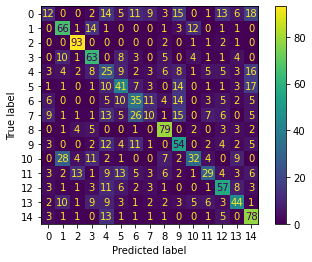

In [81]:
best_svm_model = LinearSVC(C=0.009, max_iter=5000)
best_svm_model.fit(train_encoded_features, y_train)
y_pred = best_svm_model.predict(test_encoded_features)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

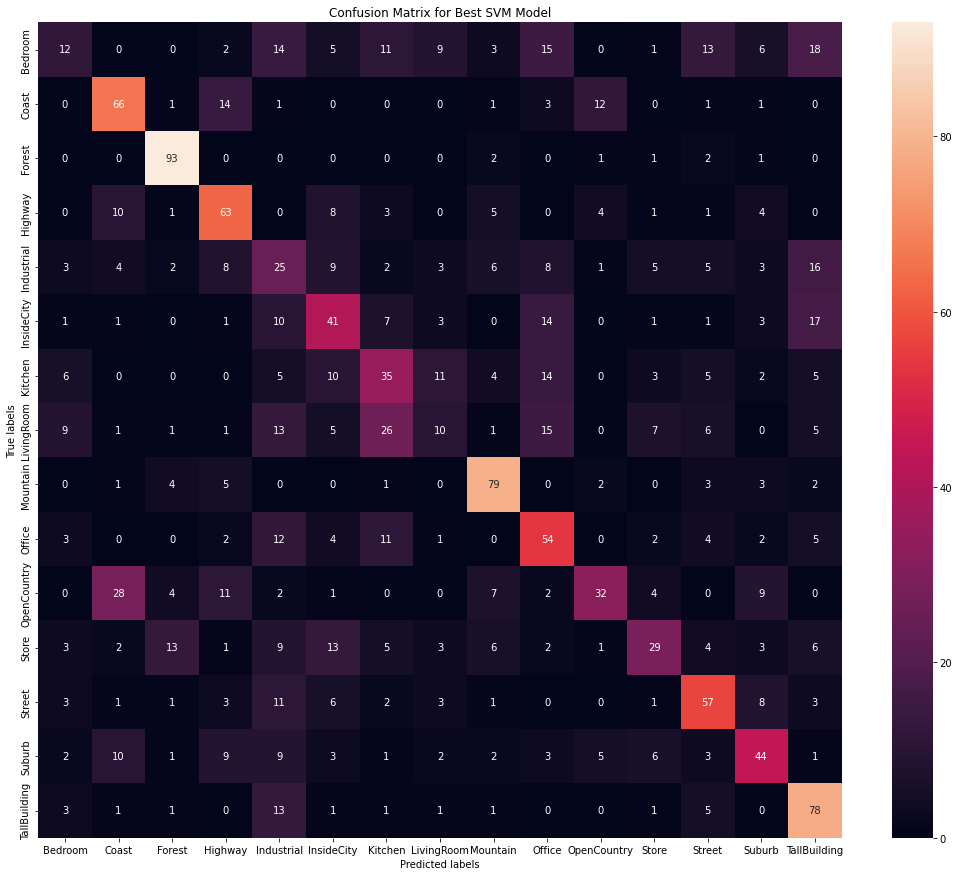

In [93]:
fig = plt.figure(figsize=(18,15))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Best SVM Model'); 
ax.xaxis.set_ticklabels(labels_names); ax.yaxis.set_ticklabels(labels_names);

## 3. 알고리즘 개선

### 3-1. SVM 이외 Classifier 사용 결과 분석

#### 3-1-1. KNN Classifier

In [83]:
def knn(n_neighbors, train_encoded_features, test_encoded_features):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)

    print("Classify Images ...")
    model.fit(train_encoded_features, y_train)
    train_score = model.score(train_encoded_features, y_train)
    test_score = model.score(test_encoded_features, y_test)

    elapsed_time = time.time() - start_time

    print()
    print("=" * 90)
    print("Train  Score: {:.5f}".format(train_score))
    print("Test   Score: {:.5f}".format(test_score))
    print("Elapsed Time: {:.2f} secs".format(elapsed_time))
    print("=" * 90)

#### K=60, n_neighbors =3

In [84]:
knn(3, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.66255
Test   Score: 0.40897
Elapsed Time: 11513.59 secs


#### K=60, n_neighbors=7

In [85]:
knn(7, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.56762
Test   Score: 0.42678
Elapsed Time: 11651.09 secs


#### K=60, n_neighbors = 15

In [89]:
knn(15, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.53771
Test   Score: 0.45646
Elapsed Time: 11679.89 secs


#### K=30, n_neighbors=3

In [90]:
knn(3, train_encoded_features_K30, test_encoded_features_K30)

Classify Images ...

Train  Score: 0.65865
Test   Score: 0.39644
Elapsed Time: 11768.34 secs


#### K=30, n_neighbors=7

In [91]:
knn(7, train_encoded_features_K30, test_encoded_features_K30)

Classify Images ...

Train  Score: 0.57282
Test   Score: 0.43799
Elapsed Time: 11784.34 secs


#### K=30, n_neighbors=15

In [92]:
knn(15, train_encoded_features_K30, test_encoded_features_K30)

Classify Images ...

Train  Score: 0.51886
Test   Score: 0.46042
Elapsed Time: 11790.75 secs


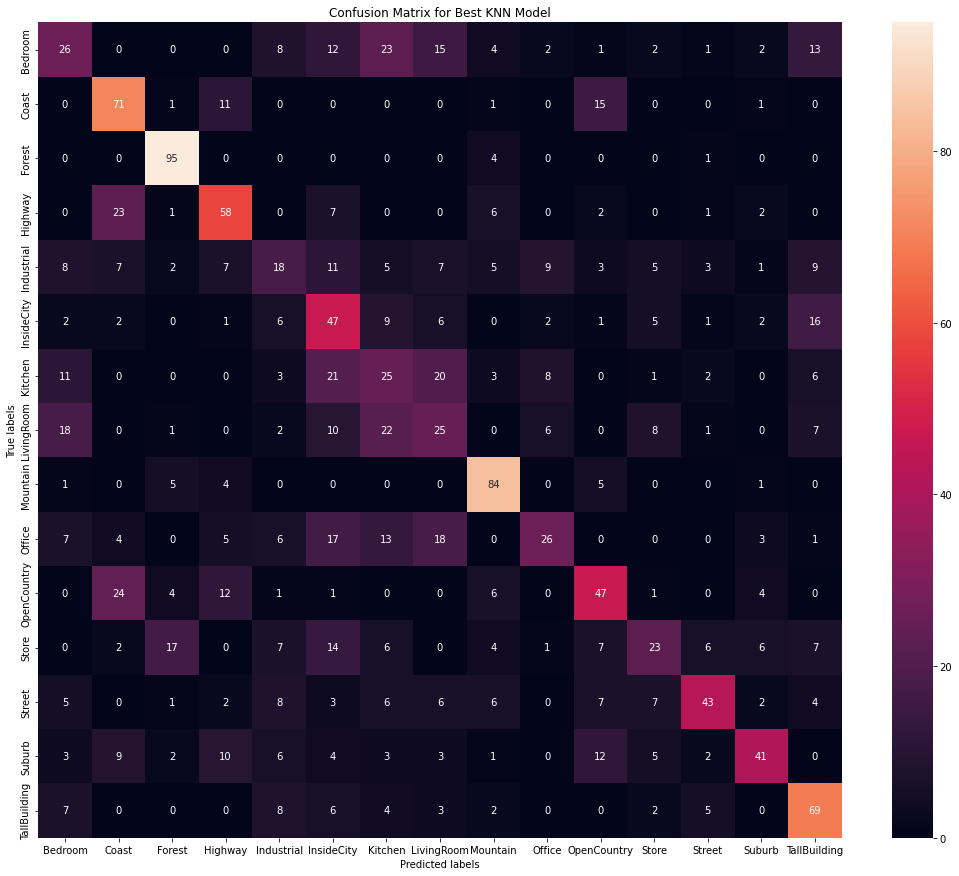

In [94]:
best_knn_model = KNeighborsClassifier(n_neighbors = 15)
best_knn_model.fit(train_encoded_features_K30, y_train)
y_pred_knn = best_knn_model.predict(test_encoded_features_K30)
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig = plt.figure(figsize=(18,15))
ax= plt.subplot()
sns.heatmap(cm_knn, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Best KNN Model'); 
ax.xaxis.set_ticklabels(labels_names); ax.yaxis.set_ticklabels(labels_names);

#### 3-1-2. RandomForestClassifier

In [95]:
def rfc(max_depth, n_estimators, train_encoded_features, test_encoded_features):
    model = RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators)

    print("Classify Images ...")
    model.fit(train_encoded_features, y_train)
    train_score = model.score(train_encoded_features, y_train)
    test_score = model.score(test_encoded_features, y_test)

    elapsed_time = time.time() - start_time

    print()
    print("=" * 90)
    print("Train  Score: {:.5f}".format(train_score))
    print("Test   Score: {:.5f}".format(test_score))
    print("Elapsed Time: {:.2f} secs".format(elapsed_time))
    print("=" * 90)

#### K= 60, max_depth= 5, n_estimators= 100

In [96]:
rfc(5,100, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.63589
Test   Score: 0.48087
Elapsed Time: 13816.20 secs


#### K=60, max_depth= 5, n_estimators= 150

In [97]:
rfc(5,150, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.62744
Test   Score: 0.48681
Elapsed Time: 13899.37 secs


#### K=60, max_depth= 5, n_estimators= 200

In [98]:
rfc(5,200, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.62354
Test   Score: 0.49340
Elapsed Time: 13912.88 secs


#### K=60, max_depth= 5, n_estimators= 250

In [99]:
rfc(5,250, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.62224
Test   Score: 0.49208
Elapsed Time: 13923.26 secs


#### K=60, max_depth= 10, n_estimators= 150

In [100]:
rfc(10,150, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.99480
Test   Score: 0.52902
Elapsed Time: 13967.71 secs


#### K=60, max_depth= 10, n_estimators= 200

In [101]:
rfc(10,200, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.99480
Test   Score: 0.53694
Elapsed Time: 14079.33 secs


#### K=60, max_depth= 10, n_estimators= 250

In [102]:
rfc(10,250, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 0.99350
Test   Score: 0.52639
Elapsed Time: 14120.56 secs


#### K=60, max_depth= 15, n_estimators= 200

In [104]:
rfc(15,200, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 1.00000
Test   Score: 0.54551
Elapsed Time: 14274.30 secs


#### K=60, max_depth= 15, n_estimators= 250

In [103]:
rfc(15,250, train_encoded_features, test_encoded_features)

Classify Images ...

Train  Score: 1.00000
Test   Score: 0.53430
Elapsed Time: 14232.88 secs


#### K=30, max_depth= 10, n_estimators= 200

In [105]:
rfc(10,200, train_encoded_features_K30, test_encoded_features_K30)

Classify Images ...

Train  Score: 0.97074
Test   Score: 0.52309
Elapsed Time: 14318.66 secs


#### K=30, max_depth= 15, n_estimators= 200

In [106]:
rfc(15,200, train_encoded_features_K30, test_encoded_features_K30)

Classify Images ...

Train  Score: 1.00000
Test   Score: 0.51253
Elapsed Time: 14411.84 secs


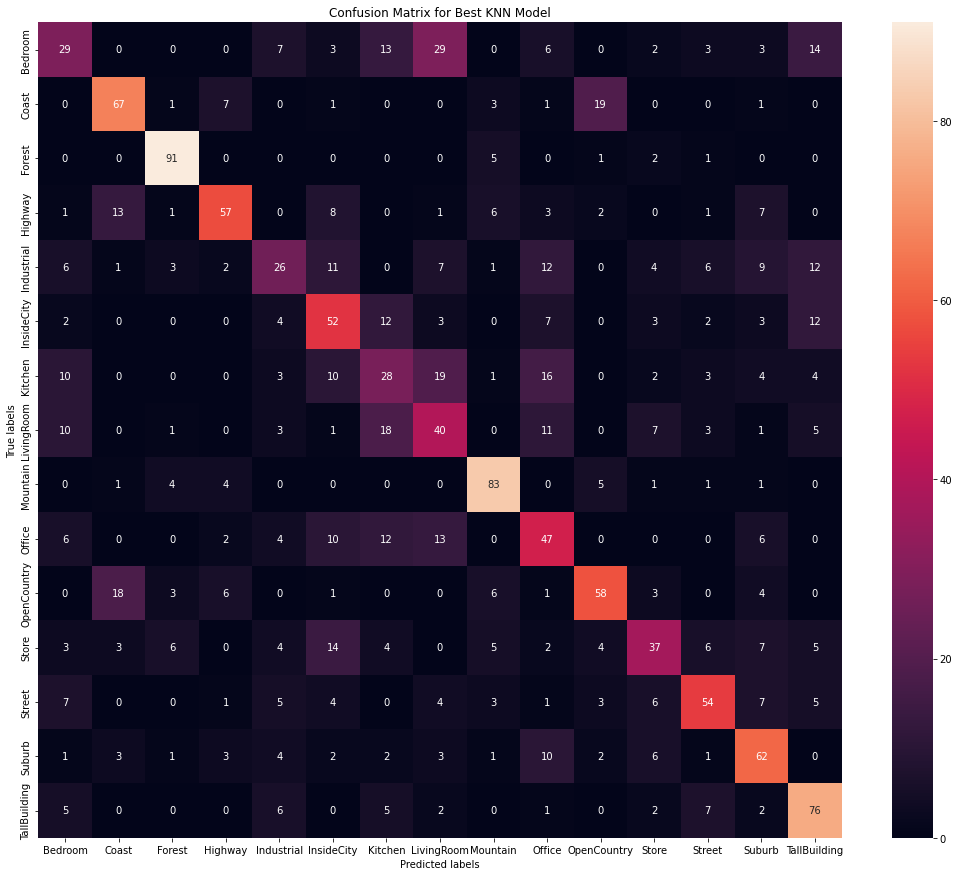

In [107]:
best_rfc_model = RandomForestClassifier(max_depth = 15, n_estimators = 200)
best_rfc_model.fit(train_encoded_features, y_train)
y_pred_rfc = best_rfc_model.predict(test_encoded_features)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

fig = plt.figure(figsize=(18,15))
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Best Random Forest Model'); 
ax.xaxis.set_ticklabels(labels_names); ax.yaxis.set_ticklabels(labels_names);

#### 3-1-3. MLP Classifier

In [108]:
def mlpc(max_iter, train_encoded_features, test_encoded_features):
    model = MLPClassifier(random_state=1,max_iter=max_iter)

    print("Classify Images ...")
    model.fit(train_encoded_features, y_train)
    train_score = model.score(train_encoded_features, y_train)
    test_score = model.score(test_encoded_features, y_test)

    elapsed_time = time.time() - start_time

    print()
    print("=" * 90)
    print("Train  Score: {:.5f}".format(train_score))
    print("Test   Score: {:.5f}".format(test_score))
    print("Elapsed Time: {:.2f} secs".format(elapsed_time))
    print("=" * 90)

#### K=60, max_iter=500

In [113]:
mlpc(500,train_encoded_features,test_encoded_features)

Classify Images ...

Train  Score: 1.00000
Test   Score: 0.46504
Elapsed Time: 15892.06 secs


C:\Users\inyou\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#### K=60, max_iter=1500

In [114]:
mlpc(1500,train_encoded_features,test_encoded_features)

Classify Images ...

Train  Score: 1.00000
Test   Score: 0.46042
Elapsed Time: 15915.16 secs


#### K=60, max_iter=2000

In [115]:
mlpc(2000,train_encoded_features,test_encoded_features)

Classify Images ...

Train  Score: 1.00000
Test   Score: 0.46042
Elapsed Time: 15975.75 secs


#### K=30, max_iter=1500

In [116]:
mlpc(1500,train_encoded_features_K30,test_encoded_features_K30)

Classify Images ...

Train  Score: 1.00000
Test   Score: 0.45119
Elapsed Time: 16058.48 secs


C:\Users\inyou\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


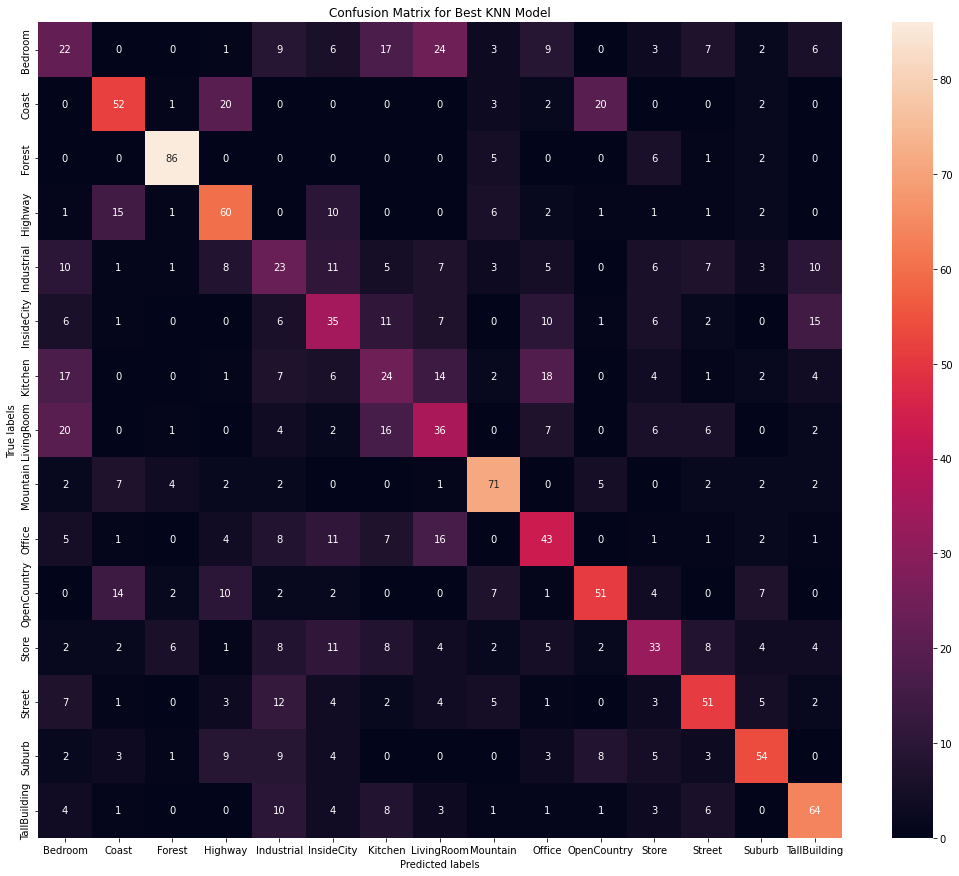

In [117]:
best_mlpc_model = MLPClassifier(random_state=1,max_iter=500)
best_mlpc_model.fit(train_encoded_features, y_train)
y_pred_mlpc = best_mlpc_model.predict(test_encoded_features)
cm_mlpc = confusion_matrix(y_test, y_pred_mlpc)

fig = plt.figure(figsize=(18,15))
ax= plt.subplot()
sns.heatmap(cm_mlpc, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Best MLP Model'); 
ax.xaxis.set_ticklabels(labels_names); ax.yaxis.set_ticklabels(labels_names);

#### 3-1-4. Naive Bayes

In [119]:
nb = GaussianNB()

print("Classify Images ...")
nb.fit(train_encoded_features, y_train)
nb_train_score = nb.score(train_encoded_features, y_train)
nb_test_score = nb.score(test_encoded_features, y_test)

nb_elapsed_time = time.time() - start_time

print()
print("=" * 90)
print("Train  Score: {:.5f}".format(nb_train_score))
print("Test   Score: {:.5f}".format(nb_test_score))
print("Elapsed Time: {:.2f} secs".format(nb_elapsed_time))
print("=" * 90)

Classify Images ...

Train  Score: 0.45384
Test   Score: 0.45251
Elapsed Time: 17171.61 secs
